In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Crimes_-_2018.csv")
data.dropna(inplace=True)
data = data.loc[(data['Primary Type'] == "THEFT")]
data["Date"] = data["Date"].str[:10]
days = np.unique(data["Date"].values)
data.head()

ID Case Number        Date                 Block  IUCR  \
66   11535234    JB553091  12/07/2018      0000X N STATE ST  0860   
67   11534936    JB552789  12/10/2018      0000X N STATE ST  0860   
76   11526910    JB541954  12/06/2018  025XX W PETERSON AVE  0820   
170  11549187    JB570115  12/28/2018  004XX W MARQUETTE RD  0860   
174  11498102    JB502817  11/04/2018       017XX W 66TH ST  0820   

    Primary Type     Description            Location Description  Arrest  \
66         THEFT    RETAIL THEFT                DEPARTMENT STORE    True   
67         THEFT    RETAIL THEFT              SMALL RETAIL STORE    True   
76         THEFT  $500 AND UNDER  PARKING LOT/GARAGE(NON.RESID.)    True   
170        THEFT    RETAIL THEFT              GROCERY FOOD STORE    True   
174        THEFT  $500 AND UNDER                       RESIDENCE    True   

     Domestic  ...  Ward  Community Area  FBI Code  X Coordinate Y Coordinate  \
66      False  ...  42.0            32.0        06     1176364.0    1900524.0   
67      False  ...  42.0            32.0        06     1176364.0    1900524.0   
76      False  ...  40.0             2.0        06     1158504.0    1941992.0   
170     False  ...   6.0            68.0        06     1174441.0    1860502.0   
174     False  ...  15.0            67.0        06     1165934.0    1860929.0   

     Year              Updated On   Latitude  Longitude  \
66   2018  04/08/2019 04:11:13 PM  41.882394 -87.627845   
67   2018  04/08/2019 04:11:13 PM  41.882394 -87.627845   
76   2018  04/07/2019 03:58:05 PM  41.996569 -87.692288   
170  2018  04/03/2019 04:04:24 PM  41.772613 -87.636099   
174  2018  04/03/2019 04:04:24 PM  41.773970 -87.667271   

                          Location  
66   (41.882394062, -87.627844798)  
67   (41.882394062, -87.627844798)  
76   (41.996569131, -87.692288143)  
170  (41.772613371, -87.636098706)  
174  (41.773970137, -87.667270917)  

[5 rows x 22 columns]

In [3]:
max_lat = data['Latitude'].max()
min_lat = data['Latitude'].min()
max_lon = data['Longitude'].max()
min_lon = data['Longitude'].min()
print(min_lat,max_lat,min_lon,max_lon)

41.644589713 42.022536147 -87.934272688 -87.52462380899999


In [4]:
n_rows = n_columns = 64
matrix = np.zeros(shape=(n_rows,n_columns))
n_sum_lat = (max_lat-min_lat)/n_columns
n_sum_lon = (max_lon-min_lon)/n_rows
n_days = len(days)
X = []
for k in range (n_days):
    dayk = data.loc[(data['Date'] == days[k])]
    start_lon = min_lon
    end_lon = min_lon + n_sum_lon
    for i in range (n_rows):
        start_lat = min_lat
        end_lat = min_lat + n_sum_lat
        for j in range (n_columns):
            x = dayk.loc[(dayk['Latitude'] >= start_lat) & (dayk['Latitude'] <= end_lat) & (dayk['Longitude'] >= start_lon) & (dayk['Longitude'] <= end_lon)]
            matrix[i][j] = x.shape[0]
            start_lat = end_lat
            end_lat = end_lat + n_sum_lat
        start_lon = end_lon
        end_lon = end_lon + n_sum_lon
    X.append(matrix)

In [5]:
import pickle
pickle_out = open("Matrices.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

In [2]:
import pickle
pickle_in = open("Matrices.pickle","rb")
X2 = pickle.load(pickle_in)

In [3]:
division = round(len(X2) * 0.7)
training = X2[:division]
test = X2[division:]
X1_training = []
Y1_training = []
X1_test = []
Y1_test = []
X2_reshaped = []
Y2_reshaped = []

for i in range (len(training)):
    if (i == 0) or (i == len(training)-1):
        X1_training.append(training[i])
        Y1_training.append(training[i])
    else:
        X1_training.append(training[i])
        Y1_training.append(training[i+1])

for i in range (len(test)):
    if (i == 0) or (i == len(test)-1):
        X1_test.append(test[i])
        Y1_test.append(test[i])
    else:
        X1_test.append(test[i])
        Y1_test.append(test[i+1])

        
for i in range (len(X2)):
    if (i == 0) or (i == len(X2)-1):
        X2_reshaped.append(X2[i])
        Y2_reshaped.append(X2[i])
    else:
        X2_reshaped.append(X2[i])
        Y2_reshaped.append(X2[i+1])

X2_reshaped = np.array(X2_reshaped).reshape(-1,64,64,1)
Y2_reshaped = np.array(Y2_reshaped).reshape(-1,64,64,1)
X1_training = np.array(X1_training).reshape(-1,64,64,1)
Y1_training = np.array(Y1_training).reshape(-1,64,64,1)
X1_test = np.array(X1_test).reshape(-1,64,64,1)
Y1_test = np.array(Y1_test).reshape(-1,64,64,1)
print(X1_training.shape,Y1_training.shape)
print(X1_test.shape,Y1_test.shape)

(255, 64, 64, 1) (255, 64, 64, 1)
(110, 64, 64, 1) (110, 64, 64, 1)


In [4]:
X2_training = []
Y2_training = []
X2_test = []
Y2_test = []

for i in range (len(training)):
    if (i == 0) or (i == len(training)-1) or (i == len(training)-2):
        creacion1 = np.squeeze(np.asarray(training[i]))
        creacion2 = np.squeeze(np.asarray(training[i]))
        creacion3 = np.vstack((creacion1,creacion2))
        creacion3 = np.array(creacion3).reshape(-1,64,128,1)
        X2_training.append(creacion3)
        Y2_training.append(training[i])
    else:
        creacion1 = np.squeeze(np.asarray(training[i]))
        creacion2 = np.squeeze(np.asarray(training[i+1]))
        creacion3 = np.vstack((creacion1,creacion2))
        creacion3 = np.array(creacion3).reshape(-1,64,128,1)
        X2_training.append(creacion3)
        Y2_training.append(training[i+2])

for i in range (len(test)):
    if (i == 0) or (i == len(test)-1) or (i == len(test)-2):
        creacion1 = np.squeeze(np.asarray(test[i]))
        creacion2 = np.squeeze(np.asarray(test[i]))
        creacion3 = np.vstack((creacion1,creacion2))
        creacion3 = np.array(creacion3).reshape(-1,64,128,1)
        X2_test.append(creacion3)
        Y2_test.append(test[i])
    else:
        creacion1 = np.squeeze(np.asarray(test[i]))
        creacion2 = np.squeeze(np.asarray(test[i+1]))
        creacion3 = np.vstack((creacion1,creacion2))
        creacion3 = np.array(creacion3).reshape(-1,64,128,1)
        X2_test.append(creacion3)
        Y2_test.append(test[i+2])
        
X2_training = np.array(X2_training).reshape(-1,64,128,1)
Y2_training = np.array(Y2_training).reshape(-1,64,64,1)
X2_test = np.array(X2_test).reshape(-1,64,128,1)
Y2_test = np.array(Y2_test).reshape(-1,64,64,1)
print(X2_training.shape,Y2_training.shape)
print(X2_test.shape,Y2_test.shape)

(255, 64, 128, 1) (255, 64, 64, 1)
(110, 64, 128, 1) (110, 64, 64, 1)


In [45]:
X3_training = []
Y3_training = []
X3_test = []
Y3_test = []

for i in range (len(training)):
    if (i == 0) or (i == len(training)-1) or (i == len(training)-2) or (i == len(training)-3):
        creacion1 = np.squeeze(np.asarray(training[i]))
        creacion2 = np.squeeze(np.asarray(training[i]))
        creacion3 = np.squeeze(np.asarray(training[i]))
        creacion4 = np.squeeze(np.asarray(training[i]))
        creacion5 = np.vstack((creacion1,creacion2,creacion3,creacion4))
        creacion5 = np.array(creacion5).reshape(-1,64,256,1)
        X3_training.append(creacion5)
        Y3_training.append(training[i])
    else:
        creacion1 = np.squeeze(np.asarray(training[i]))
        creacion2 = np.squeeze(np.asarray(training[i+1]))
        creacion3 = np.squeeze(np.asarray(training[i+2]))
        creacion4 = np.squeeze(np.asarray(training[i+3]))
        creacion5 = np.vstack((creacion1,creacion2,creacion3,creacion4))
        creacion5 = np.array(creacion5).reshape(-1,64,256,1)
        X3_training.append(creacion5)
        Y3_training.append(training[i+3])

for i in range (len(test)):
    if (i == 0) or (i == len(test)-1) or (i == len(test)-2) or (i == len(test)-3):
        creacion1 = np.squeeze(np.asarray(test[i]))
        creacion2 = np.squeeze(np.asarray(test[i]))
        creacion3 = np.squeeze(np.asarray(test[i]))
        creacion4 = np.squeeze(np.asarray(test[i]))
        creacion5 = np.vstack((creacion1,creacion2,creacion3,creacion4))
        creacion5 = np.array(creacion5).reshape(-1,64,256,1)
        X3_test.append(creacion5)
        Y3_test.append(test[i])
    else:
        creacion1 = np.squeeze(np.asarray(test[i]))
        creacion2 = np.squeeze(np.asarray(test[i+1]))
        creacion3 = np.squeeze(np.asarray(test[i+2]))
        creacion4 = np.squeeze(np.asarray(test[i+3]))
        creacion5 = np.vstack((creacion1,creacion2,creacion3,creacion4))
        creacion5 = np.array(creacion5).reshape(-1,64,256,1)
        X3_test.append(creacion5)
        Y3_test.append(test[i+3])
        
X3_training = np.array(X3_training).reshape(-1,64,256,1)
Y3_training = np.array(Y3_training).reshape(-1,64,64,1)
X3_test = np.array(X3_test).reshape(-1,64,256,1)
Y3_test = np.array(Y3_test).reshape(-1,64,64,1)
"""
for i in range (len(training)):
    if (i == 0) or (i == len(training)-1) or (i == len(training)-2) or (i == len(training)-3):
        creacion1 = np.squeeze(np.asarray(training[i]))
        creacion2 = np.squeeze(np.asarray(training[i]))
        creacion3 = np.squeeze(np.asarray(training[i]))
        creacion4 = np.squeeze(np.asarray(training[i]))
        creacion5 = np.vstack((creacion1,creacion2,creacion3,creacion4))
        creacion5 = np.array(creacion5).reshape(-1,128,128,1)
        X3_training.append(creacion5)
        Y3_training.append(training[i])
    else:
        creacion1 = np.squeeze(np.asarray(training[i]))
        creacion2 = np.squeeze(np.asarray(training[i+1]))
        creacion3 = np.squeeze(np.asarray(training[i+2]))
        creacion4 = np.squeeze(np.asarray(training[i+3]))
        creacion5 = np.vstack((creacion1,creacion2,creacion3,creacion4))
        creacion5 = np.array(creacion5).reshape(-1,128,128,1)
        X3_training.append(creacion5)
        Y3_training.append(training[i+3])

for i in range (len(test)):
    if (i == 0) or (i == len(test)-1) or (i == len(test)-2) or (i == len(test)-3):
        creacion1 = np.squeeze(np.asarray(test[i]))
        creacion2 = np.squeeze(np.asarray(test[i]))
        creacion3 = np.squeeze(np.asarray(test[i]))
        creacion4 = np.squeeze(np.asarray(test[i]))
        creacion5 = np.vstack((creacion1,creacion2,creacion3,creacion4))
        creacion5 = np.array(creacion5).reshape(-1,128,128,1)
        X3_test.append(creacion5)
        Y3_test.append(test[i])
    else:
        creacion1 = np.squeeze(np.asarray(test[i]))
        creacion2 = np.squeeze(np.asarray(test[i+1]))
        creacion3 = np.squeeze(np.asarray(test[i+2]))
        creacion4 = np.squeeze(np.asarray(test[i+3]))
        creacion5 = np.vstack((creacion1,creacion2,creacion3,creacion4))
        creacion5 = np.array(creacion5).reshape(-1,128,128,1)
        X3_test.append(creacion5)
        Y3_test.append(test[i+3])
        
X3_training = np.array(X3_training).reshape(-1,128,128,1)
Y3_training = np.array(Y3_training).reshape(-1,64,64,1)
X3_test = np.array(X3_test).reshape(-1,128,128,1)
Y3_test = np.array(Y3_test).reshape(-1,64,64,1)
"""
print(X3_training.shape,Y3_training.shape)
print(X3_test.shape,Y3_test.shape)

(255, 64, 256, 1) (255, 64, 64, 1)
(110, 64, 256, 1) (110, 64, 64, 1)


In [6]:
X4_training = []
Y4_training = []
X4_test = []
Y4_test = []

for i in range (len(training)):
    if (i == 0) or (i == len(training)-1) or (i == len(training)-2) or (i == len(training)-3)  or (i == len(training)-4)  or (i == len(training)-5) or (i == len(training)-6):
        X4_training.append(training[i])
        Y4_training.append(training[i])
    else:
        X4_training.append(training[i])
        Y4_training.append(training[i+6])

for i in range (len(test)):
    if (i == 0) or (i == len(test)-1) or (i == len(test)-2) or (i == len(test)-3) or (i == len(test)-4) or (i == len(test)-5) or (i == len(test)-6):
        X4_test.append(test[i])
        Y4_test.append(test[i])
    else:
        X4_test.append(test[i])
        Y4_test.append(test[i+6])
        
X4_training = np.array(X4_training).reshape(-1,64,64,1)
Y4_training = np.array(Y4_training).reshape(-1,64,64,1)
X4_test = np.array(X4_test).reshape(-1,64,64,1)
Y4_test = np.array(Y4_test).reshape(-1,64,64,1)
print(X4_training.shape,Y4_training.shape)
print(X4_test.shape,Y4_test.shape)

(255, 64, 64, 1) (255, 64, 64, 1)
(110, 64, 64, 1) (110, 64, 64, 1)


In [89]:
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import Layer, Dense, Dropout, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D

input_nn = Input(shape=X1_training.shape[1:]) 
# Encoder
conv1_1 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_nn)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)
conv1_3 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool2)
h = MaxPooling2D((2, 2), padding='same')(conv1_3)


# Decoder
conv2_1 = Conv2D(8, (3, 3), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
conv2_3 = Conv2D(16, (3, 3), activation='relu', padding='same')(up2)
up3 = UpSampling2D((2, 2))(conv2_3)
output_nn = Conv2D(1, (3, 3), activation='linear', padding='same')(up3)

autoencoder1 = Model(inputs=input_nn, outputs=output_nn)
autoencoder1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 64, 64, 16)        160       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 32, 32, 8)         1160      
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 16, 16, 8)         584       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 8, 8, 8)           0         
__________

<h5><center>INICIO DE PRUEBAS</center></h5>

In [94]:
#PROBANDO
from keras.models import Model
from keras.layers import Input, add, Dropout
from keras.layers.core import Layer, Dense, Dropout, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D

input_nn = Input(shape=X1_training.shape[1:]) 
# Encoder
conv1_1 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_nn)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
D = Dropout(rate=0.1)(pool1)
conv1_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(D)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)
conv1_3 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool2)
h = MaxPooling2D((2, 2), padding='same')(conv1_3)


# Decoder
conv2_1 = Conv2D(8, (3, 3), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
conv2_3 = Conv2D(16, (3, 3), activation='relu', padding='same')(up2)
up3 = UpSampling2D((2, 2))(conv2_3)
output_nn = Conv2D(1, (3, 3), activation='linear', padding='same')(up3)

autoencoder1_wdor1 = Model(inputs=input_nn, outputs=output_nn)
autoencoder1_wdor1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 64, 64, 16)        160       
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 32, 32, 8)         1160      
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 16, 16, 8)         584       
__________

In [93]:
#PROBANDO
from keras.models import Model
from keras.layers import Input, add, Dropout
from keras.layers.core import Layer, Dense, Dropout, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D

input_nn = Input(shape=X1_training.shape[1:]) 
# Encoder
conv1_1 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_nn)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
D = Dropout(rate=0.2)(pool1)
conv1_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(D)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)
conv1_3 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool2)
h = MaxPooling2D((2, 2), padding='same')(conv1_3)


# Decoder
conv2_1 = Conv2D(8, (3, 3), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
conv2_3 = Conv2D(16, (3, 3), activation='relu', padding='same')(up2)
up3 = UpSampling2D((2, 2))(conv2_3)
output_nn = Conv2D(1, (3, 3), activation='linear', padding='same')(up3)

autoencoder1_wdor2 = Model(inputs=input_nn, outputs=output_nn)
autoencoder1_wdor2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 64, 64, 16)        160       
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 32, 32, 8)         1160      
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 16, 16, 8)         584       
__________

In [95]:
#PROBANDO
from keras.models import Model
from keras.layers import Input, add, Dropout
from keras.layers.core import Layer, Dense, Dropout, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D

input_nn = Input(shape=X1_training.shape[1:]) 
# Encoder
conv1_1 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_nn)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
D = Dropout(rate=0.3)(pool1)
conv1_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(D)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)
conv1_3 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool2)
h = MaxPooling2D((2, 2), padding='same')(conv1_3)


# Decoder
conv2_1 = Conv2D(8, (3, 3), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
conv2_3 = Conv2D(16, (3, 3), activation='relu', padding='same')(up2)
up3 = UpSampling2D((2, 2))(conv2_3)
output_nn = Conv2D(1, (3, 3), activation='linear', padding='same')(up3)

autoencoder1_wdor3 = Model(inputs=input_nn, outputs=output_nn)
autoencoder1_wdor3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_135 (Conv2D)          (None, 64, 64, 16)        160       
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_136 (Conv2D)          (None, 32, 32, 8)         1160      
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_137 (Conv2D)          (None, 16, 16, 8)         584       
__________

In [96]:
#PROBANDO
from keras.models import Model
from keras.layers import Input, add, Dropout
from keras.layers.core import Layer, Dense, Dropout, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D

input_nn = Input(shape=X1_training.shape[1:]) 
# Encoder
conv1_1 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_nn)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
D = Dropout(rate=0.4)(pool1)
conv1_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(D)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)
conv1_3 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool2)
h = MaxPooling2D((2, 2), padding='same')(conv1_3)


# Decoder
conv2_1 = Conv2D(8, (3, 3), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
conv2_3 = Conv2D(16, (3, 3), activation='relu', padding='same')(up2)
up3 = UpSampling2D((2, 2))(conv2_3)
output_nn = Conv2D(1, (3, 3), activation='linear', padding='same')(up3)

autoencoder1_wdor4 = Model(inputs=input_nn, outputs=output_nn)
autoencoder1_wdor4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_142 (Conv2D)          (None, 64, 64, 16)        160       
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_143 (Conv2D)          (None, 32, 32, 8)         1160      
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_144 (Conv2D)          (None, 16, 16, 8)         584       
__________

In [97]:
#PROBANDO
from keras.models import Model
from keras.layers import Input, add, Dropout
from keras.layers.core import Layer, Dense, Dropout, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D

input_nn = Input(shape=X1_training.shape[1:]) 
# Encoder
conv1_1 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_nn)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
D = Dropout(rate=0.5)(pool1)
conv1_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(D)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)
conv1_3 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool2)
h = MaxPooling2D((2, 2), padding='same')(conv1_3)


# Decoder
conv2_1 = Conv2D(8, (3, 3), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
conv2_3 = Conv2D(16, (3, 3), activation='relu', padding='same')(up2)
up3 = UpSampling2D((2, 2))(conv2_3)
output_nn = Conv2D(1, (3, 3), activation='linear', padding='same')(up3)

autoencoder1_wdor5 = Model(inputs=input_nn, outputs=output_nn)
autoencoder1_wdor5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_149 (Conv2D)          (None, 64, 64, 16)        160       
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 32, 32, 8)         1160      
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_151 (Conv2D)          (None, 16, 16, 8)         584       
__________

In [98]:
#PROBANDO
from keras.models import Model
from keras.layers import Input, add, Dropout
from keras.layers.core import Layer, Dense, Dropout, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D

input_nn = Input(shape=X1_training.shape[1:]) 
# Encoder
conv1_1 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_nn)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
D1 = Dropout(rate=0.2)(pool1)
conv1_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(D1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)
D2 = Dropout(rate=0.2)(pool2)
conv1_3 = Conv2D(8, (3, 3), activation='relu', padding='same')(D2)
h = MaxPooling2D((2, 2), padding='same')(conv1_3)

# Decoder
conv2_1 = Conv2D(8, (3, 3), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
conv2_3 = Conv2D(16, (3, 3), activation='relu', padding='same')(up2)
up3 = UpSampling2D((2, 2))(conv2_3)
output_nn = Conv2D(1, (3, 3), activation='linear', padding='same')(up3)

autoencoder1_wdo2 = Model(inputs=input_nn, outputs=output_nn)
autoencoder1_wdo2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_156 (Conv2D)          (None, 64, 64, 16)        160       
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_157 (Conv2D)          (None, 32, 32, 8)         1160      
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 16, 16, 8)         0         
__________

In [99]:
#PROBANDO
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import Layer, Dense, Dropout, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D

input_nn = Input(shape=X1_training.shape[1:]) 
# Encoder
conv1_1 = Conv2D(8, (3, 3), activation='relu', padding='same')(input_nn)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(4, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)
conv1_3 = Conv2D(4, (3, 3), activation='relu', padding='same')(pool2)
h = MaxPooling2D((2, 2), padding='same')(conv1_3)

# Decoder
conv2_1 = Conv2D(4, (3, 3), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(4, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
conv2_3 = Conv2D(8, (3, 3), activation='relu', padding='same')(up2)
up3 = UpSampling2D((2, 2))(conv2_3)
output_nn = Conv2D(1, (3, 3), activation='linear', padding='same')(up3)

autoencoder1b = Model(inputs=input_nn, outputs=output_nn)
autoencoder1b.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_163 (Conv2D)          (None, 64, 64, 8)         80        
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_164 (Conv2D)          (None, 32, 32, 4)         292       
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 16, 16, 4)         0         
_________________________________________________________________
conv2d_165 (Conv2D)          (None, 16, 16, 4)         148       
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 8, 8, 4)           0         
__________

In [100]:
#PROBANDO
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import Layer, Dense, Dropout, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D

input_nn = Input(shape=X1_training.shape[1:]) 
# Encoder
conv1_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_nn)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(16, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)
conv1_3 = Conv2D(16, (3, 3), activation='relu', padding='same')(pool2)
h = MaxPooling2D((2, 2), padding='same')(conv1_3)


# Decoder
conv2_1 = Conv2D(16, (3, 3), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(16, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
conv2_3 = Conv2D(32, (3, 3), activation='relu', padding='same')(up2)
up3 = UpSampling2D((2, 2))(conv2_3)
output_nn = Conv2D(1, (3, 3), activation='linear', padding='same')(up3)

autoencoder1c = Model(inputs=input_nn, outputs=output_nn)
autoencoder1c.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_170 (Conv2D)          (None, 64, 64, 32)        320       
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_171 (Conv2D)          (None, 32, 32, 16)        4624      
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_172 (Conv2D)          (None, 16, 16, 16)        2320      
_________________________________________________________________
max_pooling2d_78 (MaxPooling (None, 8, 8, 16)          0         
__________

In [101]:
#PROBANDO
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import Layer, Dense, Dropout, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D

input_nn = Input(shape=X1_training.shape[1:]) 
# Encoder
conv1_1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_nn)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)
conv1_3 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool2)
h = MaxPooling2D((2, 2), padding='same')(conv1_3)


# Decoder
conv2_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
conv2_3 = Conv2D(64, (3, 3), activation='relu', padding='same')(up2)
up3 = UpSampling2D((2, 2))(conv2_3)
output_nn = Conv2D(1, (3, 3), activation='linear', padding='same')(up3)

autoencoder1d = Model(inputs=input_nn, outputs=output_nn)
autoencoder1d.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_177 (Conv2D)          (None, 64, 64, 64)        640       
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_178 (Conv2D)          (None, 32, 32, 32)        18464     
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_179 (Conv2D)          (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 8, 8, 32)          0         
__________

In [102]:
#PROBANDO
from keras import backend as K
def coeff_determination(y_true,y_pred):
    SS_res = K.sum(K.square(y_true-y_pred))
    SS_tot = K.sum(K.square(y_true-K.mean(y_true)))
    return (1-SS_res/(SS_tot+K.epsilon()))
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

autoencoder1.compile(loss=root_mean_squared_error,optimizer="adam",metrics=[coeff_determination,'mape','mae'])
autoencoder1_wdor1.compile(loss=root_mean_squared_error,optimizer="adam",metrics=[coeff_determination,'mape','mae'])
autoencoder1_wdor2.compile(loss=root_mean_squared_error,optimizer="adam",metrics=[coeff_determination,'mape','mae'])
autoencoder1_wdor3.compile(loss=root_mean_squared_error,optimizer="adam",metrics=[coeff_determination,'mape','mae'])
autoencoder1_wdor4.compile(loss=root_mean_squared_error,optimizer="adam",metrics=[coeff_determination,'mape','mae'])
autoencoder1_wdor5.compile(loss=root_mean_squared_error,optimizer="adam",metrics=[coeff_determination,'mape','mae'])
autoencoder1_wdo2.compile(loss=root_mean_squared_error,optimizer="adam",metrics=[coeff_determination,'mape','mae'])
autoencoder1b.compile(loss=root_mean_squared_error,optimizer="adam",metrics=[coeff_determination,'mape','mae'])
autoencoder1c.compile(loss=root_mean_squared_error,optimizer="adam",metrics=[coeff_determination,'mape','mae'])
autoencoder1d.compile(loss=root_mean_squared_error,optimizer="adam",metrics=[coeff_determination,'mape','mae'])

In [103]:
#PROBANDO
epochs = 1000
batch_size = 32
history_1 = autoencoder1.fit(X1_training, Y1_training, batch_size=batch_size, epochs=epochs, verbose=2,validation_data=(X1_test,Y1_test))

Train on 255 samples, validate on 110 samples
Epoch 1/1000
 - 2s - loss: 0.2285 - coeff_determination: 0.0665 - mean_absolute_percentage_error: 45090447.3255 - mean_absolute_error: 0.0790 - val_loss: 0.2235 - val_coeff_determination: 0.1067 - val_mean_absolute_percentage_error: 36191465.5273 - val_mean_absolute_error: 0.0698
Epoch 2/1000
 - 1s - loss: 0.2206 - coeff_determination: 0.1298 - mean_absolute_percentage_error: 38567661.5216 - mean_absolute_error: 0.0712 - val_loss: 0.2174 - val_coeff_determination: 0.1554 - val_mean_absolute_percentage_error: 44234064.5091 - val_mean_absolute_error: 0.0754
Epoch 3/1000
 - 1s - loss: 0.2143 - coeff_determination: 0.1787 - mean_absolute_percentage_error: 40538550.5569 - mean_absolute_error: 0.0717 - val_loss: 0.2101 - val_coeff_determination: 0.2107 - val_mean_absolute_percentage_error: 39627768.5091 - val_mean_absolute_error: 0.0701
Epoch 4/1000
 - 1s - loss: 0.2065 - coeff_determination: 0.2374 - mean_absolute_percentage_error: 39503311.2471

Epoch 30/1000
 - 1s - loss: 0.1266 - coeff_determination: 0.7135 - mean_absolute_percentage_error: 39863513.9922 - mean_absolute_error: 0.0549 - val_loss: 0.1258 - val_coeff_determination: 0.7169 - val_mean_absolute_percentage_error: 39368760.0000 - val_mean_absolute_error: 0.0546
Epoch 31/1000
 - 1s - loss: 0.1253 - coeff_determination: 0.7193 - mean_absolute_percentage_error: 39817864.3608 - mean_absolute_error: 0.0547 - val_loss: 0.1243 - val_coeff_determination: 0.7236 - val_mean_absolute_percentage_error: 40053768.0000 - val_mean_absolute_error: 0.0545
Epoch 32/1000
 - 1s - loss: 0.1239 - coeff_determination: 0.7255 - mean_absolute_percentage_error: 39889359.6235 - mean_absolute_error: 0.0544 - val_loss: 0.1230 - val_coeff_determination: 0.7296 - val_mean_absolute_percentage_error: 39911464.0000 - val_mean_absolute_error: 0.0542
Epoch 33/1000
 - 1s - loss: 0.1227 - coeff_determination: 0.7308 - mean_absolute_percentage_error: 40054845.7725 - mean_absolute_error: 0.0543 - val_loss:

Epoch 60/1000
 - 1s - loss: 0.1037 - coeff_determination: 0.8079 - mean_absolute_percentage_error: 39252085.0353 - mean_absolute_error: 0.0496 - val_loss: 0.1037 - val_coeff_determination: 0.8078 - val_mean_absolute_percentage_error: 38700720.5091 - val_mean_absolute_error: 0.0494
Epoch 61/1000
 - 1s - loss: 0.1034 - coeff_determination: 0.8090 - mean_absolute_percentage_error: 39121282.5412 - mean_absolute_error: 0.0495 - val_loss: 0.1030 - val_coeff_determination: 0.8102 - val_mean_absolute_percentage_error: 39593344.0000 - val_mean_absolute_error: 0.0496
Epoch 62/1000
 - 1s - loss: 0.1029 - coeff_determination: 0.8106 - mean_absolute_percentage_error: 39181290.3216 - mean_absolute_error: 0.0494 - val_loss: 0.1025 - val_coeff_determination: 0.8120 - val_mean_absolute_percentage_error: 38757108.5091 - val_mean_absolute_error: 0.0491
Epoch 63/1000
 - 1s - loss: 0.1025 - coeff_determination: 0.8123 - mean_absolute_percentage_error: 39029782.9490 - mean_absolute_error: 0.0492 - val_loss:

Epoch 90/1000
 - 1s - loss: 0.0940 - coeff_determination: 0.8420 - mean_absolute_percentage_error: 37927355.2471 - mean_absolute_error: 0.0466 - val_loss: 0.0932 - val_coeff_determination: 0.8446 - val_mean_absolute_percentage_error: 37803592.0000 - val_mean_absolute_error: 0.0463
Epoch 91/1000
 - 1s - loss: 0.0932 - coeff_determination: 0.8446 - mean_absolute_percentage_error: 37763468.4863 - mean_absolute_error: 0.0463 - val_loss: 0.0930 - val_coeff_determination: 0.8454 - val_mean_absolute_percentage_error: 37374219.4909 - val_mean_absolute_error: 0.0461
Epoch 92/1000
 - 1s - loss: 0.0929 - coeff_determination: 0.8458 - mean_absolute_percentage_error: 37589376.8784 - mean_absolute_error: 0.0461 - val_loss: 0.0925 - val_coeff_determination: 0.8471 - val_mean_absolute_percentage_error: 37372715.4909 - val_mean_absolute_error: 0.0459
Epoch 93/1000
 - 1s - loss: 0.0924 - coeff_determination: 0.8474 - mean_absolute_percentage_error: 37544533.6784 - mean_absolute_error: 0.0460 - val_loss:

Epoch 119/1000
 - 1s - loss: 0.0866 - coeff_determination: 0.8661 - mean_absolute_percentage_error: 36476021.1608 - mean_absolute_error: 0.0440 - val_loss: 0.0856 - val_coeff_determination: 0.8689 - val_mean_absolute_percentage_error: 36514832.0000 - val_mean_absolute_error: 0.0437
Epoch 120/1000
 - 1s - loss: 0.0856 - coeff_determination: 0.8689 - mean_absolute_percentage_error: 36260881.7882 - mean_absolute_error: 0.0436 - val_loss: 0.0854 - val_coeff_determination: 0.8695 - val_mean_absolute_percentage_error: 36622075.4909 - val_mean_absolute_error: 0.0437
Epoch 121/1000
 - 1s - loss: 0.0853 - coeff_determination: 0.8700 - mean_absolute_percentage_error: 36225628.7059 - mean_absolute_error: 0.0435 - val_loss: 0.0850 - val_coeff_determination: 0.8708 - val_mean_absolute_percentage_error: 35936593.0182 - val_mean_absolute_error: 0.0433
Epoch 122/1000
 - 1s - loss: 0.0852 - coeff_determination: 0.8703 - mean_absolute_percentage_error: 36240690.9020 - mean_absolute_error: 0.0435 - val_l

Epoch 148/1000
 - 1s - loss: 0.0811 - coeff_determination: 0.8823 - mean_absolute_percentage_error: 35065624.7686 - mean_absolute_error: 0.0417 - val_loss: 0.0810 - val_coeff_determination: 0.8827 - val_mean_absolute_percentage_error: 34599339.4909 - val_mean_absolute_error: 0.0415
Epoch 149/1000
 - 1s - loss: 0.0809 - coeff_determination: 0.8831 - mean_absolute_percentage_error: 34951457.6941 - mean_absolute_error: 0.0415 - val_loss: 0.0808 - val_coeff_determination: 0.8833 - val_mean_absolute_percentage_error: 34729530.9818 - val_mean_absolute_error: 0.0414
Epoch 150/1000
 - 1s - loss: 0.0809 - coeff_determination: 0.8830 - mean_absolute_percentage_error: 35073570.1333 - mean_absolute_error: 0.0416 - val_loss: 0.0814 - val_coeff_determination: 0.8814 - val_mean_absolute_percentage_error: 34705394.4727 - val_mean_absolute_error: 0.0418
Epoch 151/1000
 - 1s - loss: 0.0810 - coeff_determination: 0.8826 - mean_absolute_percentage_error: 35119990.9961 - mean_absolute_error: 0.0417 - val_l

Epoch 177/1000
 - 1s - loss: 0.0780 - coeff_determination: 0.8914 - mean_absolute_percentage_error: 34486312.5020 - mean_absolute_error: 0.0407 - val_loss: 0.0778 - val_coeff_determination: 0.8919 - val_mean_absolute_percentage_error: 34754352.0000 - val_mean_absolute_error: 0.0407
Epoch 178/1000
 - 1s - loss: 0.0782 - coeff_determination: 0.8908 - mean_absolute_percentage_error: 34611992.1882 - mean_absolute_error: 0.0408 - val_loss: 0.0788 - val_coeff_determination: 0.8891 - val_mean_absolute_percentage_error: 35645541.0182 - val_mean_absolute_error: 0.0413
Epoch 179/1000
 - 1s - loss: 0.0778 - coeff_determination: 0.8917 - mean_absolute_percentage_error: 34558297.5686 - mean_absolute_error: 0.0406 - val_loss: 0.0777 - val_coeff_determination: 0.8921 - val_mean_absolute_percentage_error: 34022961.9636 - val_mean_absolute_error: 0.0405
Epoch 180/1000
 - 1s - loss: 0.0774 - coeff_determination: 0.8928 - mean_absolute_percentage_error: 34313053.8824 - mean_absolute_error: 0.0404 - val_l

Epoch 206/1000
 - 1s - loss: 0.0753 - coeff_determination: 0.8986 - mean_absolute_percentage_error: 33790183.5059 - mean_absolute_error: 0.0396 - val_loss: 0.0749 - val_coeff_determination: 0.8997 - val_mean_absolute_percentage_error: 33718862.4727 - val_mean_absolute_error: 0.0394
Epoch 207/1000
 - 1s - loss: 0.0750 - coeff_determination: 0.8995 - mean_absolute_percentage_error: 33692926.9333 - mean_absolute_error: 0.0394 - val_loss: 0.0751 - val_coeff_determination: 0.8992 - val_mean_absolute_percentage_error: 34008689.4545 - val_mean_absolute_error: 0.0395
Epoch 208/1000
 - 1s - loss: 0.0755 - coeff_determination: 0.8980 - mean_absolute_percentage_error: 34008333.3020 - mean_absolute_error: 0.0398 - val_loss: 0.0753 - val_coeff_determination: 0.8987 - val_mean_absolute_percentage_error: 34226620.0000 - val_mean_absolute_error: 0.0397
Epoch 209/1000
 - 1s - loss: 0.0750 - coeff_determination: 0.8994 - mean_absolute_percentage_error: 33719199.3098 - mean_absolute_error: 0.0394 - val_l

Epoch 235/1000
 - 1s - loss: 0.0743 - coeff_determination: 0.9014 - mean_absolute_percentage_error: 33506854.4863 - mean_absolute_error: 0.0391 - val_loss: 0.0736 - val_coeff_determination: 0.9032 - val_mean_absolute_percentage_error: 33659730.9818 - val_mean_absolute_error: 0.0389
Epoch 236/1000
 - 1s - loss: 0.0735 - coeff_determination: 0.9033 - mean_absolute_percentage_error: 33203372.3922 - mean_absolute_error: 0.0387 - val_loss: 0.0729 - val_coeff_determination: 0.9049 - val_mean_absolute_percentage_error: 32833235.7818 - val_mean_absolute_error: 0.0383
Epoch 237/1000
 - 1s - loss: 0.0732 - coeff_determination: 0.9042 - mean_absolute_percentage_error: 33162959.6000 - mean_absolute_error: 0.0386 - val_loss: 0.0731 - val_coeff_determination: 0.9044 - val_mean_absolute_percentage_error: 32736245.0182 - val_mean_absolute_error: 0.0384
Epoch 238/1000
 - 1s - loss: 0.0728 - coeff_determination: 0.9052 - mean_absolute_percentage_error: 32899533.2314 - mean_absolute_error: 0.0383 - val_l

Epoch 264/1000
 - 1s - loss: 0.0714 - coeff_determination: 0.9089 - mean_absolute_percentage_error: 32420731.7333 - mean_absolute_error: 0.0377 - val_loss: 0.0718 - val_coeff_determination: 0.9078 - val_mean_absolute_percentage_error: 33188209.4909 - val_mean_absolute_error: 0.0381
Epoch 265/1000
 - 1s - loss: 0.0716 - coeff_determination: 0.9085 - mean_absolute_percentage_error: 32575453.8588 - mean_absolute_error: 0.0378 - val_loss: 0.0713 - val_coeff_determination: 0.9092 - val_mean_absolute_percentage_error: 32663265.7818 - val_mean_absolute_error: 0.0377
Epoch 266/1000
 - 1s - loss: 0.0711 - coeff_determination: 0.9097 - mean_absolute_percentage_error: 32359114.5020 - mean_absolute_error: 0.0375 - val_loss: 0.0710 - val_coeff_determination: 0.9100 - val_mean_absolute_percentage_error: 32404560.2909 - val_mean_absolute_error: 0.0375
Epoch 267/1000
 - 1s - loss: 0.0715 - coeff_determination: 0.9086 - mean_absolute_percentage_error: 32523399.1451 - mean_absolute_error: 0.0378 - val_l

Epoch 293/1000
 - 1s - loss: 0.0704 - coeff_determination: 0.9114 - mean_absolute_percentage_error: 32153568.1725 - mean_absolute_error: 0.0373 - val_loss: 0.0699 - val_coeff_determination: 0.9127 - val_mean_absolute_percentage_error: 31784958.8000 - val_mean_absolute_error: 0.0369
Epoch 294/1000
 - 1s - loss: 0.0699 - coeff_determination: 0.9127 - mean_absolute_percentage_error: 31929522.9098 - mean_absolute_error: 0.0370 - val_loss: 0.0699 - val_coeff_determination: 0.9125 - val_mean_absolute_percentage_error: 31607467.5273 - val_mean_absolute_error: 0.0369
Epoch 295/1000
 - 1s - loss: 0.0705 - coeff_determination: 0.9112 - mean_absolute_percentage_error: 32252641.0118 - mean_absolute_error: 0.0373 - val_loss: 0.0709 - val_coeff_determination: 0.9101 - val_mean_absolute_percentage_error: 31634733.4545 - val_mean_absolute_error: 0.0373
Epoch 296/1000
 - 1s - loss: 0.0701 - coeff_determination: 0.9121 - mean_absolute_percentage_error: 31941027.3098 - mean_absolute_error: 0.0371 - val_l

Epoch 322/1000
 - 1s - loss: 0.0686 - coeff_determination: 0.9158 - mean_absolute_percentage_error: 31359285.7961 - mean_absolute_error: 0.0363 - val_loss: 0.0682 - val_coeff_determination: 0.9169 - val_mean_absolute_percentage_error: 31330183.2000 - val_mean_absolute_error: 0.0361
Epoch 323/1000
 - 1s - loss: 0.0687 - coeff_determination: 0.9156 - mean_absolute_percentage_error: 31442382.2196 - mean_absolute_error: 0.0364 - val_loss: 0.0703 - val_coeff_determination: 0.9115 - val_mean_absolute_percentage_error: 33029676.2545 - val_mean_absolute_error: 0.0374
Epoch 324/1000
 - 1s - loss: 0.0692 - coeff_determination: 0.9144 - mean_absolute_percentage_error: 31765734.3922 - mean_absolute_error: 0.0366 - val_loss: 0.0684 - val_coeff_determination: 0.9164 - val_mean_absolute_percentage_error: 30849424.6909 - val_mean_absolute_error: 0.0360
Epoch 325/1000
 - 1s - loss: 0.0686 - coeff_determination: 0.9158 - mean_absolute_percentage_error: 31384858.2902 - mean_absolute_error: 0.0363 - val_l

Epoch 351/1000
 - 1s - loss: 0.0675 - coeff_determination: 0.9185 - mean_absolute_percentage_error: 31146613.4510 - mean_absolute_error: 0.0358 - val_loss: 0.0698 - val_coeff_determination: 0.9128 - val_mean_absolute_percentage_error: 31201312.6909 - val_mean_absolute_error: 0.0368
Epoch 352/1000
 - 1s - loss: 0.0681 - coeff_determination: 0.9170 - mean_absolute_percentage_error: 31237570.7451 - mean_absolute_error: 0.0361 - val_loss: 0.0681 - val_coeff_determination: 0.9172 - val_mean_absolute_percentage_error: 31921237.0182 - val_mean_absolute_error: 0.0362
Epoch 353/1000
 - 1s - loss: 0.0676 - coeff_determination: 0.9184 - mean_absolute_percentage_error: 31103018.2745 - mean_absolute_error: 0.0358 - val_loss: 0.0670 - val_coeff_determination: 0.9198 - val_mean_absolute_percentage_error: 30532545.5273 - val_mean_absolute_error: 0.0354
Epoch 354/1000
 - 1s - loss: 0.0674 - coeff_determination: 0.9189 - mean_absolute_percentage_error: 30994869.9843 - mean_absolute_error: 0.0357 - val_l

Epoch 380/1000
 - 1s - loss: 0.0668 - coeff_determination: 0.9202 - mean_absolute_percentage_error: 30914909.5922 - mean_absolute_error: 0.0355 - val_loss: 0.0659 - val_coeff_determination: 0.9224 - val_mean_absolute_percentage_error: 30722828.3273 - val_mean_absolute_error: 0.0351
Epoch 381/1000
 - 1s - loss: 0.0658 - coeff_determination: 0.9225 - mean_absolute_percentage_error: 30417035.4745 - mean_absolute_error: 0.0350 - val_loss: 0.0663 - val_coeff_determination: 0.9213 - val_mean_absolute_percentage_error: 30243245.6727 - val_mean_absolute_error: 0.0351
Epoch 382/1000
 - 1s - loss: 0.0662 - coeff_determination: 0.9218 - mean_absolute_percentage_error: 30573889.6235 - mean_absolute_error: 0.0352 - val_loss: 0.0658 - val_coeff_determination: 0.9226 - val_mean_absolute_percentage_error: 30182266.4000 - val_mean_absolute_error: 0.0349
Epoch 383/1000
 - 1s - loss: 0.0657 - coeff_determination: 0.9229 - mean_absolute_percentage_error: 30326245.3569 - mean_absolute_error: 0.0349 - val_l

Epoch 409/1000
 - 1s - loss: 0.0661 - coeff_determination: 0.9218 - mean_absolute_percentage_error: 30591111.6863 - mean_absolute_error: 0.0352 - val_loss: 0.0648 - val_coeff_determination: 0.9249 - val_mean_absolute_percentage_error: 29947269.7091 - val_mean_absolute_error: 0.0344
Epoch 410/1000
 - 1s - loss: 0.0654 - coeff_determination: 0.9236 - mean_absolute_percentage_error: 30134446.6118 - mean_absolute_error: 0.0347 - val_loss: 0.0652 - val_coeff_determination: 0.9241 - val_mean_absolute_percentage_error: 30434908.4364 - val_mean_absolute_error: 0.0347
Epoch 411/1000
 - 1s - loss: 0.0650 - coeff_determination: 0.9246 - mean_absolute_percentage_error: 30080459.9922 - mean_absolute_error: 0.0345 - val_loss: 0.0648 - val_coeff_determination: 0.9250 - val_mean_absolute_percentage_error: 29757527.5273 - val_mean_absolute_error: 0.0343
Epoch 412/1000
 - 1s - loss: 0.0649 - coeff_determination: 0.9247 - mean_absolute_percentage_error: 30043470.0235 - mean_absolute_error: 0.0345 - val_l

Epoch 438/1000
 - 1s - loss: 0.0641 - coeff_determination: 0.9264 - mean_absolute_percentage_error: 29723430.5882 - mean_absolute_error: 0.0340 - val_loss: 0.0656 - val_coeff_determination: 0.9230 - val_mean_absolute_percentage_error: 29692982.0364 - val_mean_absolute_error: 0.0347
Epoch 439/1000
 - 1s - loss: 0.0653 - coeff_determination: 0.9238 - mean_absolute_percentage_error: 30141104.0392 - mean_absolute_error: 0.0346 - val_loss: 0.0644 - val_coeff_determination: 0.9258 - val_mean_absolute_percentage_error: 30272491.7455 - val_mean_absolute_error: 0.0343
Epoch 440/1000
 - 1s - loss: 0.0647 - coeff_determination: 0.9251 - mean_absolute_percentage_error: 29956830.5098 - mean_absolute_error: 0.0343 - val_loss: 0.0641 - val_coeff_determination: 0.9266 - val_mean_absolute_percentage_error: 29406398.7273 - val_mean_absolute_error: 0.0340
Epoch 441/1000
 - 1s - loss: 0.0642 - coeff_determination: 0.9264 - mean_absolute_percentage_error: 29666303.6941 - mean_absolute_error: 0.0340 - val_l

Epoch 467/1000
 - 1s - loss: 0.0631 - coeff_determination: 0.9288 - mean_absolute_percentage_error: 29105243.3098 - mean_absolute_error: 0.0334 - val_loss: 0.0631 - val_coeff_determination: 0.9289 - val_mean_absolute_percentage_error: 29201946.2182 - val_mean_absolute_error: 0.0334
Epoch 468/1000
 - 1s - loss: 0.0630 - coeff_determination: 0.9290 - mean_absolute_percentage_error: 29086769.8431 - mean_absolute_error: 0.0333 - val_loss: 0.0634 - val_coeff_determination: 0.9281 - val_mean_absolute_percentage_error: 29631902.9091 - val_mean_absolute_error: 0.0336
Epoch 469/1000
 - 1s - loss: 0.0642 - coeff_determination: 0.9263 - mean_absolute_percentage_error: 29698393.0431 - mean_absolute_error: 0.0340 - val_loss: 0.0631 - val_coeff_determination: 0.9288 - val_mean_absolute_percentage_error: 29409720.5091 - val_mean_absolute_error: 0.0335
Epoch 470/1000
 - 1s - loss: 0.0632 - coeff_determination: 0.9287 - mean_absolute_percentage_error: 29172001.2784 - mean_absolute_error: 0.0334 - val_l

Epoch 496/1000
 - 1s - loss: 0.0624 - coeff_determination: 0.9304 - mean_absolute_percentage_error: 28794791.8667 - mean_absolute_error: 0.0330 - val_loss: 0.0621 - val_coeff_determination: 0.9310 - val_mean_absolute_percentage_error: 28756080.9091 - val_mean_absolute_error: 0.0329
Epoch 497/1000
 - 1s - loss: 0.0621 - coeff_determination: 0.9310 - mean_absolute_percentage_error: 28720716.1333 - mean_absolute_error: 0.0329 - val_loss: 0.0621 - val_coeff_determination: 0.9310 - val_mean_absolute_percentage_error: 28598871.0182 - val_mean_absolute_error: 0.0328
Epoch 498/1000
 - 1s - loss: 0.0630 - coeff_determination: 0.9291 - mean_absolute_percentage_error: 29170941.4588 - mean_absolute_error: 0.0333 - val_loss: 0.0651 - val_coeff_determination: 0.9243 - val_mean_absolute_percentage_error: 29381690.2182 - val_mean_absolute_error: 0.0343
Epoch 499/1000
 - 1s - loss: 0.0633 - coeff_determination: 0.9284 - mean_absolute_percentage_error: 29175109.2941 - mean_absolute_error: 0.0335 - val_l

Epoch 525/1000
 - 1s - loss: 0.0616 - coeff_determination: 0.9323 - mean_absolute_percentage_error: 28525203.6000 - mean_absolute_error: 0.0326 - val_loss: 0.0619 - val_coeff_determination: 0.9315 - val_mean_absolute_percentage_error: 28386423.6727 - val_mean_absolute_error: 0.0327
Epoch 526/1000
 - 1s - loss: 0.0632 - coeff_determination: 0.9287 - mean_absolute_percentage_error: 29280373.2941 - mean_absolute_error: 0.0335 - val_loss: 0.0634 - val_coeff_determination: 0.9282 - val_mean_absolute_percentage_error: 28813090.3636 - val_mean_absolute_error: 0.0334
Epoch 527/1000
 - 1s - loss: 0.0626 - coeff_determination: 0.9300 - mean_absolute_percentage_error: 28879728.5725 - mean_absolute_error: 0.0331 - val_loss: 0.0628 - val_coeff_determination: 0.9294 - val_mean_absolute_percentage_error: 29702489.0909 - val_mean_absolute_error: 0.0334
Epoch 528/1000
 - 1s - loss: 0.0619 - coeff_determination: 0.9315 - mean_absolute_percentage_error: 28679378.3137 - mean_absolute_error: 0.0328 - val_l

Epoch 554/1000
 - 1s - loss: 0.0613 - coeff_determination: 0.9328 - mean_absolute_percentage_error: 28356715.4039 - mean_absolute_error: 0.0325 - val_loss: 0.0617 - val_coeff_determination: 0.9320 - val_mean_absolute_percentage_error: 29012418.1091 - val_mean_absolute_error: 0.0328
Epoch 555/1000
 - 1s - loss: 0.0617 - coeff_determination: 0.9320 - mean_absolute_percentage_error: 28615100.1647 - mean_absolute_error: 0.0327 - val_loss: 0.0610 - val_coeff_determination: 0.9334 - val_mean_absolute_percentage_error: 28316222.1455 - val_mean_absolute_error: 0.0323
Epoch 556/1000
 - 1s - loss: 0.0612 - coeff_determination: 0.9330 - mean_absolute_percentage_error: 28400368.1412 - mean_absolute_error: 0.0324 - val_loss: 0.0611 - val_coeff_determination: 0.9332 - val_mean_absolute_percentage_error: 28116532.3636 - val_mean_absolute_error: 0.0323
Epoch 557/1000
 - 1s - loss: 0.0619 - coeff_determination: 0.9315 - mean_absolute_percentage_error: 28764734.2510 - mean_absolute_error: 0.0328 - val_l

Epoch 583/1000
 - 1s - loss: 0.0614 - coeff_determination: 0.9325 - mean_absolute_percentage_error: 28537724.4157 - mean_absolute_error: 0.0326 - val_loss: 0.0614 - val_coeff_determination: 0.9327 - val_mean_absolute_percentage_error: 28058152.7636 - val_mean_absolute_error: 0.0324
Epoch 584/1000
 - 1s - loss: 0.0613 - coeff_determination: 0.9328 - mean_absolute_percentage_error: 28524066.6275 - mean_absolute_error: 0.0326 - val_loss: 0.0605 - val_coeff_determination: 0.9347 - val_mean_absolute_percentage_error: 28050222.7636 - val_mean_absolute_error: 0.0321
Epoch 585/1000
 - 1s - loss: 0.0606 - coeff_determination: 0.9343 - mean_absolute_percentage_error: 28197130.8549 - mean_absolute_error: 0.0322 - val_loss: 0.0608 - val_coeff_determination: 0.9339 - val_mean_absolute_percentage_error: 28400542.2182 - val_mean_absolute_error: 0.0323
Epoch 586/1000
 - 1s - loss: 0.0613 - coeff_determination: 0.9327 - mean_absolute_percentage_error: 28501136.6431 - mean_absolute_error: 0.0325 - val_l

Epoch 612/1000
 - 1s - loss: 0.0601 - coeff_determination: 0.9354 - mean_absolute_percentage_error: 28019384.7059 - mean_absolute_error: 0.0319 - val_loss: 0.0602 - val_coeff_determination: 0.9353 - val_mean_absolute_percentage_error: 28182739.8545 - val_mean_absolute_error: 0.0320
Epoch 613/1000
 - 1s - loss: 0.0609 - coeff_determination: 0.9336 - mean_absolute_percentage_error: 28362010.7922 - mean_absolute_error: 0.0323 - val_loss: 0.0613 - val_coeff_determination: 0.9327 - val_mean_absolute_percentage_error: 29124949.6364 - val_mean_absolute_error: 0.0327
Epoch 614/1000
 - 1s - loss: 0.0609 - coeff_determination: 0.9338 - mean_absolute_percentage_error: 28379226.4549 - mean_absolute_error: 0.0323 - val_loss: 0.0605 - val_coeff_determination: 0.9346 - val_mean_absolute_percentage_error: 28281819.8182 - val_mean_absolute_error: 0.0321
Epoch 615/1000
 - 1s - loss: 0.0602 - coeff_determination: 0.9352 - mean_absolute_percentage_error: 28063008.6824 - mean_absolute_error: 0.0320 - val_l

Epoch 641/1000
 - 1s - loss: 0.0600 - coeff_determination: 0.9356 - mean_absolute_percentage_error: 27984013.1059 - mean_absolute_error: 0.0319 - val_loss: 0.0596 - val_coeff_determination: 0.9364 - val_mean_absolute_percentage_error: 27960459.8545 - val_mean_absolute_error: 0.0317
Epoch 642/1000
 - 1s - loss: 0.0597 - coeff_determination: 0.9363 - mean_absolute_percentage_error: 27817928.0392 - mean_absolute_error: 0.0317 - val_loss: 0.0598 - val_coeff_determination: 0.9362 - val_mean_absolute_percentage_error: 28090564.8364 - val_mean_absolute_error: 0.0318
Epoch 643/1000
 - 1s - loss: 0.0605 - coeff_determination: 0.9345 - mean_absolute_percentage_error: 28208928.4471 - mean_absolute_error: 0.0321 - val_loss: 0.0620 - val_coeff_determination: 0.9312 - val_mean_absolute_percentage_error: 29539479.2727 - val_mean_absolute_error: 0.0331
Epoch 644/1000
 - 1s - loss: 0.0608 - coeff_determination: 0.9339 - mean_absolute_percentage_error: 28380640.7686 - mean_absolute_error: 0.0323 - val_l

Epoch 670/1000
 - 1s - loss: 0.0598 - coeff_determination: 0.9360 - mean_absolute_percentage_error: 27885832.3922 - mean_absolute_error: 0.0318 - val_loss: 0.0608 - val_coeff_determination: 0.9340 - val_mean_absolute_percentage_error: 28834346.4000 - val_mean_absolute_error: 0.0324
Epoch 671/1000
 - 1s - loss: 0.0601 - coeff_determination: 0.9355 - mean_absolute_percentage_error: 28023495.5059 - mean_absolute_error: 0.0319 - val_loss: 0.0599 - val_coeff_determination: 0.9358 - val_mean_absolute_percentage_error: 28188166.4000 - val_mean_absolute_error: 0.0319
Epoch 672/1000
 - 1s - loss: 0.0595 - coeff_determination: 0.9366 - mean_absolute_percentage_error: 27777787.9294 - mean_absolute_error: 0.0316 - val_loss: 0.0595 - val_coeff_determination: 0.9368 - val_mean_absolute_percentage_error: 27890943.9636 - val_mean_absolute_error: 0.0316
Epoch 673/1000
 - 1s - loss: 0.0598 - coeff_determination: 0.9361 - mean_absolute_percentage_error: 27865053.5059 - mean_absolute_error: 0.0317 - val_l

Epoch 699/1000
 - 1s - loss: 0.0601 - coeff_determination: 0.9355 - mean_absolute_percentage_error: 28035324.7059 - mean_absolute_error: 0.0319 - val_loss: 0.0596 - val_coeff_determination: 0.9365 - val_mean_absolute_percentage_error: 27845005.0182 - val_mean_absolute_error: 0.0316
Epoch 700/1000
 - 1s - loss: 0.0593 - coeff_determination: 0.9372 - mean_absolute_percentage_error: 27610125.1451 - mean_absolute_error: 0.0314 - val_loss: 0.0600 - val_coeff_determination: 0.9356 - val_mean_absolute_percentage_error: 28394136.7636 - val_mean_absolute_error: 0.0319
Epoch 701/1000
 - 1s - loss: 0.0604 - coeff_determination: 0.9348 - mean_absolute_percentage_error: 28208767.3804 - mean_absolute_error: 0.0321 - val_loss: 0.0593 - val_coeff_determination: 0.9372 - val_mean_absolute_percentage_error: 27913991.4545 - val_mean_absolute_error: 0.0316
Epoch 702/1000
 - 1s - loss: 0.0595 - coeff_determination: 0.9367 - mean_absolute_percentage_error: 27848771.4588 - mean_absolute_error: 0.0316 - val_l

Epoch 728/1000
 - 1s - loss: 0.0599 - coeff_determination: 0.9358 - mean_absolute_percentage_error: 27959431.7569 - mean_absolute_error: 0.0318 - val_loss: 0.0592 - val_coeff_determination: 0.9373 - val_mean_absolute_percentage_error: 27473561.9273 - val_mean_absolute_error: 0.0314
Epoch 729/1000
 - 1s - loss: 0.0593 - coeff_determination: 0.9370 - mean_absolute_percentage_error: 27688021.1843 - mean_absolute_error: 0.0315 - val_loss: 0.0589 - val_coeff_determination: 0.9380 - val_mean_absolute_percentage_error: 27360142.9091 - val_mean_absolute_error: 0.0312
Epoch 730/1000
 - 1s - loss: 0.0586 - coeff_determination: 0.9385 - mean_absolute_percentage_error: 27376765.4353 - mean_absolute_error: 0.0311 - val_loss: 0.0586 - val_coeff_determination: 0.9386 - val_mean_absolute_percentage_error: 27632560.9818 - val_mean_absolute_error: 0.0312
Epoch 731/1000
 - 1s - loss: 0.0589 - coeff_determination: 0.9380 - mean_absolute_percentage_error: 27510557.4745 - mean_absolute_error: 0.0313 - val_l

Epoch 757/1000
 - 1s - loss: 0.0585 - coeff_determination: 0.9388 - mean_absolute_percentage_error: 27425317.2000 - mean_absolute_error: 0.0311 - val_loss: 0.0589 - val_coeff_determination: 0.9379 - val_mean_absolute_percentage_error: 27243405.7818 - val_mean_absolute_error: 0.0312
Epoch 758/1000
 - 1s - loss: 0.0589 - coeff_determination: 0.9380 - mean_absolute_percentage_error: 27547649.8745 - mean_absolute_error: 0.0313 - val_loss: 0.0584 - val_coeff_determination: 0.9389 - val_mean_absolute_percentage_error: 27175248.0727 - val_mean_absolute_error: 0.0310
Epoch 759/1000
 - 1s - loss: 0.0586 - coeff_determination: 0.9387 - mean_absolute_percentage_error: 27417802.5412 - mean_absolute_error: 0.0311 - val_loss: 0.0589 - val_coeff_determination: 0.9379 - val_mean_absolute_percentage_error: 27215838.3273 - val_mean_absolute_error: 0.0312
Epoch 760/1000
 - 1s - loss: 0.0592 - coeff_determination: 0.9374 - mean_absolute_percentage_error: 27688346.7608 - mean_absolute_error: 0.0314 - val_l

Epoch 786/1000
 - 1s - loss: 0.0588 - coeff_determination: 0.9383 - mean_absolute_percentage_error: 27508824.9020 - mean_absolute_error: 0.0312 - val_loss: 0.0581 - val_coeff_determination: 0.9397 - val_mean_absolute_percentage_error: 27067894.0364 - val_mean_absolute_error: 0.0309
Epoch 787/1000
 - 1s - loss: 0.0582 - coeff_determination: 0.9395 - mean_absolute_percentage_error: 27264975.2314 - mean_absolute_error: 0.0309 - val_loss: 0.0588 - val_coeff_determination: 0.9383 - val_mean_absolute_percentage_error: 27182598.2909 - val_mean_absolute_error: 0.0311
Epoch 788/1000
 - 1s - loss: 0.0590 - coeff_determination: 0.9378 - mean_absolute_percentage_error: 27656317.9059 - mean_absolute_error: 0.0314 - val_loss: 0.0586 - val_coeff_determination: 0.9386 - val_mean_absolute_percentage_error: 27117328.2182 - val_mean_absolute_error: 0.0311
Epoch 789/1000
 - 1s - loss: 0.0583 - coeff_determination: 0.9393 - mean_absolute_percentage_error: 27260015.4196 - mean_absolute_error: 0.0310 - val_l

Epoch 815/1000
 - 1s - loss: 0.0583 - coeff_determination: 0.9392 - mean_absolute_percentage_error: 27404865.6706 - mean_absolute_error: 0.0310 - val_loss: 0.0576 - val_coeff_determination: 0.9408 - val_mean_absolute_percentage_error: 27037344.6909 - val_mean_absolute_error: 0.0306
Epoch 816/1000
 - 1s - loss: 0.0582 - coeff_determination: 0.9394 - mean_absolute_percentage_error: 27335834.3373 - mean_absolute_error: 0.0310 - val_loss: 0.0604 - val_coeff_determination: 0.9348 - val_mean_absolute_percentage_error: 27702186.8727 - val_mean_absolute_error: 0.0320
Epoch 817/1000
 - 1s - loss: 0.0590 - coeff_determination: 0.9378 - mean_absolute_percentage_error: 27547815.3255 - mean_absolute_error: 0.0313 - val_loss: 0.0583 - val_coeff_determination: 0.9393 - val_mean_absolute_percentage_error: 27516239.1636 - val_mean_absolute_error: 0.0310
Epoch 818/1000
 - 1s - loss: 0.0585 - coeff_determination: 0.9389 - mean_absolute_percentage_error: 27407204.5333 - mean_absolute_error: 0.0311 - val_l

Epoch 844/1000
 - 1s - loss: 0.0576 - coeff_determination: 0.9407 - mean_absolute_percentage_error: 27048955.7882 - mean_absolute_error: 0.0306 - val_loss: 0.0574 - val_coeff_determination: 0.9411 - val_mean_absolute_percentage_error: 26836205.3455 - val_mean_absolute_error: 0.0305
Epoch 845/1000
 - 1s - loss: 0.0574 - coeff_determination: 0.9412 - mean_absolute_percentage_error: 26921857.3098 - mean_absolute_error: 0.0305 - val_loss: 0.0575 - val_coeff_determination: 0.9409 - val_mean_absolute_percentage_error: 26777170.5091 - val_mean_absolute_error: 0.0305
Epoch 846/1000
 - 1s - loss: 0.0587 - coeff_determination: 0.9384 - mean_absolute_percentage_error: 27569624.1569 - mean_absolute_error: 0.0312 - val_loss: 0.0596 - val_coeff_determination: 0.9365 - val_mean_absolute_percentage_error: 27344673.6727 - val_mean_absolute_error: 0.0315
Epoch 847/1000
 - 1s - loss: 0.0586 - coeff_determination: 0.9387 - mean_absolute_percentage_error: 27443271.2157 - mean_absolute_error: 0.0311 - val_l

Epoch 873/1000
 - 1s - loss: 0.0576 - coeff_determination: 0.9408 - mean_absolute_percentage_error: 27011915.9059 - mean_absolute_error: 0.0306 - val_loss: 0.0591 - val_coeff_determination: 0.9375 - val_mean_absolute_percentage_error: 27246969.5273 - val_mean_absolute_error: 0.0313
Epoch 874/1000
 - 1s - loss: 0.0587 - coeff_determination: 0.9383 - mean_absolute_percentage_error: 27448943.3569 - mean_absolute_error: 0.0312 - val_loss: 0.0580 - val_coeff_determination: 0.9399 - val_mean_absolute_percentage_error: 27360076.8000 - val_mean_absolute_error: 0.0308
Epoch 875/1000
 - 1s - loss: 0.0581 - coeff_determination: 0.9396 - mean_absolute_percentage_error: 27237313.4353 - mean_absolute_error: 0.0309 - val_loss: 0.0581 - val_coeff_determination: 0.9396 - val_mean_absolute_percentage_error: 27457844.4364 - val_mean_absolute_error: 0.0311
Epoch 876/1000
 - 1s - loss: 0.0575 - coeff_determination: 0.9408 - mean_absolute_percentage_error: 27030959.0980 - mean_absolute_error: 0.0306 - val_l

Epoch 902/1000
 - 1s - loss: 0.0577 - coeff_determination: 0.9404 - mean_absolute_percentage_error: 27138102.6431 - mean_absolute_error: 0.0307 - val_loss: 0.0594 - val_coeff_determination: 0.9368 - val_mean_absolute_percentage_error: 27454931.7455 - val_mean_absolute_error: 0.0316
Epoch 903/1000
 - 1s - loss: 0.0589 - coeff_determination: 0.9379 - mean_absolute_percentage_error: 27554001.4118 - mean_absolute_error: 0.0313 - val_loss: 0.0591 - val_coeff_determination: 0.9376 - val_mean_absolute_percentage_error: 28258115.9636 - val_mean_absolute_error: 0.0315
Epoch 904/1000
 - 1s - loss: 0.0580 - coeff_determination: 0.9400 - mean_absolute_percentage_error: 27264241.6392 - mean_absolute_error: 0.0309 - val_loss: 0.0580 - val_coeff_determination: 0.9399 - val_mean_absolute_percentage_error: 27108086.6545 - val_mean_absolute_error: 0.0309
Epoch 905/1000
 - 1s - loss: 0.0576 - coeff_determination: 0.9407 - mean_absolute_percentage_error: 27102981.7882 - mean_absolute_error: 0.0307 - val_l

Epoch 931/1000
 - 1s - loss: 0.0571 - coeff_determination: 0.9417 - mean_absolute_percentage_error: 26864413.7647 - mean_absolute_error: 0.0304 - val_loss: 0.0569 - val_coeff_determination: 0.9422 - val_mean_absolute_percentage_error: 26793307.9273 - val_mean_absolute_error: 0.0303
Epoch 932/1000
 - 1s - loss: 0.0570 - coeff_determination: 0.9420 - mean_absolute_percentage_error: 26798669.1451 - mean_absolute_error: 0.0303 - val_loss: 0.0568 - val_coeff_determination: 0.9423 - val_mean_absolute_percentage_error: 26921082.0727 - val_mean_absolute_error: 0.0303
Epoch 933/1000
 - 1s - loss: 0.0575 - coeff_determination: 0.9410 - mean_absolute_percentage_error: 27056960.5725 - mean_absolute_error: 0.0306 - val_loss: 0.0578 - val_coeff_determination: 0.9403 - val_mean_absolute_percentage_error: 27643516.5818 - val_mean_absolute_error: 0.0309
Epoch 934/1000
 - 1s - loss: 0.0572 - coeff_determination: 0.9415 - mean_absolute_percentage_error: 26958880.0314 - mean_absolute_error: 0.0305 - val_l

Epoch 960/1000
 - 1s - loss: 0.0569 - coeff_determination: 0.9420 - mean_absolute_percentage_error: 26840911.6157 - mean_absolute_error: 0.0304 - val_loss: 0.0567 - val_coeff_determination: 0.9425 - val_mean_absolute_percentage_error: 26915960.6909 - val_mean_absolute_error: 0.0303
Epoch 961/1000
 - 1s - loss: 0.0571 - coeff_determination: 0.9416 - mean_absolute_percentage_error: 26918529.9216 - mean_absolute_error: 0.0305 - val_loss: 0.0571 - val_coeff_determination: 0.9417 - val_mean_absolute_percentage_error: 27341802.4727 - val_mean_absolute_error: 0.0306
Epoch 962/1000
 - 1s - loss: 0.0571 - coeff_determination: 0.9417 - mean_absolute_percentage_error: 26936981.3569 - mean_absolute_error: 0.0305 - val_loss: 0.0564 - val_coeff_determination: 0.9432 - val_mean_absolute_percentage_error: 26672004.7636 - val_mean_absolute_error: 0.0301
Epoch 963/1000
 - 1s - loss: 0.0566 - coeff_determination: 0.9427 - mean_absolute_percentage_error: 26683703.6784 - mean_absolute_error: 0.0302 - val_l

Epoch 989/1000
 - 1s - loss: 0.0580 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 27306628.5882 - mean_absolute_error: 0.0309 - val_loss: 0.0574 - val_coeff_determination: 0.9411 - val_mean_absolute_percentage_error: 27461505.6364 - val_mean_absolute_error: 0.0308
Epoch 990/1000
 - 1s - loss: 0.0570 - coeff_determination: 0.9419 - mean_absolute_percentage_error: 26932920.3529 - mean_absolute_error: 0.0305 - val_loss: 0.0569 - val_coeff_determination: 0.9422 - val_mean_absolute_percentage_error: 26858175.7818 - val_mean_absolute_error: 0.0305
Epoch 991/1000
 - 1s - loss: 0.0568 - coeff_determination: 0.9423 - mean_absolute_percentage_error: 26870950.3765 - mean_absolute_error: 0.0304 - val_loss: 0.0577 - val_coeff_determination: 0.9405 - val_mean_absolute_percentage_error: 26651306.5455 - val_mean_absolute_error: 0.0306
Epoch 992/1000
 - 1s - loss: 0.0577 - coeff_determination: 0.9404 - mean_absolute_percentage_error: 27185270.0000 - mean_absolute_error: 0.0308 - val_l

In [104]:
#PROBANDO
history_1_wdor1 = autoencoder1_wdor1.fit(X1_training, Y1_training, batch_size=batch_size, epochs=epochs, verbose=2,validation_data=(X1_test,Y1_test))

Train on 255 samples, validate on 110 samples
Epoch 1/1000
 - 1s - loss: 0.2317 - coeff_determination: 0.0399 - mean_absolute_percentage_error: 38730288.5020 - mean_absolute_error: 0.0738 - val_loss: 0.2276 - val_coeff_determination: 0.0736 - val_mean_absolute_percentage_error: 35997761.0182 - val_mean_absolute_error: 0.0705
Epoch 2/1000
 - 1s - loss: 0.2247 - coeff_determination: 0.0974 - mean_absolute_percentage_error: 41822370.1804 - mean_absolute_error: 0.0752 - val_loss: 0.2201 - val_coeff_determination: 0.1343 - val_mean_absolute_percentage_error: 39825432.5091 - val_mean_absolute_error: 0.0726
Epoch 3/1000
 - 1s - loss: 0.2174 - coeff_determination: 0.1548 - mean_absolute_percentage_error: 42361393.4745 - mean_absolute_error: 0.0742 - val_loss: 0.2129 - val_coeff_determination: 0.1896 - val_mean_absolute_percentage_error: 38748760.5091 - val_mean_absolute_error: 0.0700
Epoch 4/1000
 - 1s - loss: 0.2107 - coeff_determination: 0.2063 - mean_absolute_percentage_error: 40977416.9255

Epoch 30/1000
 - 1s - loss: 0.1270 - coeff_determination: 0.7115 - mean_absolute_percentage_error: 43491005.2549 - mean_absolute_error: 0.0583 - val_loss: 0.1248 - val_coeff_determination: 0.7215 - val_mean_absolute_percentage_error: 43485849.5273 - val_mean_absolute_error: 0.0577
Epoch 31/1000
 - 1s - loss: 0.1258 - coeff_determination: 0.7171 - mean_absolute_percentage_error: 43852067.8745 - mean_absolute_error: 0.0583 - val_loss: 0.1238 - val_coeff_determination: 0.7261 - val_mean_absolute_percentage_error: 42278416.5091 - val_mean_absolute_error: 0.0568
Epoch 32/1000
 - 1s - loss: 0.1245 - coeff_determination: 0.7228 - mean_absolute_percentage_error: 43620684.8157 - mean_absolute_error: 0.0579 - val_loss: 0.1223 - val_coeff_determination: 0.7327 - val_mean_absolute_percentage_error: 42522054.9818 - val_mean_absolute_error: 0.0565
Epoch 33/1000
 - 1s - loss: 0.1230 - coeff_determination: 0.7295 - mean_absolute_percentage_error: 43569161.3961 - mean_absolute_error: 0.0575 - val_loss:

Epoch 60/1000
 - 1s - loss: 0.1030 - coeff_determination: 0.8104 - mean_absolute_percentage_error: 40793252.2667 - mean_absolute_error: 0.0508 - val_loss: 0.1010 - val_coeff_determination: 0.8175 - val_mean_absolute_percentage_error: 39913267.5636 - val_mean_absolute_error: 0.0496
Epoch 61/1000
 - 1s - loss: 0.1023 - coeff_determination: 0.8129 - mean_absolute_percentage_error: 40711021.0039 - mean_absolute_error: 0.0506 - val_loss: 0.1008 - val_coeff_determination: 0.8183 - val_mean_absolute_percentage_error: 39446544.5091 - val_mean_absolute_error: 0.0495
Epoch 62/1000
 - 1s - loss: 0.1018 - coeff_determination: 0.8148 - mean_absolute_percentage_error: 40480476.9098 - mean_absolute_error: 0.0503 - val_loss: 0.1000 - val_coeff_determination: 0.8211 - val_mean_absolute_percentage_error: 39789209.9636 - val_mean_absolute_error: 0.0494
Epoch 63/1000
 - 1s - loss: 0.1014 - coeff_determination: 0.8163 - mean_absolute_percentage_error: 40518573.7255 - mean_absolute_error: 0.0502 - val_loss:

Epoch 90/1000
 - 1s - loss: 0.0915 - coeff_determination: 0.8503 - mean_absolute_percentage_error: 38091856.1725 - mean_absolute_error: 0.0462 - val_loss: 0.0894 - val_coeff_determination: 0.8570 - val_mean_absolute_percentage_error: 36609538.0364 - val_mean_absolute_error: 0.0448
Epoch 91/1000
 - 1s - loss: 0.0909 - coeff_determination: 0.8524 - mean_absolute_percentage_error: 37837350.1804 - mean_absolute_error: 0.0459 - val_loss: 0.0890 - val_coeff_determination: 0.8585 - val_mean_absolute_percentage_error: 37154072.5091 - val_mean_absolute_error: 0.0449
Epoch 92/1000
 - 1s - loss: 0.0904 - coeff_determination: 0.8539 - mean_absolute_percentage_error: 37798515.3882 - mean_absolute_error: 0.0457 - val_loss: 0.0886 - val_coeff_determination: 0.8596 - val_mean_absolute_percentage_error: 36757641.5273 - val_mean_absolute_error: 0.0447
Epoch 93/1000
 - 1s - loss: 0.0904 - coeff_determination: 0.8538 - mean_absolute_percentage_error: 37738787.1529 - mean_absolute_error: 0.0457 - val_loss:

Epoch 119/1000
 - 1s - loss: 0.0844 - coeff_determination: 0.8727 - mean_absolute_percentage_error: 35820402.2431 - mean_absolute_error: 0.0429 - val_loss: 0.0829 - val_coeff_determination: 0.8772 - val_mean_absolute_percentage_error: 34630670.0364 - val_mean_absolute_error: 0.0418
Epoch 120/1000
 - 1s - loss: 0.0844 - coeff_determination: 0.8728 - mean_absolute_percentage_error: 35660581.5373 - mean_absolute_error: 0.0428 - val_loss: 0.0826 - val_coeff_determination: 0.8781 - val_mean_absolute_percentage_error: 35387570.9818 - val_mean_absolute_error: 0.0421
Epoch 121/1000
 - 1s - loss: 0.0841 - coeff_determination: 0.8737 - mean_absolute_percentage_error: 35673656.8000 - mean_absolute_error: 0.0427 - val_loss: 0.0821 - val_coeff_determination: 0.8795 - val_mean_absolute_percentage_error: 34754276.5091 - val_mean_absolute_error: 0.0416
Epoch 122/1000
 - 1s - loss: 0.0838 - coeff_determination: 0.8744 - mean_absolute_percentage_error: 35487020.1412 - mean_absolute_error: 0.0425 - val_l

Epoch 148/1000
 - 1s - loss: 0.0804 - coeff_determination: 0.8844 - mean_absolute_percentage_error: 34127829.6941 - mean_absolute_error: 0.0406 - val_loss: 0.0785 - val_coeff_determination: 0.8898 - val_mean_absolute_percentage_error: 33287710.7273 - val_mean_absolute_error: 0.0396
Epoch 149/1000
 - 1s - loss: 0.0803 - coeff_determination: 0.8847 - mean_absolute_percentage_error: 34069021.8980 - mean_absolute_error: 0.0406 - val_loss: 0.0785 - val_coeff_determination: 0.8898 - val_mean_absolute_percentage_error: 33504154.2909 - val_mean_absolute_error: 0.0397
Epoch 150/1000
 - 1s - loss: 0.0802 - coeff_determination: 0.8850 - mean_absolute_percentage_error: 34037599.7804 - mean_absolute_error: 0.0405 - val_loss: 0.0784 - val_coeff_determination: 0.8900 - val_mean_absolute_percentage_error: 32901968.2545 - val_mean_absolute_error: 0.0394
Epoch 151/1000
 - 1s - loss: 0.0801 - coeff_determination: 0.8853 - mean_absolute_percentage_error: 34048704.8941 - mean_absolute_error: 0.0405 - val_l

Epoch 177/1000
 - 1s - loss: 0.0779 - coeff_determination: 0.8914 - mean_absolute_percentage_error: 33334273.3176 - mean_absolute_error: 0.0395 - val_loss: 0.0763 - val_coeff_determination: 0.8960 - val_mean_absolute_percentage_error: 32622980.2545 - val_mean_absolute_error: 0.0386
Epoch 178/1000
 - 1s - loss: 0.0778 - coeff_determination: 0.8919 - mean_absolute_percentage_error: 33240451.0353 - mean_absolute_error: 0.0394 - val_loss: 0.0760 - val_coeff_determination: 0.8969 - val_mean_absolute_percentage_error: 32074644.6909 - val_mean_absolute_error: 0.0383
Epoch 179/1000
 - 1s - loss: 0.0777 - coeff_determination: 0.8922 - mean_absolute_percentage_error: 33217967.4353 - mean_absolute_error: 0.0394 - val_loss: 0.0759 - val_coeff_determination: 0.8970 - val_mean_absolute_percentage_error: 32403726.5455 - val_mean_absolute_error: 0.0385
Epoch 180/1000
 - 1s - loss: 0.0775 - coeff_determination: 0.8927 - mean_absolute_percentage_error: 33185920.6980 - mean_absolute_error: 0.0393 - val_l

Epoch 206/1000
 - 1s - loss: 0.0761 - coeff_determination: 0.8965 - mean_absolute_percentage_error: 32472632.4235 - mean_absolute_error: 0.0385 - val_loss: 0.0743 - val_coeff_determination: 0.9013 - val_mean_absolute_percentage_error: 31813977.7091 - val_mean_absolute_error: 0.0376
Epoch 207/1000
 - 1s - loss: 0.0758 - coeff_determination: 0.8974 - mean_absolute_percentage_error: 32417980.0000 - mean_absolute_error: 0.0383 - val_loss: 0.0742 - val_coeff_determination: 0.9015 - val_mean_absolute_percentage_error: 31158331.9273 - val_mean_absolute_error: 0.0371
Epoch 208/1000
 - 1s - loss: 0.0757 - coeff_determination: 0.8976 - mean_absolute_percentage_error: 32341705.8510 - mean_absolute_error: 0.0383 - val_loss: 0.0742 - val_coeff_determination: 0.9017 - val_mean_absolute_percentage_error: 31710059.0545 - val_mean_absolute_error: 0.0374
Epoch 209/1000
 - 1s - loss: 0.0758 - coeff_determination: 0.8972 - mean_absolute_percentage_error: 32406935.4353 - mean_absolute_error: 0.0384 - val_l

Epoch 235/1000
 - 1s - loss: 0.0747 - coeff_determination: 0.9004 - mean_absolute_percentage_error: 31873177.5686 - mean_absolute_error: 0.0377 - val_loss: 0.0730 - val_coeff_determination: 0.9047 - val_mean_absolute_percentage_error: 31036539.8182 - val_mean_absolute_error: 0.0367
Epoch 236/1000
 - 1s - loss: 0.0747 - coeff_determination: 0.9002 - mean_absolute_percentage_error: 31964897.6078 - mean_absolute_error: 0.0378 - val_loss: 0.0731 - val_coeff_determination: 0.9045 - val_mean_absolute_percentage_error: 30568966.9091 - val_mean_absolute_error: 0.0365
Epoch 237/1000
 - 1s - loss: 0.0746 - coeff_determination: 0.9005 - mean_absolute_percentage_error: 31843583.5451 - mean_absolute_error: 0.0377 - val_loss: 0.0730 - val_coeff_determination: 0.9047 - val_mean_absolute_percentage_error: 30703054.5818 - val_mean_absolute_error: 0.0366
Epoch 238/1000
 - 1s - loss: 0.0745 - coeff_determination: 0.9008 - mean_absolute_percentage_error: 31870366.4627 - mean_absolute_error: 0.0377 - val_l

Epoch 264/1000
 - 1s - loss: 0.0734 - coeff_determination: 0.9037 - mean_absolute_percentage_error: 31615848.3843 - mean_absolute_error: 0.0372 - val_loss: 0.0719 - val_coeff_determination: 0.9076 - val_mean_absolute_percentage_error: 30688401.4909 - val_mean_absolute_error: 0.0362
Epoch 265/1000
 - 1s - loss: 0.0734 - coeff_determination: 0.9036 - mean_absolute_percentage_error: 31483868.8627 - mean_absolute_error: 0.0371 - val_loss: 0.0719 - val_coeff_determination: 0.9075 - val_mean_absolute_percentage_error: 30818389.5273 - val_mean_absolute_error: 0.0363
Epoch 266/1000
 - 1s - loss: 0.0737 - coeff_determination: 0.9028 - mean_absolute_percentage_error: 31619870.9490 - mean_absolute_error: 0.0373 - val_loss: 0.0719 - val_coeff_determination: 0.9075 - val_mean_absolute_percentage_error: 30780693.0182 - val_mean_absolute_error: 0.0363
Epoch 267/1000
 - 1s - loss: 0.0732 - coeff_determination: 0.9041 - mean_absolute_percentage_error: 31507812.4000 - mean_absolute_error: 0.0371 - val_l

Epoch 293/1000
 - 1s - loss: 0.0727 - coeff_determination: 0.9055 - mean_absolute_percentage_error: 31359563.2784 - mean_absolute_error: 0.0369 - val_loss: 0.0719 - val_coeff_determination: 0.9076 - val_mean_absolute_percentage_error: 30400377.5273 - val_mean_absolute_error: 0.0363
Epoch 294/1000
 - 1s - loss: 0.0727 - coeff_determination: 0.9056 - mean_absolute_percentage_error: 31385953.9373 - mean_absolute_error: 0.0369 - val_loss: 0.0713 - val_coeff_determination: 0.9090 - val_mean_absolute_percentage_error: 30242878.2182 - val_mean_absolute_error: 0.0359
Epoch 295/1000
 - 1s - loss: 0.0728 - coeff_determination: 0.9052 - mean_absolute_percentage_error: 31393201.4824 - mean_absolute_error: 0.0370 - val_loss: 0.0718 - val_coeff_determination: 0.9079 - val_mean_absolute_percentage_error: 30236079.9636 - val_mean_absolute_error: 0.0361
Epoch 296/1000
 - 1s - loss: 0.0727 - coeff_determination: 0.9055 - mean_absolute_percentage_error: 31339637.6549 - mean_absolute_error: 0.0369 - val_l

Epoch 322/1000
 - 1s - loss: 0.0722 - coeff_determination: 0.9068 - mean_absolute_percentage_error: 31296462.6667 - mean_absolute_error: 0.0368 - val_loss: 0.0704 - val_coeff_determination: 0.9114 - val_mean_absolute_percentage_error: 30338988.8364 - val_mean_absolute_error: 0.0358
Epoch 323/1000
 - 1s - loss: 0.0720 - coeff_determination: 0.9073 - mean_absolute_percentage_error: 31221907.3961 - mean_absolute_error: 0.0367 - val_loss: 0.0704 - val_coeff_determination: 0.9113 - val_mean_absolute_percentage_error: 30311791.6000 - val_mean_absolute_error: 0.0357
Epoch 324/1000
 - 1s - loss: 0.0720 - coeff_determination: 0.9074 - mean_absolute_percentage_error: 31164124.4784 - mean_absolute_error: 0.0366 - val_loss: 0.0703 - val_coeff_determination: 0.9116 - val_mean_absolute_percentage_error: 30275054.9091 - val_mean_absolute_error: 0.0356
Epoch 325/1000
 - 1s - loss: 0.0717 - coeff_determination: 0.9082 - mean_absolute_percentage_error: 31152108.9647 - mean_absolute_error: 0.0365 - val_l

Epoch 351/1000
 - 1s - loss: 0.0711 - coeff_determination: 0.9097 - mean_absolute_percentage_error: 30996009.4824 - mean_absolute_error: 0.0363 - val_loss: 0.0700 - val_coeff_determination: 0.9125 - val_mean_absolute_percentage_error: 30612467.7091 - val_mean_absolute_error: 0.0357
Epoch 352/1000
 - 1s - loss: 0.0712 - coeff_determination: 0.9095 - mean_absolute_percentage_error: 31011348.3686 - mean_absolute_error: 0.0363 - val_loss: 0.0697 - val_coeff_determination: 0.9131 - val_mean_absolute_percentage_error: 30268291.7455 - val_mean_absolute_error: 0.0355
Epoch 353/1000
 - 1s - loss: 0.0712 - coeff_determination: 0.9095 - mean_absolute_percentage_error: 31008676.5333 - mean_absolute_error: 0.0364 - val_loss: 0.0699 - val_coeff_determination: 0.9126 - val_mean_absolute_percentage_error: 29775615.4182 - val_mean_absolute_error: 0.0353
Epoch 354/1000
 - 1s - loss: 0.0710 - coeff_determination: 0.9099 - mean_absolute_percentage_error: 30941422.8157 - mean_absolute_error: 0.0363 - val_l

Epoch 380/1000
 - 1s - loss: 0.0705 - coeff_determination: 0.9111 - mean_absolute_percentage_error: 30820757.0196 - mean_absolute_error: 0.0361 - val_loss: 0.0697 - val_coeff_determination: 0.9132 - val_mean_absolute_percentage_error: 29738430.4727 - val_mean_absolute_error: 0.0353
Epoch 381/1000
 - 1s - loss: 0.0706 - coeff_determination: 0.9110 - mean_absolute_percentage_error: 30834841.2549 - mean_absolute_error: 0.0361 - val_loss: 0.0694 - val_coeff_determination: 0.9140 - val_mean_absolute_percentage_error: 29509472.6182 - val_mean_absolute_error: 0.0350
Epoch 382/1000
 - 1s - loss: 0.0703 - coeff_determination: 0.9117 - mean_absolute_percentage_error: 30648504.0000 - mean_absolute_error: 0.0359 - val_loss: 0.0691 - val_coeff_determination: 0.9147 - val_mean_absolute_percentage_error: 29972153.6727 - val_mean_absolute_error: 0.0353
Epoch 383/1000
 - 1s - loss: 0.0701 - coeff_determination: 0.9121 - mean_absolute_percentage_error: 30716858.5882 - mean_absolute_error: 0.0359 - val_l

Epoch 409/1000
 - 1s - loss: 0.0697 - coeff_determination: 0.9131 - mean_absolute_percentage_error: 30523960.1255 - mean_absolute_error: 0.0357 - val_loss: 0.0686 - val_coeff_determination: 0.9160 - val_mean_absolute_percentage_error: 29773997.9636 - val_mean_absolute_error: 0.0349
Epoch 410/1000
 - 1s - loss: 0.0699 - coeff_determination: 0.9125 - mean_absolute_percentage_error: 30676927.7961 - mean_absolute_error: 0.0358 - val_loss: 0.0689 - val_coeff_determination: 0.9151 - val_mean_absolute_percentage_error: 29562358.1455 - val_mean_absolute_error: 0.0350
Epoch 411/1000
 - 1s - loss: 0.0697 - coeff_determination: 0.9132 - mean_absolute_percentage_error: 30502895.8745 - mean_absolute_error: 0.0357 - val_loss: 0.0686 - val_coeff_determination: 0.9158 - val_mean_absolute_percentage_error: 29716286.7273 - val_mean_absolute_error: 0.0350
Epoch 412/1000
 - 1s - loss: 0.0697 - coeff_determination: 0.9131 - mean_absolute_percentage_error: 30585331.6314 - mean_absolute_error: 0.0357 - val_l

Epoch 438/1000
 - 1s - loss: 0.0692 - coeff_determination: 0.9145 - mean_absolute_percentage_error: 30287082.5804 - mean_absolute_error: 0.0354 - val_loss: 0.0681 - val_coeff_determination: 0.9171 - val_mean_absolute_percentage_error: 29914932.2909 - val_mean_absolute_error: 0.0349
Epoch 439/1000
 - 1s - loss: 0.0693 - coeff_determination: 0.9142 - mean_absolute_percentage_error: 30412427.2235 - mean_absolute_error: 0.0355 - val_loss: 0.0680 - val_coeff_determination: 0.9173 - val_mean_absolute_percentage_error: 29597525.2727 - val_mean_absolute_error: 0.0348
Epoch 440/1000
 - 1s - loss: 0.0691 - coeff_determination: 0.9146 - mean_absolute_percentage_error: 30294285.0353 - mean_absolute_error: 0.0354 - val_loss: 0.0681 - val_coeff_determination: 0.9171 - val_mean_absolute_percentage_error: 29777217.1636 - val_mean_absolute_error: 0.0348
Epoch 441/1000
 - 1s - loss: 0.0693 - coeff_determination: 0.9142 - mean_absolute_percentage_error: 30458466.6353 - mean_absolute_error: 0.0355 - val_l

Epoch 467/1000
 - 1s - loss: 0.0689 - coeff_determination: 0.9152 - mean_absolute_percentage_error: 30226856.2902 - mean_absolute_error: 0.0353 - val_loss: 0.0680 - val_coeff_determination: 0.9173 - val_mean_absolute_percentage_error: 29250506.5818 - val_mean_absolute_error: 0.0346
Epoch 468/1000
 - 1s - loss: 0.0691 - coeff_determination: 0.9146 - mean_absolute_percentage_error: 30228177.9608 - mean_absolute_error: 0.0353 - val_loss: 0.0680 - val_coeff_determination: 0.9173 - val_mean_absolute_percentage_error: 29776602.2182 - val_mean_absolute_error: 0.0348
Epoch 469/1000
 - 1s - loss: 0.0690 - coeff_determination: 0.9149 - mean_absolute_percentage_error: 30194713.6000 - mean_absolute_error: 0.0353 - val_loss: 0.0681 - val_coeff_determination: 0.9171 - val_mean_absolute_percentage_error: 30117896.2545 - val_mean_absolute_error: 0.0349
Epoch 470/1000
 - 1s - loss: 0.0694 - coeff_determination: 0.9138 - mean_absolute_percentage_error: 30447670.0000 - mean_absolute_error: 0.0355 - val_l

Epoch 496/1000
 - 1s - loss: 0.0683 - coeff_determination: 0.9166 - mean_absolute_percentage_error: 30031797.4588 - mean_absolute_error: 0.0350 - val_loss: 0.0674 - val_coeff_determination: 0.9188 - val_mean_absolute_percentage_error: 29065254.4727 - val_mean_absolute_error: 0.0343
Epoch 497/1000
 - 1s - loss: 0.0687 - coeff_determination: 0.9157 - mean_absolute_percentage_error: 30091181.8431 - mean_absolute_error: 0.0352 - val_loss: 0.0673 - val_coeff_determination: 0.9191 - val_mean_absolute_percentage_error: 29566089.8545 - val_mean_absolute_error: 0.0345
Epoch 498/1000
 - 1s - loss: 0.0685 - coeff_determination: 0.9161 - mean_absolute_percentage_error: 30115202.0706 - mean_absolute_error: 0.0351 - val_loss: 0.0674 - val_coeff_determination: 0.9189 - val_mean_absolute_percentage_error: 29034945.2727 - val_mean_absolute_error: 0.0343
Epoch 499/1000
 - 1s - loss: 0.0683 - coeff_determination: 0.9166 - mean_absolute_percentage_error: 30053010.8235 - mean_absolute_error: 0.0350 - val_l

Epoch 525/1000
 - 1s - loss: 0.0682 - coeff_determination: 0.9170 - mean_absolute_percentage_error: 30000216.1412 - mean_absolute_error: 0.0350 - val_loss: 0.0670 - val_coeff_determination: 0.9199 - val_mean_absolute_percentage_error: 29302176.0727 - val_mean_absolute_error: 0.0343
Epoch 526/1000
 - 1s - loss: 0.0679 - coeff_determination: 0.9175 - mean_absolute_percentage_error: 29922323.4745 - mean_absolute_error: 0.0349 - val_loss: 0.0672 - val_coeff_determination: 0.9192 - val_mean_absolute_percentage_error: 28966308.4727 - val_mean_absolute_error: 0.0342
Epoch 527/1000
 - 1s - loss: 0.0680 - coeff_determination: 0.9174 - mean_absolute_percentage_error: 29943719.8196 - mean_absolute_error: 0.0349 - val_loss: 0.0669 - val_coeff_determination: 0.9201 - val_mean_absolute_percentage_error: 29132399.1636 - val_mean_absolute_error: 0.0342
Epoch 528/1000
 - 1s - loss: 0.0681 - coeff_determination: 0.9172 - mean_absolute_percentage_error: 29971871.5294 - mean_absolute_error: 0.0350 - val_l

Epoch 554/1000
 - 1s - loss: 0.0676 - coeff_determination: 0.9184 - mean_absolute_percentage_error: 29865169.9216 - mean_absolute_error: 0.0347 - val_loss: 0.0669 - val_coeff_determination: 0.9199 - val_mean_absolute_percentage_error: 28599018.4727 - val_mean_absolute_error: 0.0339
Epoch 555/1000
 - 1s - loss: 0.0677 - coeff_determination: 0.9181 - mean_absolute_percentage_error: 29795453.1765 - mean_absolute_error: 0.0347 - val_loss: 0.0666 - val_coeff_determination: 0.9207 - val_mean_absolute_percentage_error: 28960500.3273 - val_mean_absolute_error: 0.0341
Epoch 556/1000
 - 1s - loss: 0.0677 - coeff_determination: 0.9180 - mean_absolute_percentage_error: 29903417.5529 - mean_absolute_error: 0.0348 - val_loss: 0.0666 - val_coeff_determination: 0.9206 - val_mean_absolute_percentage_error: 29115214.1455 - val_mean_absolute_error: 0.0341
Epoch 557/1000
 - 1s - loss: 0.0677 - coeff_determination: 0.9182 - mean_absolute_percentage_error: 29823092.2510 - mean_absolute_error: 0.0347 - val_l

Epoch 583/1000
 - 1s - loss: 0.0675 - coeff_determination: 0.9186 - mean_absolute_percentage_error: 29780573.8196 - mean_absolute_error: 0.0347 - val_loss: 0.0662 - val_coeff_determination: 0.9216 - val_mean_absolute_percentage_error: 28799490.0364 - val_mean_absolute_error: 0.0338
Epoch 584/1000
 - 1s - loss: 0.0674 - coeff_determination: 0.9188 - mean_absolute_percentage_error: 29773553.2314 - mean_absolute_error: 0.0346 - val_loss: 0.0663 - val_coeff_determination: 0.9215 - val_mean_absolute_percentage_error: 28943341.0909 - val_mean_absolute_error: 0.0339
Epoch 585/1000
 - 1s - loss: 0.0673 - coeff_determination: 0.9189 - mean_absolute_percentage_error: 29736709.1294 - mean_absolute_error: 0.0346 - val_loss: 0.0664 - val_coeff_determination: 0.9212 - val_mean_absolute_percentage_error: 29344698.7273 - val_mean_absolute_error: 0.0342
Epoch 586/1000
 - 1s - loss: 0.0674 - coeff_determination: 0.9187 - mean_absolute_percentage_error: 29768361.9765 - mean_absolute_error: 0.0347 - val_l

Epoch 612/1000
 - 1s - loss: 0.0669 - coeff_determination: 0.9200 - mean_absolute_percentage_error: 29628282.5647 - mean_absolute_error: 0.0344 - val_loss: 0.0660 - val_coeff_determination: 0.9220 - val_mean_absolute_percentage_error: 28598398.1455 - val_mean_absolute_error: 0.0337
Epoch 613/1000
 - 1s - loss: 0.0670 - coeff_determination: 0.9199 - mean_absolute_percentage_error: 29620867.6471 - mean_absolute_error: 0.0345 - val_loss: 0.0660 - val_coeff_determination: 0.9222 - val_mean_absolute_percentage_error: 28544905.2727 - val_mean_absolute_error: 0.0336
Epoch 614/1000
 - 1s - loss: 0.0671 - coeff_determination: 0.9196 - mean_absolute_percentage_error: 29600197.9216 - mean_absolute_error: 0.0345 - val_loss: 0.0659 - val_coeff_determination: 0.9224 - val_mean_absolute_percentage_error: 29100494.5455 - val_mean_absolute_error: 0.0339
Epoch 615/1000
 - 1s - loss: 0.0669 - coeff_determination: 0.9199 - mean_absolute_percentage_error: 29652550.2980 - mean_absolute_error: 0.0345 - val_l

Epoch 641/1000
 - 1s - loss: 0.0665 - coeff_determination: 0.9208 - mean_absolute_percentage_error: 29558155.6000 - mean_absolute_error: 0.0343 - val_loss: 0.0660 - val_coeff_determination: 0.9221 - val_mean_absolute_percentage_error: 28506490.1091 - val_mean_absolute_error: 0.0337
Epoch 642/1000
 - 1s - loss: 0.0665 - coeff_determination: 0.9209 - mean_absolute_percentage_error: 29464771.0588 - mean_absolute_error: 0.0343 - val_loss: 0.0655 - val_coeff_determination: 0.9234 - val_mean_absolute_percentage_error: 28856525.3818 - val_mean_absolute_error: 0.0337
Epoch 643/1000
 - 1s - loss: 0.0665 - coeff_determination: 0.9209 - mean_absolute_percentage_error: 29528451.7490 - mean_absolute_error: 0.0343 - val_loss: 0.0656 - val_coeff_determination: 0.9230 - val_mean_absolute_percentage_error: 28766094.1455 - val_mean_absolute_error: 0.0337
Epoch 644/1000
 - 1s - loss: 0.0665 - coeff_determination: 0.9210 - mean_absolute_percentage_error: 29520249.9529 - mean_absolute_error: 0.0343 - val_l

Epoch 670/1000
 - 1s - loss: 0.0663 - coeff_determination: 0.9214 - mean_absolute_percentage_error: 29459560.6902 - mean_absolute_error: 0.0342 - val_loss: 0.0654 - val_coeff_determination: 0.9236 - val_mean_absolute_percentage_error: 28674577.7818 - val_mean_absolute_error: 0.0335
Epoch 671/1000
 - 1s - loss: 0.0662 - coeff_determination: 0.9216 - mean_absolute_percentage_error: 29479626.8235 - mean_absolute_error: 0.0342 - val_loss: 0.0655 - val_coeff_determination: 0.9234 - val_mean_absolute_percentage_error: 28662997.7091 - val_mean_absolute_error: 0.0336
Epoch 672/1000
 - 1s - loss: 0.0662 - coeff_determination: 0.9218 - mean_absolute_percentage_error: 29471747.2627 - mean_absolute_error: 0.0342 - val_loss: 0.0655 - val_coeff_determination: 0.9234 - val_mean_absolute_percentage_error: 28513043.2364 - val_mean_absolute_error: 0.0336
Epoch 673/1000
 - 1s - loss: 0.0661 - coeff_determination: 0.9219 - mean_absolute_percentage_error: 29441721.5922 - mean_absolute_error: 0.0342 - val_l

Epoch 699/1000
 - 1s - loss: 0.0660 - coeff_determination: 0.9221 - mean_absolute_percentage_error: 29362814.4863 - mean_absolute_error: 0.0341 - val_loss: 0.0650 - val_coeff_determination: 0.9245 - val_mean_absolute_percentage_error: 28502513.3455 - val_mean_absolute_error: 0.0334
Epoch 700/1000
 - 1s - loss: 0.0658 - coeff_determination: 0.9225 - mean_absolute_percentage_error: 29331198.6745 - mean_absolute_error: 0.0340 - val_loss: 0.0653 - val_coeff_determination: 0.9238 - val_mean_absolute_percentage_error: 28440114.6545 - val_mean_absolute_error: 0.0334
Epoch 701/1000
 - 1s - loss: 0.0659 - coeff_determination: 0.9224 - mean_absolute_percentage_error: 29305715.6784 - mean_absolute_error: 0.0340 - val_loss: 0.0650 - val_coeff_determination: 0.9244 - val_mean_absolute_percentage_error: 28638686.4727 - val_mean_absolute_error: 0.0334
Epoch 702/1000
 - 1s - loss: 0.0659 - coeff_determination: 0.9224 - mean_absolute_percentage_error: 29374223.1686 - mean_absolute_error: 0.0341 - val_l

Epoch 728/1000
 - 1s - loss: 0.0657 - coeff_determination: 0.9229 - mean_absolute_percentage_error: 29252245.8824 - mean_absolute_error: 0.0339 - val_loss: 0.0646 - val_coeff_determination: 0.9254 - val_mean_absolute_percentage_error: 28440589.4909 - val_mean_absolute_error: 0.0332
Epoch 729/1000
 - 1s - loss: 0.0659 - coeff_determination: 0.9224 - mean_absolute_percentage_error: 29335101.0353 - mean_absolute_error: 0.0340 - val_loss: 0.0648 - val_coeff_determination: 0.9249 - val_mean_absolute_percentage_error: 28602439.2364 - val_mean_absolute_error: 0.0334
Epoch 730/1000
 - 1s - loss: 0.0658 - coeff_determination: 0.9227 - mean_absolute_percentage_error: 29312579.3020 - mean_absolute_error: 0.0340 - val_loss: 0.0654 - val_coeff_determination: 0.9236 - val_mean_absolute_percentage_error: 28015262.2182 - val_mean_absolute_error: 0.0333
Epoch 731/1000
 - 1s - loss: 0.0656 - coeff_determination: 0.9230 - mean_absolute_percentage_error: 29209898.5961 - mean_absolute_error: 0.0339 - val_l

Epoch 757/1000
 - 1s - loss: 0.0657 - coeff_determination: 0.9229 - mean_absolute_percentage_error: 29244379.4039 - mean_absolute_error: 0.0339 - val_loss: 0.0645 - val_coeff_determination: 0.9255 - val_mean_absolute_percentage_error: 28167025.5273 - val_mean_absolute_error: 0.0331
Epoch 758/1000
 - 1s - loss: 0.0660 - coeff_determination: 0.9221 - mean_absolute_percentage_error: 29349307.7961 - mean_absolute_error: 0.0341 - val_loss: 0.0650 - val_coeff_determination: 0.9244 - val_mean_absolute_percentage_error: 28980526.4727 - val_mean_absolute_error: 0.0336
Epoch 759/1000
 - 1s - loss: 0.0658 - coeff_determination: 0.9227 - mean_absolute_percentage_error: 29267743.0588 - mean_absolute_error: 0.0340 - val_loss: 0.0648 - val_coeff_determination: 0.9250 - val_mean_absolute_percentage_error: 28726029.3455 - val_mean_absolute_error: 0.0334
Epoch 760/1000
 - 1s - loss: 0.0654 - coeff_determination: 0.9236 - mean_absolute_percentage_error: 29168932.3686 - mean_absolute_error: 0.0338 - val_l

Epoch 786/1000
 - 1s - loss: 0.0655 - coeff_determination: 0.9233 - mean_absolute_percentage_error: 29137310.0941 - mean_absolute_error: 0.0339 - val_loss: 0.0648 - val_coeff_determination: 0.9249 - val_mean_absolute_percentage_error: 28952860.4000 - val_mean_absolute_error: 0.0335
Epoch 787/1000
 - 1s - loss: 0.0655 - coeff_determination: 0.9234 - mean_absolute_percentage_error: 29230682.2510 - mean_absolute_error: 0.0339 - val_loss: 0.0646 - val_coeff_determination: 0.9254 - val_mean_absolute_percentage_error: 28083831.7455 - val_mean_absolute_error: 0.0330
Epoch 788/1000
 - 1s - loss: 0.0652 - coeff_determination: 0.9239 - mean_absolute_percentage_error: 29097057.9843 - mean_absolute_error: 0.0337 - val_loss: 0.0646 - val_coeff_determination: 0.9254 - val_mean_absolute_percentage_error: 28050751.4909 - val_mean_absolute_error: 0.0331
Epoch 789/1000
 - 1s - loss: 0.0652 - coeff_determination: 0.9241 - mean_absolute_percentage_error: 29096025.0667 - mean_absolute_error: 0.0337 - val_l

Epoch 815/1000
 - 1s - loss: 0.0650 - coeff_determination: 0.9245 - mean_absolute_percentage_error: 28991720.9725 - mean_absolute_error: 0.0336 - val_loss: 0.0640 - val_coeff_determination: 0.9268 - val_mean_absolute_percentage_error: 28161477.2364 - val_mean_absolute_error: 0.0330
Epoch 816/1000
 - 1s - loss: 0.0651 - coeff_determination: 0.9243 - mean_absolute_percentage_error: 29105755.7020 - mean_absolute_error: 0.0337 - val_loss: 0.0646 - val_coeff_determination: 0.9253 - val_mean_absolute_percentage_error: 28720554.1455 - val_mean_absolute_error: 0.0333
Epoch 817/1000
 - 1s - loss: 0.0652 - coeff_determination: 0.9239 - mean_absolute_percentage_error: 29146648.0235 - mean_absolute_error: 0.0338 - val_loss: 0.0641 - val_coeff_determination: 0.9265 - val_mean_absolute_percentage_error: 28250923.6727 - val_mean_absolute_error: 0.0330
Epoch 818/1000
 - 1s - loss: 0.0653 - coeff_determination: 0.9239 - mean_absolute_percentage_error: 29175285.1529 - mean_absolute_error: 0.0338 - val_l

Epoch 844/1000
 - 1s - loss: 0.0649 - coeff_determination: 0.9246 - mean_absolute_percentage_error: 29006972.4706 - mean_absolute_error: 0.0336 - val_loss: 0.0641 - val_coeff_determination: 0.9266 - val_mean_absolute_percentage_error: 27918574.4727 - val_mean_absolute_error: 0.0329
Epoch 845/1000
 - 1s - loss: 0.0649 - coeff_determination: 0.9246 - mean_absolute_percentage_error: 28989270.9412 - mean_absolute_error: 0.0336 - val_loss: 0.0640 - val_coeff_determination: 0.9268 - val_mean_absolute_percentage_error: 28429642.4000 - val_mean_absolute_error: 0.0331
Epoch 846/1000
 - 1s - loss: 0.0648 - coeff_determination: 0.9251 - mean_absolute_percentage_error: 28989818.5176 - mean_absolute_error: 0.0336 - val_loss: 0.0644 - val_coeff_determination: 0.9259 - val_mean_absolute_percentage_error: 28682359.1636 - val_mean_absolute_error: 0.0333
Epoch 847/1000
 - 1s - loss: 0.0650 - coeff_determination: 0.9245 - mean_absolute_percentage_error: 29038276.0235 - mean_absolute_error: 0.0336 - val_l

Epoch 873/1000
 - 1s - loss: 0.0644 - coeff_determination: 0.9258 - mean_absolute_percentage_error: 28887456.1412 - mean_absolute_error: 0.0334 - val_loss: 0.0643 - val_coeff_determination: 0.9262 - val_mean_absolute_percentage_error: 27757198.5091 - val_mean_absolute_error: 0.0328
Epoch 874/1000
 - 1s - loss: 0.0644 - coeff_determination: 0.9259 - mean_absolute_percentage_error: 28863822.6588 - mean_absolute_error: 0.0334 - val_loss: 0.0638 - val_coeff_determination: 0.9271 - val_mean_absolute_percentage_error: 27897956.1455 - val_mean_absolute_error: 0.0328
Epoch 875/1000
 - 1s - loss: 0.0643 - coeff_determination: 0.9261 - mean_absolute_percentage_error: 28794277.9529 - mean_absolute_error: 0.0333 - val_loss: 0.0637 - val_coeff_determination: 0.9274 - val_mean_absolute_percentage_error: 28047979.7455 - val_mean_absolute_error: 0.0329
Epoch 876/1000
 - 1s - loss: 0.0642 - coeff_determination: 0.9262 - mean_absolute_percentage_error: 28831719.1216 - mean_absolute_error: 0.0334 - val_l

Epoch 902/1000
 - 1s - loss: 0.0641 - coeff_determination: 0.9265 - mean_absolute_percentage_error: 28790615.9529 - mean_absolute_error: 0.0333 - val_loss: 0.0637 - val_coeff_determination: 0.9274 - val_mean_absolute_percentage_error: 27829725.0182 - val_mean_absolute_error: 0.0327
Epoch 903/1000
 - 1s - loss: 0.0642 - coeff_determination: 0.9264 - mean_absolute_percentage_error: 28788159.9373 - mean_absolute_error: 0.0333 - val_loss: 0.0638 - val_coeff_determination: 0.9272 - val_mean_absolute_percentage_error: 27721356.0364 - val_mean_absolute_error: 0.0327
Epoch 904/1000
 - 1s - loss: 0.0642 - coeff_determination: 0.9262 - mean_absolute_percentage_error: 28795138.9490 - mean_absolute_error: 0.0333 - val_loss: 0.0638 - val_coeff_determination: 0.9272 - val_mean_absolute_percentage_error: 27623749.8909 - val_mean_absolute_error: 0.0327
Epoch 905/1000
 - 1s - loss: 0.0645 - coeff_determination: 0.9256 - mean_absolute_percentage_error: 28846601.7490 - mean_absolute_error: 0.0334 - val_l

Epoch 931/1000
 - 1s - loss: 0.0644 - coeff_determination: 0.9259 - mean_absolute_percentage_error: 28819860.6510 - mean_absolute_error: 0.0334 - val_loss: 0.0636 - val_coeff_determination: 0.9276 - val_mean_absolute_percentage_error: 27601606.4727 - val_mean_absolute_error: 0.0325
Epoch 932/1000
 - 1s - loss: 0.0639 - coeff_determination: 0.9269 - mean_absolute_percentage_error: 28708692.7922 - mean_absolute_error: 0.0332 - val_loss: 0.0638 - val_coeff_determination: 0.9273 - val_mean_absolute_percentage_error: 27568642.8364 - val_mean_absolute_error: 0.0326
Epoch 933/1000
 - 1s - loss: 0.0639 - coeff_determination: 0.9271 - mean_absolute_percentage_error: 28661068.8627 - mean_absolute_error: 0.0331 - val_loss: 0.0635 - val_coeff_determination: 0.9280 - val_mean_absolute_percentage_error: 27828469.4182 - val_mean_absolute_error: 0.0327
Epoch 934/1000
 - 1s - loss: 0.0639 - coeff_determination: 0.9271 - mean_absolute_percentage_error: 28677338.7765 - mean_absolute_error: 0.0332 - val_l

Epoch 960/1000
 - 1s - loss: 0.0639 - coeff_determination: 0.9270 - mean_absolute_percentage_error: 28678382.9882 - mean_absolute_error: 0.0332 - val_loss: 0.0640 - val_coeff_determination: 0.9268 - val_mean_absolute_percentage_error: 27346209.6364 - val_mean_absolute_error: 0.0326
Epoch 961/1000
 - 1s - loss: 0.0639 - coeff_determination: 0.9270 - mean_absolute_percentage_error: 28643835.5294 - mean_absolute_error: 0.0331 - val_loss: 0.0637 - val_coeff_determination: 0.9275 - val_mean_absolute_percentage_error: 27418023.0182 - val_mean_absolute_error: 0.0325
Epoch 962/1000
 - 1s - loss: 0.0639 - coeff_determination: 0.9269 - mean_absolute_percentage_error: 28688038.7059 - mean_absolute_error: 0.0332 - val_loss: 0.0635 - val_coeff_determination: 0.9280 - val_mean_absolute_percentage_error: 28106337.7818 - val_mean_absolute_error: 0.0328
Epoch 963/1000
 - 1s - loss: 0.0640 - coeff_determination: 0.9268 - mean_absolute_percentage_error: 28710052.4157 - mean_absolute_error: 0.0332 - val_l

Epoch 989/1000
 - 1s - loss: 0.0639 - coeff_determination: 0.9271 - mean_absolute_percentage_error: 28627131.9294 - mean_absolute_error: 0.0331 - val_loss: 0.0633 - val_coeff_determination: 0.9284 - val_mean_absolute_percentage_error: 27521140.4727 - val_mean_absolute_error: 0.0325
Epoch 990/1000
 - 1s - loss: 0.0637 - coeff_determination: 0.9276 - mean_absolute_percentage_error: 28618136.5490 - mean_absolute_error: 0.0331 - val_loss: 0.0635 - val_coeff_determination: 0.9280 - val_mean_absolute_percentage_error: 27377505.2727 - val_mean_absolute_error: 0.0324
Epoch 991/1000
 - 1s - loss: 0.0635 - coeff_determination: 0.9280 - mean_absolute_percentage_error: 28497010.7765 - mean_absolute_error: 0.0330 - val_loss: 0.0632 - val_coeff_determination: 0.9285 - val_mean_absolute_percentage_error: 27501354.4727 - val_mean_absolute_error: 0.0324
Epoch 992/1000
 - 1s - loss: 0.0634 - coeff_determination: 0.9281 - mean_absolute_percentage_error: 28531533.0902 - mean_absolute_error: 0.0330 - val_l

In [105]:
#PROBANDO
history_1_wdor2 = autoencoder1_wdor2.fit(X1_training, Y1_training, batch_size=batch_size, epochs=epochs, verbose=2,validation_data=(X1_test,Y1_test))

Train on 255 samples, validate on 110 samples
Epoch 1/1000
 - 1s - loss: 0.2308 - coeff_determination: 0.0476 - mean_absolute_percentage_error: 41641505.4588 - mean_absolute_error: 0.0765 - val_loss: 0.2278 - val_coeff_determination: 0.0722 - val_mean_absolute_percentage_error: 33941623.4909 - val_mean_absolute_error: 0.0687
Epoch 2/1000
 - 1s - loss: 0.2254 - coeff_determination: 0.0915 - mean_absolute_percentage_error: 45498931.0745 - mean_absolute_error: 0.0789 - val_loss: 0.2226 - val_coeff_determination: 0.1145 - val_mean_absolute_percentage_error: 40254564.0000 - val_mean_absolute_error: 0.0737
Epoch 3/1000
 - 1s - loss: 0.2203 - coeff_determination: 0.1323 - mean_absolute_percentage_error: 46095238.7294 - mean_absolute_error: 0.0784 - val_loss: 0.2169 - val_coeff_determination: 0.1590 - val_mean_absolute_percentage_error: 35855703.4909 - val_mean_absolute_error: 0.0684
Epoch 4/1000
 - 1s - loss: 0.2145 - coeff_determination: 0.1777 - mean_absolute_percentage_error: 44153936.9098

Epoch 30/1000
 - 1s - loss: 0.1457 - coeff_determination: 0.6204 - mean_absolute_percentage_error: 43320464.1255 - mean_absolute_error: 0.0623 - val_loss: 0.1437 - val_coeff_determination: 0.6310 - val_mean_absolute_percentage_error: 42245024.0000 - val_mean_absolute_error: 0.0609
Epoch 31/1000
 - 1s - loss: 0.1446 - coeff_determination: 0.6262 - mean_absolute_percentage_error: 43253679.7804 - mean_absolute_error: 0.0620 - val_loss: 0.1430 - val_coeff_determination: 0.6344 - val_mean_absolute_percentage_error: 40973368.0000 - val_mean_absolute_error: 0.0600
Epoch 32/1000
 - 1s - loss: 0.1437 - coeff_determination: 0.6309 - mean_absolute_percentage_error: 43155167.0431 - mean_absolute_error: 0.0617 - val_loss: 0.1416 - val_coeff_determination: 0.6416 - val_mean_absolute_percentage_error: 41540472.0000 - val_mean_absolute_error: 0.0600
Epoch 33/1000
 - 1s - loss: 0.1425 - coeff_determination: 0.6372 - mean_absolute_percentage_error: 43164799.1843 - mean_absolute_error: 0.0614 - val_loss:

Epoch 60/1000
 - 1s - loss: 0.1227 - coeff_determination: 0.7307 - mean_absolute_percentage_error: 42161458.9804 - mean_absolute_error: 0.0561 - val_loss: 0.1214 - val_coeff_determination: 0.7367 - val_mean_absolute_percentage_error: 40252455.4909 - val_mean_absolute_error: 0.0546
Epoch 61/1000
 - 1s - loss: 0.1221 - coeff_determination: 0.7333 - mean_absolute_percentage_error: 41963442.4941 - mean_absolute_error: 0.0558 - val_loss: 0.1205 - val_coeff_determination: 0.7404 - val_mean_absolute_percentage_error: 40186606.4727 - val_mean_absolute_error: 0.0543
Epoch 62/1000
 - 1s - loss: 0.1218 - coeff_determination: 0.7349 - mean_absolute_percentage_error: 42018590.9333 - mean_absolute_error: 0.0558 - val_loss: 0.1200 - val_coeff_determination: 0.7428 - val_mean_absolute_percentage_error: 41001636.5091 - val_mean_absolute_error: 0.0546
Epoch 63/1000
 - 1s - loss: 0.1213 - coeff_determination: 0.7368 - mean_absolute_percentage_error: 41949765.6941 - mean_absolute_error: 0.0556 - val_loss:

Epoch 90/1000
 - 1s - loss: 0.1124 - coeff_determination: 0.7740 - mean_absolute_percentage_error: 41299555.7176 - mean_absolute_error: 0.0531 - val_loss: 0.1107 - val_coeff_determination: 0.7811 - val_mean_absolute_percentage_error: 39827383.4909 - val_mean_absolute_error: 0.0518
Epoch 91/1000
 - 1s - loss: 0.1120 - coeff_determination: 0.7758 - mean_absolute_percentage_error: 41173038.6196 - mean_absolute_error: 0.0530 - val_loss: 0.1104 - val_coeff_determination: 0.7821 - val_mean_absolute_percentage_error: 40429118.9818 - val_mean_absolute_error: 0.0520
Epoch 92/1000
 - 1s - loss: 0.1119 - coeff_determination: 0.7762 - mean_absolute_percentage_error: 41340402.5255 - mean_absolute_error: 0.0530 - val_loss: 0.1103 - val_coeff_determination: 0.7824 - val_mean_absolute_percentage_error: 39589724.0000 - val_mean_absolute_error: 0.0516
Epoch 93/1000
 - 1s - loss: 0.1116 - coeff_determination: 0.7773 - mean_absolute_percentage_error: 41146521.6471 - mean_absolute_error: 0.0529 - val_loss:

Epoch 119/1000
 - 1s - loss: 0.1050 - coeff_determination: 0.8029 - mean_absolute_percentage_error: 40223810.4627 - mean_absolute_error: 0.0506 - val_loss: 0.1032 - val_coeff_determination: 0.8098 - val_mean_absolute_percentage_error: 39845186.5455 - val_mean_absolute_error: 0.0498
Epoch 120/1000
 - 1s - loss: 0.1046 - coeff_determination: 0.8043 - mean_absolute_percentage_error: 40241099.6863 - mean_absolute_error: 0.0505 - val_loss: 0.1025 - val_coeff_determination: 0.8122 - val_mean_absolute_percentage_error: 38884156.4364 - val_mean_absolute_error: 0.0490
Epoch 121/1000
 - 1s - loss: 0.1042 - coeff_determination: 0.8060 - mean_absolute_percentage_error: 39959721.4588 - mean_absolute_error: 0.0502 - val_loss: 0.1023 - val_coeff_determination: 0.8129 - val_mean_absolute_percentage_error: 38687904.5091 - val_mean_absolute_error: 0.0489
Epoch 122/1000
 - 1s - loss: 0.1037 - coeff_determination: 0.8076 - mean_absolute_percentage_error: 39902870.9176 - mean_absolute_error: 0.0501 - val_l

Epoch 148/1000
 - 1s - loss: 0.0988 - coeff_determination: 0.8255 - mean_absolute_percentage_error: 38842817.1765 - mean_absolute_error: 0.0482 - val_loss: 0.0968 - val_coeff_determination: 0.8325 - val_mean_absolute_percentage_error: 36872438.4727 - val_mean_absolute_error: 0.0465
Epoch 149/1000
 - 1s - loss: 0.0985 - coeff_determination: 0.8265 - mean_absolute_percentage_error: 38826501.3647 - mean_absolute_error: 0.0481 - val_loss: 0.0978 - val_coeff_determination: 0.8289 - val_mean_absolute_percentage_error: 36593000.5091 - val_mean_absolute_error: 0.0468
Epoch 150/1000
 - 1s - loss: 0.0983 - coeff_determination: 0.8272 - mean_absolute_percentage_error: 38543516.5333 - mean_absolute_error: 0.0478 - val_loss: 0.0964 - val_coeff_determination: 0.8339 - val_mean_absolute_percentage_error: 36865959.4909 - val_mean_absolute_error: 0.0463
Epoch 151/1000
 - 1s - loss: 0.0981 - coeff_determination: 0.8280 - mean_absolute_percentage_error: 38546527.2941 - mean_absolute_error: 0.0478 - val_l

Epoch 177/1000
 - 1s - loss: 0.0941 - coeff_determination: 0.8416 - mean_absolute_percentage_error: 37467168.5647 - mean_absolute_error: 0.0461 - val_loss: 0.0925 - val_coeff_determination: 0.8472 - val_mean_absolute_percentage_error: 35849314.9091 - val_mean_absolute_error: 0.0448
Epoch 178/1000
 - 1s - loss: 0.0937 - coeff_determination: 0.8431 - mean_absolute_percentage_error: 37409979.7961 - mean_absolute_error: 0.0459 - val_loss: 0.0923 - val_coeff_determination: 0.8478 - val_mean_absolute_percentage_error: 35870345.5273 - val_mean_absolute_error: 0.0448
Epoch 179/1000
 - 1s - loss: 0.0937 - coeff_determination: 0.8430 - mean_absolute_percentage_error: 37434562.2745 - mean_absolute_error: 0.0460 - val_loss: 0.0918 - val_coeff_determination: 0.8495 - val_mean_absolute_percentage_error: 36002902.4727 - val_mean_absolute_error: 0.0446
Epoch 180/1000
 - 1s - loss: 0.0937 - coeff_determination: 0.8431 - mean_absolute_percentage_error: 37482357.6627 - mean_absolute_error: 0.0460 - val_l

Epoch 206/1000
 - 1s - loss: 0.0905 - coeff_determination: 0.8535 - mean_absolute_percentage_error: 36670563.5922 - mean_absolute_error: 0.0447 - val_loss: 0.0890 - val_coeff_determination: 0.8585 - val_mean_absolute_percentage_error: 35053495.4909 - val_mean_absolute_error: 0.0434
Epoch 207/1000
 - 1s - loss: 0.0907 - coeff_determination: 0.8530 - mean_absolute_percentage_error: 36608474.6510 - mean_absolute_error: 0.0447 - val_loss: 0.0886 - val_coeff_determination: 0.8597 - val_mean_absolute_percentage_error: 35538448.0000 - val_mean_absolute_error: 0.0434
Epoch 208/1000
 - 1s - loss: 0.0906 - coeff_determination: 0.8531 - mean_absolute_percentage_error: 36723382.5098 - mean_absolute_error: 0.0447 - val_loss: 0.0889 - val_coeff_determination: 0.8587 - val_mean_absolute_percentage_error: 35704352.0000 - val_mean_absolute_error: 0.0435
Epoch 209/1000
 - 1s - loss: 0.0904 - coeff_determination: 0.8540 - mean_absolute_percentage_error: 36565611.9216 - mean_absolute_error: 0.0445 - val_l

Epoch 235/1000
 - 1s - loss: 0.0882 - coeff_determination: 0.8610 - mean_absolute_percentage_error: 36119332.1412 - mean_absolute_error: 0.0437 - val_loss: 0.0865 - val_coeff_determination: 0.8662 - val_mean_absolute_percentage_error: 34670326.4727 - val_mean_absolute_error: 0.0425
Epoch 236/1000
 - 1s - loss: 0.0881 - coeff_determination: 0.8612 - mean_absolute_percentage_error: 35959031.0902 - mean_absolute_error: 0.0436 - val_loss: 0.0865 - val_coeff_determination: 0.8664 - val_mean_absolute_percentage_error: 34805361.0182 - val_mean_absolute_error: 0.0425
Epoch 237/1000
 - 1s - loss: 0.0881 - coeff_determination: 0.8611 - mean_absolute_percentage_error: 36135243.1686 - mean_absolute_error: 0.0437 - val_loss: 0.0863 - val_coeff_determination: 0.8670 - val_mean_absolute_percentage_error: 35027521.4545 - val_mean_absolute_error: 0.0426
Epoch 238/1000
 - 1s - loss: 0.0880 - coeff_determination: 0.8616 - mean_absolute_percentage_error: 36098657.9608 - mean_absolute_error: 0.0436 - val_l

Epoch 264/1000
 - 1s - loss: 0.0863 - coeff_determination: 0.8669 - mean_absolute_percentage_error: 35668299.2471 - mean_absolute_error: 0.0430 - val_loss: 0.0845 - val_coeff_determination: 0.8723 - val_mean_absolute_percentage_error: 34454800.5091 - val_mean_absolute_error: 0.0418
Epoch 265/1000
 - 1s - loss: 0.0867 - coeff_determination: 0.8656 - mean_absolute_percentage_error: 35913283.8431 - mean_absolute_error: 0.0433 - val_loss: 0.0850 - val_coeff_determination: 0.8709 - val_mean_absolute_percentage_error: 34048167.4909 - val_mean_absolute_error: 0.0419
Epoch 266/1000
 - 1s - loss: 0.0863 - coeff_determination: 0.8668 - mean_absolute_percentage_error: 35544051.0745 - mean_absolute_error: 0.0429 - val_loss: 0.0843 - val_coeff_determination: 0.8729 - val_mean_absolute_percentage_error: 34298822.5455 - val_mean_absolute_error: 0.0417
Epoch 267/1000
 - 1s - loss: 0.0861 - coeff_determination: 0.8675 - mean_absolute_percentage_error: 35587836.2196 - mean_absolute_error: 0.0429 - val_l

Epoch 293/1000
 - 1s - loss: 0.0847 - coeff_determination: 0.8718 - mean_absolute_percentage_error: 35489761.7255 - mean_absolute_error: 0.0425 - val_loss: 0.0826 - val_coeff_determination: 0.8780 - val_mean_absolute_percentage_error: 34366620.0000 - val_mean_absolute_error: 0.0413
Epoch 294/1000
 - 1s - loss: 0.0853 - coeff_determination: 0.8699 - mean_absolute_percentage_error: 35710605.2235 - mean_absolute_error: 0.0429 - val_loss: 0.0834 - val_coeff_determination: 0.8758 - val_mean_absolute_percentage_error: 33934638.4727 - val_mean_absolute_error: 0.0415
Epoch 295/1000
 - 1s - loss: 0.0848 - coeff_determination: 0.8714 - mean_absolute_percentage_error: 35410710.8549 - mean_absolute_error: 0.0425 - val_loss: 0.0832 - val_coeff_determination: 0.8764 - val_mean_absolute_percentage_error: 33963724.9455 - val_mean_absolute_error: 0.0414
Epoch 296/1000
 - 1s - loss: 0.0846 - coeff_determination: 0.8722 - mean_absolute_percentage_error: 35196113.6314 - mean_absolute_error: 0.0423 - val_l

Epoch 322/1000
 - 1s - loss: 0.0829 - coeff_determination: 0.8770 - mean_absolute_percentage_error: 34946461.9608 - mean_absolute_error: 0.0418 - val_loss: 0.0818 - val_coeff_determination: 0.8803 - val_mean_absolute_percentage_error: 33709072.5091 - val_mean_absolute_error: 0.0409
Epoch 323/1000
 - 1s - loss: 0.0830 - coeff_determination: 0.8767 - mean_absolute_percentage_error: 35088914.8549 - mean_absolute_error: 0.0419 - val_loss: 0.0816 - val_coeff_determination: 0.8808 - val_mean_absolute_percentage_error: 33394745.0182 - val_mean_absolute_error: 0.0408
Epoch 324/1000
 - 1s - loss: 0.0832 - coeff_determination: 0.8761 - mean_absolute_percentage_error: 35063666.8392 - mean_absolute_error: 0.0420 - val_loss: 0.0813 - val_coeff_determination: 0.8819 - val_mean_absolute_percentage_error: 33633272.0000 - val_mean_absolute_error: 0.0407
Epoch 325/1000
 - 1s - loss: 0.0826 - coeff_determination: 0.8780 - mean_absolute_percentage_error: 34914759.2471 - mean_absolute_error: 0.0417 - val_l

Epoch 351/1000
 - 1s - loss: 0.0818 - coeff_determination: 0.8805 - mean_absolute_percentage_error: 34828926.7608 - mean_absolute_error: 0.0415 - val_loss: 0.0798 - val_coeff_determination: 0.8862 - val_mean_absolute_percentage_error: 33426175.4909 - val_mean_absolute_error: 0.0401
Epoch 352/1000
 - 1s - loss: 0.0816 - coeff_determination: 0.8810 - mean_absolute_percentage_error: 34714903.4980 - mean_absolute_error: 0.0414 - val_loss: 0.0803 - val_coeff_determination: 0.8848 - val_mean_absolute_percentage_error: 33632424.5091 - val_mean_absolute_error: 0.0406
Epoch 353/1000
 - 1s - loss: 0.0816 - coeff_determination: 0.8810 - mean_absolute_percentage_error: 34771649.4275 - mean_absolute_error: 0.0414 - val_loss: 0.0798 - val_coeff_determination: 0.8862 - val_mean_absolute_percentage_error: 33451906.7273 - val_mean_absolute_error: 0.0402
Epoch 354/1000
 - 1s - loss: 0.0817 - coeff_determination: 0.8807 - mean_absolute_percentage_error: 34677478.2745 - mean_absolute_error: 0.0414 - val_l

Epoch 380/1000
 - 1s - loss: 0.0799 - coeff_determination: 0.8860 - mean_absolute_percentage_error: 34296997.2392 - mean_absolute_error: 0.0407 - val_loss: 0.0782 - val_coeff_determination: 0.8907 - val_mean_absolute_percentage_error: 33163948.7636 - val_mean_absolute_error: 0.0396
Epoch 381/1000
 - 1s - loss: 0.0801 - coeff_determination: 0.8853 - mean_absolute_percentage_error: 34462362.0078 - mean_absolute_error: 0.0409 - val_loss: 0.0792 - val_coeff_determination: 0.8880 - val_mean_absolute_percentage_error: 33161639.4909 - val_mean_absolute_error: 0.0401
Epoch 382/1000
 - 1s - loss: 0.0801 - coeff_determination: 0.8852 - mean_absolute_percentage_error: 34385254.5725 - mean_absolute_error: 0.0409 - val_loss: 0.0779 - val_coeff_determination: 0.8914 - val_mean_absolute_percentage_error: 33412363.2364 - val_mean_absolute_error: 0.0397
Epoch 383/1000
 - 1s - loss: 0.0798 - coeff_determination: 0.8863 - mean_absolute_percentage_error: 34374670.9961 - mean_absolute_error: 0.0408 - val_l

Epoch 409/1000
 - 1s - loss: 0.0787 - coeff_determination: 0.8894 - mean_absolute_percentage_error: 34106867.6863 - mean_absolute_error: 0.0403 - val_loss: 0.0769 - val_coeff_determination: 0.8942 - val_mean_absolute_percentage_error: 33119456.2545 - val_mean_absolute_error: 0.0393
Epoch 410/1000
 - 1s - loss: 0.0787 - coeff_determination: 0.8894 - mean_absolute_percentage_error: 34076170.1020 - mean_absolute_error: 0.0403 - val_loss: 0.0770 - val_coeff_determination: 0.8941 - val_mean_absolute_percentage_error: 33022686.7273 - val_mean_absolute_error: 0.0393
Epoch 411/1000
 - 1s - loss: 0.0788 - coeff_determination: 0.8890 - mean_absolute_percentage_error: 34110609.8353 - mean_absolute_error: 0.0404 - val_loss: 0.0770 - val_coeff_determination: 0.8939 - val_mean_absolute_percentage_error: 33218706.7273 - val_mean_absolute_error: 0.0394
Epoch 412/1000
 - 1s - loss: 0.0786 - coeff_determination: 0.8896 - mean_absolute_percentage_error: 34053126.0078 - mean_absolute_error: 0.0403 - val_l

Epoch 438/1000
 - 1s - loss: 0.0778 - coeff_determination: 0.8917 - mean_absolute_percentage_error: 33851903.5294 - mean_absolute_error: 0.0400 - val_loss: 0.0759 - val_coeff_determination: 0.8969 - val_mean_absolute_percentage_error: 32993129.7818 - val_mean_absolute_error: 0.0390
Epoch 439/1000
 - 1s - loss: 0.0777 - coeff_determination: 0.8921 - mean_absolute_percentage_error: 33808127.3647 - mean_absolute_error: 0.0399 - val_loss: 0.0759 - val_coeff_determination: 0.8971 - val_mean_absolute_percentage_error: 32775389.4909 - val_mean_absolute_error: 0.0388
Epoch 440/1000
 - 1s - loss: 0.0776 - coeff_determination: 0.8922 - mean_absolute_percentage_error: 33818722.6667 - mean_absolute_error: 0.0400 - val_loss: 0.0759 - val_coeff_determination: 0.8969 - val_mean_absolute_percentage_error: 33318533.5636 - val_mean_absolute_error: 0.0391
Epoch 441/1000
 - 1s - loss: 0.0779 - coeff_determination: 0.8916 - mean_absolute_percentage_error: 33990573.7255 - mean_absolute_error: 0.0401 - val_l

Epoch 467/1000
 - 1s - loss: 0.0765 - coeff_determination: 0.8953 - mean_absolute_percentage_error: 33517948.0471 - mean_absolute_error: 0.0395 - val_loss: 0.0750 - val_coeff_determination: 0.8994 - val_mean_absolute_percentage_error: 32291050.5455 - val_mean_absolute_error: 0.0385
Epoch 468/1000
 - 1s - loss: 0.0765 - coeff_determination: 0.8954 - mean_absolute_percentage_error: 33523287.0275 - mean_absolute_error: 0.0395 - val_loss: 0.0752 - val_coeff_determination: 0.8988 - val_mean_absolute_percentage_error: 32164160.6909 - val_mean_absolute_error: 0.0385
Epoch 469/1000
 - 1s - loss: 0.0769 - coeff_determination: 0.8943 - mean_absolute_percentage_error: 33561158.1804 - mean_absolute_error: 0.0396 - val_loss: 0.0748 - val_coeff_determination: 0.8999 - val_mean_absolute_percentage_error: 32662854.9818 - val_mean_absolute_error: 0.0385
Epoch 470/1000
 - 1s - loss: 0.0772 - coeff_determination: 0.8934 - mean_absolute_percentage_error: 33825740.0941 - mean_absolute_error: 0.0399 - val_l

Epoch 496/1000
 - 1s - loss: 0.0756 - coeff_determination: 0.8979 - mean_absolute_percentage_error: 33061514.2745 - mean_absolute_error: 0.0390 - val_loss: 0.0740 - val_coeff_determination: 0.9022 - val_mean_absolute_percentage_error: 32138287.2364 - val_mean_absolute_error: 0.0379
Epoch 497/1000
 - 1s - loss: 0.0757 - coeff_determination: 0.8976 - mean_absolute_percentage_error: 33218842.7608 - mean_absolute_error: 0.0391 - val_loss: 0.0741 - val_coeff_determination: 0.9019 - val_mean_absolute_percentage_error: 32004659.7091 - val_mean_absolute_error: 0.0379
Epoch 498/1000
 - 1s - loss: 0.0757 - coeff_determination: 0.8975 - mean_absolute_percentage_error: 33192796.6431 - mean_absolute_error: 0.0390 - val_loss: 0.0746 - val_coeff_determination: 0.9004 - val_mean_absolute_percentage_error: 31798235.8182 - val_mean_absolute_error: 0.0382
Epoch 499/1000
 - 1s - loss: 0.0756 - coeff_determination: 0.8978 - mean_absolute_percentage_error: 33158301.8902 - mean_absolute_error: 0.0390 - val_l

Epoch 525/1000
 - 1s - loss: 0.0749 - coeff_determination: 0.8997 - mean_absolute_percentage_error: 32917355.0824 - mean_absolute_error: 0.0387 - val_loss: 0.0734 - val_coeff_determination: 0.9038 - val_mean_absolute_percentage_error: 31847437.4545 - val_mean_absolute_error: 0.0377
Epoch 526/1000
 - 1s - loss: 0.0748 - coeff_determination: 0.8999 - mean_absolute_percentage_error: 32918407.2157 - mean_absolute_error: 0.0387 - val_loss: 0.0732 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 31920947.3091 - val_mean_absolute_error: 0.0377
Epoch 527/1000
 - 1s - loss: 0.0750 - coeff_determination: 0.8995 - mean_absolute_percentage_error: 32980634.8706 - mean_absolute_error: 0.0387 - val_loss: 0.0734 - val_coeff_determination: 0.9036 - val_mean_absolute_percentage_error: 31874164.4727 - val_mean_absolute_error: 0.0378
Epoch 528/1000
 - 1s - loss: 0.0748 - coeff_determination: 0.8999 - mean_absolute_percentage_error: 32929091.9608 - mean_absolute_error: 0.0387 - val_l

Epoch 554/1000
 - 1s - loss: 0.0744 - coeff_determination: 0.9011 - mean_absolute_percentage_error: 32708716.6667 - mean_absolute_error: 0.0384 - val_loss: 0.0727 - val_coeff_determination: 0.9055 - val_mean_absolute_percentage_error: 31850498.2182 - val_mean_absolute_error: 0.0374
Epoch 555/1000
 - 1s - loss: 0.0743 - coeff_determination: 0.9013 - mean_absolute_percentage_error: 32723768.4000 - mean_absolute_error: 0.0384 - val_loss: 0.0728 - val_coeff_determination: 0.9052 - val_mean_absolute_percentage_error: 31827362.2909 - val_mean_absolute_error: 0.0374
Epoch 556/1000
 - 1s - loss: 0.0742 - coeff_determination: 0.9017 - mean_absolute_percentage_error: 32583926.0549 - mean_absolute_error: 0.0383 - val_loss: 0.0726 - val_coeff_determination: 0.9059 - val_mean_absolute_percentage_error: 31409150.2182 - val_mean_absolute_error: 0.0372
Epoch 557/1000
 - 1s - loss: 0.0742 - coeff_determination: 0.9016 - mean_absolute_percentage_error: 32683613.1765 - mean_absolute_error: 0.0384 - val_l

Epoch 583/1000
 - 1s - loss: 0.0739 - coeff_determination: 0.9023 - mean_absolute_percentage_error: 32685246.7451 - mean_absolute_error: 0.0383 - val_loss: 0.0724 - val_coeff_determination: 0.9063 - val_mean_absolute_percentage_error: 31063197.2000 - val_mean_absolute_error: 0.0371
Epoch 584/1000
 - 1s - loss: 0.0736 - coeff_determination: 0.9031 - mean_absolute_percentage_error: 32427283.0902 - mean_absolute_error: 0.0381 - val_loss: 0.0720 - val_coeff_determination: 0.9073 - val_mean_absolute_percentage_error: 31200454.2182 - val_mean_absolute_error: 0.0369
Epoch 585/1000
 - 1s - loss: 0.0735 - coeff_determination: 0.9033 - mean_absolute_percentage_error: 32389724.3765 - mean_absolute_error: 0.0380 - val_loss: 0.0719 - val_coeff_determination: 0.9076 - val_mean_absolute_percentage_error: 31762873.2000 - val_mean_absolute_error: 0.0372
Epoch 586/1000
 - 1s - loss: 0.0735 - coeff_determination: 0.9035 - mean_absolute_percentage_error: 32391675.5843 - mean_absolute_error: 0.0380 - val_l

Epoch 612/1000
 - 1s - loss: 0.0734 - coeff_determination: 0.9036 - mean_absolute_percentage_error: 32409265.1922 - mean_absolute_error: 0.0380 - val_loss: 0.0716 - val_coeff_determination: 0.9083 - val_mean_absolute_percentage_error: 30940290.2182 - val_mean_absolute_error: 0.0367
Epoch 613/1000
 - 1s - loss: 0.0730 - coeff_determination: 0.9048 - mean_absolute_percentage_error: 32126214.5020 - mean_absolute_error: 0.0377 - val_loss: 0.0713 - val_coeff_determination: 0.9090 - val_mean_absolute_percentage_error: 31239172.1818 - val_mean_absolute_error: 0.0367
Epoch 614/1000
 - 1s - loss: 0.0729 - coeff_determination: 0.9051 - mean_absolute_percentage_error: 32176033.8667 - mean_absolute_error: 0.0377 - val_loss: 0.0713 - val_coeff_determination: 0.9092 - val_mean_absolute_percentage_error: 31059723.0545 - val_mean_absolute_error: 0.0366
Epoch 615/1000
 - 1s - loss: 0.0728 - coeff_determination: 0.9052 - mean_absolute_percentage_error: 32111277.3961 - mean_absolute_error: 0.0376 - val_l

Epoch 641/1000
 - 1s - loss: 0.0728 - coeff_determination: 0.9054 - mean_absolute_percentage_error: 32193995.5451 - mean_absolute_error: 0.0377 - val_loss: 0.0716 - val_coeff_determination: 0.9084 - val_mean_absolute_percentage_error: 31065682.0364 - val_mean_absolute_error: 0.0369
Epoch 642/1000
 - 1s - loss: 0.0724 - coeff_determination: 0.9062 - mean_absolute_percentage_error: 32019180.4706 - mean_absolute_error: 0.0375 - val_loss: 0.0711 - val_coeff_determination: 0.9097 - val_mean_absolute_percentage_error: 30801481.0182 - val_mean_absolute_error: 0.0366
Epoch 643/1000
 - 1s - loss: 0.0723 - coeff_determination: 0.9065 - mean_absolute_percentage_error: 32040819.1451 - mean_absolute_error: 0.0375 - val_loss: 0.0709 - val_coeff_determination: 0.9102 - val_mean_absolute_percentage_error: 30781060.6182 - val_mean_absolute_error: 0.0364
Epoch 644/1000
 - 1s - loss: 0.0722 - coeff_determination: 0.9069 - mean_absolute_percentage_error: 31959493.3647 - mean_absolute_error: 0.0374 - val_l

Epoch 670/1000
 - 1s - loss: 0.0722 - coeff_determination: 0.9068 - mean_absolute_percentage_error: 32064027.7255 - mean_absolute_error: 0.0375 - val_loss: 0.0719 - val_coeff_determination: 0.9075 - val_mean_absolute_percentage_error: 31071983.8182 - val_mean_absolute_error: 0.0370
Epoch 671/1000
 - 1s - loss: 0.0723 - coeff_determination: 0.9065 - mean_absolute_percentage_error: 32141707.8196 - mean_absolute_error: 0.0375 - val_loss: 0.0718 - val_coeff_determination: 0.9079 - val_mean_absolute_percentage_error: 30587048.2545 - val_mean_absolute_error: 0.0368
Epoch 672/1000
 - 1s - loss: 0.0720 - coeff_determination: 0.9072 - mean_absolute_percentage_error: 31894762.9804 - mean_absolute_error: 0.0373 - val_loss: 0.0704 - val_coeff_determination: 0.9113 - val_mean_absolute_percentage_error: 30703251.4909 - val_mean_absolute_error: 0.0363
Epoch 673/1000
 - 1s - loss: 0.0718 - coeff_determination: 0.9078 - mean_absolute_percentage_error: 31887002.0549 - mean_absolute_error: 0.0372 - val_l

Epoch 699/1000
 - 1s - loss: 0.0714 - coeff_determination: 0.9090 - mean_absolute_percentage_error: 31735280.0941 - mean_absolute_error: 0.0370 - val_loss: 0.0698 - val_coeff_determination: 0.9129 - val_mean_absolute_percentage_error: 30667789.8545 - val_mean_absolute_error: 0.0361
Epoch 700/1000
 - 1s - loss: 0.0713 - coeff_determination: 0.9091 - mean_absolute_percentage_error: 31790137.6471 - mean_absolute_error: 0.0370 - val_loss: 0.0703 - val_coeff_determination: 0.9116 - val_mean_absolute_percentage_error: 30388928.6545 - val_mean_absolute_error: 0.0362
Epoch 701/1000
 - 1s - loss: 0.0713 - coeff_determination: 0.9092 - mean_absolute_percentage_error: 31694119.9137 - mean_absolute_error: 0.0370 - val_loss: 0.0707 - val_coeff_determination: 0.9105 - val_mean_absolute_percentage_error: 30433004.7636 - val_mean_absolute_error: 0.0364
Epoch 702/1000
 - 1s - loss: 0.0715 - coeff_determination: 0.9087 - mean_absolute_percentage_error: 31733414.6510 - mean_absolute_error: 0.0371 - val_l

Epoch 728/1000
 - 1s - loss: 0.0710 - coeff_determination: 0.9100 - mean_absolute_percentage_error: 31599131.3255 - mean_absolute_error: 0.0368 - val_loss: 0.0696 - val_coeff_determination: 0.9134 - val_mean_absolute_percentage_error: 31055068.5455 - val_mean_absolute_error: 0.0360
Epoch 729/1000
 - 1s - loss: 0.0715 - coeff_determination: 0.9087 - mean_absolute_percentage_error: 31765827.5137 - mean_absolute_error: 0.0371 - val_loss: 0.0702 - val_coeff_determination: 0.9118 - val_mean_absolute_percentage_error: 31720561.9636 - val_mean_absolute_error: 0.0366
Epoch 730/1000
 - 1s - loss: 0.0715 - coeff_determination: 0.9086 - mean_absolute_percentage_error: 31816522.6118 - mean_absolute_error: 0.0371 - val_loss: 0.0698 - val_coeff_determination: 0.9129 - val_mean_absolute_percentage_error: 31224909.7091 - val_mean_absolute_error: 0.0362
Epoch 731/1000
 - 1s - loss: 0.0712 - coeff_determination: 0.9094 - mean_absolute_percentage_error: 31657373.2471 - mean_absolute_error: 0.0369 - val_l

Epoch 757/1000
 - 1s - loss: 0.0705 - coeff_determination: 0.9113 - mean_absolute_percentage_error: 31410402.8471 - mean_absolute_error: 0.0366 - val_loss: 0.0690 - val_coeff_determination: 0.9150 - val_mean_absolute_percentage_error: 30441969.0909 - val_mean_absolute_error: 0.0357
Epoch 758/1000
 - 1s - loss: 0.0705 - coeff_determination: 0.9110 - mean_absolute_percentage_error: 31405737.0980 - mean_absolute_error: 0.0366 - val_loss: 0.0697 - val_coeff_determination: 0.9132 - val_mean_absolute_percentage_error: 31401643.5636 - val_mean_absolute_error: 0.0363
Epoch 759/1000
 - 1s - loss: 0.0706 - coeff_determination: 0.9110 - mean_absolute_percentage_error: 31455103.8196 - mean_absolute_error: 0.0367 - val_loss: 0.0691 - val_coeff_determination: 0.9148 - val_mean_absolute_percentage_error: 30411338.3636 - val_mean_absolute_error: 0.0357
Epoch 760/1000
 - 1s - loss: 0.0703 - coeff_determination: 0.9116 - mean_absolute_percentage_error: 31373694.4784 - mean_absolute_error: 0.0366 - val_l

Epoch 786/1000
 - 1s - loss: 0.0704 - coeff_determination: 0.9115 - mean_absolute_percentage_error: 31369822.9804 - mean_absolute_error: 0.0366 - val_loss: 0.0689 - val_coeff_determination: 0.9151 - val_mean_absolute_percentage_error: 30553106.1091 - val_mean_absolute_error: 0.0357
Epoch 787/1000
 - 1s - loss: 0.0702 - coeff_determination: 0.9118 - mean_absolute_percentage_error: 31301196.1098 - mean_absolute_error: 0.0365 - val_loss: 0.0689 - val_coeff_determination: 0.9151 - val_mean_absolute_percentage_error: 30884200.7636 - val_mean_absolute_error: 0.0358
Epoch 788/1000
 - 1s - loss: 0.0701 - coeff_determination: 0.9121 - mean_absolute_percentage_error: 31322428.9098 - mean_absolute_error: 0.0364 - val_loss: 0.0687 - val_coeff_determination: 0.9156 - val_mean_absolute_percentage_error: 30331545.6364 - val_mean_absolute_error: 0.0355
Epoch 789/1000
 - 1s - loss: 0.0700 - coeff_determination: 0.9124 - mean_absolute_percentage_error: 31268157.2549 - mean_absolute_error: 0.0364 - val_l

Epoch 815/1000
 - 1s - loss: 0.0701 - coeff_determination: 0.9122 - mean_absolute_percentage_error: 31231030.9490 - mean_absolute_error: 0.0364 - val_loss: 0.0685 - val_coeff_determination: 0.9160 - val_mean_absolute_percentage_error: 30537597.7455 - val_mean_absolute_error: 0.0356
Epoch 816/1000
 - 1s - loss: 0.0698 - coeff_determination: 0.9129 - mean_absolute_percentage_error: 31142003.3961 - mean_absolute_error: 0.0363 - val_loss: 0.0683 - val_coeff_determination: 0.9165 - val_mean_absolute_percentage_error: 30261613.3818 - val_mean_absolute_error: 0.0353
Epoch 817/1000
 - 1s - loss: 0.0697 - coeff_determination: 0.9131 - mean_absolute_percentage_error: 31150979.4510 - mean_absolute_error: 0.0362 - val_loss: 0.0684 - val_coeff_determination: 0.9164 - val_mean_absolute_percentage_error: 30217181.2727 - val_mean_absolute_error: 0.0354
Epoch 818/1000
 - 1s - loss: 0.0701 - coeff_determination: 0.9121 - mean_absolute_percentage_error: 31309746.2667 - mean_absolute_error: 0.0364 - val_l

Epoch 844/1000
 - 1s - loss: 0.0695 - coeff_determination: 0.9137 - mean_absolute_percentage_error: 31106748.9490 - mean_absolute_error: 0.0362 - val_loss: 0.0681 - val_coeff_determination: 0.9171 - val_mean_absolute_percentage_error: 30185814.2182 - val_mean_absolute_error: 0.0353
Epoch 845/1000
 - 1s - loss: 0.0697 - coeff_determination: 0.9133 - mean_absolute_percentage_error: 31154078.4784 - mean_absolute_error: 0.0363 - val_loss: 0.0684 - val_coeff_determination: 0.9163 - val_mean_absolute_percentage_error: 30040057.0909 - val_mean_absolute_error: 0.0354
Epoch 846/1000
 - 1s - loss: 0.0695 - coeff_determination: 0.9136 - mean_absolute_percentage_error: 31055663.2627 - mean_absolute_error: 0.0361 - val_loss: 0.0686 - val_coeff_determination: 0.9158 - val_mean_absolute_percentage_error: 30057772.0000 - val_mean_absolute_error: 0.0355
Epoch 847/1000
 - 1s - loss: 0.0694 - coeff_determination: 0.9138 - mean_absolute_percentage_error: 31033955.8275 - mean_absolute_error: 0.0361 - val_l

Epoch 873/1000
 - 1s - loss: 0.0692 - coeff_determination: 0.9145 - mean_absolute_percentage_error: 31023049.3412 - mean_absolute_error: 0.0360 - val_loss: 0.0678 - val_coeff_determination: 0.9178 - val_mean_absolute_percentage_error: 30054299.2364 - val_mean_absolute_error: 0.0352
Epoch 874/1000
 - 1s - loss: 0.0690 - coeff_determination: 0.9148 - mean_absolute_percentage_error: 30946415.8275 - mean_absolute_error: 0.0360 - val_loss: 0.0680 - val_coeff_determination: 0.9172 - val_mean_absolute_percentage_error: 30141413.2727 - val_mean_absolute_error: 0.0354
Epoch 875/1000
 - 1s - loss: 0.0691 - coeff_determination: 0.9147 - mean_absolute_percentage_error: 30983960.0863 - mean_absolute_error: 0.0360 - val_loss: 0.0678 - val_coeff_determination: 0.9177 - val_mean_absolute_percentage_error: 30166572.8727 - val_mean_absolute_error: 0.0352
Epoch 876/1000
 - 1s - loss: 0.0695 - coeff_determination: 0.9137 - mean_absolute_percentage_error: 31256640.7216 - mean_absolute_error: 0.0363 - val_l

Epoch 902/1000
 - 1s - loss: 0.0692 - coeff_determination: 0.9144 - mean_absolute_percentage_error: 31100088.6902 - mean_absolute_error: 0.0361 - val_loss: 0.0675 - val_coeff_determination: 0.9184 - val_mean_absolute_percentage_error: 29859980.6909 - val_mean_absolute_error: 0.0351
Epoch 903/1000
 - 1s - loss: 0.0688 - coeff_determination: 0.9154 - mean_absolute_percentage_error: 30896103.8510 - mean_absolute_error: 0.0359 - val_loss: 0.0674 - val_coeff_determination: 0.9188 - val_mean_absolute_percentage_error: 29996066.8727 - val_mean_absolute_error: 0.0350
Epoch 904/1000
 - 1s - loss: 0.0688 - coeff_determination: 0.9155 - mean_absolute_percentage_error: 30961558.0863 - mean_absolute_error: 0.0359 - val_loss: 0.0683 - val_coeff_determination: 0.9166 - val_mean_absolute_percentage_error: 29753917.0182 - val_mean_absolute_error: 0.0353
Epoch 905/1000
 - 1s - loss: 0.0692 - coeff_determination: 0.9145 - mean_absolute_percentage_error: 31018317.2706 - mean_absolute_error: 0.0361 - val_l

Epoch 931/1000
 - 1s - loss: 0.0684 - coeff_determination: 0.9164 - mean_absolute_percentage_error: 30791382.4941 - mean_absolute_error: 0.0357 - val_loss: 0.0673 - val_coeff_determination: 0.9191 - val_mean_absolute_percentage_error: 29920696.4000 - val_mean_absolute_error: 0.0350
Epoch 932/1000
 - 1s - loss: 0.0685 - coeff_determination: 0.9161 - mean_absolute_percentage_error: 30858344.3765 - mean_absolute_error: 0.0358 - val_loss: 0.0671 - val_coeff_determination: 0.9195 - val_mean_absolute_percentage_error: 30047844.1091 - val_mean_absolute_error: 0.0350
Epoch 933/1000
 - 1s - loss: 0.0691 - coeff_determination: 0.9147 - mean_absolute_percentage_error: 31058711.1059 - mean_absolute_error: 0.0361 - val_loss: 0.0671 - val_coeff_determination: 0.9195 - val_mean_absolute_percentage_error: 30231660.6909 - val_mean_absolute_error: 0.0351
Epoch 934/1000
 - 1s - loss: 0.0689 - coeff_determination: 0.9152 - mean_absolute_percentage_error: 31081014.4471 - mean_absolute_error: 0.0360 - val_l

Epoch 960/1000
 - 1s - loss: 0.0684 - coeff_determination: 0.9164 - mean_absolute_percentage_error: 30824894.4000 - mean_absolute_error: 0.0357 - val_loss: 0.0673 - val_coeff_determination: 0.9191 - val_mean_absolute_percentage_error: 30627574.8000 - val_mean_absolute_error: 0.0352
Epoch 961/1000
 - 1s - loss: 0.0684 - coeff_determination: 0.9164 - mean_absolute_percentage_error: 30841728.3686 - mean_absolute_error: 0.0357 - val_loss: 0.0674 - val_coeff_determination: 0.9188 - val_mean_absolute_percentage_error: 29791493.2364 - val_mean_absolute_error: 0.0350
Epoch 962/1000
 - 1s - loss: 0.0684 - coeff_determination: 0.9163 - mean_absolute_percentage_error: 30874680.2902 - mean_absolute_error: 0.0358 - val_loss: 0.0670 - val_coeff_determination: 0.9197 - val_mean_absolute_percentage_error: 29648770.6182 - val_mean_absolute_error: 0.0348
Epoch 963/1000
 - 1s - loss: 0.0683 - coeff_determination: 0.9167 - mean_absolute_percentage_error: 30766332.2196 - mean_absolute_error: 0.0357 - val_l

Epoch 989/1000
 - 1s - loss: 0.0698 - coeff_determination: 0.9128 - mean_absolute_percentage_error: 31508577.9608 - mean_absolute_error: 0.0366 - val_loss: 0.0669 - val_coeff_determination: 0.9200 - val_mean_absolute_percentage_error: 29594702.4727 - val_mean_absolute_error: 0.0348
Epoch 990/1000
 - 1s - loss: 0.0686 - coeff_determination: 0.9159 - mean_absolute_percentage_error: 30998768.0078 - mean_absolute_error: 0.0360 - val_loss: 0.0667 - val_coeff_determination: 0.9206 - val_mean_absolute_percentage_error: 29602154.6545 - val_mean_absolute_error: 0.0347
Epoch 991/1000
 - 1s - loss: 0.0690 - coeff_determination: 0.9150 - mean_absolute_percentage_error: 31167713.3333 - mean_absolute_error: 0.0362 - val_loss: 0.0666 - val_coeff_determination: 0.9208 - val_mean_absolute_percentage_error: 29713810.8364 - val_mean_absolute_error: 0.0347
Epoch 992/1000
 - 1s - loss: 0.0687 - coeff_determination: 0.9156 - mean_absolute_percentage_error: 31080053.7255 - mean_absolute_error: 0.0360 - val_l

In [106]:
#PROBANDO
history_1_wdor3 = autoencoder1_wdor3.fit(X1_training, Y1_training, batch_size=batch_size, epochs=epochs, verbose=2,validation_data=(X1_test,Y1_test))

Train on 255 samples, validate on 110 samples
Epoch 1/1000
 - 1s - loss: 0.2430 - coeff_determination: -5.6314e-02 - mean_absolute_percentage_error: 13012411.7961 - mean_absolute_error: 0.0513 - val_loss: 0.2379 - val_coeff_determination: -1.1314e-02 - val_mean_absolute_percentage_error: 13333143.0000 - val_mean_absolute_error: 0.0507
Epoch 2/1000
 - 1s - loss: 0.2366 - coeff_determination: -6.3667e-04 - mean_absolute_percentage_error: 23682292.5020 - mean_absolute_error: 0.0607 - val_loss: 0.2354 - val_coeff_determination: 0.0095 - val_mean_absolute_percentage_error: 37716648.0000 - val_mean_absolute_error: 0.0741
Epoch 3/1000
 - 1s - loss: 0.2340 - coeff_determination: 0.0211 - mean_absolute_percentage_error: 52960154.4314 - mean_absolute_error: 0.0883 - val_loss: 0.2322 - val_coeff_determination: 0.0363 - val_mean_absolute_percentage_error: 55846928.5091 - val_mean_absolute_error: 0.0906
Epoch 4/1000
 - 1s - loss: 0.2302 - coeff_determination: 0.0524 - mean_absolute_percentage_error

Epoch 30/1000
 - 1s - loss: 0.1553 - coeff_determination: 0.5686 - mean_absolute_percentage_error: 36419943.4353 - mean_absolute_error: 0.0577 - val_loss: 0.1543 - val_coeff_determination: 0.5746 - val_mean_absolute_percentage_error: 32919756.2545 - val_mean_absolute_error: 0.0549
Epoch 31/1000
 - 1s - loss: 0.1540 - coeff_determination: 0.5759 - mean_absolute_percentage_error: 36436507.3412 - mean_absolute_error: 0.0574 - val_loss: 0.1518 - val_coeff_determination: 0.5882 - val_mean_absolute_percentage_error: 34937254.0364 - val_mean_absolute_error: 0.0558
Epoch 32/1000
 - 1s - loss: 0.1526 - coeff_determination: 0.5835 - mean_absolute_percentage_error: 36737659.6392 - mean_absolute_error: 0.0573 - val_loss: 0.1506 - val_coeff_determination: 0.5944 - val_mean_absolute_percentage_error: 34080344.0000 - val_mean_absolute_error: 0.0549
Epoch 33/1000
 - 1s - loss: 0.1512 - coeff_determination: 0.5915 - mean_absolute_percentage_error: 36489241.3961 - mean_absolute_error: 0.0568 - val_loss:

Epoch 60/1000
 - 1s - loss: 0.1262 - coeff_determination: 0.7151 - mean_absolute_percentage_error: 35354495.6549 - mean_absolute_error: 0.0498 - val_loss: 0.1245 - val_coeff_determination: 0.7228 - val_mean_absolute_percentage_error: 32576234.5091 - val_mean_absolute_error: 0.0477
Epoch 61/1000
 - 1s - loss: 0.1255 - coeff_determination: 0.7187 - mean_absolute_percentage_error: 34991768.1412 - mean_absolute_error: 0.0494 - val_loss: 0.1237 - val_coeff_determination: 0.7266 - val_mean_absolute_percentage_error: 33139712.0727 - val_mean_absolute_error: 0.0477
Epoch 62/1000
 - 1s - loss: 0.1248 - coeff_determination: 0.7215 - mean_absolute_percentage_error: 35025484.4392 - mean_absolute_error: 0.0493 - val_loss: 0.1234 - val_coeff_determination: 0.7280 - val_mean_absolute_percentage_error: 32991971.0182 - val_mean_absolute_error: 0.0477
Epoch 63/1000
 - 1s - loss: 0.1243 - coeff_determination: 0.7238 - mean_absolute_percentage_error: 34945567.2471 - mean_absolute_error: 0.0491 - val_loss:

Epoch 90/1000
 - 1s - loss: 0.1128 - coeff_determination: 0.7727 - mean_absolute_percentage_error: 34346482.2118 - mean_absolute_error: 0.0462 - val_loss: 0.1107 - val_coeff_determination: 0.7810 - val_mean_absolute_percentage_error: 33469738.6545 - val_mean_absolute_error: 0.0450
Epoch 91/1000
 - 1s - loss: 0.1126 - coeff_determination: 0.7734 - mean_absolute_percentage_error: 34394827.5294 - mean_absolute_error: 0.0462 - val_loss: 0.1108 - val_coeff_determination: 0.7806 - val_mean_absolute_percentage_error: 33713196.0727 - val_mean_absolute_error: 0.0452
Epoch 92/1000
 - 1s - loss: 0.1122 - coeff_determination: 0.7748 - mean_absolute_percentage_error: 34404004.6588 - mean_absolute_error: 0.0461 - val_loss: 0.1101 - val_coeff_determination: 0.7832 - val_mean_absolute_percentage_error: 33105904.9818 - val_mean_absolute_error: 0.0447
Epoch 93/1000
 - 1s - loss: 0.1119 - coeff_determination: 0.7762 - mean_absolute_percentage_error: 34245857.9451 - mean_absolute_error: 0.0459 - val_loss:

Epoch 119/1000
 - 1s - loss: 0.1044 - coeff_determination: 0.8051 - mean_absolute_percentage_error: 33476249.5922 - mean_absolute_error: 0.0438 - val_loss: 0.1026 - val_coeff_determination: 0.8117 - val_mean_absolute_percentage_error: 32164054.2909 - val_mean_absolute_error: 0.0426
Epoch 120/1000
 - 1s - loss: 0.1042 - coeff_determination: 0.8057 - mean_absolute_percentage_error: 33493153.6471 - mean_absolute_error: 0.0438 - val_loss: 0.1024 - val_coeff_determination: 0.8125 - val_mean_absolute_percentage_error: 32049012.4364 - val_mean_absolute_error: 0.0426
Epoch 121/1000
 - 1s - loss: 0.1041 - coeff_determination: 0.8064 - mean_absolute_percentage_error: 33333038.8784 - mean_absolute_error: 0.0437 - val_loss: 0.1019 - val_coeff_determination: 0.8143 - val_mean_absolute_percentage_error: 32753375.8182 - val_mean_absolute_error: 0.0428
Epoch 122/1000
 - 1s - loss: 0.1038 - coeff_determination: 0.8072 - mean_absolute_percentage_error: 33434934.8706 - mean_absolute_error: 0.0437 - val_l

Epoch 148/1000
 - 1s - loss: 0.0989 - coeff_determination: 0.8251 - mean_absolute_percentage_error: 32748776.0392 - mean_absolute_error: 0.0422 - val_loss: 0.0973 - val_coeff_determination: 0.8306 - val_mean_absolute_percentage_error: 31186778.0727 - val_mean_absolute_error: 0.0409
Epoch 149/1000
 - 1s - loss: 0.0987 - coeff_determination: 0.8258 - mean_absolute_percentage_error: 32784076.7451 - mean_absolute_error: 0.0422 - val_loss: 0.0973 - val_coeff_determination: 0.8308 - val_mean_absolute_percentage_error: 31002920.6182 - val_mean_absolute_error: 0.0409
Epoch 150/1000
 - 1s - loss: 0.0986 - coeff_determination: 0.8262 - mean_absolute_percentage_error: 32680327.4980 - mean_absolute_error: 0.0421 - val_loss: 0.0966 - val_coeff_determination: 0.8332 - val_mean_absolute_percentage_error: 31479857.2727 - val_mean_absolute_error: 0.0409
Epoch 151/1000
 - 1s - loss: 0.0986 - coeff_determination: 0.8263 - mean_absolute_percentage_error: 32699242.6980 - mean_absolute_error: 0.0421 - val_l

Epoch 177/1000
 - 1s - loss: 0.0954 - coeff_determination: 0.8374 - mean_absolute_percentage_error: 32113089.0353 - mean_absolute_error: 0.0410 - val_loss: 0.0933 - val_coeff_determination: 0.8443 - val_mean_absolute_percentage_error: 30972563.4545 - val_mean_absolute_error: 0.0398
Epoch 178/1000
 - 1s - loss: 0.0953 - coeff_determination: 0.8376 - mean_absolute_percentage_error: 32162293.3647 - mean_absolute_error: 0.0410 - val_loss: 0.0936 - val_coeff_determination: 0.8435 - val_mean_absolute_percentage_error: 30669817.2727 - val_mean_absolute_error: 0.0398
Epoch 179/1000
 - 1s - loss: 0.0955 - coeff_determination: 0.8369 - mean_absolute_percentage_error: 32222498.8392 - mean_absolute_error: 0.0411 - val_loss: 0.0950 - val_coeff_determination: 0.8387 - val_mean_absolute_percentage_error: 30531638.4000 - val_mean_absolute_error: 0.0403
Epoch 180/1000
 - 1s - loss: 0.0956 - coeff_determination: 0.8366 - mean_absolute_percentage_error: 32204708.0314 - mean_absolute_error: 0.0411 - val_l

Epoch 206/1000
 - 1s - loss: 0.0922 - coeff_determination: 0.8479 - mean_absolute_percentage_error: 31528931.0196 - mean_absolute_error: 0.0399 - val_loss: 0.0906 - val_coeff_determination: 0.8532 - val_mean_absolute_percentage_error: 30358318.4727 - val_mean_absolute_error: 0.0389
Epoch 207/1000
 - 1s - loss: 0.0921 - coeff_determination: 0.8484 - mean_absolute_percentage_error: 31673443.0196 - mean_absolute_error: 0.0400 - val_loss: 0.0907 - val_coeff_determination: 0.8530 - val_mean_absolute_percentage_error: 30274796.8727 - val_mean_absolute_error: 0.0390
Epoch 208/1000
 - 1s - loss: 0.0919 - coeff_determination: 0.8489 - mean_absolute_percentage_error: 31601991.5765 - mean_absolute_error: 0.0399 - val_loss: 0.0907 - val_coeff_determination: 0.8529 - val_mean_absolute_percentage_error: 30085512.1091 - val_mean_absolute_error: 0.0389
Epoch 209/1000
 - 1s - loss: 0.0920 - coeff_determination: 0.8488 - mean_absolute_percentage_error: 31479064.9647 - mean_absolute_error: 0.0398 - val_l

Epoch 235/1000
 - 1s - loss: 0.0901 - coeff_determination: 0.8550 - mean_absolute_percentage_error: 31157564.9647 - mean_absolute_error: 0.0392 - val_loss: 0.0879 - val_coeff_determination: 0.8619 - val_mean_absolute_percentage_error: 29853654.2909 - val_mean_absolute_error: 0.0380
Epoch 236/1000
 - 1s - loss: 0.0896 - coeff_determination: 0.8564 - mean_absolute_percentage_error: 31098396.8706 - mean_absolute_error: 0.0391 - val_loss: 0.0879 - val_coeff_determination: 0.8619 - val_mean_absolute_percentage_error: 30640235.1636 - val_mean_absolute_error: 0.0382
Epoch 237/1000
 - 1s - loss: 0.0894 - coeff_determination: 0.8572 - mean_absolute_percentage_error: 31044510.8078 - mean_absolute_error: 0.0389 - val_loss: 0.0878 - val_coeff_determination: 0.8623 - val_mean_absolute_percentage_error: 30199988.3636 - val_mean_absolute_error: 0.0380
Epoch 238/1000
 - 1s - loss: 0.0892 - coeff_determination: 0.8576 - mean_absolute_percentage_error: 31059318.7843 - mean_absolute_error: 0.0389 - val_l

Epoch 264/1000
 - 1s - loss: 0.0871 - coeff_determination: 0.8645 - mean_absolute_percentage_error: 30503345.3882 - mean_absolute_error: 0.0381 - val_loss: 0.0862 - val_coeff_determination: 0.8672 - val_mean_absolute_percentage_error: 28971649.3818 - val_mean_absolute_error: 0.0372
Epoch 265/1000
 - 1s - loss: 0.0872 - coeff_determination: 0.8640 - mean_absolute_percentage_error: 30423827.7255 - mean_absolute_error: 0.0381 - val_loss: 0.0853 - val_coeff_determination: 0.8700 - val_mean_absolute_percentage_error: 29579534.6182 - val_mean_absolute_error: 0.0371
Epoch 266/1000
 - 1s - loss: 0.0868 - coeff_determination: 0.8653 - mean_absolute_percentage_error: 30509074.5490 - mean_absolute_error: 0.0380 - val_loss: 0.0861 - val_coeff_determination: 0.8674 - val_mean_absolute_percentage_error: 29047315.1273 - val_mean_absolute_error: 0.0372
Epoch 267/1000
 - 1s - loss: 0.0872 - coeff_determination: 0.8641 - mean_absolute_percentage_error: 30526623.1843 - mean_absolute_error: 0.0381 - val_l

Epoch 293/1000
 - 1s - loss: 0.0853 - coeff_determination: 0.8698 - mean_absolute_percentage_error: 30224727.3333 - mean_absolute_error: 0.0375 - val_loss: 0.0840 - val_coeff_determination: 0.8738 - val_mean_absolute_percentage_error: 29632816.2182 - val_mean_absolute_error: 0.0367
Epoch 294/1000
 - 1s - loss: 0.0856 - coeff_determination: 0.8691 - mean_absolute_percentage_error: 30224862.7922 - mean_absolute_error: 0.0376 - val_loss: 0.0838 - val_coeff_determination: 0.8744 - val_mean_absolute_percentage_error: 29570034.9818 - val_mean_absolute_error: 0.0367
Epoch 295/1000
 - 1s - loss: 0.0853 - coeff_determination: 0.8698 - mean_absolute_percentage_error: 30242507.2549 - mean_absolute_error: 0.0375 - val_loss: 0.0842 - val_coeff_determination: 0.8732 - val_mean_absolute_percentage_error: 28866228.0000 - val_mean_absolute_error: 0.0366
Epoch 296/1000
 - 1s - loss: 0.0853 - coeff_determination: 0.8699 - mean_absolute_percentage_error: 30125239.4667 - mean_absolute_error: 0.0374 - val_l

Epoch 322/1000
 - 1s - loss: 0.0838 - coeff_determination: 0.8743 - mean_absolute_percentage_error: 29857229.5529 - mean_absolute_error: 0.0369 - val_loss: 0.0825 - val_coeff_determination: 0.8784 - val_mean_absolute_percentage_error: 28712172.6182 - val_mean_absolute_error: 0.0360
Epoch 323/1000
 - 1s - loss: 0.0838 - coeff_determination: 0.8745 - mean_absolute_percentage_error: 29796378.0314 - mean_absolute_error: 0.0369 - val_loss: 0.0825 - val_coeff_determination: 0.8784 - val_mean_absolute_percentage_error: 28803641.7818 - val_mean_absolute_error: 0.0360
Epoch 324/1000
 - 1s - loss: 0.0838 - coeff_determination: 0.8746 - mean_absolute_percentage_error: 29714081.9137 - mean_absolute_error: 0.0368 - val_loss: 0.0826 - val_coeff_determination: 0.8782 - val_mean_absolute_percentage_error: 28560654.6182 - val_mean_absolute_error: 0.0360
Epoch 325/1000
 - 1s - loss: 0.0839 - coeff_determination: 0.8743 - mean_absolute_percentage_error: 29884859.2078 - mean_absolute_error: 0.0370 - val_l

Epoch 351/1000
 - 1s - loss: 0.0829 - coeff_determination: 0.8770 - mean_absolute_percentage_error: 29558987.3804 - mean_absolute_error: 0.0366 - val_loss: 0.0811 - val_coeff_determination: 0.8823 - val_mean_absolute_percentage_error: 28956902.4727 - val_mean_absolute_error: 0.0358
Epoch 352/1000
 - 1s - loss: 0.0826 - coeff_determination: 0.8780 - mean_absolute_percentage_error: 29654762.1176 - mean_absolute_error: 0.0366 - val_loss: 0.0811 - val_coeff_determination: 0.8825 - val_mean_absolute_percentage_error: 28589010.9818 - val_mean_absolute_error: 0.0356
Epoch 353/1000
 - 1s - loss: 0.0826 - coeff_determination: 0.8779 - mean_absolute_percentage_error: 29546474.4706 - mean_absolute_error: 0.0365 - val_loss: 0.0813 - val_coeff_determination: 0.8817 - val_mean_absolute_percentage_error: 28382247.0182 - val_mean_absolute_error: 0.0357
Epoch 354/1000
 - 1s - loss: 0.0826 - coeff_determination: 0.8780 - mean_absolute_percentage_error: 29609601.2627 - mean_absolute_error: 0.0366 - val_l

Epoch 380/1000
 - 1s - loss: 0.0814 - coeff_determination: 0.8815 - mean_absolute_percentage_error: 29221232.4941 - mean_absolute_error: 0.0361 - val_loss: 0.0798 - val_coeff_determination: 0.8862 - val_mean_absolute_percentage_error: 28290561.7818 - val_mean_absolute_error: 0.0351
Epoch 381/1000
 - 1s - loss: 0.0814 - coeff_determination: 0.8817 - mean_absolute_percentage_error: 29195274.7373 - mean_absolute_error: 0.0360 - val_loss: 0.0799 - val_coeff_determination: 0.8858 - val_mean_absolute_percentage_error: 28907009.7455 - val_mean_absolute_error: 0.0355
Epoch 382/1000
 - 1s - loss: 0.0816 - coeff_determination: 0.8811 - mean_absolute_percentage_error: 29419433.9843 - mean_absolute_error: 0.0362 - val_loss: 0.0802 - val_coeff_determination: 0.8850 - val_mean_absolute_percentage_error: 27632415.4909 - val_mean_absolute_error: 0.0350
Epoch 383/1000
 - 1s - loss: 0.0811 - coeff_determination: 0.8823 - mean_absolute_percentage_error: 29087503.0039 - mean_absolute_error: 0.0359 - val_l

Epoch 409/1000
 - 1s - loss: 0.0802 - coeff_determination: 0.8851 - mean_absolute_percentage_error: 29082325.6471 - mean_absolute_error: 0.0357 - val_loss: 0.0786 - val_coeff_determination: 0.8897 - val_mean_absolute_percentage_error: 28226201.6000 - val_mean_absolute_error: 0.0348
Epoch 410/1000
 - 1s - loss: 0.0805 - coeff_determination: 0.8841 - mean_absolute_percentage_error: 29299614.0471 - mean_absolute_error: 0.0360 - val_loss: 0.0797 - val_coeff_determination: 0.8866 - val_mean_absolute_percentage_error: 27620516.0000 - val_mean_absolute_error: 0.0350
Epoch 411/1000
 - 1s - loss: 0.0805 - coeff_determination: 0.8841 - mean_absolute_percentage_error: 29212741.6627 - mean_absolute_error: 0.0359 - val_loss: 0.0807 - val_coeff_determination: 0.8836 - val_mean_absolute_percentage_error: 27711933.0182 - val_mean_absolute_error: 0.0354
Epoch 412/1000
 - 1s - loss: 0.0808 - coeff_determination: 0.8833 - mean_absolute_percentage_error: 29230587.7098 - mean_absolute_error: 0.0360 - val_l

Epoch 438/1000
 - 1s - loss: 0.0790 - coeff_determination: 0.8883 - mean_absolute_percentage_error: 28753652.0627 - mean_absolute_error: 0.0353 - val_loss: 0.0776 - val_coeff_determination: 0.8922 - val_mean_absolute_percentage_error: 27438425.5273 - val_mean_absolute_error: 0.0343
Epoch 439/1000
 - 1s - loss: 0.0789 - coeff_determination: 0.8888 - mean_absolute_percentage_error: 28704839.9216 - mean_absolute_error: 0.0352 - val_loss: 0.0775 - val_coeff_determination: 0.8927 - val_mean_absolute_percentage_error: 27770850.9818 - val_mean_absolute_error: 0.0343
Epoch 440/1000
 - 1s - loss: 0.0788 - coeff_determination: 0.8889 - mean_absolute_percentage_error: 28786788.7529 - mean_absolute_error: 0.0352 - val_loss: 0.0778 - val_coeff_determination: 0.8919 - val_mean_absolute_percentage_error: 27308697.0909 - val_mean_absolute_error: 0.0342
Epoch 441/1000
 - 1s - loss: 0.0788 - coeff_determination: 0.8891 - mean_absolute_percentage_error: 28675084.3294 - mean_absolute_error: 0.0352 - val_l

Epoch 467/1000
 - 1s - loss: 0.0782 - coeff_determination: 0.8906 - mean_absolute_percentage_error: 28562770.6824 - mean_absolute_error: 0.0350 - val_loss: 0.0768 - val_coeff_determination: 0.8946 - val_mean_absolute_percentage_error: 27451310.1818 - val_mean_absolute_error: 0.0341
Epoch 468/1000
 - 1s - loss: 0.0782 - coeff_determination: 0.8906 - mean_absolute_percentage_error: 28666439.2471 - mean_absolute_error: 0.0350 - val_loss: 0.0772 - val_coeff_determination: 0.8936 - val_mean_absolute_percentage_error: 27184724.8364 - val_mean_absolute_error: 0.0340
Epoch 469/1000
 - 1s - loss: 0.0781 - coeff_determination: 0.8910 - mean_absolute_percentage_error: 28554820.8471 - mean_absolute_error: 0.0350 - val_loss: 0.0775 - val_coeff_determination: 0.8926 - val_mean_absolute_percentage_error: 27058615.7455 - val_mean_absolute_error: 0.0341
Epoch 470/1000
 - 1s - loss: 0.0781 - coeff_determination: 0.8908 - mean_absolute_percentage_error: 28535613.0980 - mean_absolute_error: 0.0349 - val_l

Epoch 496/1000
 - 1s - loss: 0.0776 - coeff_determination: 0.8924 - mean_absolute_percentage_error: 28455632.0863 - mean_absolute_error: 0.0348 - val_loss: 0.0770 - val_coeff_determination: 0.8941 - val_mean_absolute_percentage_error: 27032112.2545 - val_mean_absolute_error: 0.0339
Epoch 497/1000
 - 1s - loss: 0.0778 - coeff_determination: 0.8919 - mean_absolute_percentage_error: 28453693.2235 - mean_absolute_error: 0.0348 - val_loss: 0.0763 - val_coeff_determination: 0.8958 - val_mean_absolute_percentage_error: 27585318.2909 - val_mean_absolute_error: 0.0340
Epoch 498/1000
 - 1s - loss: 0.0780 - coeff_determination: 0.8913 - mean_absolute_percentage_error: 28660880.5020 - mean_absolute_error: 0.0350 - val_loss: 0.0777 - val_coeff_determination: 0.8922 - val_mean_absolute_percentage_error: 26772297.7091 - val_mean_absolute_error: 0.0340
Epoch 499/1000
 - 1s - loss: 0.0776 - coeff_determination: 0.8922 - mean_absolute_percentage_error: 28425267.3882 - mean_absolute_error: 0.0348 - val_l

Epoch 525/1000
 - 1s - loss: 0.0769 - coeff_determination: 0.8942 - mean_absolute_percentage_error: 28283384.6902 - mean_absolute_error: 0.0345 - val_loss: 0.0760 - val_coeff_determination: 0.8967 - val_mean_absolute_percentage_error: 27192229.8182 - val_mean_absolute_error: 0.0337
Epoch 526/1000
 - 1s - loss: 0.0769 - coeff_determination: 0.8942 - mean_absolute_percentage_error: 28245130.6431 - mean_absolute_error: 0.0345 - val_loss: 0.0762 - val_coeff_determination: 0.8963 - val_mean_absolute_percentage_error: 27885115.3455 - val_mean_absolute_error: 0.0341
Epoch 527/1000
 - 1s - loss: 0.0771 - coeff_determination: 0.8937 - mean_absolute_percentage_error: 28347142.8314 - mean_absolute_error: 0.0346 - val_loss: 0.0762 - val_coeff_determination: 0.8963 - val_mean_absolute_percentage_error: 27395601.9636 - val_mean_absolute_error: 0.0338
Epoch 528/1000
 - 1s - loss: 0.0771 - coeff_determination: 0.8937 - mean_absolute_percentage_error: 28329369.3098 - mean_absolute_error: 0.0346 - val_l

Epoch 554/1000
 - 1s - loss: 0.0763 - coeff_determination: 0.8959 - mean_absolute_percentage_error: 28356616.8157 - mean_absolute_error: 0.0344 - val_loss: 0.0762 - val_coeff_determination: 0.8962 - val_mean_absolute_percentage_error: 26687682.4364 - val_mean_absolute_error: 0.0336
Epoch 555/1000
 - 1s - loss: 0.0763 - coeff_determination: 0.8960 - mean_absolute_percentage_error: 28235456.1725 - mean_absolute_error: 0.0344 - val_loss: 0.0755 - val_coeff_determination: 0.8980 - val_mean_absolute_percentage_error: 26907757.4182 - val_mean_absolute_error: 0.0335
Epoch 556/1000
 - 1s - loss: 0.0763 - coeff_determination: 0.8960 - mean_absolute_percentage_error: 28248991.1059 - mean_absolute_error: 0.0344 - val_loss: 0.0753 - val_coeff_determination: 0.8987 - val_mean_absolute_percentage_error: 27045492.0727 - val_mean_absolute_error: 0.0335
Epoch 557/1000
 - 1s - loss: 0.0764 - coeff_determination: 0.8958 - mean_absolute_percentage_error: 28240083.3804 - mean_absolute_error: 0.0344 - val_l

Epoch 583/1000
 - 1s - loss: 0.0757 - coeff_determination: 0.8976 - mean_absolute_percentage_error: 28015423.4196 - mean_absolute_error: 0.0341 - val_loss: 0.0752 - val_coeff_determination: 0.8988 - val_mean_absolute_percentage_error: 27338055.3455 - val_mean_absolute_error: 0.0336
Epoch 584/1000
 - 1s - loss: 0.0759 - coeff_determination: 0.8971 - mean_absolute_percentage_error: 28218792.2275 - mean_absolute_error: 0.0342 - val_loss: 0.0758 - val_coeff_determination: 0.8973 - val_mean_absolute_percentage_error: 26511129.5273 - val_mean_absolute_error: 0.0334
Epoch 585/1000
 - 1s - loss: 0.0759 - coeff_determination: 0.8971 - mean_absolute_percentage_error: 28143816.5255 - mean_absolute_error: 0.0342 - val_loss: 0.0754 - val_coeff_determination: 0.8984 - val_mean_absolute_percentage_error: 26527049.2727 - val_mean_absolute_error: 0.0334
Epoch 586/1000
 - 1s - loss: 0.0758 - coeff_determination: 0.8972 - mean_absolute_percentage_error: 28107409.9608 - mean_absolute_error: 0.0342 - val_l

Epoch 612/1000
 - 1s - loss: 0.0752 - coeff_determination: 0.8988 - mean_absolute_percentage_error: 27948734.8000 - mean_absolute_error: 0.0339 - val_loss: 0.0747 - val_coeff_determination: 0.9003 - val_mean_absolute_percentage_error: 26743101.4545 - val_mean_absolute_error: 0.0331
Epoch 613/1000
 - 1s - loss: 0.0752 - coeff_determination: 0.8988 - mean_absolute_percentage_error: 27925107.3176 - mean_absolute_error: 0.0339 - val_loss: 0.0746 - val_coeff_determination: 0.9004 - val_mean_absolute_percentage_error: 26634760.2545 - val_mean_absolute_error: 0.0332
Epoch 614/1000
 - 1s - loss: 0.0752 - coeff_determination: 0.8988 - mean_absolute_percentage_error: 27939386.0392 - mean_absolute_error: 0.0339 - val_loss: 0.0745 - val_coeff_determination: 0.9008 - val_mean_absolute_percentage_error: 27082943.0182 - val_mean_absolute_error: 0.0333
Epoch 615/1000
 - 1s - loss: 0.0755 - coeff_determination: 0.8980 - mean_absolute_percentage_error: 28026547.5059 - mean_absolute_error: 0.0340 - val_l

Epoch 641/1000
 - 1s - loss: 0.0752 - coeff_determination: 0.8990 - mean_absolute_percentage_error: 27989151.6235 - mean_absolute_error: 0.0339 - val_loss: 0.0745 - val_coeff_determination: 0.9009 - val_mean_absolute_percentage_error: 26500161.2000 - val_mean_absolute_error: 0.0331
Epoch 642/1000
 - 1s - loss: 0.0747 - coeff_determination: 0.9003 - mean_absolute_percentage_error: 27826161.0510 - mean_absolute_error: 0.0337 - val_loss: 0.0750 - val_coeff_determination: 0.8995 - val_mean_absolute_percentage_error: 26189413.7818 - val_mean_absolute_error: 0.0330
Epoch 643/1000
 - 1s - loss: 0.0748 - coeff_determination: 0.8999 - mean_absolute_percentage_error: 27823045.4275 - mean_absolute_error: 0.0337 - val_loss: 0.0744 - val_coeff_determination: 0.9010 - val_mean_absolute_percentage_error: 26546429.2000 - val_mean_absolute_error: 0.0330
Epoch 644/1000
 - 1s - loss: 0.0750 - coeff_determination: 0.8995 - mean_absolute_percentage_error: 27952119.4196 - mean_absolute_error: 0.0339 - val_l

Epoch 670/1000
 - 1s - loss: 0.0745 - coeff_determination: 0.9009 - mean_absolute_percentage_error: 27729675.4824 - mean_absolute_error: 0.0336 - val_loss: 0.0741 - val_coeff_determination: 0.9019 - val_mean_absolute_percentage_error: 26308607.9273 - val_mean_absolute_error: 0.0328
Epoch 671/1000
 - 1s - loss: 0.0744 - coeff_determination: 0.9011 - mean_absolute_percentage_error: 27736224.8392 - mean_absolute_error: 0.0336 - val_loss: 0.0740 - val_coeff_determination: 0.9021 - val_mean_absolute_percentage_error: 26783184.0727 - val_mean_absolute_error: 0.0330
Epoch 672/1000
 - 1s - loss: 0.0746 - coeff_determination: 0.9006 - mean_absolute_percentage_error: 27930640.4784 - mean_absolute_error: 0.0337 - val_loss: 0.0752 - val_coeff_determination: 0.8989 - val_mean_absolute_percentage_error: 26041494.9818 - val_mean_absolute_error: 0.0331
Epoch 673/1000
 - 1s - loss: 0.0745 - coeff_determination: 0.9008 - mean_absolute_percentage_error: 27719584.7922 - mean_absolute_error: 0.0336 - val_l

Epoch 699/1000
 - 1s - loss: 0.0742 - coeff_determination: 0.9015 - mean_absolute_percentage_error: 27745771.6863 - mean_absolute_error: 0.0335 - val_loss: 0.0741 - val_coeff_determination: 0.9019 - val_mean_absolute_percentage_error: 26053976.0364 - val_mean_absolute_error: 0.0327
Epoch 700/1000
 - 1s - loss: 0.0746 - coeff_determination: 0.9004 - mean_absolute_percentage_error: 27895436.0706 - mean_absolute_error: 0.0338 - val_loss: 0.0740 - val_coeff_determination: 0.9020 - val_mean_absolute_percentage_error: 26664804.7273 - val_mean_absolute_error: 0.0329
Epoch 701/1000
 - 1s - loss: 0.0743 - coeff_determination: 0.9014 - mean_absolute_percentage_error: 27809208.0078 - mean_absolute_error: 0.0336 - val_loss: 0.0745 - val_coeff_determination: 0.9007 - val_mean_absolute_percentage_error: 26018274.9818 - val_mean_absolute_error: 0.0329
Epoch 702/1000
 - 1s - loss: 0.0741 - coeff_determination: 0.9019 - mean_absolute_percentage_error: 27683706.0784 - mean_absolute_error: 0.0335 - val_l

Epoch 728/1000
 - 1s - loss: 0.0734 - coeff_determination: 0.9038 - mean_absolute_percentage_error: 27519148.2039 - mean_absolute_error: 0.0332 - val_loss: 0.0734 - val_coeff_determination: 0.9038 - val_mean_absolute_percentage_error: 26069384.0364 - val_mean_absolute_error: 0.0325
Epoch 729/1000
 - 1s - loss: 0.0735 - coeff_determination: 0.9033 - mean_absolute_percentage_error: 27573661.2784 - mean_absolute_error: 0.0333 - val_loss: 0.0734 - val_coeff_determination: 0.9038 - val_mean_absolute_percentage_error: 26358494.2182 - val_mean_absolute_error: 0.0326
Epoch 730/1000
 - 1s - loss: 0.0735 - coeff_determination: 0.9034 - mean_absolute_percentage_error: 27645265.2000 - mean_absolute_error: 0.0333 - val_loss: 0.0738 - val_coeff_determination: 0.9025 - val_mean_absolute_percentage_error: 25867786.9818 - val_mean_absolute_error: 0.0327
Epoch 731/1000
 - 1s - loss: 0.0738 - coeff_determination: 0.9027 - mean_absolute_percentage_error: 27645438.0863 - mean_absolute_error: 0.0334 - val_l

Epoch 757/1000
 - 1s - loss: 0.0731 - coeff_determination: 0.9045 - mean_absolute_percentage_error: 27458747.8431 - mean_absolute_error: 0.0331 - val_loss: 0.0736 - val_coeff_determination: 0.9031 - val_mean_absolute_percentage_error: 27140224.6909 - val_mean_absolute_error: 0.0331
Epoch 758/1000
 - 1s - loss: 0.0738 - coeff_determination: 0.9025 - mean_absolute_percentage_error: 27878394.2039 - mean_absolute_error: 0.0336 - val_loss: 0.0741 - val_coeff_determination: 0.9018 - val_mean_absolute_percentage_error: 25669526.0364 - val_mean_absolute_error: 0.0327
Epoch 759/1000
 - 1s - loss: 0.0733 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 27585815.8667 - mean_absolute_error: 0.0333 - val_loss: 0.0733 - val_coeff_determination: 0.9039 - val_mean_absolute_percentage_error: 25783069.0182 - val_mean_absolute_error: 0.0325
Epoch 760/1000
 - 1s - loss: 0.0729 - coeff_determination: 0.9050 - mean_absolute_percentage_error: 27428825.2706 - mean_absolute_error: 0.0331 - val_l

Epoch 786/1000
 - 1s - loss: 0.0730 - coeff_determination: 0.9048 - mean_absolute_percentage_error: 27449719.7020 - mean_absolute_error: 0.0331 - val_loss: 0.0727 - val_coeff_determination: 0.9055 - val_mean_absolute_percentage_error: 26439489.7091 - val_mean_absolute_error: 0.0326
Epoch 787/1000
 - 1s - loss: 0.0727 - coeff_determination: 0.9055 - mean_absolute_percentage_error: 27485156.5490 - mean_absolute_error: 0.0331 - val_loss: 0.0733 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 25706934.9818 - val_mean_absolute_error: 0.0324
Epoch 788/1000
 - 1s - loss: 0.0725 - coeff_determination: 0.9061 - mean_absolute_percentage_error: 27340462.1255 - mean_absolute_error: 0.0329 - val_loss: 0.0730 - val_coeff_determination: 0.9047 - val_mean_absolute_percentage_error: 25727428.7636 - val_mean_absolute_error: 0.0324
Epoch 789/1000
 - 1s - loss: 0.0724 - coeff_determination: 0.9063 - mean_absolute_percentage_error: 27357166.2745 - mean_absolute_error: 0.0329 - val_l

Epoch 815/1000
 - 1s - loss: 0.0725 - coeff_determination: 0.9061 - mean_absolute_percentage_error: 27445711.3882 - mean_absolute_error: 0.0330 - val_loss: 0.0731 - val_coeff_determination: 0.9045 - val_mean_absolute_percentage_error: 25711421.7818 - val_mean_absolute_error: 0.0323
Epoch 816/1000
 - 1s - loss: 0.0722 - coeff_determination: 0.9069 - mean_absolute_percentage_error: 27290621.4353 - mean_absolute_error: 0.0328 - val_loss: 0.0727 - val_coeff_determination: 0.9055 - val_mean_absolute_percentage_error: 25796874.7273 - val_mean_absolute_error: 0.0323
Epoch 817/1000
 - 1s - loss: 0.0721 - coeff_determination: 0.9071 - mean_absolute_percentage_error: 27295118.1961 - mean_absolute_error: 0.0328 - val_loss: 0.0729 - val_coeff_determination: 0.9051 - val_mean_absolute_percentage_error: 25617327.7455 - val_mean_absolute_error: 0.0323
Epoch 818/1000
 - 1s - loss: 0.0722 - coeff_determination: 0.9069 - mean_absolute_percentage_error: 27282065.3961 - mean_absolute_error: 0.0328 - val_l

Epoch 844/1000
 - 1s - loss: 0.0719 - coeff_determination: 0.9075 - mean_absolute_percentage_error: 27237068.8549 - mean_absolute_error: 0.0328 - val_loss: 0.0726 - val_coeff_determination: 0.9058 - val_mean_absolute_percentage_error: 25604864.5091 - val_mean_absolute_error: 0.0321
Epoch 845/1000
 - 1s - loss: 0.0717 - coeff_determination: 0.9080 - mean_absolute_percentage_error: 27212399.4431 - mean_absolute_error: 0.0327 - val_loss: 0.0721 - val_coeff_determination: 0.9071 - val_mean_absolute_percentage_error: 25948370.0364 - val_mean_absolute_error: 0.0322
Epoch 846/1000
 - 1s - loss: 0.0719 - coeff_determination: 0.9077 - mean_absolute_percentage_error: 27263351.5137 - mean_absolute_error: 0.0327 - val_loss: 0.0725 - val_coeff_determination: 0.9061 - val_mean_absolute_percentage_error: 25867706.0000 - val_mean_absolute_error: 0.0323
Epoch 847/1000
 - 1s - loss: 0.0719 - coeff_determination: 0.9077 - mean_absolute_percentage_error: 27309173.1216 - mean_absolute_error: 0.0328 - val_l

Epoch 873/1000
 - 1s - loss: 0.0716 - coeff_determination: 0.9082 - mean_absolute_percentage_error: 27271140.6588 - mean_absolute_error: 0.0327 - val_loss: 0.0724 - val_coeff_determination: 0.9063 - val_mean_absolute_percentage_error: 25479858.7273 - val_mean_absolute_error: 0.0321
Epoch 874/1000
 - 1s - loss: 0.0714 - coeff_determination: 0.9088 - mean_absolute_percentage_error: 27170668.5569 - mean_absolute_error: 0.0326 - val_loss: 0.0726 - val_coeff_determination: 0.9057 - val_mean_absolute_percentage_error: 25437826.2545 - val_mean_absolute_error: 0.0322
Epoch 875/1000
 - 1s - loss: 0.0718 - coeff_determination: 0.9079 - mean_absolute_percentage_error: 27258788.8157 - mean_absolute_error: 0.0327 - val_loss: 0.0725 - val_coeff_determination: 0.9061 - val_mean_absolute_percentage_error: 26579039.0545 - val_mean_absolute_error: 0.0326
Epoch 876/1000
 - 1s - loss: 0.0719 - coeff_determination: 0.9075 - mean_absolute_percentage_error: 27410321.1451 - mean_absolute_error: 0.0329 - val_l

Epoch 902/1000
 - 1s - loss: 0.0713 - coeff_determination: 0.9092 - mean_absolute_percentage_error: 27205637.3490 - mean_absolute_error: 0.0326 - val_loss: 0.0722 - val_coeff_determination: 0.9069 - val_mean_absolute_percentage_error: 25438555.2364 - val_mean_absolute_error: 0.0320
Epoch 903/1000
 - 1s - loss: 0.0715 - coeff_determination: 0.9086 - mean_absolute_percentage_error: 27271010.5725 - mean_absolute_error: 0.0327 - val_loss: 0.0721 - val_coeff_determination: 0.9070 - val_mean_absolute_percentage_error: 25574611.2364 - val_mean_absolute_error: 0.0321
Epoch 904/1000
 - 1s - loss: 0.0718 - coeff_determination: 0.9078 - mean_absolute_percentage_error: 27363828.6588 - mean_absolute_error: 0.0328 - val_loss: 0.0719 - val_coeff_determination: 0.9075 - val_mean_absolute_percentage_error: 26184178.5455 - val_mean_absolute_error: 0.0324
Epoch 905/1000
 - 1s - loss: 0.0716 - coeff_determination: 0.9085 - mean_absolute_percentage_error: 27339864.1255 - mean_absolute_error: 0.0327 - val_l

Epoch 931/1000
 - 1s - loss: 0.0710 - coeff_determination: 0.9100 - mean_absolute_percentage_error: 27081592.1647 - mean_absolute_error: 0.0324 - val_loss: 0.0722 - val_coeff_determination: 0.9069 - val_mean_absolute_percentage_error: 25376613.7818 - val_mean_absolute_error: 0.0320
Epoch 932/1000
 - 1s - loss: 0.0709 - coeff_determination: 0.9100 - mean_absolute_percentage_error: 27096112.2118 - mean_absolute_error: 0.0324 - val_loss: 0.0719 - val_coeff_determination: 0.9076 - val_mean_absolute_percentage_error: 25423903.9636 - val_mean_absolute_error: 0.0320
Epoch 933/1000
 - 1s - loss: 0.0709 - coeff_determination: 0.9102 - mean_absolute_percentage_error: 27036626.0784 - mean_absolute_error: 0.0324 - val_loss: 0.0723 - val_coeff_determination: 0.9066 - val_mean_absolute_percentage_error: 25334800.5091 - val_mean_absolute_error: 0.0320
Epoch 934/1000
 - 1s - loss: 0.0710 - coeff_determination: 0.9098 - mean_absolute_percentage_error: 27093680.4000 - mean_absolute_error: 0.0325 - val_l

Epoch 960/1000
 - 1s - loss: 0.0709 - coeff_determination: 0.9102 - mean_absolute_percentage_error: 27000267.3098 - mean_absolute_error: 0.0324 - val_loss: 0.0716 - val_coeff_determination: 0.9084 - val_mean_absolute_percentage_error: 25713901.7818 - val_mean_absolute_error: 0.0320
Epoch 961/1000
 - 1s - loss: 0.0708 - coeff_determination: 0.9105 - mean_absolute_percentage_error: 27070530.5333 - mean_absolute_error: 0.0324 - val_loss: 0.0719 - val_coeff_determination: 0.9076 - val_mean_absolute_percentage_error: 25489963.7455 - val_mean_absolute_error: 0.0320
Epoch 962/1000
 - 1s - loss: 0.0706 - coeff_determination: 0.9109 - mean_absolute_percentage_error: 26997572.4235 - mean_absolute_error: 0.0323 - val_loss: 0.0719 - val_coeff_determination: 0.9077 - val_mean_absolute_percentage_error: 25357878.7273 - val_mean_absolute_error: 0.0319
Epoch 963/1000
 - 1s - loss: 0.0707 - coeff_determination: 0.9105 - mean_absolute_percentage_error: 27056406.1333 - mean_absolute_error: 0.0324 - val_l

Epoch 989/1000
 - 1s - loss: 0.0707 - coeff_determination: 0.9105 - mean_absolute_percentage_error: 27051350.2588 - mean_absolute_error: 0.0324 - val_loss: 0.0715 - val_coeff_determination: 0.9085 - val_mean_absolute_percentage_error: 25655453.9636 - val_mean_absolute_error: 0.0320
Epoch 990/1000
 - 1s - loss: 0.0707 - coeff_determination: 0.9106 - mean_absolute_percentage_error: 27121861.1843 - mean_absolute_error: 0.0324 - val_loss: 0.0717 - val_coeff_determination: 0.9080 - val_mean_absolute_percentage_error: 25291167.5273 - val_mean_absolute_error: 0.0319
Epoch 991/1000
 - 1s - loss: 0.0705 - coeff_determination: 0.9112 - mean_absolute_percentage_error: 26972192.9098 - mean_absolute_error: 0.0323 - val_loss: 0.0720 - val_coeff_determination: 0.9073 - val_mean_absolute_percentage_error: 25142739.0182 - val_mean_absolute_error: 0.0319
Epoch 992/1000
 - 1s - loss: 0.0708 - coeff_determination: 0.9103 - mean_absolute_percentage_error: 27117645.0824 - mean_absolute_error: 0.0324 - val_l

In [107]:
#PROBANDO
history_1_wdor4 = autoencoder1_wdor4.fit(X1_training, Y1_training, batch_size=batch_size, epochs=epochs, verbose=2,validation_data=(X1_test,Y1_test))

Train on 255 samples, validate on 110 samples
Epoch 1/1000
 - 1s - loss: 0.2372 - coeff_determination: -6.0440e-03 - mean_absolute_percentage_error: 33322548.3765 - mean_absolute_error: 0.0698 - val_loss: 0.2316 - val_coeff_determination: 0.0410 - val_mean_absolute_percentage_error: 43163907.4909 - val_mean_absolute_error: 0.0783
Epoch 2/1000
 - 1s - loss: 0.2296 - coeff_determination: 0.0573 - mean_absolute_percentage_error: 51264554.0392 - mean_absolute_error: 0.0852 - val_loss: 0.2270 - val_coeff_determination: 0.0787 - val_mean_absolute_percentage_error: 28701346.0000 - val_mean_absolute_error: 0.0635
Epoch 3/1000
 - 1s - loss: 0.2239 - coeff_determination: 0.1036 - mean_absolute_percentage_error: 37513866.3529 - mean_absolute_error: 0.0705 - val_loss: 0.2216 - val_coeff_determination: 0.1220 - val_mean_absolute_percentage_error: 30080716.0000 - val_mean_absolute_error: 0.0632
Epoch 4/1000
 - 1s - loss: 0.2203 - coeff_determination: 0.1324 - mean_absolute_percentage_error: 36194923

Epoch 30/1000
 - 1s - loss: 0.1309 - coeff_determination: 0.6938 - mean_absolute_percentage_error: 41483966.5255 - mean_absolute_error: 0.0571 - val_loss: 0.1267 - val_coeff_determination: 0.7129 - val_mean_absolute_percentage_error: 39271524.0000 - val_mean_absolute_error: 0.0544
Epoch 31/1000
 - 1s - loss: 0.1291 - coeff_determination: 0.7023 - mean_absolute_percentage_error: 41600033.6314 - mean_absolute_error: 0.0567 - val_loss: 0.1252 - val_coeff_determination: 0.7198 - val_mean_absolute_percentage_error: 37995832.0000 - val_mean_absolute_error: 0.0533
Epoch 32/1000
 - 1s - loss: 0.1272 - coeff_determination: 0.7107 - mean_absolute_percentage_error: 41062613.0510 - mean_absolute_error: 0.0559 - val_loss: 0.1242 - val_coeff_determination: 0.7243 - val_mean_absolute_percentage_error: 37354388.5091 - val_mean_absolute_error: 0.0526
Epoch 33/1000
 - 1s - loss: 0.1261 - coeff_determination: 0.7160 - mean_absolute_percentage_error: 40887514.7608 - mean_absolute_error: 0.0555 - val_loss:

Epoch 60/1000
 - 1s - loss: 0.1011 - coeff_determination: 0.8172 - mean_absolute_percentage_error: 35558863.2471 - mean_absolute_error: 0.0456 - val_loss: 0.0983 - val_coeff_determination: 0.8272 - val_mean_absolute_percentage_error: 32669308.4727 - val_mean_absolute_error: 0.0431
Epoch 61/1000
 - 1s - loss: 0.1006 - coeff_determination: 0.8192 - mean_absolute_percentage_error: 35648204.5961 - mean_absolute_error: 0.0455 - val_loss: 0.0973 - val_coeff_determination: 0.8308 - val_mean_absolute_percentage_error: 32959213.4545 - val_mean_absolute_error: 0.0429
Epoch 62/1000
 - 1s - loss: 0.1001 - coeff_determination: 0.8207 - mean_absolute_percentage_error: 35444330.3529 - mean_absolute_error: 0.0453 - val_loss: 0.0969 - val_coeff_determination: 0.8322 - val_mean_absolute_percentage_error: 32670481.5273 - val_mean_absolute_error: 0.0426
Epoch 63/1000
 - 1s - loss: 0.0998 - coeff_determination: 0.8221 - mean_absolute_percentage_error: 35462707.4667 - mean_absolute_error: 0.0452 - val_loss:

Epoch 90/1000
 - 1s - loss: 0.0907 - coeff_determination: 0.8528 - mean_absolute_percentage_error: 33757289.4667 - mean_absolute_error: 0.0420 - val_loss: 0.0883 - val_coeff_determination: 0.8608 - val_mean_absolute_percentage_error: 32452591.0182 - val_mean_absolute_error: 0.0404
Epoch 91/1000
 - 1s - loss: 0.0909 - coeff_determination: 0.8523 - mean_absolute_percentage_error: 33592430.6431 - mean_absolute_error: 0.0419 - val_loss: 0.0871 - val_coeff_determination: 0.8645 - val_mean_absolute_percentage_error: 31184314.1818 - val_mean_absolute_error: 0.0395
Epoch 92/1000
 - 1s - loss: 0.0902 - coeff_determination: 0.8546 - mean_absolute_percentage_error: 33637944.4863 - mean_absolute_error: 0.0418 - val_loss: 0.0870 - val_coeff_determination: 0.8646 - val_mean_absolute_percentage_error: 31049771.6727 - val_mean_absolute_error: 0.0395
Epoch 93/1000
 - 1s - loss: 0.0901 - coeff_determination: 0.8549 - mean_absolute_percentage_error: 33585522.9882 - mean_absolute_error: 0.0418 - val_loss:

Epoch 119/1000
 - 1s - loss: 0.0847 - coeff_determination: 0.8717 - mean_absolute_percentage_error: 32842256.9804 - mean_absolute_error: 0.0402 - val_loss: 0.0819 - val_coeff_determination: 0.8801 - val_mean_absolute_percentage_error: 31494593.7818 - val_mean_absolute_error: 0.0386
Epoch 120/1000
 - 1s - loss: 0.0849 - coeff_determination: 0.8712 - mean_absolute_percentage_error: 32997448.4157 - mean_absolute_error: 0.0403 - val_loss: 0.0817 - val_coeff_determination: 0.8807 - val_mean_absolute_percentage_error: 31013299.4182 - val_mean_absolute_error: 0.0383
Epoch 121/1000
 - 1s - loss: 0.0856 - coeff_determination: 0.8689 - mean_absolute_percentage_error: 33279739.5451 - mean_absolute_error: 0.0406 - val_loss: 0.0850 - val_coeff_determination: 0.8709 - val_mean_absolute_percentage_error: 30187788.5091 - val_mean_absolute_error: 0.0391
Epoch 122/1000
 - 1s - loss: 0.0853 - coeff_determination: 0.8700 - mean_absolute_percentage_error: 32746290.4157 - mean_absolute_error: 0.0403 - val_l

Epoch 148/1000
 - 1s - loss: 0.0808 - coeff_determination: 0.8833 - mean_absolute_percentage_error: 31810200.3373 - mean_absolute_error: 0.0386 - val_loss: 0.0784 - val_coeff_determination: 0.8902 - val_mean_absolute_percentage_error: 29860652.2909 - val_mean_absolute_error: 0.0368
Epoch 149/1000
 - 1s - loss: 0.0813 - coeff_determination: 0.8819 - mean_absolute_percentage_error: 32068947.3647 - mean_absolute_error: 0.0389 - val_loss: 0.0783 - val_coeff_determination: 0.8905 - val_mean_absolute_percentage_error: 29914263.7455 - val_mean_absolute_error: 0.0368
Epoch 150/1000
 - 1s - loss: 0.0810 - coeff_determination: 0.8829 - mean_absolute_percentage_error: 31748550.2196 - mean_absolute_error: 0.0386 - val_loss: 0.0783 - val_coeff_determination: 0.8903 - val_mean_absolute_percentage_error: 29451509.2000 - val_mean_absolute_error: 0.0366
Epoch 151/1000
 - 1s - loss: 0.0809 - coeff_determination: 0.8831 - mean_absolute_percentage_error: 31964538.8000 - mean_absolute_error: 0.0387 - val_l

Epoch 177/1000
 - 1s - loss: 0.0783 - coeff_determination: 0.8904 - mean_absolute_percentage_error: 31154504.4471 - mean_absolute_error: 0.0377 - val_loss: 0.0757 - val_coeff_determination: 0.8976 - val_mean_absolute_percentage_error: 29185064.5091 - val_mean_absolute_error: 0.0357
Epoch 178/1000
 - 1s - loss: 0.0783 - coeff_determination: 0.8905 - mean_absolute_percentage_error: 31260406.4392 - mean_absolute_error: 0.0377 - val_loss: 0.0759 - val_coeff_determination: 0.8971 - val_mean_absolute_percentage_error: 28757340.0000 - val_mean_absolute_error: 0.0356
Epoch 179/1000
 - 1s - loss: 0.0783 - coeff_determination: 0.8904 - mean_absolute_percentage_error: 31176518.1176 - mean_absolute_error: 0.0376 - val_loss: 0.0758 - val_coeff_determination: 0.8974 - val_mean_absolute_percentage_error: 28835843.5636 - val_mean_absolute_error: 0.0357
Epoch 180/1000
 - 1s - loss: 0.0781 - coeff_determination: 0.8909 - mean_absolute_percentage_error: 31255630.4078 - mean_absolute_error: 0.0377 - val_l

Epoch 206/1000
 - 1s - loss: 0.0763 - coeff_determination: 0.8960 - mean_absolute_percentage_error: 30931550.3765 - mean_absolute_error: 0.0371 - val_loss: 0.0737 - val_coeff_determination: 0.9028 - val_mean_absolute_percentage_error: 28763322.7273 - val_mean_absolute_error: 0.0352
Epoch 207/1000
 - 1s - loss: 0.0761 - coeff_determination: 0.8964 - mean_absolute_percentage_error: 30738109.1451 - mean_absolute_error: 0.0370 - val_loss: 0.0734 - val_coeff_determination: 0.9037 - val_mean_absolute_percentage_error: 28921592.4364 - val_mean_absolute_error: 0.0351
Epoch 208/1000
 - 1s - loss: 0.0762 - coeff_determination: 0.8962 - mean_absolute_percentage_error: 30915612.2588 - mean_absolute_error: 0.0371 - val_loss: 0.0737 - val_coeff_determination: 0.9029 - val_mean_absolute_percentage_error: 28280847.2364 - val_mean_absolute_error: 0.0350
Epoch 209/1000
 - 1s - loss: 0.0759 - coeff_determination: 0.8970 - mean_absolute_percentage_error: 30852272.2902 - mean_absolute_error: 0.0369 - val_l

Epoch 235/1000
 - 1s - loss: 0.0743 - coeff_determination: 0.9013 - mean_absolute_percentage_error: 30584203.5686 - mean_absolute_error: 0.0365 - val_loss: 0.0722 - val_coeff_determination: 0.9069 - val_mean_absolute_percentage_error: 28091514.7636 - val_mean_absolute_error: 0.0346
Epoch 236/1000
 - 1s - loss: 0.0737 - coeff_determination: 0.9030 - mean_absolute_percentage_error: 30428052.4157 - mean_absolute_error: 0.0362 - val_loss: 0.0723 - val_coeff_determination: 0.9065 - val_mean_absolute_percentage_error: 27963809.1636 - val_mean_absolute_error: 0.0347
Epoch 237/1000
 - 1s - loss: 0.0739 - coeff_determination: 0.9024 - mean_absolute_percentage_error: 30522341.2235 - mean_absolute_error: 0.0364 - val_loss: 0.0724 - val_coeff_determination: 0.9063 - val_mean_absolute_percentage_error: 27934956.0000 - val_mean_absolute_error: 0.0347
Epoch 238/1000
 - 1s - loss: 0.0739 - coeff_determination: 0.9024 - mean_absolute_percentage_error: 30532925.1843 - mean_absolute_error: 0.0364 - val_l

Epoch 264/1000
 - 1s - loss: 0.0719 - coeff_determination: 0.9075 - mean_absolute_percentage_error: 30099728.1412 - mean_absolute_error: 0.0357 - val_loss: 0.0703 - val_coeff_determination: 0.9116 - val_mean_absolute_percentage_error: 27879980.7273 - val_mean_absolute_error: 0.0342
Epoch 265/1000
 - 1s - loss: 0.0717 - coeff_determination: 0.9081 - mean_absolute_percentage_error: 30069360.1255 - mean_absolute_error: 0.0356 - val_loss: 0.0704 - val_coeff_determination: 0.9114 - val_mean_absolute_percentage_error: 27989415.0182 - val_mean_absolute_error: 0.0343
Epoch 266/1000
 - 1s - loss: 0.0719 - coeff_determination: 0.9076 - mean_absolute_percentage_error: 30200035.7255 - mean_absolute_error: 0.0357 - val_loss: 0.0706 - val_coeff_determination: 0.9109 - val_mean_absolute_percentage_error: 28559186.0364 - val_mean_absolute_error: 0.0346
Epoch 267/1000
 - 1s - loss: 0.0721 - coeff_determination: 0.9071 - mean_absolute_percentage_error: 30233740.2353 - mean_absolute_error: 0.0358 - val_l

Epoch 293/1000
 - 1s - loss: 0.0705 - coeff_determination: 0.9111 - mean_absolute_percentage_error: 30147380.7451 - mean_absolute_error: 0.0356 - val_loss: 0.0697 - val_coeff_determination: 0.9133 - val_mean_absolute_percentage_error: 27631670.7273 - val_mean_absolute_error: 0.0342
Epoch 294/1000
 - 1s - loss: 0.0704 - coeff_determination: 0.9113 - mean_absolute_percentage_error: 30259740.6824 - mean_absolute_error: 0.0356 - val_loss: 0.0696 - val_coeff_determination: 0.9135 - val_mean_absolute_percentage_error: 27788954.1818 - val_mean_absolute_error: 0.0343
Epoch 295/1000
 - 1s - loss: 0.0703 - coeff_determination: 0.9116 - mean_absolute_percentage_error: 30179071.8196 - mean_absolute_error: 0.0355 - val_loss: 0.0689 - val_coeff_determination: 0.9151 - val_mean_absolute_percentage_error: 28079097.6000 - val_mean_absolute_error: 0.0341
Epoch 296/1000
 - 1s - loss: 0.0710 - coeff_determination: 0.9099 - mean_absolute_percentage_error: 30330375.0902 - mean_absolute_error: 0.0358 - val_l

Epoch 322/1000
 - 1s - loss: 0.0689 - coeff_determination: 0.9152 - mean_absolute_percentage_error: 29949023.8510 - mean_absolute_error: 0.0351 - val_loss: 0.0681 - val_coeff_determination: 0.9172 - val_mean_absolute_percentage_error: 26951862.4727 - val_mean_absolute_error: 0.0335
Epoch 323/1000
 - 1s - loss: 0.0687 - coeff_determination: 0.9155 - mean_absolute_percentage_error: 30001754.9647 - mean_absolute_error: 0.0351 - val_loss: 0.0688 - val_coeff_determination: 0.9154 - val_mean_absolute_percentage_error: 27033180.0000 - val_mean_absolute_error: 0.0338
Epoch 324/1000
 - 1s - loss: 0.0688 - coeff_determination: 0.9155 - mean_absolute_percentage_error: 29923998.8471 - mean_absolute_error: 0.0351 - val_loss: 0.0683 - val_coeff_determination: 0.9166 - val_mean_absolute_percentage_error: 27171387.6727 - val_mean_absolute_error: 0.0337
Epoch 325/1000
 - 1s - loss: 0.0684 - coeff_determination: 0.9164 - mean_absolute_percentage_error: 29849681.1529 - mean_absolute_error: 0.0349 - val_l

Epoch 351/1000
 - 1s - loss: 0.0672 - coeff_determination: 0.9192 - mean_absolute_percentage_error: 29536521.6235 - mean_absolute_error: 0.0345 - val_loss: 0.0666 - val_coeff_determination: 0.9206 - val_mean_absolute_percentage_error: 26968693.7818 - val_mean_absolute_error: 0.0331
Epoch 352/1000
 - 1s - loss: 0.0673 - coeff_determination: 0.9190 - mean_absolute_percentage_error: 29580721.0980 - mean_absolute_error: 0.0345 - val_loss: 0.0664 - val_coeff_determination: 0.9211 - val_mean_absolute_percentage_error: 27008934.3273 - val_mean_absolute_error: 0.0331
Epoch 353/1000
 - 1s - loss: 0.0670 - coeff_determination: 0.9197 - mean_absolute_percentage_error: 29459371.8667 - mean_absolute_error: 0.0344 - val_loss: 0.0666 - val_coeff_determination: 0.9207 - val_mean_absolute_percentage_error: 26997113.0182 - val_mean_absolute_error: 0.0331
Epoch 354/1000
 - 1s - loss: 0.0672 - coeff_determination: 0.9193 - mean_absolute_percentage_error: 29534149.0667 - mean_absolute_error: 0.0345 - val_l

Epoch 380/1000
 - 1s - loss: 0.0662 - coeff_determination: 0.9217 - mean_absolute_percentage_error: 29204469.5451 - mean_absolute_error: 0.0341 - val_loss: 0.0657 - val_coeff_determination: 0.9228 - val_mean_absolute_percentage_error: 26877742.7273 - val_mean_absolute_error: 0.0328
Epoch 381/1000
 - 1s - loss: 0.0660 - coeff_determination: 0.9221 - mean_absolute_percentage_error: 29199080.2196 - mean_absolute_error: 0.0340 - val_loss: 0.0657 - val_coeff_determination: 0.9229 - val_mean_absolute_percentage_error: 26986203.9636 - val_mean_absolute_error: 0.0329
Epoch 382/1000
 - 1s - loss: 0.0663 - coeff_determination: 0.9215 - mean_absolute_percentage_error: 29203703.0980 - mean_absolute_error: 0.0341 - val_loss: 0.0654 - val_coeff_determination: 0.9235 - val_mean_absolute_percentage_error: 26704748.8364 - val_mean_absolute_error: 0.0327
Epoch 383/1000
 - 1s - loss: 0.0657 - coeff_determination: 0.9228 - mean_absolute_percentage_error: 29208095.2627 - mean_absolute_error: 0.0339 - val_l

Epoch 409/1000
 - 1s - loss: 0.0654 - coeff_determination: 0.9235 - mean_absolute_percentage_error: 29106452.4157 - mean_absolute_error: 0.0338 - val_loss: 0.0647 - val_coeff_determination: 0.9251 - val_mean_absolute_percentage_error: 27100784.2182 - val_mean_absolute_error: 0.0327
Epoch 410/1000
 - 1s - loss: 0.0656 - coeff_determination: 0.9231 - mean_absolute_percentage_error: 29093352.9020 - mean_absolute_error: 0.0339 - val_loss: 0.0652 - val_coeff_determination: 0.9239 - val_mean_absolute_percentage_error: 26941006.3273 - val_mean_absolute_error: 0.0328
Epoch 411/1000
 - 1s - loss: 0.0654 - coeff_determination: 0.9235 - mean_absolute_percentage_error: 29066630.4471 - mean_absolute_error: 0.0338 - val_loss: 0.0652 - val_coeff_determination: 0.9239 - val_mean_absolute_percentage_error: 26442440.7636 - val_mean_absolute_error: 0.0326
Epoch 412/1000
 - 1s - loss: 0.0651 - coeff_determination: 0.9243 - mean_absolute_percentage_error: 28969692.8235 - mean_absolute_error: 0.0337 - val_l

Epoch 438/1000
 - 1s - loss: 0.0645 - coeff_determination: 0.9257 - mean_absolute_percentage_error: 28832103.5373 - mean_absolute_error: 0.0334 - val_loss: 0.0648 - val_coeff_determination: 0.9248 - val_mean_absolute_percentage_error: 26581943.3091 - val_mean_absolute_error: 0.0325
Epoch 439/1000
 - 1s - loss: 0.0647 - coeff_determination: 0.9252 - mean_absolute_percentage_error: 28779072.5569 - mean_absolute_error: 0.0335 - val_loss: 0.0637 - val_coeff_determination: 0.9274 - val_mean_absolute_percentage_error: 26312622.4727 - val_mean_absolute_error: 0.0321
Epoch 440/1000
 - 1s - loss: 0.0642 - coeff_determination: 0.9262 - mean_absolute_percentage_error: 28715381.5373 - mean_absolute_error: 0.0333 - val_loss: 0.0640 - val_coeff_determination: 0.9267 - val_mean_absolute_percentage_error: 26160622.7273 - val_mean_absolute_error: 0.0321
Epoch 441/1000
 - 1s - loss: 0.0643 - coeff_determination: 0.9261 - mean_absolute_percentage_error: 28736470.6039 - mean_absolute_error: 0.0333 - val_l

Epoch 467/1000
 - 1s - loss: 0.0638 - coeff_determination: 0.9272 - mean_absolute_percentage_error: 28670838.1490 - mean_absolute_error: 0.0332 - val_loss: 0.0635 - val_coeff_determination: 0.9280 - val_mean_absolute_percentage_error: 26676442.1818 - val_mean_absolute_error: 0.0322
Epoch 468/1000
 - 1s - loss: 0.0638 - coeff_determination: 0.9273 - mean_absolute_percentage_error: 28580075.2706 - mean_absolute_error: 0.0332 - val_loss: 0.0630 - val_coeff_determination: 0.9291 - val_mean_absolute_percentage_error: 26741375.9273 - val_mean_absolute_error: 0.0321
Epoch 469/1000
 - 1s - loss: 0.0636 - coeff_determination: 0.9277 - mean_absolute_percentage_error: 28619351.3098 - mean_absolute_error: 0.0331 - val_loss: 0.0629 - val_coeff_determination: 0.9293 - val_mean_absolute_percentage_error: 26196151.9273 - val_mean_absolute_error: 0.0318
Epoch 470/1000
 - 1s - loss: 0.0633 - coeff_determination: 0.9284 - mean_absolute_percentage_error: 28568384.5412 - mean_absolute_error: 0.0330 - val_l

Epoch 496/1000
 - 1s - loss: 0.0627 - coeff_determination: 0.9297 - mean_absolute_percentage_error: 28247467.9294 - mean_absolute_error: 0.0327 - val_loss: 0.0625 - val_coeff_determination: 0.9301 - val_mean_absolute_percentage_error: 25805107.7818 - val_mean_absolute_error: 0.0316
Epoch 497/1000
 - 1s - loss: 0.0627 - coeff_determination: 0.9298 - mean_absolute_percentage_error: 28371360.1333 - mean_absolute_error: 0.0328 - val_loss: 0.0628 - val_coeff_determination: 0.9295 - val_mean_absolute_percentage_error: 25709949.0182 - val_mean_absolute_error: 0.0316
Epoch 498/1000
 - 1s - loss: 0.0628 - coeff_determination: 0.9296 - mean_absolute_percentage_error: 28369410.3373 - mean_absolute_error: 0.0328 - val_loss: 0.0636 - val_coeff_determination: 0.9278 - val_mean_absolute_percentage_error: 25778526.2909 - val_mean_absolute_error: 0.0319
Epoch 499/1000
 - 1s - loss: 0.0623 - coeff_determination: 0.9305 - mean_absolute_percentage_error: 28234928.9333 - mean_absolute_error: 0.0326 - val_l

Epoch 525/1000
 - 1s - loss: 0.0620 - coeff_determination: 0.9313 - mean_absolute_percentage_error: 28104443.9843 - mean_absolute_error: 0.0325 - val_loss: 0.0626 - val_coeff_determination: 0.9299 - val_mean_absolute_percentage_error: 25553106.2909 - val_mean_absolute_error: 0.0315
Epoch 526/1000
 - 1s - loss: 0.0619 - coeff_determination: 0.9315 - mean_absolute_percentage_error: 28133287.3961 - mean_absolute_error: 0.0324 - val_loss: 0.0624 - val_coeff_determination: 0.9305 - val_mean_absolute_percentage_error: 25582985.3091 - val_mean_absolute_error: 0.0315
Epoch 527/1000
 - 1s - loss: 0.0617 - coeff_determination: 0.9319 - mean_absolute_percentage_error: 28024440.4471 - mean_absolute_error: 0.0323 - val_loss: 0.0630 - val_coeff_determination: 0.9291 - val_mean_absolute_percentage_error: 25407940.5455 - val_mean_absolute_error: 0.0315
Epoch 528/1000
 - 1s - loss: 0.0620 - coeff_determination: 0.9314 - mean_absolute_percentage_error: 28035844.4314 - mean_absolute_error: 0.0324 - val_l

Epoch 554/1000
 - 1s - loss: 0.0612 - coeff_determination: 0.9330 - mean_absolute_percentage_error: 27835229.4824 - mean_absolute_error: 0.0321 - val_loss: 0.0628 - val_coeff_determination: 0.9296 - val_mean_absolute_percentage_error: 25346273.2727 - val_mean_absolute_error: 0.0314
Epoch 555/1000
 - 1s - loss: 0.0613 - coeff_determination: 0.9329 - mean_absolute_percentage_error: 27948145.6627 - mean_absolute_error: 0.0322 - val_loss: 0.0636 - val_coeff_determination: 0.9277 - val_mean_absolute_percentage_error: 25220730.2182 - val_mean_absolute_error: 0.0316
Epoch 556/1000
 - 1s - loss: 0.0613 - coeff_determination: 0.9329 - mean_absolute_percentage_error: 27768250.2510 - mean_absolute_error: 0.0321 - val_loss: 0.0615 - val_coeff_determination: 0.9323 - val_mean_absolute_percentage_error: 25342345.0545 - val_mean_absolute_error: 0.0311
Epoch 557/1000
 - 1s - loss: 0.0611 - coeff_determination: 0.9332 - mean_absolute_percentage_error: 27823694.9569 - mean_absolute_error: 0.0320 - val_l

Epoch 583/1000
 - 1s - loss: 0.0606 - coeff_determination: 0.9344 - mean_absolute_percentage_error: 27690167.1843 - mean_absolute_error: 0.0318 - val_loss: 0.0614 - val_coeff_determination: 0.9326 - val_mean_absolute_percentage_error: 25265595.2727 - val_mean_absolute_error: 0.0310
Epoch 584/1000
 - 1s - loss: 0.0604 - coeff_determination: 0.9347 - mean_absolute_percentage_error: 27583834.7059 - mean_absolute_error: 0.0317 - val_loss: 0.0614 - val_coeff_determination: 0.9325 - val_mean_absolute_percentage_error: 25104224.5091 - val_mean_absolute_error: 0.0309
Epoch 585/1000
 - 1s - loss: 0.0608 - coeff_determination: 0.9340 - mean_absolute_percentage_error: 27774676.1412 - mean_absolute_error: 0.0319 - val_loss: 0.0618 - val_coeff_determination: 0.9318 - val_mean_absolute_percentage_error: 24988222.8000 - val_mean_absolute_error: 0.0310
Epoch 586/1000
 - 1s - loss: 0.0612 - coeff_determination: 0.9330 - mean_absolute_percentage_error: 27870861.4431 - mean_absolute_error: 0.0321 - val_l

Epoch 612/1000
 - 1s - loss: 0.0601 - coeff_determination: 0.9355 - mean_absolute_percentage_error: 27558310.1255 - mean_absolute_error: 0.0317 - val_loss: 0.0603 - val_coeff_determination: 0.9350 - val_mean_absolute_percentage_error: 25157837.2727 - val_mean_absolute_error: 0.0307
Epoch 613/1000
 - 1s - loss: 0.0604 - coeff_determination: 0.9348 - mean_absolute_percentage_error: 27581936.8863 - mean_absolute_error: 0.0318 - val_loss: 0.0605 - val_coeff_determination: 0.9346 - val_mean_absolute_percentage_error: 25578478.7636 - val_mean_absolute_error: 0.0309
Epoch 614/1000
 - 1s - loss: 0.0603 - coeff_determination: 0.9350 - mean_absolute_percentage_error: 27648253.3882 - mean_absolute_error: 0.0318 - val_loss: 0.0609 - val_coeff_determination: 0.9337 - val_mean_absolute_percentage_error: 25148734.7273 - val_mean_absolute_error: 0.0308
Epoch 615/1000
 - 1s - loss: 0.0602 - coeff_determination: 0.9352 - mean_absolute_percentage_error: 27596922.8235 - mean_absolute_error: 0.0317 - val_l

Epoch 641/1000
 - 1s - loss: 0.0599 - coeff_determination: 0.9359 - mean_absolute_percentage_error: 27493845.6392 - mean_absolute_error: 0.0316 - val_loss: 0.0600 - val_coeff_determination: 0.9357 - val_mean_absolute_percentage_error: 25511188.3273 - val_mean_absolute_error: 0.0307
Epoch 642/1000
 - 1s - loss: 0.0595 - coeff_determination: 0.9367 - mean_absolute_percentage_error: 27444267.5922 - mean_absolute_error: 0.0314 - val_loss: 0.0604 - val_coeff_determination: 0.9348 - val_mean_absolute_percentage_error: 24902109.2000 - val_mean_absolute_error: 0.0306
Epoch 643/1000
 - 1s - loss: 0.0593 - coeff_determination: 0.9370 - mean_absolute_percentage_error: 27390136.5333 - mean_absolute_error: 0.0314 - val_loss: 0.0603 - val_coeff_determination: 0.9350 - val_mean_absolute_percentage_error: 24931670.0364 - val_mean_absolute_error: 0.0306
Epoch 644/1000
 - 1s - loss: 0.0595 - coeff_determination: 0.9366 - mean_absolute_percentage_error: 27381471.1294 - mean_absolute_error: 0.0314 - val_l

Epoch 670/1000
 - 1s - loss: 0.0590 - coeff_determination: 0.9377 - mean_absolute_percentage_error: 27299926.1020 - mean_absolute_error: 0.0313 - val_loss: 0.0617 - val_coeff_determination: 0.9320 - val_mean_absolute_percentage_error: 24652240.7636 - val_mean_absolute_error: 0.0309
Epoch 671/1000
 - 1s - loss: 0.0592 - coeff_determination: 0.9374 - mean_absolute_percentage_error: 27324812.3059 - mean_absolute_error: 0.0313 - val_loss: 0.0609 - val_coeff_determination: 0.9338 - val_mean_absolute_percentage_error: 25022726.2909 - val_mean_absolute_error: 0.0308
Epoch 672/1000
 - 1s - loss: 0.0590 - coeff_determination: 0.9378 - mean_absolute_percentage_error: 27226113.4353 - mean_absolute_error: 0.0312 - val_loss: 0.0599 - val_coeff_determination: 0.9359 - val_mean_absolute_percentage_error: 24698865.2000 - val_mean_absolute_error: 0.0303
Epoch 673/1000
 - 1s - loss: 0.0592 - coeff_determination: 0.9374 - mean_absolute_percentage_error: 27282233.2314 - mean_absolute_error: 0.0313 - val_l

Epoch 699/1000
 - 1s - loss: 0.0586 - coeff_determination: 0.9386 - mean_absolute_percentage_error: 27096258.3765 - mean_absolute_error: 0.0310 - val_loss: 0.0601 - val_coeff_determination: 0.9355 - val_mean_absolute_percentage_error: 24528406.4727 - val_mean_absolute_error: 0.0303
Epoch 700/1000
 - 1s - loss: 0.0587 - coeff_determination: 0.9384 - mean_absolute_percentage_error: 27161083.6314 - mean_absolute_error: 0.0311 - val_loss: 0.0596 - val_coeff_determination: 0.9365 - val_mean_absolute_percentage_error: 24687257.9636 - val_mean_absolute_error: 0.0303
Epoch 701/1000
 - 1s - loss: 0.0586 - coeff_determination: 0.9386 - mean_absolute_percentage_error: 27155296.0235 - mean_absolute_error: 0.0311 - val_loss: 0.0601 - val_coeff_determination: 0.9354 - val_mean_absolute_percentage_error: 24899260.0000 - val_mean_absolute_error: 0.0305
Epoch 702/1000
 - 1s - loss: 0.0589 - coeff_determination: 0.9380 - mean_absolute_percentage_error: 27213929.2235 - mean_absolute_error: 0.0312 - val_l

Epoch 728/1000
 - 1s - loss: 0.0583 - coeff_determination: 0.9393 - mean_absolute_percentage_error: 27019661.6314 - mean_absolute_error: 0.0309 - val_loss: 0.0587 - val_coeff_determination: 0.9385 - val_mean_absolute_percentage_error: 24756694.7273 - val_mean_absolute_error: 0.0301
Epoch 729/1000
 - 1s - loss: 0.0582 - coeff_determination: 0.9394 - mean_absolute_percentage_error: 26997962.9647 - mean_absolute_error: 0.0309 - val_loss: 0.0591 - val_coeff_determination: 0.9375 - val_mean_absolute_percentage_error: 24867955.7455 - val_mean_absolute_error: 0.0303
Epoch 730/1000
 - 1s - loss: 0.0585 - coeff_determination: 0.9388 - mean_absolute_percentage_error: 27061331.9765 - mean_absolute_error: 0.0310 - val_loss: 0.0587 - val_coeff_determination: 0.9385 - val_mean_absolute_percentage_error: 25198903.7455 - val_mean_absolute_error: 0.0303
Epoch 731/1000
 - 1s - loss: 0.0589 - coeff_determination: 0.9380 - mean_absolute_percentage_error: 27292508.6824 - mean_absolute_error: 0.0312 - val_l

Epoch 757/1000
 - 1s - loss: 0.0580 - coeff_determination: 0.9399 - mean_absolute_percentage_error: 26927608.0392 - mean_absolute_error: 0.0308 - val_loss: 0.0599 - val_coeff_determination: 0.9359 - val_mean_absolute_percentage_error: 24488175.4909 - val_mean_absolute_error: 0.0303
Epoch 758/1000
 - 1s - loss: 0.0581 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 26946283.4588 - mean_absolute_error: 0.0308 - val_loss: 0.0596 - val_coeff_determination: 0.9364 - val_mean_absolute_percentage_error: 24317373.0182 - val_mean_absolute_error: 0.0301
Epoch 759/1000
 - 1s - loss: 0.0580 - coeff_determination: 0.9400 - mean_absolute_percentage_error: 26936777.3255 - mean_absolute_error: 0.0308 - val_loss: 0.0606 - val_coeff_determination: 0.9344 - val_mean_absolute_percentage_error: 24461026.7273 - val_mean_absolute_error: 0.0305
Epoch 760/1000
 - 1s - loss: 0.0581 - coeff_determination: 0.9396 - mean_absolute_percentage_error: 26965162.9647 - mean_absolute_error: 0.0309 - val_l

Epoch 786/1000
 - 1s - loss: 0.0577 - coeff_determination: 0.9405 - mean_absolute_percentage_error: 26833265.0824 - mean_absolute_error: 0.0307 - val_loss: 0.0586 - val_coeff_determination: 0.9387 - val_mean_absolute_percentage_error: 24875857.7818 - val_mean_absolute_error: 0.0301
Epoch 787/1000
 - 1s - loss: 0.0580 - coeff_determination: 0.9399 - mean_absolute_percentage_error: 27041942.8627 - mean_absolute_error: 0.0309 - val_loss: 0.0596 - val_coeff_determination: 0.9366 - val_mean_absolute_percentage_error: 24783270.7636 - val_mean_absolute_error: 0.0303
Epoch 788/1000
 - 1s - loss: 0.0582 - coeff_determination: 0.9394 - mean_absolute_percentage_error: 27094716.1725 - mean_absolute_error: 0.0310 - val_loss: 0.0600 - val_coeff_determination: 0.9357 - val_mean_absolute_percentage_error: 24537880.5091 - val_mean_absolute_error: 0.0304
Epoch 789/1000
 - 1s - loss: 0.0578 - coeff_determination: 0.9402 - mean_absolute_percentage_error: 26957855.6471 - mean_absolute_error: 0.0308 - val_l

Epoch 815/1000
 - 1s - loss: 0.0573 - coeff_determination: 0.9413 - mean_absolute_percentage_error: 26733274.7608 - mean_absolute_error: 0.0305 - val_loss: 0.0604 - val_coeff_determination: 0.9347 - val_mean_absolute_percentage_error: 24403102.2182 - val_mean_absolute_error: 0.0304
Epoch 816/1000
 - 1s - loss: 0.0575 - coeff_determination: 0.9410 - mean_absolute_percentage_error: 26777664.9569 - mean_absolute_error: 0.0306 - val_loss: 0.0601 - val_coeff_determination: 0.9354 - val_mean_absolute_percentage_error: 24455873.0545 - val_mean_absolute_error: 0.0304
Epoch 817/1000
 - 1s - loss: 0.0575 - coeff_determination: 0.9410 - mean_absolute_percentage_error: 26821174.4706 - mean_absolute_error: 0.0306 - val_loss: 0.0606 - val_coeff_determination: 0.9343 - val_mean_absolute_percentage_error: 24582421.4545 - val_mean_absolute_error: 0.0306
Epoch 818/1000
 - 1s - loss: 0.0573 - coeff_determination: 0.9414 - mean_absolute_percentage_error: 26841570.9725 - mean_absolute_error: 0.0306 - val_l

Epoch 844/1000
 - 1s - loss: 0.0574 - coeff_determination: 0.9411 - mean_absolute_percentage_error: 26841271.0196 - mean_absolute_error: 0.0306 - val_loss: 0.0612 - val_coeff_determination: 0.9330 - val_mean_absolute_percentage_error: 24074003.3091 - val_mean_absolute_error: 0.0304
Epoch 845/1000
 - 1s - loss: 0.0574 - coeff_determination: 0.9412 - mean_absolute_percentage_error: 26714559.0902 - mean_absolute_error: 0.0305 - val_loss: 0.0598 - val_coeff_determination: 0.9361 - val_mean_absolute_percentage_error: 24355518.2909 - val_mean_absolute_error: 0.0303
Epoch 846/1000
 - 1s - loss: 0.0572 - coeff_determination: 0.9415 - mean_absolute_percentage_error: 26802769.1843 - mean_absolute_error: 0.0305 - val_loss: 0.0594 - val_coeff_determination: 0.9369 - val_mean_absolute_percentage_error: 24132011.7455 - val_mean_absolute_error: 0.0299
Epoch 847/1000
 - 1s - loss: 0.0570 - coeff_determination: 0.9419 - mean_absolute_percentage_error: 26601903.9529 - mean_absolute_error: 0.0304 - val_l

Epoch 873/1000
 - 1s - loss: 0.0568 - coeff_determination: 0.9424 - mean_absolute_percentage_error: 26606771.1529 - mean_absolute_error: 0.0303 - val_loss: 0.0587 - val_coeff_determination: 0.9384 - val_mean_absolute_percentage_error: 24326005.2000 - val_mean_absolute_error: 0.0299
Epoch 874/1000
 - 1s - loss: 0.0566 - coeff_determination: 0.9426 - mean_absolute_percentage_error: 26562223.9529 - mean_absolute_error: 0.0303 - val_loss: 0.0593 - val_coeff_determination: 0.9372 - val_mean_absolute_percentage_error: 24164049.9636 - val_mean_absolute_error: 0.0300
Epoch 875/1000
 - 1s - loss: 0.0572 - coeff_determination: 0.9415 - mean_absolute_percentage_error: 26767006.9098 - mean_absolute_error: 0.0305 - val_loss: 0.0601 - val_coeff_determination: 0.9353 - val_mean_absolute_percentage_error: 24681710.5455 - val_mean_absolute_error: 0.0304
Epoch 876/1000
 - 1s - loss: 0.0574 - coeff_determination: 0.9411 - mean_absolute_percentage_error: 26793223.5843 - mean_absolute_error: 0.0306 - val_l

Epoch 902/1000
 - 1s - loss: 0.0566 - coeff_determination: 0.9427 - mean_absolute_percentage_error: 26577995.4039 - mean_absolute_error: 0.0302 - val_loss: 0.0606 - val_coeff_determination: 0.9344 - val_mean_absolute_percentage_error: 23960154.8000 - val_mean_absolute_error: 0.0302
Epoch 903/1000
 - 1s - loss: 0.0564 - coeff_determination: 0.9431 - mean_absolute_percentage_error: 26482199.8902 - mean_absolute_error: 0.0301 - val_loss: 0.0598 - val_coeff_determination: 0.9361 - val_mean_absolute_percentage_error: 24079085.9636 - val_mean_absolute_error: 0.0301
Epoch 904/1000
 - 1s - loss: 0.0564 - coeff_determination: 0.9430 - mean_absolute_percentage_error: 26466148.9882 - mean_absolute_error: 0.0301 - val_loss: 0.0600 - val_coeff_determination: 0.9355 - val_mean_absolute_percentage_error: 24056360.2545 - val_mean_absolute_error: 0.0301
Epoch 905/1000
 - 1s - loss: 0.0564 - coeff_determination: 0.9431 - mean_absolute_percentage_error: 26521471.7098 - mean_absolute_error: 0.0302 - val_l

Epoch 931/1000
 - 1s - loss: 0.0562 - coeff_determination: 0.9435 - mean_absolute_percentage_error: 26477687.9216 - mean_absolute_error: 0.0301 - val_loss: 0.0624 - val_coeff_determination: 0.9305 - val_mean_absolute_percentage_error: 24004574.0364 - val_mean_absolute_error: 0.0307
Epoch 932/1000
 - 1s - loss: 0.0567 - coeff_determination: 0.9425 - mean_absolute_percentage_error: 26630708.6824 - mean_absolute_error: 0.0303 - val_loss: 0.0621 - val_coeff_determination: 0.9310 - val_mean_absolute_percentage_error: 23896622.2182 - val_mean_absolute_error: 0.0306
Epoch 933/1000
 - 1s - loss: 0.0569 - coeff_determination: 0.9420 - mean_absolute_percentage_error: 26703898.9255 - mean_absolute_error: 0.0304 - val_loss: 0.0616 - val_coeff_determination: 0.9321 - val_mean_absolute_percentage_error: 24036846.4727 - val_mean_absolute_error: 0.0305
Epoch 934/1000
 - 1s - loss: 0.0563 - coeff_determination: 0.9433 - mean_absolute_percentage_error: 26443638.5255 - mean_absolute_error: 0.0301 - val_l

Epoch 960/1000
 - 1s - loss: 0.0558 - coeff_determination: 0.9444 - mean_absolute_percentage_error: 26311968.6196 - mean_absolute_error: 0.0299 - val_loss: 0.0606 - val_coeff_determination: 0.9343 - val_mean_absolute_percentage_error: 24245156.5455 - val_mean_absolute_error: 0.0304
Epoch 961/1000
 - 1s - loss: 0.0557 - coeff_determination: 0.9445 - mean_absolute_percentage_error: 26311133.1373 - mean_absolute_error: 0.0299 - val_loss: 0.0613 - val_coeff_determination: 0.9329 - val_mean_absolute_percentage_error: 23871436.7636 - val_mean_absolute_error: 0.0304
Epoch 962/1000
 - 1s - loss: 0.0559 - coeff_determination: 0.9442 - mean_absolute_percentage_error: 26315607.3647 - mean_absolute_error: 0.0299 - val_loss: 0.0611 - val_coeff_determination: 0.9332 - val_mean_absolute_percentage_error: 23983863.7818 - val_mean_absolute_error: 0.0304
Epoch 963/1000
 - 1s - loss: 0.0559 - coeff_determination: 0.9441 - mean_absolute_percentage_error: 26394911.3647 - mean_absolute_error: 0.0300 - val_l

Epoch 989/1000
 - 1s - loss: 0.0556 - coeff_determination: 0.9448 - mean_absolute_percentage_error: 26209804.9882 - mean_absolute_error: 0.0298 - val_loss: 0.0608 - val_coeff_determination: 0.9338 - val_mean_absolute_percentage_error: 23829109.5273 - val_mean_absolute_error: 0.0302
Epoch 990/1000
 - 1s - loss: 0.0555 - coeff_determination: 0.9449 - mean_absolute_percentage_error: 26144889.3176 - mean_absolute_error: 0.0297 - val_loss: 0.0598 - val_coeff_determination: 0.9360 - val_mean_absolute_percentage_error: 24007788.8000 - val_mean_absolute_error: 0.0300
Epoch 991/1000
 - 1s - loss: 0.0556 - coeff_determination: 0.9448 - mean_absolute_percentage_error: 26251455.2078 - mean_absolute_error: 0.0298 - val_loss: 0.0599 - val_coeff_determination: 0.9359 - val_mean_absolute_percentage_error: 23966259.7091 - val_mean_absolute_error: 0.0300
Epoch 992/1000
 - 1s - loss: 0.0556 - coeff_determination: 0.9447 - mean_absolute_percentage_error: 26269294.8157 - mean_absolute_error: 0.0298 - val_l

In [108]:
#PROBANDO
history_1_wdor5 = autoencoder1_wdor5.fit(X1_training, Y1_training, batch_size=batch_size, epochs=epochs, verbose=2,validation_data=(X1_test,Y1_test))

Train on 255 samples, validate on 110 samples
Epoch 1/1000
 - 1s - loss: 0.2306 - coeff_determination: 0.0496 - mean_absolute_percentage_error: 37053253.8745 - mean_absolute_error: 0.0716 - val_loss: 0.2312 - val_coeff_determination: 0.0444 - val_mean_absolute_percentage_error: 16180551.8727 - val_mean_absolute_error: 0.0523
Epoch 2/1000
 - 1s - loss: 0.2264 - coeff_determination: 0.0839 - mean_absolute_percentage_error: 45780524.0157 - mean_absolute_error: 0.0788 - val_loss: 0.2288 - val_coeff_determination: 0.0641 - val_mean_absolute_percentage_error: 15319314.8727 - val_mean_absolute_error: 0.0511
Epoch 3/1000
 - 1s - loss: 0.2222 - coeff_determination: 0.1174 - mean_absolute_percentage_error: 35985730.3373 - mean_absolute_error: 0.0690 - val_loss: 0.2220 - val_coeff_determination: 0.1194 - val_mean_absolute_percentage_error: 21726840.5091 - val_mean_absolute_error: 0.0560
Epoch 4/1000
 - 1s - loss: 0.2168 - coeff_determination: 0.1598 - mean_absolute_percentage_error: 38921976.0000

Epoch 30/1000
 - 1s - loss: 0.1292 - coeff_determination: 0.7015 - mean_absolute_percentage_error: 40925865.0980 - mean_absolute_error: 0.0562 - val_loss: 0.1266 - val_coeff_determination: 0.7133 - val_mean_absolute_percentage_error: 36917753.0182 - val_mean_absolute_error: 0.0529
Epoch 31/1000
 - 1s - loss: 0.1278 - coeff_determination: 0.7079 - mean_absolute_percentage_error: 41379030.8078 - mean_absolute_error: 0.0561 - val_loss: 0.1255 - val_coeff_determination: 0.7185 - val_mean_absolute_percentage_error: 36703052.0000 - val_mean_absolute_error: 0.0525
Epoch 32/1000
 - 1s - loss: 0.1272 - coeff_determination: 0.7107 - mean_absolute_percentage_error: 40812516.9098 - mean_absolute_error: 0.0556 - val_loss: 0.1240 - val_coeff_determination: 0.7251 - val_mean_absolute_percentage_error: 36995448.0000 - val_mean_absolute_error: 0.0524
Epoch 33/1000
 - 1s - loss: 0.1260 - coeff_determination: 0.7162 - mean_absolute_percentage_error: 41206339.0588 - mean_absolute_error: 0.0556 - val_loss:

Epoch 60/1000
 - 1s - loss: 0.1081 - coeff_determination: 0.7910 - mean_absolute_percentage_error: 38814826.9961 - mean_absolute_error: 0.0500 - val_loss: 0.1051 - val_coeff_determination: 0.8025 - val_mean_absolute_percentage_error: 35351248.5091 - val_mean_absolute_error: 0.0470
Epoch 61/1000
 - 1s - loss: 0.1075 - coeff_determination: 0.7935 - mean_absolute_percentage_error: 38705674.4941 - mean_absolute_error: 0.0498 - val_loss: 0.1058 - val_coeff_determination: 0.8000 - val_mean_absolute_percentage_error: 34496240.0000 - val_mean_absolute_error: 0.0469
Epoch 62/1000
 - 1s - loss: 0.1070 - coeff_determination: 0.7953 - mean_absolute_percentage_error: 38448982.1490 - mean_absolute_error: 0.0496 - val_loss: 0.1045 - val_coeff_determination: 0.8047 - val_mean_absolute_percentage_error: 35071968.0000 - val_mean_absolute_error: 0.0469
Epoch 63/1000
 - 1s - loss: 0.1066 - coeff_determination: 0.7969 - mean_absolute_percentage_error: 38788295.3569 - mean_absolute_error: 0.0497 - val_loss:

Epoch 90/1000
 - 1s - loss: 0.0961 - coeff_determination: 0.8350 - mean_absolute_percentage_error: 36917443.2314 - mean_absolute_error: 0.0461 - val_loss: 0.0945 - val_coeff_determination: 0.8404 - val_mean_absolute_percentage_error: 32587254.7273 - val_mean_absolute_error: 0.0431
Epoch 91/1000
 - 1s - loss: 0.0958 - coeff_determination: 0.8358 - mean_absolute_percentage_error: 36648250.2118 - mean_absolute_error: 0.0458 - val_loss: 0.0936 - val_coeff_determination: 0.8434 - val_mean_absolute_percentage_error: 33014172.0000 - val_mean_absolute_error: 0.0431
Epoch 92/1000
 - 1s - loss: 0.0956 - coeff_determination: 0.8365 - mean_absolute_percentage_error: 36814724.3765 - mean_absolute_error: 0.0459 - val_loss: 0.0933 - val_coeff_determination: 0.8445 - val_mean_absolute_percentage_error: 33430691.5273 - val_mean_absolute_error: 0.0432
Epoch 93/1000
 - 1s - loss: 0.0957 - coeff_determination: 0.8362 - mean_absolute_percentage_error: 36537633.6314 - mean_absolute_error: 0.0457 - val_loss:

Epoch 119/1000
 - 1s - loss: 0.0886 - coeff_determination: 0.8597 - mean_absolute_percentage_error: 35717140.2980 - mean_absolute_error: 0.0436 - val_loss: 0.0891 - val_coeff_determination: 0.8581 - val_mean_absolute_percentage_error: 31537033.0182 - val_mean_absolute_error: 0.0415
Epoch 120/1000
 - 1s - loss: 0.0883 - coeff_determination: 0.8605 - mean_absolute_percentage_error: 35402559.8118 - mean_absolute_error: 0.0434 - val_loss: 0.0869 - val_coeff_determination: 0.8649 - val_mean_absolute_percentage_error: 32169533.7455 - val_mean_absolute_error: 0.0411
Epoch 121/1000
 - 1s - loss: 0.0884 - coeff_determination: 0.8604 - mean_absolute_percentage_error: 35597205.3490 - mean_absolute_error: 0.0434 - val_loss: 0.0879 - val_coeff_determination: 0.8617 - val_mean_absolute_percentage_error: 31681359.4909 - val_mean_absolute_error: 0.0412
Epoch 122/1000
 - 1s - loss: 0.0880 - coeff_determination: 0.8616 - mean_absolute_percentage_error: 35389096.7216 - mean_absolute_error: 0.0432 - val_l

Epoch 148/1000
 - 1s - loss: 0.0841 - coeff_determination: 0.8734 - mean_absolute_percentage_error: 34400489.4902 - mean_absolute_error: 0.0416 - val_loss: 0.0851 - val_coeff_determination: 0.8706 - val_mean_absolute_percentage_error: 30134935.7818 - val_mean_absolute_error: 0.0396
Epoch 149/1000
 - 1s - loss: 0.0838 - coeff_determination: 0.8744 - mean_absolute_percentage_error: 34276585.2549 - mean_absolute_error: 0.0415 - val_loss: 0.0835 - val_coeff_determination: 0.8754 - val_mean_absolute_percentage_error: 30184389.2364 - val_mean_absolute_error: 0.0391
Epoch 150/1000
 - 1s - loss: 0.0837 - coeff_determination: 0.8746 - mean_absolute_percentage_error: 34134679.4824 - mean_absolute_error: 0.0414 - val_loss: 0.0833 - val_coeff_determination: 0.8760 - val_mean_absolute_percentage_error: 30325551.2364 - val_mean_absolute_error: 0.0392
Epoch 151/1000
 - 1s - loss: 0.0833 - coeff_determination: 0.8758 - mean_absolute_percentage_error: 34151770.2588 - mean_absolute_error: 0.0412 - val_l

Epoch 177/1000
 - 1s - loss: 0.0801 - coeff_determination: 0.8853 - mean_absolute_percentage_error: 33109650.3137 - mean_absolute_error: 0.0398 - val_loss: 0.0805 - val_coeff_determination: 0.8842 - val_mean_absolute_percentage_error: 29214747.2364 - val_mean_absolute_error: 0.0379
Epoch 178/1000
 - 1s - loss: 0.0797 - coeff_determination: 0.8865 - mean_absolute_percentage_error: 33123158.7608 - mean_absolute_error: 0.0397 - val_loss: 0.0809 - val_coeff_determination: 0.8830 - val_mean_absolute_percentage_error: 29007907.5273 - val_mean_absolute_error: 0.0379
Epoch 179/1000
 - 1s - loss: 0.0798 - coeff_determination: 0.8861 - mean_absolute_percentage_error: 33152377.8588 - mean_absolute_error: 0.0398 - val_loss: 0.0811 - val_coeff_determination: 0.8826 - val_mean_absolute_percentage_error: 28904586.5091 - val_mean_absolute_error: 0.0378
Epoch 180/1000
 - 1s - loss: 0.0798 - coeff_determination: 0.8861 - mean_absolute_percentage_error: 33077757.1922 - mean_absolute_error: 0.0397 - val_l

Epoch 206/1000
 - 1s - loss: 0.0773 - coeff_determination: 0.8933 - mean_absolute_percentage_error: 32707368.8706 - mean_absolute_error: 0.0389 - val_loss: 0.0797 - val_coeff_determination: 0.8865 - val_mean_absolute_percentage_error: 28064858.8000 - val_mean_absolute_error: 0.0371
Epoch 207/1000
 - 1s - loss: 0.0772 - coeff_determination: 0.8936 - mean_absolute_percentage_error: 32614336.5255 - mean_absolute_error: 0.0389 - val_loss: 0.0791 - val_coeff_determination: 0.8881 - val_mean_absolute_percentage_error: 28233346.2182 - val_mean_absolute_error: 0.0371
Epoch 208/1000
 - 1s - loss: 0.0772 - coeff_determination: 0.8934 - mean_absolute_percentage_error: 32540222.9961 - mean_absolute_error: 0.0389 - val_loss: 0.0777 - val_coeff_determination: 0.8921 - val_mean_absolute_percentage_error: 28655717.4909 - val_mean_absolute_error: 0.0369
Epoch 209/1000
 - 1s - loss: 0.0768 - coeff_determination: 0.8946 - mean_absolute_percentage_error: 32623575.5686 - mean_absolute_error: 0.0388 - val_l

Epoch 235/1000
 - 1s - loss: 0.0748 - coeff_determination: 0.9000 - mean_absolute_percentage_error: 32024625.9765 - mean_absolute_error: 0.0380 - val_loss: 0.0785 - val_coeff_determination: 0.8899 - val_mean_absolute_percentage_error: 27567197.0909 - val_mean_absolute_error: 0.0365
Epoch 236/1000
 - 1s - loss: 0.0749 - coeff_determination: 0.8996 - mean_absolute_percentage_error: 32013087.6941 - mean_absolute_error: 0.0380 - val_loss: 0.0775 - val_coeff_determination: 0.8925 - val_mean_absolute_percentage_error: 27738397.0909 - val_mean_absolute_error: 0.0364
Epoch 237/1000
 - 1s - loss: 0.0746 - coeff_determination: 0.9005 - mean_absolute_percentage_error: 31989456.8392 - mean_absolute_error: 0.0379 - val_loss: 0.0770 - val_coeff_determination: 0.8940 - val_mean_absolute_percentage_error: 27742827.6727 - val_mean_absolute_error: 0.0362
Epoch 238/1000
 - 1s - loss: 0.0746 - coeff_determination: 0.9004 - mean_absolute_percentage_error: 31890064.9333 - mean_absolute_error: 0.0378 - val_l

Epoch 264/1000
 - 1s - loss: 0.0734 - coeff_determination: 0.9037 - mean_absolute_percentage_error: 31416895.5216 - mean_absolute_error: 0.0372 - val_loss: 0.0753 - val_coeff_determination: 0.8986 - val_mean_absolute_percentage_error: 27470909.0182 - val_mean_absolute_error: 0.0356
Epoch 265/1000
 - 1s - loss: 0.0731 - coeff_determination: 0.9044 - mean_absolute_percentage_error: 31506274.7529 - mean_absolute_error: 0.0372 - val_loss: 0.0783 - val_coeff_determination: 0.8903 - val_mean_absolute_percentage_error: 27162971.2364 - val_mean_absolute_error: 0.0363
Epoch 266/1000
 - 1s - loss: 0.0731 - coeff_determination: 0.9045 - mean_absolute_percentage_error: 31423025.8667 - mean_absolute_error: 0.0372 - val_loss: 0.0754 - val_coeff_determination: 0.8985 - val_mean_absolute_percentage_error: 27280012.3273 - val_mean_absolute_error: 0.0356
Epoch 267/1000
 - 1s - loss: 0.0730 - coeff_determination: 0.9047 - mean_absolute_percentage_error: 31458292.5333 - mean_absolute_error: 0.0372 - val_l

Epoch 293/1000
 - 1s - loss: 0.0711 - coeff_determination: 0.9097 - mean_absolute_percentage_error: 30868074.0627 - mean_absolute_error: 0.0362 - val_loss: 0.0763 - val_coeff_determination: 0.8959 - val_mean_absolute_percentage_error: 26514385.1636 - val_mean_absolute_error: 0.0354
Epoch 294/1000
 - 1s - loss: 0.0712 - coeff_determination: 0.9094 - mean_absolute_percentage_error: 30723360.8000 - mean_absolute_error: 0.0362 - val_loss: 0.0750 - val_coeff_determination: 0.8995 - val_mean_absolute_percentage_error: 26717828.0727 - val_mean_absolute_error: 0.0351
Epoch 295/1000
 - 1s - loss: 0.0709 - coeff_determination: 0.9100 - mean_absolute_percentage_error: 30705416.0863 - mean_absolute_error: 0.0361 - val_loss: 0.0745 - val_coeff_determination: 0.9008 - val_mean_absolute_percentage_error: 26653652.1818 - val_mean_absolute_error: 0.0349
Epoch 296/1000
 - 1s - loss: 0.0707 - coeff_determination: 0.9106 - mean_absolute_percentage_error: 30690434.0392 - mean_absolute_error: 0.0360 - val_l

Epoch 322/1000
 - 1s - loss: 0.0697 - coeff_determination: 0.9133 - mean_absolute_percentage_error: 30356388.1569 - mean_absolute_error: 0.0356 - val_loss: 0.0723 - val_coeff_determination: 0.9065 - val_mean_absolute_percentage_error: 26934843.9273 - val_mean_absolute_error: 0.0345
Epoch 323/1000
 - 1s - loss: 0.0701 - coeff_determination: 0.9121 - mean_absolute_percentage_error: 30490572.0235 - mean_absolute_error: 0.0357 - val_loss: 0.0761 - val_coeff_determination: 0.8964 - val_mean_absolute_percentage_error: 25853199.8182 - val_mean_absolute_error: 0.0349
Epoch 324/1000
 - 1s - loss: 0.0699 - coeff_determination: 0.9128 - mean_absolute_percentage_error: 30356628.7373 - mean_absolute_error: 0.0356 - val_loss: 0.0757 - val_coeff_determination: 0.8977 - val_mean_absolute_percentage_error: 25946720.0727 - val_mean_absolute_error: 0.0348
Epoch 325/1000
 - 1s - loss: 0.0695 - coeff_determination: 0.9135 - mean_absolute_percentage_error: 30173687.2078 - mean_absolute_error: 0.0355 - val_l

Epoch 351/1000
 - 1s - loss: 0.0679 - coeff_determination: 0.9175 - mean_absolute_percentage_error: 29834868.9490 - mean_absolute_error: 0.0348 - val_loss: 0.0741 - val_coeff_determination: 0.9019 - val_mean_absolute_percentage_error: 25913981.7818 - val_mean_absolute_error: 0.0345
Epoch 352/1000
 - 1s - loss: 0.0682 - coeff_determination: 0.9167 - mean_absolute_percentage_error: 29972204.9176 - mean_absolute_error: 0.0350 - val_loss: 0.0726 - val_coeff_determination: 0.9058 - val_mean_absolute_percentage_error: 26215368.6909 - val_mean_absolute_error: 0.0344
Epoch 353/1000
 - 1s - loss: 0.0681 - coeff_determination: 0.9171 - mean_absolute_percentage_error: 29857274.1098 - mean_absolute_error: 0.0349 - val_loss: 0.0718 - val_coeff_determination: 0.9078 - val_mean_absolute_percentage_error: 26298577.4545 - val_mean_absolute_error: 0.0342
Epoch 354/1000
 - 1s - loss: 0.0679 - coeff_determination: 0.9175 - mean_absolute_percentage_error: 29910890.0706 - mean_absolute_error: 0.0349 - val_l

Epoch 380/1000
 - 1s - loss: 0.0670 - coeff_determination: 0.9197 - mean_absolute_percentage_error: 29509972.3137 - mean_absolute_error: 0.0345 - val_loss: 0.0697 - val_coeff_determination: 0.9132 - val_mean_absolute_percentage_error: 26335266.9455 - val_mean_absolute_error: 0.0337
Epoch 381/1000
 - 1s - loss: 0.0668 - coeff_determination: 0.9201 - mean_absolute_percentage_error: 29635842.2510 - mean_absolute_error: 0.0345 - val_loss: 0.0721 - val_coeff_determination: 0.9070 - val_mean_absolute_percentage_error: 25750538.9455 - val_mean_absolute_error: 0.0340
Epoch 382/1000
 - 1s - loss: 0.0670 - coeff_determination: 0.9197 - mean_absolute_percentage_error: 29541259.0431 - mean_absolute_error: 0.0344 - val_loss: 0.0716 - val_coeff_determination: 0.9083 - val_mean_absolute_percentage_error: 25707438.2182 - val_mean_absolute_error: 0.0338
Epoch 383/1000
 - 1s - loss: 0.0669 - coeff_determination: 0.9201 - mean_absolute_percentage_error: 29533435.8196 - mean_absolute_error: 0.0344 - val_l

Epoch 409/1000
 - 1s - loss: 0.0656 - coeff_determination: 0.9231 - mean_absolute_percentage_error: 29187962.6353 - mean_absolute_error: 0.0339 - val_loss: 0.0707 - val_coeff_determination: 0.9107 - val_mean_absolute_percentage_error: 25658937.5273 - val_mean_absolute_error: 0.0336
Epoch 410/1000
 - 1s - loss: 0.0655 - coeff_determination: 0.9234 - mean_absolute_percentage_error: 29126561.5451 - mean_absolute_error: 0.0338 - val_loss: 0.0699 - val_coeff_determination: 0.9126 - val_mean_absolute_percentage_error: 25725836.9818 - val_mean_absolute_error: 0.0334
Epoch 411/1000
 - 1s - loss: 0.0656 - coeff_determination: 0.9230 - mean_absolute_percentage_error: 29235460.9255 - mean_absolute_error: 0.0339 - val_loss: 0.0695 - val_coeff_determination: 0.9137 - val_mean_absolute_percentage_error: 25964363.7091 - val_mean_absolute_error: 0.0334
Epoch 412/1000
 - 1s - loss: 0.0659 - coeff_determination: 0.9223 - mean_absolute_percentage_error: 29166423.0980 - mean_absolute_error: 0.0339 - val_l

Epoch 438/1000
 - 1s - loss: 0.0646 - coeff_determination: 0.9253 - mean_absolute_percentage_error: 28867249.3647 - mean_absolute_error: 0.0334 - val_loss: 0.0714 - val_coeff_determination: 0.9088 - val_mean_absolute_percentage_error: 25095644.2545 - val_mean_absolute_error: 0.0333
Epoch 439/1000
 - 1s - loss: 0.0644 - coeff_determination: 0.9258 - mean_absolute_percentage_error: 28806922.8941 - mean_absolute_error: 0.0334 - val_loss: 0.0713 - val_coeff_determination: 0.9092 - val_mean_absolute_percentage_error: 24845994.7273 - val_mean_absolute_error: 0.0331
Epoch 440/1000
 - 1s - loss: 0.0646 - coeff_determination: 0.9253 - mean_absolute_percentage_error: 28832874.2275 - mean_absolute_error: 0.0334 - val_loss: 0.0723 - val_coeff_determination: 0.9066 - val_mean_absolute_percentage_error: 24980179.7455 - val_mean_absolute_error: 0.0335
Epoch 441/1000
 - 1s - loss: 0.0646 - coeff_determination: 0.9254 - mean_absolute_percentage_error: 28857824.7765 - mean_absolute_error: 0.0334 - val_l

Epoch 467/1000
 - 1s - loss: 0.0641 - coeff_determination: 0.9265 - mean_absolute_percentage_error: 28684620.0784 - mean_absolute_error: 0.0332 - val_loss: 0.0674 - val_coeff_determination: 0.9189 - val_mean_absolute_percentage_error: 25230116.7273 - val_mean_absolute_error: 0.0324
Epoch 468/1000
 - 1s - loss: 0.0638 - coeff_determination: 0.9273 - mean_absolute_percentage_error: 28639414.2667 - mean_absolute_error: 0.0331 - val_loss: 0.0678 - val_coeff_determination: 0.9178 - val_mean_absolute_percentage_error: 25226536.7273 - val_mean_absolute_error: 0.0326
Epoch 469/1000
 - 1s - loss: 0.0636 - coeff_determination: 0.9278 - mean_absolute_percentage_error: 28508970.7529 - mean_absolute_error: 0.0330 - val_loss: 0.0681 - val_coeff_determination: 0.9170 - val_mean_absolute_percentage_error: 25213132.7273 - val_mean_absolute_error: 0.0327
Epoch 470/1000
 - 1s - loss: 0.0634 - coeff_determination: 0.9281 - mean_absolute_percentage_error: 28571757.9059 - mean_absolute_error: 0.0330 - val_l

Epoch 496/1000
 - 1s - loss: 0.0628 - coeff_determination: 0.9296 - mean_absolute_percentage_error: 28447489.8510 - mean_absolute_error: 0.0328 - val_loss: 0.0688 - val_coeff_determination: 0.9153 - val_mean_absolute_percentage_error: 24752582.9818 - val_mean_absolute_error: 0.0326
Epoch 497/1000
 - 1s - loss: 0.0628 - coeff_determination: 0.9296 - mean_absolute_percentage_error: 28411383.8745 - mean_absolute_error: 0.0328 - val_loss: 0.0684 - val_coeff_determination: 0.9164 - val_mean_absolute_percentage_error: 25046209.7818 - val_mean_absolute_error: 0.0327
Epoch 498/1000
 - 1s - loss: 0.0626 - coeff_determination: 0.9298 - mean_absolute_percentage_error: 28424677.6941 - mean_absolute_error: 0.0327 - val_loss: 0.0688 - val_coeff_determination: 0.9155 - val_mean_absolute_percentage_error: 24821083.2364 - val_mean_absolute_error: 0.0327
Epoch 499/1000
 - 1s - loss: 0.0625 - coeff_determination: 0.9301 - mean_absolute_percentage_error: 28431268.9569 - mean_absolute_error: 0.0327 - val_l

Epoch 525/1000
 - 1s - loss: 0.0624 - coeff_determination: 0.9305 - mean_absolute_percentage_error: 28432595.0824 - mean_absolute_error: 0.0327 - val_loss: 0.0695 - val_coeff_determination: 0.9135 - val_mean_absolute_percentage_error: 24694332.2545 - val_mean_absolute_error: 0.0328
Epoch 526/1000
 - 1s - loss: 0.0622 - coeff_determination: 0.9309 - mean_absolute_percentage_error: 28274225.8902 - mean_absolute_error: 0.0326 - val_loss: 0.0684 - val_coeff_determination: 0.9163 - val_mean_absolute_percentage_error: 25035544.7636 - val_mean_absolute_error: 0.0327
Epoch 527/1000
 - 1s - loss: 0.0621 - coeff_determination: 0.9312 - mean_absolute_percentage_error: 28255725.4118 - mean_absolute_error: 0.0325 - val_loss: 0.0683 - val_coeff_determination: 0.9166 - val_mean_absolute_percentage_error: 24786584.7636 - val_mean_absolute_error: 0.0325
Epoch 528/1000
 - 1s - loss: 0.0620 - coeff_determination: 0.9314 - mean_absolute_percentage_error: 28237410.2118 - mean_absolute_error: 0.0325 - val_l

Epoch 554/1000
 - 1s - loss: 0.0614 - coeff_determination: 0.9325 - mean_absolute_percentage_error: 28070534.8706 - mean_absolute_error: 0.0323 - val_loss: 0.0685 - val_coeff_determination: 0.9160 - val_mean_absolute_percentage_error: 24659816.7636 - val_mean_absolute_error: 0.0325
Epoch 555/1000
 - 1s - loss: 0.0617 - coeff_determination: 0.9320 - mean_absolute_percentage_error: 28158013.4275 - mean_absolute_error: 0.0324 - val_loss: 0.0684 - val_coeff_determination: 0.9164 - val_mean_absolute_percentage_error: 24548138.7273 - val_mean_absolute_error: 0.0324
Epoch 556/1000
 - 1s - loss: 0.0614 - coeff_determination: 0.9326 - mean_absolute_percentage_error: 28057043.4275 - mean_absolute_error: 0.0322 - val_loss: 0.0681 - val_coeff_determination: 0.9171 - val_mean_absolute_percentage_error: 24555097.5273 - val_mean_absolute_error: 0.0323
Epoch 557/1000
 - 1s - loss: 0.0613 - coeff_determination: 0.9328 - mean_absolute_percentage_error: 28032872.4863 - mean_absolute_error: 0.0322 - val_l

Epoch 583/1000
 - 1s - loss: 0.0614 - coeff_determination: 0.9326 - mean_absolute_percentage_error: 28022171.8980 - mean_absolute_error: 0.0322 - val_loss: 0.0665 - val_coeff_determination: 0.9210 - val_mean_absolute_percentage_error: 24593814.0000 - val_mean_absolute_error: 0.0320
Epoch 584/1000
 - 1s - loss: 0.0614 - coeff_determination: 0.9325 - mean_absolute_percentage_error: 27964659.8980 - mean_absolute_error: 0.0322 - val_loss: 0.0651 - val_coeff_determination: 0.9243 - val_mean_absolute_percentage_error: 24793274.7273 - val_mean_absolute_error: 0.0317
Epoch 585/1000
 - 1s - loss: 0.0610 - coeff_determination: 0.9335 - mean_absolute_percentage_error: 27873405.8745 - mean_absolute_error: 0.0320 - val_loss: 0.0653 - val_coeff_determination: 0.9237 - val_mean_absolute_percentage_error: 24741664.0000 - val_mean_absolute_error: 0.0318
Epoch 586/1000
 - 1s - loss: 0.0607 - coeff_determination: 0.9341 - mean_absolute_percentage_error: 27809615.0667 - mean_absolute_error: 0.0319 - val_l

Epoch 612/1000
 - 1s - loss: 0.0604 - coeff_determination: 0.9349 - mean_absolute_percentage_error: 27725297.5451 - mean_absolute_error: 0.0318 - val_loss: 0.0648 - val_coeff_determination: 0.9250 - val_mean_absolute_percentage_error: 24813762.2182 - val_mean_absolute_error: 0.0316
Epoch 613/1000
 - 1s - loss: 0.0606 - coeff_determination: 0.9343 - mean_absolute_percentage_error: 27833187.3490 - mean_absolute_error: 0.0319 - val_loss: 0.0661 - val_coeff_determination: 0.9219 - val_mean_absolute_percentage_error: 24369817.0182 - val_mean_absolute_error: 0.0317
Epoch 614/1000
 - 1s - loss: 0.0605 - coeff_determination: 0.9345 - mean_absolute_percentage_error: 27713071.6235 - mean_absolute_error: 0.0318 - val_loss: 0.0663 - val_coeff_determination: 0.9214 - val_mean_absolute_percentage_error: 24282299.2364 - val_mean_absolute_error: 0.0317
Epoch 615/1000
 - 1s - loss: 0.0607 - coeff_determination: 0.9341 - mean_absolute_percentage_error: 27782061.9608 - mean_absolute_error: 0.0319 - val_l

Epoch 641/1000
 - 1s - loss: 0.0599 - coeff_determination: 0.9359 - mean_absolute_percentage_error: 27501086.9725 - mean_absolute_error: 0.0315 - val_loss: 0.0657 - val_coeff_determination: 0.9227 - val_mean_absolute_percentage_error: 24225794.7273 - val_mean_absolute_error: 0.0315
Epoch 642/1000
 - 1s - loss: 0.0600 - coeff_determination: 0.9357 - mean_absolute_percentage_error: 27563323.3098 - mean_absolute_error: 0.0316 - val_loss: 0.0648 - val_coeff_determination: 0.9250 - val_mean_absolute_percentage_error: 24544946.7273 - val_mean_absolute_error: 0.0314
Epoch 643/1000
 - 1s - loss: 0.0600 - coeff_determination: 0.9357 - mean_absolute_percentage_error: 27571659.5059 - mean_absolute_error: 0.0316 - val_loss: 0.0646 - val_coeff_determination: 0.9253 - val_mean_absolute_percentage_error: 24258443.7455 - val_mean_absolute_error: 0.0313
Epoch 644/1000
 - 1s - loss: 0.0599 - coeff_determination: 0.9358 - mean_absolute_percentage_error: 27497356.3843 - mean_absolute_error: 0.0315 - val_l

Epoch 670/1000
 - 1s - loss: 0.0594 - coeff_determination: 0.9369 - mean_absolute_percentage_error: 27332635.4667 - mean_absolute_error: 0.0313 - val_loss: 0.0642 - val_coeff_determination: 0.9264 - val_mean_absolute_percentage_error: 24507852.2182 - val_mean_absolute_error: 0.0313
Epoch 671/1000
 - 1s - loss: 0.0595 - coeff_determination: 0.9367 - mean_absolute_percentage_error: 27459349.9765 - mean_absolute_error: 0.0314 - val_loss: 0.0645 - val_coeff_determination: 0.9257 - val_mean_absolute_percentage_error: 24271700.0364 - val_mean_absolute_error: 0.0312
Epoch 672/1000
 - 1s - loss: 0.0596 - coeff_determination: 0.9365 - mean_absolute_percentage_error: 27479787.6000 - mean_absolute_error: 0.0314 - val_loss: 0.0658 - val_coeff_determination: 0.9227 - val_mean_absolute_percentage_error: 24139446.0000 - val_mean_absolute_error: 0.0315
Epoch 673/1000
 - 1s - loss: 0.0595 - coeff_determination: 0.9367 - mean_absolute_percentage_error: 27377255.2078 - mean_absolute_error: 0.0314 - val_l

Epoch 699/1000
 - 1s - loss: 0.0593 - coeff_determination: 0.9372 - mean_absolute_percentage_error: 27205440.5490 - mean_absolute_error: 0.0312 - val_loss: 0.0640 - val_coeff_determination: 0.9267 - val_mean_absolute_percentage_error: 24455652.0364 - val_mean_absolute_error: 0.0313
Epoch 700/1000
 - 1s - loss: 0.0590 - coeff_determination: 0.9377 - mean_absolute_percentage_error: 27247864.5647 - mean_absolute_error: 0.0312 - val_loss: 0.0638 - val_coeff_determination: 0.9271 - val_mean_absolute_percentage_error: 24339790.2545 - val_mean_absolute_error: 0.0311
Epoch 701/1000
 - 1s - loss: 0.0591 - coeff_determination: 0.9375 - mean_absolute_percentage_error: 27274174.3059 - mean_absolute_error: 0.0312 - val_loss: 0.0650 - val_coeff_determination: 0.9245 - val_mean_absolute_percentage_error: 24267350.7273 - val_mean_absolute_error: 0.0314
Epoch 702/1000
 - 1s - loss: 0.0591 - coeff_determination: 0.9375 - mean_absolute_percentage_error: 27267600.7373 - mean_absolute_error: 0.0312 - val_l

Epoch 728/1000
 - 1s - loss: 0.0585 - coeff_determination: 0.9389 - mean_absolute_percentage_error: 27077586.2431 - mean_absolute_error: 0.0309 - val_loss: 0.0646 - val_coeff_determination: 0.9254 - val_mean_absolute_percentage_error: 24316202.4727 - val_mean_absolute_error: 0.0313
Epoch 729/1000
 - 1s - loss: 0.0585 - coeff_determination: 0.9387 - mean_absolute_percentage_error: 27075472.1020 - mean_absolute_error: 0.0310 - val_loss: 0.0655 - val_coeff_determination: 0.9234 - val_mean_absolute_percentage_error: 24205202.7273 - val_mean_absolute_error: 0.0315
Epoch 730/1000
 - 1s - loss: 0.0588 - coeff_determination: 0.9383 - mean_absolute_percentage_error: 27123819.4902 - mean_absolute_error: 0.0310 - val_loss: 0.0651 - val_coeff_determination: 0.9242 - val_mean_absolute_percentage_error: 24074504.7636 - val_mean_absolute_error: 0.0313
Epoch 731/1000
 - 1s - loss: 0.0586 - coeff_determination: 0.9386 - mean_absolute_percentage_error: 27063548.1569 - mean_absolute_error: 0.0310 - val_l

Epoch 757/1000
 - 1s - loss: 0.0582 - coeff_determination: 0.9395 - mean_absolute_percentage_error: 26898402.3216 - mean_absolute_error: 0.0308 - val_loss: 0.0640 - val_coeff_determination: 0.9267 - val_mean_absolute_percentage_error: 24284464.7636 - val_mean_absolute_error: 0.0311
Epoch 758/1000
 - 1s - loss: 0.0582 - coeff_determination: 0.9394 - mean_absolute_percentage_error: 26971444.3922 - mean_absolute_error: 0.0308 - val_loss: 0.0642 - val_coeff_determination: 0.9263 - val_mean_absolute_percentage_error: 24271589.2727 - val_mean_absolute_error: 0.0312
Epoch 759/1000
 - 1s - loss: 0.0581 - coeff_determination: 0.9396 - mean_absolute_percentage_error: 26952461.1608 - mean_absolute_error: 0.0308 - val_loss: 0.0642 - val_coeff_determination: 0.9263 - val_mean_absolute_percentage_error: 24325862.9818 - val_mean_absolute_error: 0.0312
Epoch 760/1000
 - 1s - loss: 0.0581 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 26894990.3216 - mean_absolute_error: 0.0307 - val_l

Epoch 786/1000
 - 1s - loss: 0.0579 - coeff_determination: 0.9402 - mean_absolute_percentage_error: 26780905.7725 - mean_absolute_error: 0.0306 - val_loss: 0.0636 - val_coeff_determination: 0.9277 - val_mean_absolute_percentage_error: 24437987.7455 - val_mean_absolute_error: 0.0311
Epoch 787/1000
 - 1s - loss: 0.0579 - coeff_determination: 0.9401 - mean_absolute_percentage_error: 26795001.0196 - mean_absolute_error: 0.0306 - val_loss: 0.0634 - val_coeff_determination: 0.9282 - val_mean_absolute_percentage_error: 24605828.7636 - val_mean_absolute_error: 0.0311
Epoch 788/1000
 - 1s - loss: 0.0583 - coeff_determination: 0.9393 - mean_absolute_percentage_error: 26985416.8157 - mean_absolute_error: 0.0308 - val_loss: 0.0666 - val_coeff_determination: 0.9206 - val_mean_absolute_percentage_error: 24152877.2727 - val_mean_absolute_error: 0.0317
Epoch 789/1000
 - 1s - loss: 0.0582 - coeff_determination: 0.9395 - mean_absolute_percentage_error: 26824352.7608 - mean_absolute_error: 0.0307 - val_l

Epoch 815/1000
 - 1s - loss: 0.0578 - coeff_determination: 0.9404 - mean_absolute_percentage_error: 26693754.4235 - mean_absolute_error: 0.0305 - val_loss: 0.0628 - val_coeff_determination: 0.9296 - val_mean_absolute_percentage_error: 24761680.7636 - val_mean_absolute_error: 0.0310
Epoch 816/1000
 - 1s - loss: 0.0578 - coeff_determination: 0.9402 - mean_absolute_percentage_error: 26851343.7490 - mean_absolute_error: 0.0306 - val_loss: 0.0654 - val_coeff_determination: 0.9234 - val_mean_absolute_percentage_error: 24212604.5091 - val_mean_absolute_error: 0.0315
Epoch 817/1000
 - 1s - loss: 0.0579 - coeff_determination: 0.9401 - mean_absolute_percentage_error: 26748168.3451 - mean_absolute_error: 0.0306 - val_loss: 0.0650 - val_coeff_determination: 0.9244 - val_mean_absolute_percentage_error: 24303114.2545 - val_mean_absolute_error: 0.0314
Epoch 818/1000
 - 1s - loss: 0.0577 - coeff_determination: 0.9405 - mean_absolute_percentage_error: 26758026.8000 - mean_absolute_error: 0.0306 - val_l

Epoch 844/1000
 - 1s - loss: 0.0576 - coeff_determination: 0.9406 - mean_absolute_percentage_error: 26707935.0980 - mean_absolute_error: 0.0305 - val_loss: 0.0637 - val_coeff_determination: 0.9274 - val_mean_absolute_percentage_error: 24266025.2727 - val_mean_absolute_error: 0.0311
Epoch 845/1000
 - 1s - loss: 0.0576 - coeff_determination: 0.9406 - mean_absolute_percentage_error: 26700333.8902 - mean_absolute_error: 0.0305 - val_loss: 0.0622 - val_coeff_determination: 0.9309 - val_mean_absolute_percentage_error: 24570214.7273 - val_mean_absolute_error: 0.0308
Epoch 846/1000
 - 1s - loss: 0.0576 - coeff_determination: 0.9408 - mean_absolute_percentage_error: 26735949.6078 - mean_absolute_error: 0.0305 - val_loss: 0.0623 - val_coeff_determination: 0.9307 - val_mean_absolute_percentage_error: 24687591.5273 - val_mean_absolute_error: 0.0308
Epoch 847/1000
 - 1s - loss: 0.0575 - coeff_determination: 0.9409 - mean_absolute_percentage_error: 26682257.9922 - mean_absolute_error: 0.0305 - val_l

Epoch 873/1000
 - 1s - loss: 0.0574 - coeff_determination: 0.9411 - mean_absolute_percentage_error: 26645693.0353 - mean_absolute_error: 0.0304 - val_loss: 0.0629 - val_coeff_determination: 0.9293 - val_mean_absolute_percentage_error: 24616420.7636 - val_mean_absolute_error: 0.0310
Epoch 874/1000
 - 1s - loss: 0.0575 - coeff_determination: 0.9410 - mean_absolute_percentage_error: 26713566.2275 - mean_absolute_error: 0.0305 - val_loss: 0.0634 - val_coeff_determination: 0.9281 - val_mean_absolute_percentage_error: 24384756.9818 - val_mean_absolute_error: 0.0311
Epoch 875/1000
 - 1s - loss: 0.0574 - coeff_determination: 0.9411 - mean_absolute_percentage_error: 26692006.5098 - mean_absolute_error: 0.0305 - val_loss: 0.0646 - val_coeff_determination: 0.9255 - val_mean_absolute_percentage_error: 24143925.0182 - val_mean_absolute_error: 0.0312
Epoch 876/1000
 - 1s - loss: 0.0574 - coeff_determination: 0.9411 - mean_absolute_percentage_error: 26684477.1765 - mean_absolute_error: 0.0305 - val_l

Epoch 902/1000
 - 1s - loss: 0.0570 - coeff_determination: 0.9419 - mean_absolute_percentage_error: 26571728.1098 - mean_absolute_error: 0.0303 - val_loss: 0.0619 - val_coeff_determination: 0.9315 - val_mean_absolute_percentage_error: 24517928.2545 - val_mean_absolute_error: 0.0307
Epoch 903/1000
 - 1s - loss: 0.0569 - coeff_determination: 0.9422 - mean_absolute_percentage_error: 26517480.2431 - mean_absolute_error: 0.0302 - val_loss: 0.0621 - val_coeff_determination: 0.9311 - val_mean_absolute_percentage_error: 24676676.7636 - val_mean_absolute_error: 0.0309
Epoch 904/1000
 - 1s - loss: 0.0568 - coeff_determination: 0.9424 - mean_absolute_percentage_error: 26547649.4039 - mean_absolute_error: 0.0302 - val_loss: 0.0620 - val_coeff_determination: 0.9313 - val_mean_absolute_percentage_error: 24394376.9818 - val_mean_absolute_error: 0.0307
Epoch 905/1000
 - 1s - loss: 0.0568 - coeff_determination: 0.9422 - mean_absolute_percentage_error: 26539098.4627 - mean_absolute_error: 0.0302 - val_l

Epoch 931/1000
 - 1s - loss: 0.0570 - coeff_determination: 0.9419 - mean_absolute_percentage_error: 26546786.6196 - mean_absolute_error: 0.0303 - val_loss: 0.0621 - val_coeff_determination: 0.9311 - val_mean_absolute_percentage_error: 24804223.5273 - val_mean_absolute_error: 0.0309
Epoch 932/1000
 - 1s - loss: 0.0568 - coeff_determination: 0.9423 - mean_absolute_percentage_error: 26536495.4824 - mean_absolute_error: 0.0302 - val_loss: 0.0622 - val_coeff_determination: 0.9308 - val_mean_absolute_percentage_error: 24772154.4727 - val_mean_absolute_error: 0.0309
Epoch 933/1000
 - 1s - loss: 0.0569 - coeff_determination: 0.9422 - mean_absolute_percentage_error: 26566065.9922 - mean_absolute_error: 0.0303 - val_loss: 0.0626 - val_coeff_determination: 0.9299 - val_mean_absolute_percentage_error: 24635894.9818 - val_mean_absolute_error: 0.0310
Epoch 934/1000
 - 1s - loss: 0.0568 - coeff_determination: 0.9424 - mean_absolute_percentage_error: 26530626.2980 - mean_absolute_error: 0.0302 - val_l

Epoch 960/1000
 - 1s - loss: 0.0564 - coeff_determination: 0.9431 - mean_absolute_percentage_error: 26430529.3961 - mean_absolute_error: 0.0301 - val_loss: 0.0633 - val_coeff_determination: 0.9284 - val_mean_absolute_percentage_error: 24435519.4909 - val_mean_absolute_error: 0.0310
Epoch 961/1000
 - 1s - loss: 0.0565 - coeff_determination: 0.9429 - mean_absolute_percentage_error: 26432889.0353 - mean_absolute_error: 0.0301 - val_loss: 0.0626 - val_coeff_determination: 0.9298 - val_mean_absolute_percentage_error: 24542154.9818 - val_mean_absolute_error: 0.0310
Epoch 962/1000
 - 1s - loss: 0.0566 - coeff_determination: 0.9428 - mean_absolute_percentage_error: 26490361.8745 - mean_absolute_error: 0.0301 - val_loss: 0.0639 - val_coeff_determination: 0.9270 - val_mean_absolute_percentage_error: 24267193.5273 - val_mean_absolute_error: 0.0312
Epoch 963/1000
 - 1s - loss: 0.0566 - coeff_determination: 0.9428 - mean_absolute_percentage_error: 26407914.4627 - mean_absolute_error: 0.0301 - val_l

Epoch 989/1000
 - 1s - loss: 0.0567 - coeff_determination: 0.9425 - mean_absolute_percentage_error: 26449920.5490 - mean_absolute_error: 0.0302 - val_loss: 0.0617 - val_coeff_determination: 0.9319 - val_mean_absolute_percentage_error: 24758547.2727 - val_mean_absolute_error: 0.0307
Epoch 990/1000
 - 1s - loss: 0.0564 - coeff_determination: 0.9431 - mean_absolute_percentage_error: 26344526.7373 - mean_absolute_error: 0.0300 - val_loss: 0.0619 - val_coeff_determination: 0.9315 - val_mean_absolute_percentage_error: 24402156.0000 - val_mean_absolute_error: 0.0307
Epoch 991/1000
 - 1s - loss: 0.0563 - coeff_determination: 0.9434 - mean_absolute_percentage_error: 26401856.0392 - mean_absolute_error: 0.0300 - val_loss: 0.0628 - val_coeff_determination: 0.9294 - val_mean_absolute_percentage_error: 24321052.2545 - val_mean_absolute_error: 0.0309
Epoch 992/1000
 - 1s - loss: 0.0563 - coeff_determination: 0.9432 - mean_absolute_percentage_error: 26356929.7333 - mean_absolute_error: 0.0300 - val_l

In [109]:
#PROBANDO
history_1_wdo2 = autoencoder1_wdo2.fit(X1_training, Y1_training, batch_size=batch_size, epochs=epochs, verbose=2,validation_data=(X1_test,Y1_test))

Train on 255 samples, validate on 110 samples
Epoch 1/1000
 - 1s - loss: 0.2347 - coeff_determination: 0.0154 - mean_absolute_percentage_error: 33000513.8980 - mean_absolute_error: 0.0688 - val_loss: 0.2293 - val_coeff_determination: 0.0602 - val_mean_absolute_percentage_error: 48885102.9818 - val_mean_absolute_error: 0.0833
Epoch 2/1000
 - 1s - loss: 0.2276 - coeff_determination: 0.0736 - mean_absolute_percentage_error: 46111072.6902 - mean_absolute_error: 0.0801 - val_loss: 0.2248 - val_coeff_determination: 0.0965 - val_mean_absolute_percentage_error: 29888952.2545 - val_mean_absolute_error: 0.0643
Epoch 3/1000
 - 1s - loss: 0.2222 - coeff_determination: 0.1176 - mean_absolute_percentage_error: 42888722.9490 - mean_absolute_error: 0.0754 - val_loss: 0.2191 - val_coeff_determination: 0.1420 - val_mean_absolute_percentage_error: 27420380.5091 - val_mean_absolute_error: 0.0605
Epoch 4/1000
 - 1s - loss: 0.2181 - coeff_determination: 0.1495 - mean_absolute_percentage_error: 36381735.4196

Epoch 30/1000
 - 1s - loss: 0.1374 - coeff_determination: 0.6626 - mean_absolute_percentage_error: 34953782.6196 - mean_absolute_error: 0.0523 - val_loss: 0.1336 - val_coeff_determination: 0.6809 - val_mean_absolute_percentage_error: 31462117.4545 - val_mean_absolute_error: 0.0490
Epoch 31/1000
 - 1s - loss: 0.1352 - coeff_determination: 0.6732 - mean_absolute_percentage_error: 34953049.6157 - mean_absolute_error: 0.0518 - val_loss: 0.1318 - val_coeff_determination: 0.6895 - val_mean_absolute_percentage_error: 31791565.2727 - val_mean_absolute_error: 0.0488
Epoch 32/1000
 - 1s - loss: 0.1337 - coeff_determination: 0.6803 - mean_absolute_percentage_error: 35101606.1961 - mean_absolute_error: 0.0516 - val_loss: 0.1310 - val_coeff_determination: 0.6932 - val_mean_absolute_percentage_error: 30789315.5636 - val_mean_absolute_error: 0.0479
Epoch 33/1000
 - 1s - loss: 0.1317 - coeff_determination: 0.6901 - mean_absolute_percentage_error: 34631581.0196 - mean_absolute_error: 0.0507 - val_loss:

Epoch 60/1000
 - 1s - loss: 0.1035 - coeff_determination: 0.8085 - mean_absolute_percentage_error: 33125543.3412 - mean_absolute_error: 0.0436 - val_loss: 0.1005 - val_coeff_determination: 0.8195 - val_mean_absolute_percentage_error: 29555107.0909 - val_mean_absolute_error: 0.0407
Epoch 61/1000
 - 1s - loss: 0.1020 - coeff_determination: 0.8139 - mean_absolute_percentage_error: 32482119.6471 - mean_absolute_error: 0.0428 - val_loss: 0.1001 - val_coeff_determination: 0.8208 - val_mean_absolute_percentage_error: 28827040.6545 - val_mean_absolute_error: 0.0403
Epoch 62/1000
 - 1s - loss: 0.1018 - coeff_determination: 0.8146 - mean_absolute_percentage_error: 32470536.0549 - mean_absolute_error: 0.0428 - val_loss: 0.1001 - val_coeff_determination: 0.8208 - val_mean_absolute_percentage_error: 28991291.4182 - val_mean_absolute_error: 0.0403
Epoch 63/1000
 - 1s - loss: 0.1007 - coeff_determination: 0.8186 - mean_absolute_percentage_error: 32354764.5961 - mean_absolute_error: 0.0424 - val_loss:

Epoch 90/1000
 - 1s - loss: 0.0915 - coeff_determination: 0.8504 - mean_absolute_percentage_error: 30700556.0471 - mean_absolute_error: 0.0393 - val_loss: 0.0900 - val_coeff_determination: 0.8552 - val_mean_absolute_percentage_error: 27310382.4727 - val_mean_absolute_error: 0.0371
Epoch 91/1000
 - 1s - loss: 0.0915 - coeff_determination: 0.8502 - mean_absolute_percentage_error: 30527405.0353 - mean_absolute_error: 0.0392 - val_loss: 0.0917 - val_coeff_determination: 0.8498 - val_mean_absolute_percentage_error: 27080305.2727 - val_mean_absolute_error: 0.0374
Epoch 92/1000
 - 1s - loss: 0.0908 - coeff_determination: 0.8526 - mean_absolute_percentage_error: 30498421.5294 - mean_absolute_error: 0.0390 - val_loss: 0.0899 - val_coeff_determination: 0.8555 - val_mean_absolute_percentage_error: 27288105.0182 - val_mean_absolute_error: 0.0371
Epoch 93/1000
 - 1s - loss: 0.0907 - coeff_determination: 0.8531 - mean_absolute_percentage_error: 30520331.8980 - mean_absolute_error: 0.0390 - val_loss:

Epoch 119/1000
 - 1s - loss: 0.0865 - coeff_determination: 0.8663 - mean_absolute_percentage_error: 29775324.4392 - mean_absolute_error: 0.0377 - val_loss: 0.0856 - val_coeff_determination: 0.8690 - val_mean_absolute_percentage_error: 26735153.5273 - val_mean_absolute_error: 0.0358
Epoch 120/1000
 - 1s - loss: 0.0862 - coeff_determination: 0.8672 - mean_absolute_percentage_error: 29821608.1569 - mean_absolute_error: 0.0377 - val_loss: 0.0854 - val_coeff_determination: 0.8697 - val_mean_absolute_percentage_error: 26571647.5273 - val_mean_absolute_error: 0.0358
Epoch 121/1000
 - 1s - loss: 0.0861 - coeff_determination: 0.8674 - mean_absolute_percentage_error: 29892999.2549 - mean_absolute_error: 0.0377 - val_loss: 0.0875 - val_coeff_determination: 0.8632 - val_mean_absolute_percentage_error: 26164102.9818 - val_mean_absolute_error: 0.0361
Epoch 122/1000
 - 1s - loss: 0.0862 - coeff_determination: 0.8670 - mean_absolute_percentage_error: 29883580.4941 - mean_absolute_error: 0.0377 - val_l

Epoch 148/1000
 - 1s - loss: 0.0828 - coeff_determination: 0.8774 - mean_absolute_percentage_error: 29308917.7333 - mean_absolute_error: 0.0366 - val_loss: 0.0845 - val_coeff_determination: 0.8722 - val_mean_absolute_percentage_error: 25921497.2727 - val_mean_absolute_error: 0.0351
Epoch 149/1000
 - 1s - loss: 0.0828 - coeff_determination: 0.8774 - mean_absolute_percentage_error: 29148079.3725 - mean_absolute_error: 0.0365 - val_loss: 0.0842 - val_coeff_determination: 0.8733 - val_mean_absolute_percentage_error: 25815833.4909 - val_mean_absolute_error: 0.0351
Epoch 150/1000
 - 1s - loss: 0.0827 - coeff_determination: 0.8777 - mean_absolute_percentage_error: 29166983.0980 - mean_absolute_error: 0.0365 - val_loss: 0.0835 - val_coeff_determination: 0.8752 - val_mean_absolute_percentage_error: 25642771.2364 - val_mean_absolute_error: 0.0348
Epoch 151/1000
 - 1s - loss: 0.0825 - coeff_determination: 0.8784 - mean_absolute_percentage_error: 29046766.2667 - mean_absolute_error: 0.0364 - val_l

Epoch 177/1000
 - 1s - loss: 0.0805 - coeff_determination: 0.8841 - mean_absolute_percentage_error: 28647770.4000 - mean_absolute_error: 0.0356 - val_loss: 0.0807 - val_coeff_determination: 0.8835 - val_mean_absolute_percentage_error: 25322404.7636 - val_mean_absolute_error: 0.0340
Epoch 178/1000
 - 1s - loss: 0.0806 - coeff_determination: 0.8840 - mean_absolute_percentage_error: 28536400.0706 - mean_absolute_error: 0.0356 - val_loss: 0.0810 - val_coeff_determination: 0.8828 - val_mean_absolute_percentage_error: 25216615.4909 - val_mean_absolute_error: 0.0339
Epoch 179/1000
 - 1s - loss: 0.0804 - coeff_determination: 0.8845 - mean_absolute_percentage_error: 28562571.5451 - mean_absolute_error: 0.0355 - val_loss: 0.0817 - val_coeff_determination: 0.8807 - val_mean_absolute_percentage_error: 25237867.9636 - val_mean_absolute_error: 0.0341
Epoch 180/1000
 - 1s - loss: 0.0804 - coeff_determination: 0.8845 - mean_absolute_percentage_error: 28582157.6235 - mean_absolute_error: 0.0356 - val_l

Epoch 206/1000
 - 1s - loss: 0.0792 - coeff_determination: 0.8878 - mean_absolute_percentage_error: 28308991.3490 - mean_absolute_error: 0.0351 - val_loss: 0.0797 - val_coeff_determination: 0.8865 - val_mean_absolute_percentage_error: 25736013.2727 - val_mean_absolute_error: 0.0338
Epoch 207/1000
 - 1s - loss: 0.0796 - coeff_determination: 0.8867 - mean_absolute_percentage_error: 28472203.4275 - mean_absolute_error: 0.0353 - val_loss: 0.0818 - val_coeff_determination: 0.8804 - val_mean_absolute_percentage_error: 24587258.2545 - val_mean_absolute_error: 0.0337
Epoch 208/1000
 - 1s - loss: 0.0791 - coeff_determination: 0.8881 - mean_absolute_percentage_error: 28260167.2471 - mean_absolute_error: 0.0351 - val_loss: 0.0831 - val_coeff_determination: 0.8765 - val_mean_absolute_percentage_error: 24294676.2545 - val_mean_absolute_error: 0.0339
Epoch 209/1000
 - 1s - loss: 0.0794 - coeff_determination: 0.8872 - mean_absolute_percentage_error: 28281672.6196 - mean_absolute_error: 0.0352 - val_l

Epoch 235/1000
 - 1s - loss: 0.0775 - coeff_determination: 0.8926 - mean_absolute_percentage_error: 27775626.7137 - mean_absolute_error: 0.0344 - val_loss: 0.0796 - val_coeff_determination: 0.8869 - val_mean_absolute_percentage_error: 24452980.2545 - val_mean_absolute_error: 0.0331
Epoch 236/1000
 - 1s - loss: 0.0774 - coeff_determination: 0.8929 - mean_absolute_percentage_error: 27749085.2627 - mean_absolute_error: 0.0343 - val_loss: 0.0776 - val_coeff_determination: 0.8922 - val_mean_absolute_percentage_error: 24979965.0182 - val_mean_absolute_error: 0.0330
Epoch 237/1000
 - 1s - loss: 0.0780 - coeff_determination: 0.8912 - mean_absolute_percentage_error: 28091732.5412 - mean_absolute_error: 0.0347 - val_loss: 0.0822 - val_coeff_determination: 0.8793 - val_mean_absolute_percentage_error: 24090636.5091 - val_mean_absolute_error: 0.0336
Epoch 238/1000
 - 1s - loss: 0.0776 - coeff_determination: 0.8922 - mean_absolute_percentage_error: 27809641.4980 - mean_absolute_error: 0.0345 - val_l

Epoch 264/1000
 - 1s - loss: 0.0763 - coeff_determination: 0.8960 - mean_absolute_percentage_error: 27597916.7608 - mean_absolute_error: 0.0340 - val_loss: 0.0771 - val_coeff_determination: 0.8937 - val_mean_absolute_percentage_error: 24420986.2545 - val_mean_absolute_error: 0.0326
Epoch 265/1000
 - 1s - loss: 0.0760 - coeff_determination: 0.8966 - mean_absolute_percentage_error: 27612727.8902 - mean_absolute_error: 0.0339 - val_loss: 0.0786 - val_coeff_determination: 0.8897 - val_mean_absolute_percentage_error: 24033856.7636 - val_mean_absolute_error: 0.0327
Epoch 266/1000
 - 1s - loss: 0.0758 - coeff_determination: 0.8973 - mean_absolute_percentage_error: 27507326.0000 - mean_absolute_error: 0.0338 - val_loss: 0.0771 - val_coeff_determination: 0.8938 - val_mean_absolute_percentage_error: 24759429.4545 - val_mean_absolute_error: 0.0327
Epoch 267/1000
 - 1s - loss: 0.0761 - coeff_determination: 0.8966 - mean_absolute_percentage_error: 27569916.3843 - mean_absolute_error: 0.0339 - val_l

Epoch 293/1000
 - 1s - loss: 0.0746 - coeff_determination: 0.9006 - mean_absolute_percentage_error: 27280775.4745 - mean_absolute_error: 0.0334 - val_loss: 0.0786 - val_coeff_determination: 0.8896 - val_mean_absolute_percentage_error: 23384027.5273 - val_mean_absolute_error: 0.0322
Epoch 294/1000
 - 1s - loss: 0.0746 - coeff_determination: 0.9005 - mean_absolute_percentage_error: 27032087.0039 - mean_absolute_error: 0.0332 - val_loss: 0.0760 - val_coeff_determination: 0.8967 - val_mean_absolute_percentage_error: 24341469.7091 - val_mean_absolute_error: 0.0322
Epoch 295/1000
 - 1s - loss: 0.0746 - coeff_determination: 0.9006 - mean_absolute_percentage_error: 27347533.0980 - mean_absolute_error: 0.0334 - val_loss: 0.0777 - val_coeff_determination: 0.8921 - val_mean_absolute_percentage_error: 23556399.4909 - val_mean_absolute_error: 0.0322
Epoch 296/1000
 - 1s - loss: 0.0741 - coeff_determination: 0.9019 - mean_absolute_percentage_error: 27047143.7412 - mean_absolute_error: 0.0331 - val_l

Epoch 322/1000
 - 1s - loss: 0.0731 - coeff_determination: 0.9045 - mean_absolute_percentage_error: 26852779.8431 - mean_absolute_error: 0.0327 - val_loss: 0.0767 - val_coeff_determination: 0.8948 - val_mean_absolute_percentage_error: 23283836.0000 - val_mean_absolute_error: 0.0318
Epoch 323/1000
 - 1s - loss: 0.0731 - coeff_determination: 0.9045 - mean_absolute_percentage_error: 26741259.8745 - mean_absolute_error: 0.0327 - val_loss: 0.0748 - val_coeff_determination: 0.9001 - val_mean_absolute_percentage_error: 23926426.7273 - val_mean_absolute_error: 0.0317
Epoch 324/1000
 - 1s - loss: 0.0735 - coeff_determination: 0.9034 - mean_absolute_percentage_error: 26981697.2863 - mean_absolute_error: 0.0329 - val_loss: 0.0760 - val_coeff_determination: 0.8969 - val_mean_absolute_percentage_error: 23439294.7273 - val_mean_absolute_error: 0.0318
Epoch 325/1000
 - 1s - loss: 0.0733 - coeff_determination: 0.9040 - mean_absolute_percentage_error: 26808652.2588 - mean_absolute_error: 0.0327 - val_l

Epoch 351/1000
 - 1s - loss: 0.0727 - coeff_determination: 0.9056 - mean_absolute_percentage_error: 26757204.7373 - mean_absolute_error: 0.0326 - val_loss: 0.0762 - val_coeff_determination: 0.8962 - val_mean_absolute_percentage_error: 23231230.4727 - val_mean_absolute_error: 0.0316
Epoch 352/1000
 - 1s - loss: 0.0727 - coeff_determination: 0.9056 - mean_absolute_percentage_error: 26568031.9059 - mean_absolute_error: 0.0324 - val_loss: 0.0756 - val_coeff_determination: 0.8979 - val_mean_absolute_percentage_error: 23804150.9818 - val_mean_absolute_error: 0.0318
Epoch 353/1000
 - 1s - loss: 0.0724 - coeff_determination: 0.9063 - mean_absolute_percentage_error: 26654386.4314 - mean_absolute_error: 0.0324 - val_loss: 0.0772 - val_coeff_determination: 0.8934 - val_mean_absolute_percentage_error: 23276088.9818 - val_mean_absolute_error: 0.0318
Epoch 354/1000
 - 1s - loss: 0.0725 - coeff_determination: 0.9061 - mean_absolute_percentage_error: 26566305.3961 - mean_absolute_error: 0.0324 - val_l

Epoch 380/1000
 - 1s - loss: 0.0717 - coeff_determination: 0.9081 - mean_absolute_percentage_error: 26343196.9725 - mean_absolute_error: 0.0321 - val_loss: 0.0762 - val_coeff_determination: 0.8963 - val_mean_absolute_percentage_error: 23355156.2545 - val_mean_absolute_error: 0.0316
Epoch 381/1000
 - 1s - loss: 0.0717 - coeff_determination: 0.9080 - mean_absolute_percentage_error: 26325560.3529 - mean_absolute_error: 0.0321 - val_loss: 0.0761 - val_coeff_determination: 0.8964 - val_mean_absolute_percentage_error: 23384446.2545 - val_mean_absolute_error: 0.0316
Epoch 382/1000
 - 1s - loss: 0.0720 - coeff_determination: 0.9073 - mean_absolute_percentage_error: 26500473.6706 - mean_absolute_error: 0.0323 - val_loss: 0.0761 - val_coeff_determination: 0.8964 - val_mean_absolute_percentage_error: 23340695.4909 - val_mean_absolute_error: 0.0316
Epoch 383/1000
 - 1s - loss: 0.0717 - coeff_determination: 0.9080 - mean_absolute_percentage_error: 26443282.9961 - mean_absolute_error: 0.0322 - val_l

Epoch 409/1000
 - 1s - loss: 0.0708 - coeff_determination: 0.9104 - mean_absolute_percentage_error: 26113035.7255 - mean_absolute_error: 0.0317 - val_loss: 0.0733 - val_coeff_determination: 0.9041 - val_mean_absolute_percentage_error: 23167196.5091 - val_mean_absolute_error: 0.0310
Epoch 410/1000
 - 1s - loss: 0.0711 - coeff_determination: 0.9097 - mean_absolute_percentage_error: 26212163.4510 - mean_absolute_error: 0.0318 - val_loss: 0.0739 - val_coeff_determination: 0.9024 - val_mean_absolute_percentage_error: 23021007.4909 - val_mean_absolute_error: 0.0311
Epoch 411/1000
 - 1s - loss: 0.0708 - coeff_determination: 0.9105 - mean_absolute_percentage_error: 26165013.9922 - mean_absolute_error: 0.0317 - val_loss: 0.0760 - val_coeff_determination: 0.8968 - val_mean_absolute_percentage_error: 22842164.0000 - val_mean_absolute_error: 0.0314
Epoch 412/1000
 - 1s - loss: 0.0709 - coeff_determination: 0.9101 - mean_absolute_percentage_error: 26186180.9961 - mean_absolute_error: 0.0318 - val_l

Epoch 438/1000
 - 1s - loss: 0.0705 - coeff_determination: 0.9111 - mean_absolute_percentage_error: 26129682.1647 - mean_absolute_error: 0.0317 - val_loss: 0.0751 - val_coeff_determination: 0.8992 - val_mean_absolute_percentage_error: 22797375.4909 - val_mean_absolute_error: 0.0312
Epoch 439/1000
 - 1s - loss: 0.0702 - coeff_determination: 0.9118 - mean_absolute_percentage_error: 26018808.7922 - mean_absolute_error: 0.0315 - val_loss: 0.0754 - val_coeff_determination: 0.8985 - val_mean_absolute_percentage_error: 22601051.2364 - val_mean_absolute_error: 0.0311
Epoch 440/1000
 - 1s - loss: 0.0703 - coeff_determination: 0.9115 - mean_absolute_percentage_error: 25978569.9686 - mean_absolute_error: 0.0315 - val_loss: 0.0737 - val_coeff_determination: 0.9028 - val_mean_absolute_percentage_error: 22938730.5091 - val_mean_absolute_error: 0.0310
Epoch 441/1000
 - 1s - loss: 0.0703 - coeff_determination: 0.9117 - mean_absolute_percentage_error: 26016396.8000 - mean_absolute_error: 0.0316 - val_l

Epoch 467/1000
 - 1s - loss: 0.0698 - coeff_determination: 0.9128 - mean_absolute_percentage_error: 25940447.3020 - mean_absolute_error: 0.0314 - val_loss: 0.0759 - val_coeff_determination: 0.8971 - val_mean_absolute_percentage_error: 23066228.2545 - val_mean_absolute_error: 0.0314
Epoch 468/1000
 - 1s - loss: 0.0698 - coeff_determination: 0.9129 - mean_absolute_percentage_error: 25902540.0549 - mean_absolute_error: 0.0314 - val_loss: 0.0734 - val_coeff_determination: 0.9036 - val_mean_absolute_percentage_error: 22828966.0000 - val_mean_absolute_error: 0.0309
Epoch 469/1000
 - 1s - loss: 0.0694 - coeff_determination: 0.9140 - mean_absolute_percentage_error: 25884115.1451 - mean_absolute_error: 0.0312 - val_loss: 0.0744 - val_coeff_determination: 0.9011 - val_mean_absolute_percentage_error: 22414995.7455 - val_mean_absolute_error: 0.0308
Epoch 470/1000
 - 1s - loss: 0.0698 - coeff_determination: 0.9130 - mean_absolute_percentage_error: 25881339.7569 - mean_absolute_error: 0.0314 - val_l

Epoch 496/1000
 - 1s - loss: 0.0690 - coeff_determination: 0.9149 - mean_absolute_percentage_error: 25736748.3608 - mean_absolute_error: 0.0311 - val_loss: 0.0721 - val_coeff_determination: 0.9070 - val_mean_absolute_percentage_error: 22934959.2364 - val_mean_absolute_error: 0.0307
Epoch 497/1000
 - 1s - loss: 0.0692 - coeff_determination: 0.9143 - mean_absolute_percentage_error: 25779339.4353 - mean_absolute_error: 0.0312 - val_loss: 0.0736 - val_coeff_determination: 0.9032 - val_mean_absolute_percentage_error: 22580809.2727 - val_mean_absolute_error: 0.0308
Epoch 498/1000
 - 1s - loss: 0.0690 - coeff_determination: 0.9150 - mean_absolute_percentage_error: 25754323.1843 - mean_absolute_error: 0.0311 - val_loss: 0.0740 - val_coeff_determination: 0.9021 - val_mean_absolute_percentage_error: 22479989.4909 - val_mean_absolute_error: 0.0308
Epoch 499/1000
 - 1s - loss: 0.0688 - coeff_determination: 0.9153 - mean_absolute_percentage_error: 25669835.3490 - mean_absolute_error: 0.0310 - val_l

Epoch 525/1000
 - 1s - loss: 0.0684 - coeff_determination: 0.9163 - mean_absolute_percentage_error: 25571051.6706 - mean_absolute_error: 0.0309 - val_loss: 0.0747 - val_coeff_determination: 0.9003 - val_mean_absolute_percentage_error: 22368624.2545 - val_mean_absolute_error: 0.0308
Epoch 526/1000
 - 1s - loss: 0.0685 - coeff_determination: 0.9161 - mean_absolute_percentage_error: 25783166.2902 - mean_absolute_error: 0.0310 - val_loss: 0.0750 - val_coeff_determination: 0.8993 - val_mean_absolute_percentage_error: 22321848.2545 - val_mean_absolute_error: 0.0309
Epoch 527/1000
 - 1s - loss: 0.0686 - coeff_determination: 0.9158 - mean_absolute_percentage_error: 25588837.9059 - mean_absolute_error: 0.0310 - val_loss: 0.0738 - val_coeff_determination: 0.9027 - val_mean_absolute_percentage_error: 22696998.5091 - val_mean_absolute_error: 0.0308
Epoch 528/1000
 - 1s - loss: 0.0684 - coeff_determination: 0.9164 - mean_absolute_percentage_error: 25695077.7255 - mean_absolute_error: 0.0309 - val_l

Epoch 554/1000
 - 1s - loss: 0.0682 - coeff_determination: 0.9169 - mean_absolute_percentage_error: 25556223.5843 - mean_absolute_error: 0.0308 - val_loss: 0.0746 - val_coeff_determination: 0.9004 - val_mean_absolute_percentage_error: 22176594.0000 - val_mean_absolute_error: 0.0308
Epoch 555/1000
 - 1s - loss: 0.0681 - coeff_determination: 0.9171 - mean_absolute_percentage_error: 25575015.5451 - mean_absolute_error: 0.0308 - val_loss: 0.0717 - val_coeff_determination: 0.9080 - val_mean_absolute_percentage_error: 22638658.9818 - val_mean_absolute_error: 0.0305
Epoch 556/1000
 - 1s - loss: 0.0681 - coeff_determination: 0.9172 - mean_absolute_percentage_error: 25564906.0627 - mean_absolute_error: 0.0308 - val_loss: 0.0748 - val_coeff_determination: 0.8999 - val_mean_absolute_percentage_error: 22239670.7636 - val_mean_absolute_error: 0.0310
Epoch 557/1000
 - 1s - loss: 0.0681 - coeff_determination: 0.9170 - mean_absolute_percentage_error: 25531704.8078 - mean_absolute_error: 0.0308 - val_l

Epoch 583/1000
 - 1s - loss: 0.0679 - coeff_determination: 0.9176 - mean_absolute_percentage_error: 25689225.7176 - mean_absolute_error: 0.0309 - val_loss: 0.0751 - val_coeff_determination: 0.8991 - val_mean_absolute_percentage_error: 21898095.2364 - val_mean_absolute_error: 0.0308
Epoch 584/1000
 - 1s - loss: 0.0675 - coeff_determination: 0.9185 - mean_absolute_percentage_error: 25344297.3804 - mean_absolute_error: 0.0306 - val_loss: 0.0714 - val_coeff_determination: 0.9089 - val_mean_absolute_percentage_error: 22819207.0182 - val_mean_absolute_error: 0.0305
Epoch 585/1000
 - 1s - loss: 0.0674 - coeff_determination: 0.9187 - mean_absolute_percentage_error: 25518828.2118 - mean_absolute_error: 0.0306 - val_loss: 0.0731 - val_coeff_determination: 0.9046 - val_mean_absolute_percentage_error: 22154463.4909 - val_mean_absolute_error: 0.0305
Epoch 586/1000
 - 1s - loss: 0.0673 - coeff_determination: 0.9191 - mean_absolute_percentage_error: 25493418.8549 - mean_absolute_error: 0.0306 - val_l

Epoch 612/1000
 - 1s - loss: 0.0671 - coeff_determination: 0.9196 - mean_absolute_percentage_error: 25406405.6549 - mean_absolute_error: 0.0305 - val_loss: 0.0742 - val_coeff_determination: 0.9017 - val_mean_absolute_percentage_error: 22185266.9818 - val_mean_absolute_error: 0.0307
Epoch 613/1000
 - 1s - loss: 0.0669 - coeff_determination: 0.9201 - mean_absolute_percentage_error: 25335320.8314 - mean_absolute_error: 0.0304 - val_loss: 0.0742 - val_coeff_determination: 0.9016 - val_mean_absolute_percentage_error: 22198251.7455 - val_mean_absolute_error: 0.0307
Epoch 614/1000
 - 1s - loss: 0.0668 - coeff_determination: 0.9203 - mean_absolute_percentage_error: 25281696.9333 - mean_absolute_error: 0.0304 - val_loss: 0.0748 - val_coeff_determination: 0.9001 - val_mean_absolute_percentage_error: 22085472.2545 - val_mean_absolute_error: 0.0308
Epoch 615/1000
 - 1s - loss: 0.0668 - coeff_determination: 0.9201 - mean_absolute_percentage_error: 25387442.2588 - mean_absolute_error: 0.0304 - val_l

Epoch 641/1000
 - 1s - loss: 0.0666 - coeff_determination: 0.9207 - mean_absolute_percentage_error: 25303504.9804 - mean_absolute_error: 0.0304 - val_loss: 0.0712 - val_coeff_determination: 0.9093 - val_mean_absolute_percentage_error: 22487192.5091 - val_mean_absolute_error: 0.0303
Epoch 642/1000
 - 1s - loss: 0.0669 - coeff_determination: 0.9200 - mean_absolute_percentage_error: 25327020.6745 - mean_absolute_error: 0.0304 - val_loss: 0.0716 - val_coeff_determination: 0.9083 - val_mean_absolute_percentage_error: 22111081.2364 - val_mean_absolute_error: 0.0302
Epoch 643/1000
 - 1s - loss: 0.0667 - coeff_determination: 0.9206 - mean_absolute_percentage_error: 25283718.8941 - mean_absolute_error: 0.0303 - val_loss: 0.0731 - val_coeff_determination: 0.9045 - val_mean_absolute_percentage_error: 22166547.2364 - val_mean_absolute_error: 0.0306
Epoch 644/1000
 - 1s - loss: 0.0667 - coeff_determination: 0.9205 - mean_absolute_percentage_error: 25261420.3216 - mean_absolute_error: 0.0304 - val_l

Epoch 670/1000
 - 1s - loss: 0.0659 - coeff_determination: 0.9225 - mean_absolute_percentage_error: 25088762.5647 - mean_absolute_error: 0.0301 - val_loss: 0.0727 - val_coeff_determination: 0.9054 - val_mean_absolute_percentage_error: 21964505.2727 - val_mean_absolute_error: 0.0304
Epoch 671/1000
 - 1s - loss: 0.0663 - coeff_determination: 0.9213 - mean_absolute_percentage_error: 25262652.7608 - mean_absolute_error: 0.0303 - val_loss: 0.0721 - val_coeff_determination: 0.9070 - val_mean_absolute_percentage_error: 22299184.5091 - val_mean_absolute_error: 0.0304
Epoch 672/1000
 - 1s - loss: 0.0659 - coeff_determination: 0.9224 - mean_absolute_percentage_error: 25191334.9804 - mean_absolute_error: 0.0301 - val_loss: 0.0728 - val_coeff_determination: 0.9053 - val_mean_absolute_percentage_error: 22660655.7455 - val_mean_absolute_error: 0.0307
Epoch 673/1000
 - 1s - loss: 0.0659 - coeff_determination: 0.9224 - mean_absolute_percentage_error: 25203778.9412 - mean_absolute_error: 0.0302 - val_l

Epoch 699/1000
 - 1s - loss: 0.0657 - coeff_determination: 0.9228 - mean_absolute_percentage_error: 25302362.3059 - mean_absolute_error: 0.0302 - val_loss: 0.0729 - val_coeff_determination: 0.9050 - val_mean_absolute_percentage_error: 22225682.9818 - val_mean_absolute_error: 0.0306
Epoch 700/1000
 - 1s - loss: 0.0659 - coeff_determination: 0.9223 - mean_absolute_percentage_error: 25201599.8275 - mean_absolute_error: 0.0302 - val_loss: 0.0711 - val_coeff_determination: 0.9097 - val_mean_absolute_percentage_error: 22752696.2545 - val_mean_absolute_error: 0.0305
Epoch 701/1000
 - 1s - loss: 0.0657 - coeff_determination: 0.9229 - mean_absolute_percentage_error: 25198520.2039 - mean_absolute_error: 0.0301 - val_loss: 0.0723 - val_coeff_determination: 0.9066 - val_mean_absolute_percentage_error: 22264795.2364 - val_mean_absolute_error: 0.0305
Epoch 702/1000
 - 1s - loss: 0.0655 - coeff_determination: 0.9232 - mean_absolute_percentage_error: 25154717.8196 - mean_absolute_error: 0.0301 - val_l

Epoch 728/1000
 - 1s - loss: 0.0651 - coeff_determination: 0.9242 - mean_absolute_percentage_error: 25131122.6980 - mean_absolute_error: 0.0300 - val_loss: 0.0726 - val_coeff_determination: 0.9059 - val_mean_absolute_percentage_error: 22417274.7636 - val_mean_absolute_error: 0.0306
Epoch 729/1000
 - 1s - loss: 0.0651 - coeff_determination: 0.9242 - mean_absolute_percentage_error: 25101510.4157 - mean_absolute_error: 0.0299 - val_loss: 0.0734 - val_coeff_determination: 0.9038 - val_mean_absolute_percentage_error: 22274920.2545 - val_mean_absolute_error: 0.0307
Epoch 730/1000
 - 1s - loss: 0.0652 - coeff_determination: 0.9240 - mean_absolute_percentage_error: 25157555.9137 - mean_absolute_error: 0.0300 - val_loss: 0.0738 - val_coeff_determination: 0.9028 - val_mean_absolute_percentage_error: 22153461.0182 - val_mean_absolute_error: 0.0307
Epoch 731/1000
 - 1s - loss: 0.0651 - coeff_determination: 0.9244 - mean_absolute_percentage_error: 25169310.3373 - mean_absolute_error: 0.0300 - val_l

Epoch 757/1000
 - 1s - loss: 0.0651 - coeff_determination: 0.9243 - mean_absolute_percentage_error: 25254092.0392 - mean_absolute_error: 0.0301 - val_loss: 0.0733 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 22860205.2727 - val_mean_absolute_error: 0.0311
Epoch 758/1000
 - 1s - loss: 0.0649 - coeff_determination: 0.9248 - mean_absolute_percentage_error: 25182804.8000 - mean_absolute_error: 0.0300 - val_loss: 0.0750 - val_coeff_determination: 0.8993 - val_mean_absolute_percentage_error: 22249168.2545 - val_mean_absolute_error: 0.0310
Epoch 759/1000
 - 1s - loss: 0.0649 - coeff_determination: 0.9246 - mean_absolute_percentage_error: 25063980.0078 - mean_absolute_error: 0.0299 - val_loss: 0.0738 - val_coeff_determination: 0.9026 - val_mean_absolute_percentage_error: 22130380.7273 - val_mean_absolute_error: 0.0307
Epoch 760/1000
 - 1s - loss: 0.0647 - coeff_determination: 0.9251 - mean_absolute_percentage_error: 25112577.6863 - mean_absolute_error: 0.0299 - val_l

Epoch 786/1000
 - 1s - loss: 0.0643 - coeff_determination: 0.9261 - mean_absolute_percentage_error: 25096762.9725 - mean_absolute_error: 0.0298 - val_loss: 0.0720 - val_coeff_determination: 0.9074 - val_mean_absolute_percentage_error: 22272238.0000 - val_mean_absolute_error: 0.0305
Epoch 787/1000
 - 1s - loss: 0.0645 - coeff_determination: 0.9255 - mean_absolute_percentage_error: 25140972.9961 - mean_absolute_error: 0.0299 - val_loss: 0.0725 - val_coeff_determination: 0.9061 - val_mean_absolute_percentage_error: 22691733.5273 - val_mean_absolute_error: 0.0308
Epoch 788/1000
 - 1s - loss: 0.0644 - coeff_determination: 0.9258 - mean_absolute_percentage_error: 25033796.3294 - mean_absolute_error: 0.0298 - val_loss: 0.0728 - val_coeff_determination: 0.9052 - val_mean_absolute_percentage_error: 22193242.9818 - val_mean_absolute_error: 0.0306
Epoch 789/1000
 - 1s - loss: 0.0646 - coeff_determination: 0.9254 - mean_absolute_percentage_error: 25098757.9922 - mean_absolute_error: 0.0299 - val_l

Epoch 815/1000
 - 1s - loss: 0.0639 - coeff_determination: 0.9270 - mean_absolute_percentage_error: 24968811.0824 - mean_absolute_error: 0.0296 - val_loss: 0.0713 - val_coeff_determination: 0.9092 - val_mean_absolute_percentage_error: 22168676.7273 - val_mean_absolute_error: 0.0303
Epoch 816/1000
 - 1s - loss: 0.0644 - coeff_determination: 0.9258 - mean_absolute_percentage_error: 25067927.5451 - mean_absolute_error: 0.0299 - val_loss: 0.0711 - val_coeff_determination: 0.9096 - val_mean_absolute_percentage_error: 22813015.7455 - val_mean_absolute_error: 0.0306
Epoch 817/1000
 - 1s - loss: 0.0645 - coeff_determination: 0.9257 - mean_absolute_percentage_error: 25182873.5137 - mean_absolute_error: 0.0299 - val_loss: 0.0715 - val_coeff_determination: 0.9085 - val_mean_absolute_percentage_error: 22443136.0000 - val_mean_absolute_error: 0.0306
Epoch 818/1000
 - 1s - loss: 0.0640 - coeff_determination: 0.9268 - mean_absolute_percentage_error: 24960004.8706 - mean_absolute_error: 0.0297 - val_l

Epoch 844/1000
 - 1s - loss: 0.0636 - coeff_determination: 0.9278 - mean_absolute_percentage_error: 24909649.3804 - mean_absolute_error: 0.0295 - val_loss: 0.0722 - val_coeff_determination: 0.9067 - val_mean_absolute_percentage_error: 22494712.9818 - val_mean_absolute_error: 0.0307
Epoch 845/1000
 - 1s - loss: 0.0636 - coeff_determination: 0.9276 - mean_absolute_percentage_error: 24912129.8196 - mean_absolute_error: 0.0295 - val_loss: 0.0716 - val_coeff_determination: 0.9083 - val_mean_absolute_percentage_error: 22547234.9818 - val_mean_absolute_error: 0.0306
Epoch 846/1000
 - 1s - loss: 0.0639 - coeff_determination: 0.9270 - mean_absolute_percentage_error: 24946942.1255 - mean_absolute_error: 0.0296 - val_loss: 0.0717 - val_coeff_determination: 0.9081 - val_mean_absolute_percentage_error: 22181420.2545 - val_mean_absolute_error: 0.0305
Epoch 847/1000
 - 1s - loss: 0.0638 - coeff_determination: 0.9272 - mean_absolute_percentage_error: 25005241.7255 - mean_absolute_error: 0.0296 - val_l

Epoch 873/1000
 - 1s - loss: 0.0631 - coeff_determination: 0.9287 - mean_absolute_percentage_error: 24754960.6745 - mean_absolute_error: 0.0293 - val_loss: 0.0704 - val_coeff_determination: 0.9113 - val_mean_absolute_percentage_error: 22469768.5091 - val_mean_absolute_error: 0.0303
Epoch 874/1000
 - 1s - loss: 0.0631 - coeff_determination: 0.9288 - mean_absolute_percentage_error: 24872600.9020 - mean_absolute_error: 0.0294 - val_loss: 0.0725 - val_coeff_determination: 0.9061 - val_mean_absolute_percentage_error: 22027339.7455 - val_mean_absolute_error: 0.0305
Epoch 875/1000
 - 1s - loss: 0.0631 - coeff_determination: 0.9289 - mean_absolute_percentage_error: 24736596.8627 - mean_absolute_error: 0.0293 - val_loss: 0.0710 - val_coeff_determination: 0.9100 - val_mean_absolute_percentage_error: 22220977.7455 - val_mean_absolute_error: 0.0304
Epoch 876/1000
 - 1s - loss: 0.0632 - coeff_determination: 0.9286 - mean_absolute_percentage_error: 24780859.8431 - mean_absolute_error: 0.0294 - val_l

Epoch 902/1000
 - 1s - loss: 0.0626 - coeff_determination: 0.9299 - mean_absolute_percentage_error: 24686224.5333 - mean_absolute_error: 0.0292 - val_loss: 0.0715 - val_coeff_determination: 0.9087 - val_mean_absolute_percentage_error: 22238566.7273 - val_mean_absolute_error: 0.0304
Epoch 903/1000
 - 1s - loss: 0.0627 - coeff_determination: 0.9298 - mean_absolute_percentage_error: 24725204.1725 - mean_absolute_error: 0.0292 - val_loss: 0.0719 - val_coeff_determination: 0.9076 - val_mean_absolute_percentage_error: 22243223.2364 - val_mean_absolute_error: 0.0306
Epoch 904/1000
 - 1s - loss: 0.0630 - coeff_determination: 0.9289 - mean_absolute_percentage_error: 24832463.7804 - mean_absolute_error: 0.0294 - val_loss: 0.0710 - val_coeff_determination: 0.9100 - val_mean_absolute_percentage_error: 22511065.4909 - val_mean_absolute_error: 0.0304
Epoch 905/1000
 - 1s - loss: 0.0630 - coeff_determination: 0.9290 - mean_absolute_percentage_error: 24719519.2078 - mean_absolute_error: 0.0293 - val_l

Epoch 931/1000
 - 1s - loss: 0.0624 - coeff_determination: 0.9303 - mean_absolute_percentage_error: 24671289.9922 - mean_absolute_error: 0.0291 - val_loss: 0.0706 - val_coeff_determination: 0.9108 - val_mean_absolute_percentage_error: 22099784.7636 - val_mean_absolute_error: 0.0302
Epoch 932/1000
 - 1s - loss: 0.0624 - coeff_determination: 0.9303 - mean_absolute_percentage_error: 24666306.8000 - mean_absolute_error: 0.0291 - val_loss: 0.0712 - val_coeff_determination: 0.9094 - val_mean_absolute_percentage_error: 22305695.2364 - val_mean_absolute_error: 0.0304
Epoch 933/1000
 - 1s - loss: 0.0625 - coeff_determination: 0.9302 - mean_absolute_percentage_error: 24711918.2588 - mean_absolute_error: 0.0292 - val_loss: 0.0716 - val_coeff_determination: 0.9084 - val_mean_absolute_percentage_error: 21970642.7273 - val_mean_absolute_error: 0.0303
Epoch 934/1000
 - 1s - loss: 0.0624 - coeff_determination: 0.9303 - mean_absolute_percentage_error: 24663294.7765 - mean_absolute_error: 0.0291 - val_l

Epoch 960/1000
 - 1s - loss: 0.0627 - coeff_determination: 0.9297 - mean_absolute_percentage_error: 24764816.2588 - mean_absolute_error: 0.0293 - val_loss: 0.0710 - val_coeff_determination: 0.9099 - val_mean_absolute_percentage_error: 22473735.4909 - val_mean_absolute_error: 0.0305
Epoch 961/1000
 - 1s - loss: 0.0627 - coeff_determination: 0.9297 - mean_absolute_percentage_error: 24712144.1725 - mean_absolute_error: 0.0292 - val_loss: 0.0722 - val_coeff_determination: 0.9067 - val_mean_absolute_percentage_error: 21833007.7455 - val_mean_absolute_error: 0.0303
Epoch 962/1000
 - 1s - loss: 0.0625 - coeff_determination: 0.9301 - mean_absolute_percentage_error: 24675590.9647 - mean_absolute_error: 0.0292 - val_loss: 0.0739 - val_coeff_determination: 0.9023 - val_mean_absolute_percentage_error: 21746498.0364 - val_mean_absolute_error: 0.0305
Epoch 963/1000
 - 1s - loss: 0.0626 - coeff_determination: 0.9300 - mean_absolute_percentage_error: 24729449.5059 - mean_absolute_error: 0.0292 - val_l

Epoch 989/1000
 - 1s - loss: 0.0622 - coeff_determination: 0.9307 - mean_absolute_percentage_error: 24590323.0510 - mean_absolute_error: 0.0291 - val_loss: 0.0702 - val_coeff_determination: 0.9118 - val_mean_absolute_percentage_error: 22946807.7455 - val_mean_absolute_error: 0.0306
Epoch 990/1000
 - 1s - loss: 0.0623 - coeff_determination: 0.9306 - mean_absolute_percentage_error: 24729875.7412 - mean_absolute_error: 0.0291 - val_loss: 0.0705 - val_coeff_determination: 0.9112 - val_mean_absolute_percentage_error: 22229682.0000 - val_mean_absolute_error: 0.0303
Epoch 991/1000
 - 1s - loss: 0.0623 - coeff_determination: 0.9307 - mean_absolute_percentage_error: 24682533.5529 - mean_absolute_error: 0.0292 - val_loss: 0.0726 - val_coeff_determination: 0.9059 - val_mean_absolute_percentage_error: 21839952.4727 - val_mean_absolute_error: 0.0305
Epoch 992/1000
 - 1s - loss: 0.0623 - coeff_determination: 0.9306 - mean_absolute_percentage_error: 24693259.4588 - mean_absolute_error: 0.0291 - val_l

In [110]:
#PROBANDO
history_1b = autoencoder1b.fit(X1_training, Y1_training, batch_size=batch_size, epochs=epochs, verbose=2,validation_data=(X1_test,Y1_test))

Train on 255 samples, validate on 110 samples
Epoch 1/1000
 - 1s - loss: 0.2322 - coeff_determination: 0.0361 - mean_absolute_percentage_error: 34096447.2627 - mean_absolute_error: 0.0698 - val_loss: 0.2274 - val_coeff_determination: 0.0754 - val_mean_absolute_percentage_error: 43663615.4909 - val_mean_absolute_error: 0.0780
Epoch 2/1000
 - 0s - loss: 0.2244 - coeff_determination: 0.1002 - mean_absolute_percentage_error: 43545165.6627 - mean_absolute_error: 0.0772 - val_loss: 0.2206 - val_coeff_determination: 0.1300 - val_mean_absolute_percentage_error: 41091812.0000 - val_mean_absolute_error: 0.0740
Epoch 3/1000
 - 0s - loss: 0.2182 - coeff_determination: 0.1487 - mean_absolute_percentage_error: 38268528.3608 - mean_absolute_error: 0.0706 - val_loss: 0.2154 - val_coeff_determination: 0.1707 - val_mean_absolute_percentage_error: 33785714.4727 - val_mean_absolute_error: 0.0656
Epoch 4/1000
 - 0s - loss: 0.2135 - coeff_determination: 0.1851 - mean_absolute_percentage_error: 32108433.8745

Epoch 30/1000
 - 0s - loss: 0.1656 - coeff_determination: 0.5097 - mean_absolute_percentage_error: 31545417.8745 - mean_absolute_error: 0.0556 - val_loss: 0.1650 - val_coeff_determination: 0.5132 - val_mean_absolute_percentage_error: 31310265.5273 - val_mean_absolute_error: 0.0553
Epoch 31/1000
 - 0s - loss: 0.1646 - coeff_determination: 0.5157 - mean_absolute_percentage_error: 31504738.8235 - mean_absolute_error: 0.0553 - val_loss: 0.1641 - val_coeff_determination: 0.5189 - val_mean_absolute_percentage_error: 31521969.5273 - val_mean_absolute_error: 0.0552
Epoch 32/1000
 - 0s - loss: 0.1637 - coeff_determination: 0.5211 - mean_absolute_percentage_error: 31606713.5765 - mean_absolute_error: 0.0551 - val_loss: 0.1632 - val_coeff_determination: 0.5241 - val_mean_absolute_percentage_error: 31832116.9455 - val_mean_absolute_error: 0.0552
Epoch 33/1000
 - 0s - loss: 0.1628 - coeff_determination: 0.5263 - mean_absolute_percentage_error: 31581390.8784 - mean_absolute_error: 0.0549 - val_loss:

Epoch 60/1000
 - 0s - loss: 0.1466 - coeff_determination: 0.6156 - mean_absolute_percentage_error: 35481227.0588 - mean_absolute_error: 0.0547 - val_loss: 0.1464 - val_coeff_determination: 0.6167 - val_mean_absolute_percentage_error: 35434583.4909 - val_mean_absolute_error: 0.0546
Epoch 61/1000
 - 0s - loss: 0.1463 - coeff_determination: 0.6175 - mean_absolute_percentage_error: 35563760.6745 - mean_absolute_error: 0.0546 - val_loss: 0.1461 - val_coeff_determination: 0.6186 - val_mean_absolute_percentage_error: 35377752.5091 - val_mean_absolute_error: 0.0545
Epoch 62/1000
 - 0s - loss: 0.1459 - coeff_determination: 0.6194 - mean_absolute_percentage_error: 35617346.2275 - mean_absolute_error: 0.0546 - val_loss: 0.1457 - val_coeff_determination: 0.6205 - val_mean_absolute_percentage_error: 35227625.5273 - val_mean_absolute_error: 0.0543
Epoch 63/1000
 - 0s - loss: 0.1456 - coeff_determination: 0.6213 - mean_absolute_percentage_error: 35521847.1686 - mean_absolute_error: 0.0544 - val_loss:

Epoch 90/1000
 - 0s - loss: 0.1394 - coeff_determination: 0.6528 - mean_absolute_percentage_error: 36099387.7020 - mean_absolute_error: 0.0535 - val_loss: 0.1393 - val_coeff_determination: 0.6531 - val_mean_absolute_percentage_error: 36106447.0545 - val_mean_absolute_error: 0.0534
Epoch 91/1000
 - 0s - loss: 0.1392 - coeff_determination: 0.6535 - mean_absolute_percentage_error: 36021552.7686 - mean_absolute_error: 0.0534 - val_loss: 0.1391 - val_coeff_determination: 0.6541 - val_mean_absolute_percentage_error: 36176471.1273 - val_mean_absolute_error: 0.0535
Epoch 92/1000
 - 0s - loss: 0.1391 - coeff_determination: 0.6543 - mean_absolute_percentage_error: 36094160.4549 - mean_absolute_error: 0.0534 - val_loss: 0.1390 - val_coeff_determination: 0.6547 - val_mean_absolute_percentage_error: 36092511.1273 - val_mean_absolute_error: 0.0535
Epoch 93/1000
 - 0s - loss: 0.1390 - coeff_determination: 0.6547 - mean_absolute_percentage_error: 36004636.4235 - mean_absolute_error: 0.0533 - val_loss:

Epoch 119/1000
 - 0s - loss: 0.1367 - coeff_determination: 0.6659 - mean_absolute_percentage_error: 35833254.4314 - mean_absolute_error: 0.0526 - val_loss: 0.1366 - val_coeff_determination: 0.6663 - val_mean_absolute_percentage_error: 35968245.9636 - val_mean_absolute_error: 0.0526
Epoch 120/1000
 - 0s - loss: 0.1366 - coeff_determination: 0.6665 - mean_absolute_percentage_error: 35750888.4392 - mean_absolute_error: 0.0525 - val_loss: 0.1365 - val_coeff_determination: 0.6668 - val_mean_absolute_percentage_error: 35717947.9273 - val_mean_absolute_error: 0.0525
Epoch 121/1000
 - 0s - loss: 0.1365 - coeff_determination: 0.6670 - mean_absolute_percentage_error: 35754848.1098 - mean_absolute_error: 0.0525 - val_loss: 0.1365 - val_coeff_determination: 0.6672 - val_mean_absolute_percentage_error: 35946606.5455 - val_mean_absolute_error: 0.0526
Epoch 122/1000
 - 0s - loss: 0.1365 - coeff_determination: 0.6670 - mean_absolute_percentage_error: 35762943.7961 - mean_absolute_error: 0.0525 - val_l

Epoch 148/1000
 - 0s - loss: 0.1346 - coeff_determination: 0.6763 - mean_absolute_percentage_error: 36065404.4863 - mean_absolute_error: 0.0524 - val_loss: 0.1345 - val_coeff_determination: 0.6765 - val_mean_absolute_percentage_error: 36476752.5091 - val_mean_absolute_error: 0.0527
Epoch 149/1000
 - 0s - loss: 0.1345 - coeff_determination: 0.6764 - mean_absolute_percentage_error: 36093311.3882 - mean_absolute_error: 0.0524 - val_loss: 0.1345 - val_coeff_determination: 0.6768 - val_mean_absolute_percentage_error: 35800021.0909 - val_mean_absolute_error: 0.0521
Epoch 150/1000
 - 0s - loss: 0.1345 - coeff_determination: 0.6768 - mean_absolute_percentage_error: 35969035.5608 - mean_absolute_error: 0.0523 - val_loss: 0.1344 - val_coeff_determination: 0.6770 - val_mean_absolute_percentage_error: 35702092.5818 - val_mean_absolute_error: 0.0521
Epoch 151/1000
 - 0s - loss: 0.1344 - coeff_determination: 0.6770 - mean_absolute_percentage_error: 35954443.9059 - mean_absolute_error: 0.0523 - val_l

Epoch 177/1000
 - 0s - loss: 0.1333 - coeff_determination: 0.6822 - mean_absolute_percentage_error: 35755777.7255 - mean_absolute_error: 0.0518 - val_loss: 0.1333 - val_coeff_determination: 0.6822 - val_mean_absolute_percentage_error: 35559823.4909 - val_mean_absolute_error: 0.0516
Epoch 178/1000
 - 0s - loss: 0.1333 - coeff_determination: 0.6824 - mean_absolute_percentage_error: 35633550.8706 - mean_absolute_error: 0.0517 - val_loss: 0.1333 - val_coeff_determination: 0.6825 - val_mean_absolute_percentage_error: 35742486.1091 - val_mean_absolute_error: 0.0517
Epoch 179/1000
 - 0s - loss: 0.1333 - coeff_determination: 0.6824 - mean_absolute_percentage_error: 35719812.8627 - mean_absolute_error: 0.0517 - val_loss: 0.1332 - val_coeff_determination: 0.6826 - val_mean_absolute_percentage_error: 35700837.6000 - val_mean_absolute_error: 0.0517
Epoch 180/1000
 - 0s - loss: 0.1333 - coeff_determination: 0.6826 - mean_absolute_percentage_error: 35646796.8157 - mean_absolute_error: 0.0516 - val_l

Epoch 206/1000
 - 0s - loss: 0.1324 - coeff_determination: 0.6868 - mean_absolute_percentage_error: 35303423.0588 - mean_absolute_error: 0.0511 - val_loss: 0.1323 - val_coeff_determination: 0.6869 - val_mean_absolute_percentage_error: 35605446.4727 - val_mean_absolute_error: 0.0514
Epoch 207/1000
 - 0s - loss: 0.1323 - coeff_determination: 0.6869 - mean_absolute_percentage_error: 35371036.0941 - mean_absolute_error: 0.0512 - val_loss: 0.1323 - val_coeff_determination: 0.6871 - val_mean_absolute_percentage_error: 35324703.5636 - val_mean_absolute_error: 0.0511
Epoch 208/1000
 - 0s - loss: 0.1323 - coeff_determination: 0.6872 - mean_absolute_percentage_error: 35286423.6706 - mean_absolute_error: 0.0511 - val_loss: 0.1323 - val_coeff_determination: 0.6873 - val_mean_absolute_percentage_error: 35760722.9091 - val_mean_absolute_error: 0.0514
Epoch 209/1000
 - 0s - loss: 0.1322 - coeff_determination: 0.6875 - mean_absolute_percentage_error: 35331129.5843 - mean_absolute_error: 0.0511 - val_l

Epoch 235/1000
 - 0s - loss: 0.1311 - coeff_determination: 0.6926 - mean_absolute_percentage_error: 35540412.5176 - mean_absolute_error: 0.0511 - val_loss: 0.1311 - val_coeff_determination: 0.6928 - val_mean_absolute_percentage_error: 35411432.9455 - val_mean_absolute_error: 0.0509
Epoch 236/1000
 - 0s - loss: 0.1312 - coeff_determination: 0.6925 - mean_absolute_percentage_error: 35515802.1490 - mean_absolute_error: 0.0511 - val_loss: 0.1311 - val_coeff_determination: 0.6929 - val_mean_absolute_percentage_error: 35545951.9273 - val_mean_absolute_error: 0.0511
Epoch 237/1000
 - 0s - loss: 0.1311 - coeff_determination: 0.6929 - mean_absolute_percentage_error: 35573599.8902 - mean_absolute_error: 0.0511 - val_loss: 0.1311 - val_coeff_determination: 0.6928 - val_mean_absolute_percentage_error: 35830810.5455 - val_mean_absolute_error: 0.0512
Epoch 238/1000
 - 0s - loss: 0.1311 - coeff_determination: 0.6929 - mean_absolute_percentage_error: 35544900.1882 - mean_absolute_error: 0.0511 - val_l

Epoch 264/1000
 - 0s - loss: 0.1305 - coeff_determination: 0.6958 - mean_absolute_percentage_error: 35748796.2980 - mean_absolute_error: 0.0511 - val_loss: 0.1305 - val_coeff_determination: 0.6958 - val_mean_absolute_percentage_error: 35542971.4909 - val_mean_absolute_error: 0.0510
Epoch 265/1000
 - 0s - loss: 0.1305 - coeff_determination: 0.6958 - mean_absolute_percentage_error: 35767243.1843 - mean_absolute_error: 0.0511 - val_loss: 0.1304 - val_coeff_determination: 0.6959 - val_mean_absolute_percentage_error: 35620752.0727 - val_mean_absolute_error: 0.0510
Epoch 266/1000
 - 0s - loss: 0.1304 - coeff_determination: 0.6959 - mean_absolute_percentage_error: 35660926.9804 - mean_absolute_error: 0.0510 - val_loss: 0.1304 - val_coeff_determination: 0.6959 - val_mean_absolute_percentage_error: 35992708.0727 - val_mean_absolute_error: 0.0513
Epoch 267/1000
 - 0s - loss: 0.1304 - coeff_determination: 0.6961 - mean_absolute_percentage_error: 35827611.9216 - mean_absolute_error: 0.0512 - val_l

Epoch 293/1000
 - 0s - loss: 0.1298 - coeff_determination: 0.6990 - mean_absolute_percentage_error: 35694947.6549 - mean_absolute_error: 0.0509 - val_loss: 0.1297 - val_coeff_determination: 0.6991 - val_mean_absolute_percentage_error: 35413896.0000 - val_mean_absolute_error: 0.0507
Epoch 294/1000
 - 0s - loss: 0.1297 - coeff_determination: 0.6991 - mean_absolute_percentage_error: 35612869.4431 - mean_absolute_error: 0.0508 - val_loss: 0.1297 - val_coeff_determination: 0.6991 - val_mean_absolute_percentage_error: 35628808.5091 - val_mean_absolute_error: 0.0509
Epoch 295/1000
 - 0s - loss: 0.1298 - coeff_determination: 0.6990 - mean_absolute_percentage_error: 35696207.6706 - mean_absolute_error: 0.0509 - val_loss: 0.1297 - val_coeff_determination: 0.6992 - val_mean_absolute_percentage_error: 35333497.4545 - val_mean_absolute_error: 0.0506
Epoch 296/1000
 - 0s - loss: 0.1297 - coeff_determination: 0.6993 - mean_absolute_percentage_error: 35579412.4706 - mean_absolute_error: 0.0508 - val_l

Epoch 322/1000
 - 0s - loss: 0.1290 - coeff_determination: 0.7023 - mean_absolute_percentage_error: 35575298.5255 - mean_absolute_error: 0.0506 - val_loss: 0.1290 - val_coeff_determination: 0.7024 - val_mean_absolute_percentage_error: 35372408.5091 - val_mean_absolute_error: 0.0505
Epoch 323/1000
 - 0s - loss: 0.1290 - coeff_determination: 0.7024 - mean_absolute_percentage_error: 35496365.1451 - mean_absolute_error: 0.0505 - val_loss: 0.1290 - val_coeff_determination: 0.7024 - val_mean_absolute_percentage_error: 35679375.0545 - val_mean_absolute_error: 0.0507
Epoch 324/1000
 - 0s - loss: 0.1291 - coeff_determination: 0.7020 - mean_absolute_percentage_error: 35608513.2078 - mean_absolute_error: 0.0506 - val_loss: 0.1293 - val_coeff_determination: 0.7009 - val_mean_absolute_percentage_error: 34993118.9818 - val_mean_absolute_error: 0.0504
Epoch 325/1000
 - 0s - loss: 0.1291 - coeff_determination: 0.7019 - mean_absolute_percentage_error: 35518448.4078 - mean_absolute_error: 0.0506 - val_l

Epoch 351/1000
 - 0s - loss: 0.1287 - coeff_determination: 0.7041 - mean_absolute_percentage_error: 35449343.4824 - mean_absolute_error: 0.0505 - val_loss: 0.1287 - val_coeff_determination: 0.7038 - val_mean_absolute_percentage_error: 36303070.9818 - val_mean_absolute_error: 0.0511
Epoch 352/1000
 - 0s - loss: 0.1286 - coeff_determination: 0.7042 - mean_absolute_percentage_error: 35815907.2471 - mean_absolute_error: 0.0508 - val_loss: 0.1287 - val_coeff_determination: 0.7040 - val_mean_absolute_percentage_error: 35295999.8545 - val_mean_absolute_error: 0.0504
Epoch 353/1000
 - 0s - loss: 0.1286 - coeff_determination: 0.7044 - mean_absolute_percentage_error: 35540226.9020 - mean_absolute_error: 0.0505 - val_loss: 0.1285 - val_coeff_determination: 0.7047 - val_mean_absolute_percentage_error: 35780241.6000 - val_mean_absolute_error: 0.0507
Epoch 354/1000
 - 0s - loss: 0.1285 - coeff_determination: 0.7047 - mean_absolute_percentage_error: 35670208.1725 - mean_absolute_error: 0.0506 - val_l

Epoch 380/1000
 - 0s - loss: 0.1283 - coeff_determination: 0.7058 - mean_absolute_percentage_error: 35748186.8235 - mean_absolute_error: 0.0506 - val_loss: 0.1282 - val_coeff_determination: 0.7061 - val_mean_absolute_percentage_error: 35633741.5273 - val_mean_absolute_error: 0.0505
Epoch 381/1000
 - 0s - loss: 0.1283 - coeff_determination: 0.7057 - mean_absolute_percentage_error: 35655340.3451 - mean_absolute_error: 0.0505 - val_loss: 0.1284 - val_coeff_determination: 0.7052 - val_mean_absolute_percentage_error: 35470545.0182 - val_mean_absolute_error: 0.0505
Epoch 382/1000
 - 0s - loss: 0.1283 - coeff_determination: 0.7058 - mean_absolute_percentage_error: 35760954.7137 - mean_absolute_error: 0.0507 - val_loss: 0.1283 - val_coeff_determination: 0.7057 - val_mean_absolute_percentage_error: 35873368.5091 - val_mean_absolute_error: 0.0507
Epoch 383/1000
 - 0s - loss: 0.1283 - coeff_determination: 0.7059 - mean_absolute_percentage_error: 35718227.2471 - mean_absolute_error: 0.0506 - val_l

Epoch 409/1000
 - 0s - loss: 0.1278 - coeff_determination: 0.7079 - mean_absolute_percentage_error: 35733250.6667 - mean_absolute_error: 0.0505 - val_loss: 0.1278 - val_coeff_determination: 0.7078 - val_mean_absolute_percentage_error: 35859605.0182 - val_mean_absolute_error: 0.0506
Epoch 410/1000
 - 0s - loss: 0.1280 - coeff_determination: 0.7073 - mean_absolute_percentage_error: 35866227.5451 - mean_absolute_error: 0.0506 - val_loss: 0.1281 - val_coeff_determination: 0.7067 - val_mean_absolute_percentage_error: 35761646.0364 - val_mean_absolute_error: 0.0506
Epoch 411/1000
 - 0s - loss: 0.1279 - coeff_determination: 0.7074 - mean_absolute_percentage_error: 35854267.8275 - mean_absolute_error: 0.0506 - val_loss: 0.1280 - val_coeff_determination: 0.7073 - val_mean_absolute_percentage_error: 36212412.3636 - val_mean_absolute_error: 0.0508
Epoch 412/1000
 - 0s - loss: 0.1279 - coeff_determination: 0.7076 - mean_absolute_percentage_error: 35851088.4078 - mean_absolute_error: 0.0506 - val_l

Epoch 438/1000
 - 0s - loss: 0.1277 - coeff_determination: 0.7085 - mean_absolute_percentage_error: 35875155.7333 - mean_absolute_error: 0.0506 - val_loss: 0.1277 - val_coeff_determination: 0.7086 - val_mean_absolute_percentage_error: 35780229.5273 - val_mean_absolute_error: 0.0506
Epoch 439/1000
 - 0s - loss: 0.1277 - coeff_determination: 0.7087 - mean_absolute_percentage_error: 35883413.9137 - mean_absolute_error: 0.0506 - val_loss: 0.1277 - val_coeff_determination: 0.7087 - val_mean_absolute_percentage_error: 35880732.5818 - val_mean_absolute_error: 0.0506
Epoch 440/1000
 - 0s - loss: 0.1277 - coeff_determination: 0.7085 - mean_absolute_percentage_error: 35797205.0667 - mean_absolute_error: 0.0505 - val_loss: 0.1277 - val_coeff_determination: 0.7087 - val_mean_absolute_percentage_error: 35767091.4182 - val_mean_absolute_error: 0.0505
Epoch 441/1000
 - 0s - loss: 0.1277 - coeff_determination: 0.7086 - mean_absolute_percentage_error: 35849838.9020 - mean_absolute_error: 0.0506 - val_l

Epoch 467/1000
 - 0s - loss: 0.1276 - coeff_determination: 0.7089 - mean_absolute_percentage_error: 35768569.7569 - mean_absolute_error: 0.0504 - val_loss: 0.1278 - val_coeff_determination: 0.7082 - val_mean_absolute_percentage_error: 35472380.5091 - val_mean_absolute_error: 0.0502
Epoch 468/1000
 - 0s - loss: 0.1276 - coeff_determination: 0.7090 - mean_absolute_percentage_error: 35849945.3333 - mean_absolute_error: 0.0505 - val_loss: 0.1275 - val_coeff_determination: 0.7092 - val_mean_absolute_percentage_error: 36243635.9273 - val_mean_absolute_error: 0.0508
Epoch 469/1000
 - 0s - loss: 0.1275 - coeff_determination: 0.7094 - mean_absolute_percentage_error: 35769170.2118 - mean_absolute_error: 0.0504 - val_loss: 0.1275 - val_coeff_determination: 0.7095 - val_mean_absolute_percentage_error: 35340197.0909 - val_mean_absolute_error: 0.0501
Epoch 470/1000
 - 0s - loss: 0.1275 - coeff_determination: 0.7095 - mean_absolute_percentage_error: 35710102.8078 - mean_absolute_error: 0.0504 - val_l

Epoch 496/1000
 - 0s - loss: 0.1273 - coeff_determination: 0.7105 - mean_absolute_percentage_error: 35670905.9294 - mean_absolute_error: 0.0503 - val_loss: 0.1272 - val_coeff_determination: 0.7106 - val_mean_absolute_percentage_error: 35698974.9818 - val_mean_absolute_error: 0.0503
Epoch 497/1000
 - 0s - loss: 0.1273 - coeff_determination: 0.7105 - mean_absolute_percentage_error: 35736230.4784 - mean_absolute_error: 0.0503 - val_loss: 0.1273 - val_coeff_determination: 0.7105 - val_mean_absolute_percentage_error: 35460121.3818 - val_mean_absolute_error: 0.0501
Epoch 498/1000
 - 0s - loss: 0.1273 - coeff_determination: 0.7105 - mean_absolute_percentage_error: 35670237.7569 - mean_absolute_error: 0.0503 - val_loss: 0.1273 - val_coeff_determination: 0.7104 - val_mean_absolute_percentage_error: 35602261.0909 - val_mean_absolute_error: 0.0502
Epoch 499/1000
 - 0s - loss: 0.1273 - coeff_determination: 0.7105 - mean_absolute_percentage_error: 35667937.6941 - mean_absolute_error: 0.0503 - val_l

Epoch 525/1000
 - 0s - loss: 0.1270 - coeff_determination: 0.7119 - mean_absolute_percentage_error: 35481736.1725 - mean_absolute_error: 0.0500 - val_loss: 0.1270 - val_coeff_determination: 0.7117 - val_mean_absolute_percentage_error: 35815725.0182 - val_mean_absolute_error: 0.0503
Epoch 526/1000
 - 0s - loss: 0.1269 - coeff_determination: 0.7119 - mean_absolute_percentage_error: 35578198.4784 - mean_absolute_error: 0.0501 - val_loss: 0.1269 - val_coeff_determination: 0.7121 - val_mean_absolute_percentage_error: 35402056.5091 - val_mean_absolute_error: 0.0500
Epoch 527/1000
 - 0s - loss: 0.1269 - coeff_determination: 0.7121 - mean_absolute_percentage_error: 35514349.5373 - mean_absolute_error: 0.0501 - val_loss: 0.1269 - val_coeff_determination: 0.7120 - val_mean_absolute_percentage_error: 35394312.0727 - val_mean_absolute_error: 0.0500
Epoch 528/1000
 - 0s - loss: 0.1270 - coeff_determination: 0.7117 - mean_absolute_percentage_error: 35618998.6353 - mean_absolute_error: 0.0502 - val_l

Epoch 554/1000
 - 0s - loss: 0.1268 - coeff_determination: 0.7124 - mean_absolute_percentage_error: 35621705.6000 - mean_absolute_error: 0.0502 - val_loss: 0.1269 - val_coeff_determination: 0.7123 - val_mean_absolute_percentage_error: 35667974.4727 - val_mean_absolute_error: 0.0502
Epoch 555/1000
 - 0s - loss: 0.1268 - coeff_determination: 0.7125 - mean_absolute_percentage_error: 35581045.6784 - mean_absolute_error: 0.0501 - val_loss: 0.1267 - val_coeff_determination: 0.7129 - val_mean_absolute_percentage_error: 35662340.5818 - val_mean_absolute_error: 0.0502
Epoch 556/1000
 - 0s - loss: 0.1268 - coeff_determination: 0.7128 - mean_absolute_percentage_error: 35582364.0314 - mean_absolute_error: 0.0501 - val_loss: 0.1267 - val_coeff_determination: 0.7129 - val_mean_absolute_percentage_error: 35609130.9091 - val_mean_absolute_error: 0.0501
Epoch 557/1000
 - 0s - loss: 0.1267 - coeff_determination: 0.7128 - mean_absolute_percentage_error: 35569402.3059 - mean_absolute_error: 0.0501 - val_l

Epoch 583/1000
 - 0s - loss: 0.1267 - coeff_determination: 0.7131 - mean_absolute_percentage_error: 35626845.8667 - mean_absolute_error: 0.0501 - val_loss: 0.1267 - val_coeff_determination: 0.7132 - val_mean_absolute_percentage_error: 35826176.5091 - val_mean_absolute_error: 0.0502
Epoch 584/1000
 - 0s - loss: 0.1266 - coeff_determination: 0.7133 - mean_absolute_percentage_error: 35577490.6824 - mean_absolute_error: 0.0501 - val_loss: 0.1266 - val_coeff_determination: 0.7134 - val_mean_absolute_percentage_error: 35507170.0364 - val_mean_absolute_error: 0.0500
Epoch 585/1000
 - 0s - loss: 0.1267 - coeff_determination: 0.7128 - mean_absolute_percentage_error: 35721334.8235 - mean_absolute_error: 0.0502 - val_loss: 0.1267 - val_coeff_determination: 0.7130 - val_mean_absolute_percentage_error: 35412498.4000 - val_mean_absolute_error: 0.0501
Epoch 586/1000
 - 0s - loss: 0.1266 - coeff_determination: 0.7133 - mean_absolute_percentage_error: 35569671.4510 - mean_absolute_error: 0.0501 - val_l

Epoch 612/1000
 - 0s - loss: 0.1266 - coeff_determination: 0.7135 - mean_absolute_percentage_error: 35613671.5137 - mean_absolute_error: 0.0501 - val_loss: 0.1267 - val_coeff_determination: 0.7131 - val_mean_absolute_percentage_error: 35355041.5273 - val_mean_absolute_error: 0.0501
Epoch 613/1000
 - 0s - loss: 0.1267 - coeff_determination: 0.7132 - mean_absolute_percentage_error: 35614715.7804 - mean_absolute_error: 0.0501 - val_loss: 0.1266 - val_coeff_determination: 0.7135 - val_mean_absolute_percentage_error: 35585997.5273 - val_mean_absolute_error: 0.0500
Epoch 614/1000
 - 0s - loss: 0.1266 - coeff_determination: 0.7135 - mean_absolute_percentage_error: 35499708.6275 - mean_absolute_error: 0.0500 - val_loss: 0.1266 - val_coeff_determination: 0.7136 - val_mean_absolute_percentage_error: 35331028.5818 - val_mean_absolute_error: 0.0499
Epoch 615/1000
 - 0s - loss: 0.1266 - coeff_determination: 0.7136 - mean_absolute_percentage_error: 35531089.4902 - mean_absolute_error: 0.0500 - val_l

Epoch 641/1000
 - 0s - loss: 0.1264 - coeff_determination: 0.7143 - mean_absolute_percentage_error: 35335767.3569 - mean_absolute_error: 0.0498 - val_loss: 0.1264 - val_coeff_determination: 0.7143 - val_mean_absolute_percentage_error: 35624612.5818 - val_mean_absolute_error: 0.0500
Epoch 642/1000
 - 0s - loss: 0.1265 - coeff_determination: 0.7138 - mean_absolute_percentage_error: 35472345.9608 - mean_absolute_error: 0.0499 - val_loss: 0.1266 - val_coeff_determination: 0.7133 - val_mean_absolute_percentage_error: 34961419.0545 - val_mean_absolute_error: 0.0497
Epoch 643/1000
 - 0s - loss: 0.1264 - coeff_determination: 0.7142 - mean_absolute_percentage_error: 35322712.6588 - mean_absolute_error: 0.0498 - val_loss: 0.1263 - val_coeff_determination: 0.7147 - val_mean_absolute_percentage_error: 35278800.5818 - val_mean_absolute_error: 0.0497
Epoch 644/1000
 - 0s - loss: 0.1264 - coeff_determination: 0.7144 - mean_absolute_percentage_error: 35298072.2824 - mean_absolute_error: 0.0498 - val_l

Epoch 670/1000
 - 0s - loss: 0.1261 - coeff_determination: 0.7156 - mean_absolute_percentage_error: 35388018.8078 - mean_absolute_error: 0.0498 - val_loss: 0.1261 - val_coeff_determination: 0.7156 - val_mean_absolute_percentage_error: 35239704.3636 - val_mean_absolute_error: 0.0497
Epoch 671/1000
 - 0s - loss: 0.1261 - coeff_determination: 0.7155 - mean_absolute_percentage_error: 35334216.8000 - mean_absolute_error: 0.0498 - val_loss: 0.1261 - val_coeff_determination: 0.7156 - val_mean_absolute_percentage_error: 35249751.4909 - val_mean_absolute_error: 0.0497
Epoch 672/1000
 - 0s - loss: 0.1261 - coeff_determination: 0.7156 - mean_absolute_percentage_error: 35379034.5098 - mean_absolute_error: 0.0498 - val_loss: 0.1261 - val_coeff_determination: 0.7156 - val_mean_absolute_percentage_error: 35570047.4909 - val_mean_absolute_error: 0.0499
Epoch 673/1000
 - 0s - loss: 0.1262 - coeff_determination: 0.7155 - mean_absolute_percentage_error: 35368774.3843 - mean_absolute_error: 0.0498 - val_l

Epoch 699/1000
 - 0s - loss: 0.1260 - coeff_determination: 0.7162 - mean_absolute_percentage_error: 35375031.3725 - mean_absolute_error: 0.0497 - val_loss: 0.1260 - val_coeff_determination: 0.7163 - val_mean_absolute_percentage_error: 35301944.9455 - val_mean_absolute_error: 0.0496
Epoch 700/1000
 - 0s - loss: 0.1260 - coeff_determination: 0.7162 - mean_absolute_percentage_error: 35351985.6941 - mean_absolute_error: 0.0497 - val_loss: 0.1260 - val_coeff_determination: 0.7163 - val_mean_absolute_percentage_error: 35242660.5091 - val_mean_absolute_error: 0.0497
Epoch 701/1000
 - 0s - loss: 0.1260 - coeff_determination: 0.7162 - mean_absolute_percentage_error: 35362487.6392 - mean_absolute_error: 0.0497 - val_loss: 0.1260 - val_coeff_determination: 0.7163 - val_mean_absolute_percentage_error: 35347920.3636 - val_mean_absolute_error: 0.0496
Epoch 702/1000
 - 0s - loss: 0.1260 - coeff_determination: 0.7162 - mean_absolute_percentage_error: 35336502.2745 - mean_absolute_error: 0.0497 - val_l

Epoch 728/1000
 - 0s - loss: 0.1260 - coeff_determination: 0.7164 - mean_absolute_percentage_error: 35341701.8196 - mean_absolute_error: 0.0497 - val_loss: 0.1259 - val_coeff_determination: 0.7168 - val_mean_absolute_percentage_error: 35408526.6182 - val_mean_absolute_error: 0.0497
Epoch 729/1000
 - 0s - loss: 0.1260 - coeff_determination: 0.7164 - mean_absolute_percentage_error: 35186988.1255 - mean_absolute_error: 0.0495 - val_loss: 0.1259 - val_coeff_determination: 0.7167 - val_mean_absolute_percentage_error: 35176848.3636 - val_mean_absolute_error: 0.0496
Epoch 730/1000
 - 0s - loss: 0.1259 - coeff_determination: 0.7164 - mean_absolute_percentage_error: 35270596.1098 - mean_absolute_error: 0.0496 - val_loss: 0.1259 - val_coeff_determination: 0.7166 - val_mean_absolute_percentage_error: 35383967.4909 - val_mean_absolute_error: 0.0496
Epoch 731/1000
 - 0s - loss: 0.1259 - coeff_determination: 0.7166 - mean_absolute_percentage_error: 35274790.1176 - mean_absolute_error: 0.0496 - val_l

Epoch 757/1000
 - 0s - loss: 0.1258 - coeff_determination: 0.7169 - mean_absolute_percentage_error: 35148211.6078 - mean_absolute_error: 0.0495 - val_loss: 0.1258 - val_coeff_determination: 0.7170 - val_mean_absolute_percentage_error: 34926865.0182 - val_mean_absolute_error: 0.0494
Epoch 758/1000
 - 0s - loss: 0.1259 - coeff_determination: 0.7168 - mean_absolute_percentage_error: 35206006.4471 - mean_absolute_error: 0.0495 - val_loss: 0.1259 - val_coeff_determination: 0.7165 - val_mean_absolute_percentage_error: 34794360.0000 - val_mean_absolute_error: 0.0494
Epoch 759/1000
 - 0s - loss: 0.1259 - coeff_determination: 0.7169 - mean_absolute_percentage_error: 35131612.9412 - mean_absolute_error: 0.0495 - val_loss: 0.1259 - val_coeff_determination: 0.7167 - val_mean_absolute_percentage_error: 35359177.5273 - val_mean_absolute_error: 0.0496
Epoch 760/1000
 - 0s - loss: 0.1258 - coeff_determination: 0.7170 - mean_absolute_percentage_error: 35143862.7451 - mean_absolute_error: 0.0494 - val_l

Epoch 786/1000
 - 0s - loss: 0.1257 - coeff_determination: 0.7175 - mean_absolute_percentage_error: 35046118.0235 - mean_absolute_error: 0.0493 - val_loss: 0.1257 - val_coeff_determination: 0.7175 - val_mean_absolute_percentage_error: 35283268.3636 - val_mean_absolute_error: 0.0495
Epoch 787/1000
 - 0s - loss: 0.1257 - coeff_determination: 0.7175 - mean_absolute_percentage_error: 35079135.1686 - mean_absolute_error: 0.0494 - val_loss: 0.1257 - val_coeff_determination: 0.7175 - val_mean_absolute_percentage_error: 35137613.4545 - val_mean_absolute_error: 0.0494
Epoch 788/1000
 - 0s - loss: 0.1257 - coeff_determination: 0.7175 - mean_absolute_percentage_error: 35038448.4078 - mean_absolute_error: 0.0493 - val_loss: 0.1257 - val_coeff_determination: 0.7175 - val_mean_absolute_percentage_error: 34811815.5636 - val_mean_absolute_error: 0.0492
Epoch 789/1000
 - 0s - loss: 0.1257 - coeff_determination: 0.7175 - mean_absolute_percentage_error: 35042502.6980 - mean_absolute_error: 0.0493 - val_l

Epoch 815/1000
 - 0s - loss: 0.1257 - coeff_determination: 0.7177 - mean_absolute_percentage_error: 35039004.4549 - mean_absolute_error: 0.0493 - val_loss: 0.1256 - val_coeff_determination: 0.7179 - val_mean_absolute_percentage_error: 35087382.4727 - val_mean_absolute_error: 0.0494
Epoch 816/1000
 - 0s - loss: 0.1256 - coeff_determination: 0.7179 - mean_absolute_percentage_error: 34953004.7686 - mean_absolute_error: 0.0492 - val_loss: 0.1256 - val_coeff_determination: 0.7179 - val_mean_absolute_percentage_error: 35265007.6364 - val_mean_absolute_error: 0.0494
Epoch 817/1000
 - 0s - loss: 0.1256 - coeff_determination: 0.7179 - mean_absolute_percentage_error: 34994532.3922 - mean_absolute_error: 0.0492 - val_loss: 0.1256 - val_coeff_determination: 0.7181 - val_mean_absolute_percentage_error: 34916793.4545 - val_mean_absolute_error: 0.0492
Epoch 818/1000
 - 0s - loss: 0.1256 - coeff_determination: 0.7179 - mean_absolute_percentage_error: 34965839.0902 - mean_absolute_error: 0.0492 - val_l

Epoch 844/1000
 - 0s - loss: 0.1256 - coeff_determination: 0.7182 - mean_absolute_percentage_error: 34856850.8078 - mean_absolute_error: 0.0491 - val_loss: 0.1256 - val_coeff_determination: 0.7181 - val_mean_absolute_percentage_error: 34409082.4000 - val_mean_absolute_error: 0.0488
Epoch 845/1000
 - 0s - loss: 0.1256 - coeff_determination: 0.7179 - mean_absolute_percentage_error: 34872769.5686 - mean_absolute_error: 0.0492 - val_loss: 0.1256 - val_coeff_determination: 0.7180 - val_mean_absolute_percentage_error: 35041048.8727 - val_mean_absolute_error: 0.0493
Epoch 846/1000
 - 0s - loss: 0.1255 - coeff_determination: 0.7183 - mean_absolute_percentage_error: 34786469.7255 - mean_absolute_error: 0.0490 - val_loss: 0.1255 - val_coeff_determination: 0.7184 - val_mean_absolute_percentage_error: 34729864.8727 - val_mean_absolute_error: 0.0490
Epoch 847/1000
 - 0s - loss: 0.1256 - coeff_determination: 0.7180 - mean_absolute_percentage_error: 34869286.3216 - mean_absolute_error: 0.0491 - val_l

Epoch 873/1000
 - 0s - loss: 0.1254 - coeff_determination: 0.7189 - mean_absolute_percentage_error: 34668126.9020 - mean_absolute_error: 0.0489 - val_loss: 0.1254 - val_coeff_determination: 0.7189 - val_mean_absolute_percentage_error: 34567049.4545 - val_mean_absolute_error: 0.0488
Epoch 874/1000
 - 0s - loss: 0.1254 - coeff_determination: 0.7188 - mean_absolute_percentage_error: 34703060.7059 - mean_absolute_error: 0.0489 - val_loss: 0.1254 - val_coeff_determination: 0.7188 - val_mean_absolute_percentage_error: 34350385.3818 - val_mean_absolute_error: 0.0488
Epoch 875/1000
 - 0s - loss: 0.1254 - coeff_determination: 0.7189 - mean_absolute_percentage_error: 34633353.1137 - mean_absolute_error: 0.0489 - val_loss: 0.1255 - val_coeff_determination: 0.7185 - val_mean_absolute_percentage_error: 34719984.4364 - val_mean_absolute_error: 0.0489
Epoch 876/1000
 - 0s - loss: 0.1255 - coeff_determination: 0.7185 - mean_absolute_percentage_error: 34717472.3451 - mean_absolute_error: 0.0490 - val_l

Epoch 902/1000
 - 0s - loss: 0.1253 - coeff_determination: 0.7195 - mean_absolute_percentage_error: 34620335.5608 - mean_absolute_error: 0.0488 - val_loss: 0.1253 - val_coeff_determination: 0.7192 - val_mean_absolute_percentage_error: 34867241.5273 - val_mean_absolute_error: 0.0490
Epoch 903/1000
 - 0s - loss: 0.1253 - coeff_determination: 0.7194 - mean_absolute_percentage_error: 34687823.9529 - mean_absolute_error: 0.0489 - val_loss: 0.1253 - val_coeff_determination: 0.7192 - val_mean_absolute_percentage_error: 34176973.4545 - val_mean_absolute_error: 0.0486
Epoch 904/1000
 - 0s - loss: 0.1253 - coeff_determination: 0.7195 - mean_absolute_percentage_error: 34571156.9412 - mean_absolute_error: 0.0488 - val_loss: 0.1252 - val_coeff_determination: 0.7197 - val_mean_absolute_percentage_error: 34530600.0727 - val_mean_absolute_error: 0.0487
Epoch 905/1000
 - 0s - loss: 0.1252 - coeff_determination: 0.7196 - mean_absolute_percentage_error: 34618990.7765 - mean_absolute_error: 0.0488 - val_l

Epoch 931/1000
 - 0s - loss: 0.1252 - coeff_determination: 0.7199 - mean_absolute_percentage_error: 34602769.4588 - mean_absolute_error: 0.0488 - val_loss: 0.1253 - val_coeff_determination: 0.7194 - val_mean_absolute_percentage_error: 34132071.4182 - val_mean_absolute_error: 0.0486
Epoch 932/1000
 - 0s - loss: 0.1252 - coeff_determination: 0.7196 - mean_absolute_percentage_error: 34564636.2353 - mean_absolute_error: 0.0488 - val_loss: 0.1252 - val_coeff_determination: 0.7200 - val_mean_absolute_percentage_error: 34764987.9273 - val_mean_absolute_error: 0.0489
Epoch 933/1000
 - 0s - loss: 0.1252 - coeff_determination: 0.7200 - mean_absolute_percentage_error: 34613149.3020 - mean_absolute_error: 0.0488 - val_loss: 0.1251 - val_coeff_determination: 0.7200 - val_mean_absolute_percentage_error: 34794094.9818 - val_mean_absolute_error: 0.0488
Epoch 934/1000
 - 0s - loss: 0.1251 - coeff_determination: 0.7201 - mean_absolute_percentage_error: 34574754.1961 - mean_absolute_error: 0.0487 - val_l

Epoch 960/1000
 - 0s - loss: 0.1250 - coeff_determination: 0.7205 - mean_absolute_percentage_error: 34515292.6902 - mean_absolute_error: 0.0487 - val_loss: 0.1250 - val_coeff_determination: 0.7206 - val_mean_absolute_percentage_error: 34575290.9818 - val_mean_absolute_error: 0.0487
Epoch 961/1000
 - 0s - loss: 0.1250 - coeff_determination: 0.7207 - mean_absolute_percentage_error: 34563442.5882 - mean_absolute_error: 0.0487 - val_loss: 0.1250 - val_coeff_determination: 0.7205 - val_mean_absolute_percentage_error: 34472339.9273 - val_mean_absolute_error: 0.0486
Epoch 962/1000
 - 0s - loss: 0.1250 - coeff_determination: 0.7206 - mean_absolute_percentage_error: 34541713.5686 - mean_absolute_error: 0.0487 - val_loss: 0.1250 - val_coeff_determination: 0.7207 - val_mean_absolute_percentage_error: 34408118.1091 - val_mean_absolute_error: 0.0486
Epoch 963/1000
 - 0s - loss: 0.1250 - coeff_determination: 0.7207 - mean_absolute_percentage_error: 34527440.6902 - mean_absolute_error: 0.0487 - val_l

Epoch 989/1000
 - 0s - loss: 0.1249 - coeff_determination: 0.7213 - mean_absolute_percentage_error: 34605339.9216 - mean_absolute_error: 0.0488 - val_loss: 0.1249 - val_coeff_determination: 0.7213 - val_mean_absolute_percentage_error: 34628988.5091 - val_mean_absolute_error: 0.0488
Epoch 990/1000
 - 0s - loss: 0.1249 - coeff_determination: 0.7210 - mean_absolute_percentage_error: 34633380.2353 - mean_absolute_error: 0.0488 - val_loss: 0.1250 - val_coeff_determination: 0.7208 - val_mean_absolute_percentage_error: 34500242.4000 - val_mean_absolute_error: 0.0488
Epoch 991/1000
 - 0s - loss: 0.1249 - coeff_determination: 0.7212 - mean_absolute_percentage_error: 34588099.2627 - mean_absolute_error: 0.0488 - val_loss: 0.1249 - val_coeff_determination: 0.7212 - val_mean_absolute_percentage_error: 34844909.8909 - val_mean_absolute_error: 0.0489
Epoch 992/1000
 - 0s - loss: 0.1249 - coeff_determination: 0.7212 - mean_absolute_percentage_error: 34606600.4235 - mean_absolute_error: 0.0488 - val_l

In [111]:
#PROBANDO
history_1c = autoencoder1c.fit(X1_training, Y1_training, batch_size=batch_size, epochs=epochs, verbose=2,validation_data=(X1_test,Y1_test))

Train on 255 samples, validate on 110 samples
Epoch 1/1000
 - 2s - loss: 0.2320 - coeff_determination: 0.0372 - mean_absolute_percentage_error: 43310598.9020 - mean_absolute_error: 0.0781 - val_loss: 0.2255 - val_coeff_determination: 0.0914 - val_mean_absolute_percentage_error: 34081712.5091 - val_mean_absolute_error: 0.0684
Epoch 2/1000
 - 1s - loss: 0.2213 - coeff_determination: 0.1241 - mean_absolute_percentage_error: 37921094.3529 - mean_absolute_error: 0.0706 - val_loss: 0.2171 - val_coeff_determination: 0.1577 - val_mean_absolute_percentage_error: 33584740.0000 - val_mean_absolute_error: 0.0657
Epoch 3/1000
 - 1s - loss: 0.2132 - coeff_determination: 0.1873 - mean_absolute_percentage_error: 36295340.9725 - mean_absolute_error: 0.0674 - val_loss: 0.2077 - val_coeff_determination: 0.2292 - val_mean_absolute_percentage_error: 34834830.9818 - val_mean_absolute_error: 0.0655
Epoch 4/1000
 - 1s - loss: 0.2039 - coeff_determination: 0.2570 - mean_absolute_percentage_error: 37043334.1647

Epoch 30/1000
 - 1s - loss: 0.0999 - coeff_determination: 0.8215 - mean_absolute_percentage_error: 42058126.1804 - mean_absolute_error: 0.0518 - val_loss: 0.0993 - val_coeff_determination: 0.8236 - val_mean_absolute_percentage_error: 40833204.0000 - val_mean_absolute_error: 0.0511
Epoch 31/1000
 - 1s - loss: 0.0981 - coeff_determination: 0.8280 - mean_absolute_percentage_error: 41357637.8824 - mean_absolute_error: 0.0509 - val_loss: 0.0971 - val_coeff_determination: 0.8315 - val_mean_absolute_percentage_error: 42085743.4909 - val_mean_absolute_error: 0.0509
Epoch 32/1000
 - 1s - loss: 0.0970 - coeff_determination: 0.8318 - mean_absolute_percentage_error: 41457611.6549 - mean_absolute_error: 0.0507 - val_loss: 0.0952 - val_coeff_determination: 0.8380 - val_mean_absolute_percentage_error: 40703104.5091 - val_mean_absolute_error: 0.0498
Epoch 33/1000
 - 1s - loss: 0.0958 - coeff_determination: 0.8359 - mean_absolute_percentage_error: 41387497.6471 - mean_absolute_error: 0.0504 - val_loss:

Epoch 60/1000
 - 1s - loss: 0.0759 - coeff_determination: 0.8971 - mean_absolute_percentage_error: 36426388.0471 - mean_absolute_error: 0.0425 - val_loss: 0.0781 - val_coeff_determination: 0.8910 - val_mean_absolute_percentage_error: 38687312.5091 - val_mean_absolute_error: 0.0439
Epoch 61/1000
 - 1s - loss: 0.0754 - coeff_determination: 0.8984 - mean_absolute_percentage_error: 36454562.6353 - mean_absolute_error: 0.0423 - val_loss: 0.0756 - val_coeff_determination: 0.8978 - val_mean_absolute_percentage_error: 35956439.4909 - val_mean_absolute_error: 0.0424
Epoch 62/1000
 - 1s - loss: 0.0755 - coeff_determination: 0.8981 - mean_absolute_percentage_error: 36500201.6784 - mean_absolute_error: 0.0424 - val_loss: 0.0733 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 35469400.5091 - val_mean_absolute_error: 0.0413
Epoch 63/1000
 - 1s - loss: 0.0744 - coeff_determination: 0.9010 - mean_absolute_percentage_error: 36141370.6667 - mean_absolute_error: 0.0419 - val_loss:

Epoch 90/1000
 - 1s - loss: 0.0661 - coeff_determination: 0.9217 - mean_absolute_percentage_error: 33985354.4627 - mean_absolute_error: 0.0386 - val_loss: 0.0657 - val_coeff_determination: 0.9229 - val_mean_absolute_percentage_error: 34395288.5091 - val_mean_absolute_error: 0.0384
Epoch 91/1000
 - 1s - loss: 0.0648 - coeff_determination: 0.9249 - mean_absolute_percentage_error: 33485398.8863 - mean_absolute_error: 0.0379 - val_loss: 0.0677 - val_coeff_determination: 0.9180 - val_mean_absolute_percentage_error: 33960991.4909 - val_mean_absolute_error: 0.0394
Epoch 92/1000
 - 1s - loss: 0.0649 - coeff_determination: 0.9247 - mean_absolute_percentage_error: 33387026.8471 - mean_absolute_error: 0.0379 - val_loss: 0.0639 - val_coeff_determination: 0.9269 - val_mean_absolute_percentage_error: 33451168.2545 - val_mean_absolute_error: 0.0375
Epoch 93/1000
 - 1s - loss: 0.0656 - coeff_determination: 0.9230 - mean_absolute_percentage_error: 33911469.1059 - mean_absolute_error: 0.0384 - val_loss:

Epoch 119/1000
 - 1s - loss: 0.0580 - coeff_determination: 0.9398 - mean_absolute_percentage_error: 31294408.8627 - mean_absolute_error: 0.0350 - val_loss: 0.0578 - val_coeff_determination: 0.9402 - val_mean_absolute_percentage_error: 31115612.0000 - val_mean_absolute_error: 0.0349
Epoch 120/1000
 - 1s - loss: 0.0581 - coeff_determination: 0.9397 - mean_absolute_percentage_error: 31406093.7882 - mean_absolute_error: 0.0351 - val_loss: 0.0582 - val_coeff_determination: 0.9395 - val_mean_absolute_percentage_error: 31499747.7455 - val_mean_absolute_error: 0.0350
Epoch 121/1000
 - 1s - loss: 0.0621 - coeff_determination: 0.9308 - mean_absolute_percentage_error: 33250581.1451 - mean_absolute_error: 0.0372 - val_loss: 0.0579 - val_coeff_determination: 0.9401 - val_mean_absolute_percentage_error: 30951335.4909 - val_mean_absolute_error: 0.0348
Epoch 122/1000
 - 1s - loss: 0.0604 - coeff_determination: 0.9348 - mean_absolute_percentage_error: 32207241.7490 - mean_absolute_error: 0.0361 - val_l

Epoch 148/1000
 - 1s - loss: 0.0568 - coeff_determination: 0.9422 - mean_absolute_percentage_error: 31133329.7725 - mean_absolute_error: 0.0347 - val_loss: 0.0541 - val_coeff_determination: 0.9477 - val_mean_absolute_percentage_error: 29777962.0000 - val_mean_absolute_error: 0.0331
Epoch 149/1000
 - 1s - loss: 0.0557 - coeff_determination: 0.9446 - mean_absolute_percentage_error: 30604392.1961 - mean_absolute_error: 0.0341 - val_loss: 0.0595 - val_coeff_determination: 0.9368 - val_mean_absolute_percentage_error: 33197022.2545 - val_mean_absolute_error: 0.0361
Epoch 150/1000
 - 1s - loss: 0.0556 - coeff_determination: 0.9446 - mean_absolute_percentage_error: 30705172.4784 - mean_absolute_error: 0.0341 - val_loss: 0.0541 - val_coeff_determination: 0.9477 - val_mean_absolute_percentage_error: 29890403.7455 - val_mean_absolute_error: 0.0333
Epoch 151/1000
 - 1s - loss: 0.0566 - coeff_determination: 0.9428 - mean_absolute_percentage_error: 31204376.6196 - mean_absolute_error: 0.0346 - val_l

Epoch 177/1000
 - 1s - loss: 0.0515 - coeff_determination: 0.9525 - mean_absolute_percentage_error: 29158565.9765 - mean_absolute_error: 0.0322 - val_loss: 0.0531 - val_coeff_determination: 0.9496 - val_mean_absolute_percentage_error: 29376752.2545 - val_mean_absolute_error: 0.0330
Epoch 178/1000
 - 1s - loss: 0.0545 - coeff_determination: 0.9469 - mean_absolute_percentage_error: 30494991.5373 - mean_absolute_error: 0.0337 - val_loss: 0.0511 - val_coeff_determination: 0.9533 - val_mean_absolute_percentage_error: 28703130.2545 - val_mean_absolute_error: 0.0319
Epoch 179/1000
 - 1s - loss: 0.0525 - coeff_determination: 0.9506 - mean_absolute_percentage_error: 29507971.7804 - mean_absolute_error: 0.0327 - val_loss: 0.0562 - val_coeff_determination: 0.9436 - val_mean_absolute_percentage_error: 32057844.2545 - val_mean_absolute_error: 0.0347
Epoch 180/1000
 - 1s - loss: 0.0526 - coeff_determination: 0.9505 - mean_absolute_percentage_error: 29646495.8667 - mean_absolute_error: 0.0327 - val_l

Epoch 206/1000
 - 1s - loss: 0.0514 - coeff_determination: 0.9528 - mean_absolute_percentage_error: 29281002.2588 - mean_absolute_error: 0.0322 - val_loss: 0.0508 - val_coeff_determination: 0.9539 - val_mean_absolute_percentage_error: 28319292.2545 - val_mean_absolute_error: 0.0319
Epoch 207/1000
 - 1s - loss: 0.0503 - coeff_determination: 0.9547 - mean_absolute_percentage_error: 28741441.1059 - mean_absolute_error: 0.0317 - val_loss: 0.0511 - val_coeff_determination: 0.9534 - val_mean_absolute_percentage_error: 28772720.2545 - val_mean_absolute_error: 0.0321
Epoch 208/1000
 - 1s - loss: 0.0511 - coeff_determination: 0.9533 - mean_absolute_percentage_error: 29122819.7804 - mean_absolute_error: 0.0321 - val_loss: 0.0501 - val_coeff_determination: 0.9551 - val_mean_absolute_percentage_error: 28474293.7455 - val_mean_absolute_error: 0.0316
Epoch 209/1000
 - 1s - loss: 0.0508 - coeff_determination: 0.9539 - mean_absolute_percentage_error: 29000193.3490 - mean_absolute_error: 0.0319 - val_l

Epoch 235/1000
 - 1s - loss: 0.0491 - coeff_determination: 0.9570 - mean_absolute_percentage_error: 28373189.5294 - mean_absolute_error: 0.0312 - val_loss: 0.0484 - val_coeff_determination: 0.9581 - val_mean_absolute_percentage_error: 28298954.0000 - val_mean_absolute_error: 0.0307
Epoch 236/1000
 - 1s - loss: 0.0490 - coeff_determination: 0.9571 - mean_absolute_percentage_error: 28312529.5059 - mean_absolute_error: 0.0311 - val_loss: 0.0490 - val_coeff_determination: 0.9570 - val_mean_absolute_percentage_error: 28626303.7455 - val_mean_absolute_error: 0.0311
Epoch 237/1000
 - 1s - loss: 0.0488 - coeff_determination: 0.9574 - mean_absolute_percentage_error: 28231727.9765 - mean_absolute_error: 0.0310 - val_loss: 0.0489 - val_coeff_determination: 0.9572 - val_mean_absolute_percentage_error: 28761368.5091 - val_mean_absolute_error: 0.0311
Epoch 238/1000
 - 1s - loss: 0.0488 - coeff_determination: 0.9574 - mean_absolute_percentage_error: 28282575.2157 - mean_absolute_error: 0.0310 - val_l

Epoch 264/1000
 - 1s - loss: 0.0472 - coeff_determination: 0.9602 - mean_absolute_percentage_error: 27675857.2627 - mean_absolute_error: 0.0303 - val_loss: 0.0477 - val_coeff_determination: 0.9594 - val_mean_absolute_percentage_error: 28367766.0000 - val_mean_absolute_error: 0.0306
Epoch 265/1000
 - 1s - loss: 0.0472 - coeff_determination: 0.9601 - mean_absolute_percentage_error: 27709607.9922 - mean_absolute_error: 0.0303 - val_loss: 0.0473 - val_coeff_determination: 0.9601 - val_mean_absolute_percentage_error: 28058228.2545 - val_mean_absolute_error: 0.0303
Epoch 266/1000
 - 1s - loss: 0.0472 - coeff_determination: 0.9601 - mean_absolute_percentage_error: 27720072.8941 - mean_absolute_error: 0.0303 - val_loss: 0.0476 - val_coeff_determination: 0.9595 - val_mean_absolute_percentage_error: 28135560.2545 - val_mean_absolute_error: 0.0304
Epoch 267/1000
 - 1s - loss: 0.0470 - coeff_determination: 0.9605 - mean_absolute_percentage_error: 27598235.0588 - mean_absolute_error: 0.0302 - val_l

Epoch 293/1000
 - 1s - loss: 0.0459 - coeff_determination: 0.9624 - mean_absolute_percentage_error: 27167444.7686 - mean_absolute_error: 0.0297 - val_loss: 0.0462 - val_coeff_determination: 0.9618 - val_mean_absolute_percentage_error: 27735234.2545 - val_mean_absolute_error: 0.0299
Epoch 294/1000
 - 1s - loss: 0.0459 - coeff_determination: 0.9624 - mean_absolute_percentage_error: 27156386.9725 - mean_absolute_error: 0.0296 - val_loss: 0.0462 - val_coeff_determination: 0.9619 - val_mean_absolute_percentage_error: 27612867.4909 - val_mean_absolute_error: 0.0298
Epoch 295/1000
 - 1s - loss: 0.0457 - coeff_determination: 0.9626 - mean_absolute_percentage_error: 27100738.5961 - mean_absolute_error: 0.0296 - val_loss: 0.0461 - val_coeff_determination: 0.9619 - val_mean_absolute_percentage_error: 27666794.2545 - val_mean_absolute_error: 0.0298
Epoch 296/1000
 - 1s - loss: 0.0458 - coeff_determination: 0.9624 - mean_absolute_percentage_error: 27170213.3255 - mean_absolute_error: 0.0297 - val_l

Epoch 322/1000
 - 1s - loss: 0.0446 - coeff_determination: 0.9645 - mean_absolute_percentage_error: 26698568.9725 - mean_absolute_error: 0.0291 - val_loss: 0.0450 - val_coeff_determination: 0.9638 - val_mean_absolute_percentage_error: 27257749.4909 - val_mean_absolute_error: 0.0293
Epoch 323/1000
 - 1s - loss: 0.0446 - coeff_determination: 0.9644 - mean_absolute_percentage_error: 26742290.4784 - mean_absolute_error: 0.0291 - val_loss: 0.0443 - val_coeff_determination: 0.9650 - val_mean_absolute_percentage_error: 26819846.0000 - val_mean_absolute_error: 0.0289
Epoch 324/1000
 - 1s - loss: 0.0448 - coeff_determination: 0.9642 - mean_absolute_percentage_error: 26799055.8118 - mean_absolute_error: 0.0292 - val_loss: 0.0441 - val_coeff_determination: 0.9653 - val_mean_absolute_percentage_error: 26720891.2364 - val_mean_absolute_error: 0.0288
Epoch 325/1000
 - 1s - loss: 0.0446 - coeff_determination: 0.9645 - mean_absolute_percentage_error: 26744327.4667 - mean_absolute_error: 0.0291 - val_l

Epoch 351/1000
 - 1s - loss: 0.0438 - coeff_determination: 0.9656 - mean_absolute_percentage_error: 26497401.3333 - mean_absolute_error: 0.0288 - val_loss: 0.0431 - val_coeff_determination: 0.9669 - val_mean_absolute_percentage_error: 26384854.0000 - val_mean_absolute_error: 0.0284
Epoch 352/1000
 - 1s - loss: 0.0436 - coeff_determination: 0.9661 - mean_absolute_percentage_error: 26303184.6510 - mean_absolute_error: 0.0286 - val_loss: 0.0442 - val_coeff_determination: 0.9650 - val_mean_absolute_percentage_error: 26943336.2545 - val_mean_absolute_error: 0.0289
Epoch 353/1000
 - 1s - loss: 0.0435 - coeff_determination: 0.9662 - mean_absolute_percentage_error: 26293332.4627 - mean_absolute_error: 0.0286 - val_loss: 0.0434 - val_coeff_determination: 0.9663 - val_mean_absolute_percentage_error: 26503841.7455 - val_mean_absolute_error: 0.0285
Epoch 354/1000
 - 1s - loss: 0.0438 - coeff_determination: 0.9657 - mean_absolute_percentage_error: 26433253.3882 - mean_absolute_error: 0.0287 - val_l

Epoch 380/1000
 - 1s - loss: 0.0431 - coeff_determination: 0.9668 - mean_absolute_percentage_error: 26155054.0235 - mean_absolute_error: 0.0284 - val_loss: 0.0424 - val_coeff_determination: 0.9679 - val_mean_absolute_percentage_error: 26011982.2545 - val_mean_absolute_error: 0.0280
Epoch 381/1000
 - 1s - loss: 0.0429 - coeff_determination: 0.9671 - mean_absolute_percentage_error: 26063093.7020 - mean_absolute_error: 0.0283 - val_loss: 0.0435 - val_coeff_determination: 0.9662 - val_mean_absolute_percentage_error: 26566636.2545 - val_mean_absolute_error: 0.0285
Epoch 382/1000
 - 1s - loss: 0.0425 - coeff_determination: 0.9677 - mean_absolute_percentage_error: 25855845.2941 - mean_absolute_error: 0.0281 - val_loss: 0.0433 - val_coeff_determination: 0.9665 - val_mean_absolute_percentage_error: 26638727.4909 - val_mean_absolute_error: 0.0285
Epoch 383/1000
 - 1s - loss: 0.0429 - coeff_determination: 0.9672 - mean_absolute_percentage_error: 26054311.6549 - mean_absolute_error: 0.0283 - val_l

Epoch 409/1000
 - 1s - loss: 0.0420 - coeff_determination: 0.9684 - mean_absolute_percentage_error: 25688919.4353 - mean_absolute_error: 0.0278 - val_loss: 0.0428 - val_coeff_determination: 0.9673 - val_mean_absolute_percentage_error: 26368249.2364 - val_mean_absolute_error: 0.0282
Epoch 410/1000
 - 1s - loss: 0.0415 - coeff_determination: 0.9692 - mean_absolute_percentage_error: 25438716.9412 - mean_absolute_error: 0.0275 - val_loss: 0.0414 - val_coeff_determination: 0.9693 - val_mean_absolute_percentage_error: 25582812.5091 - val_mean_absolute_error: 0.0275
Epoch 411/1000
 - 1s - loss: 0.0428 - coeff_determination: 0.9673 - mean_absolute_percentage_error: 26045190.0471 - mean_absolute_error: 0.0283 - val_loss: 0.0407 - val_coeff_determination: 0.9703 - val_mean_absolute_percentage_error: 25241531.7455 - val_mean_absolute_error: 0.0273
Epoch 412/1000
 - 1s - loss: 0.0408 - coeff_determination: 0.9702 - mean_absolute_percentage_error: 25169141.2784 - mean_absolute_error: 0.0273 - val_l

Epoch 438/1000
 - 1s - loss: 0.0410 - coeff_determination: 0.9699 - mean_absolute_percentage_error: 25228236.6824 - mean_absolute_error: 0.0273 - val_loss: 0.0421 - val_coeff_determination: 0.9683 - val_mean_absolute_percentage_error: 26053011.7455 - val_mean_absolute_error: 0.0279
Epoch 439/1000
 - 1s - loss: 0.0415 - coeff_determination: 0.9693 - mean_absolute_percentage_error: 25405775.8431 - mean_absolute_error: 0.0275 - val_loss: 0.0408 - val_coeff_determination: 0.9702 - val_mean_absolute_percentage_error: 25395059.7455 - val_mean_absolute_error: 0.0272
Epoch 440/1000
 - 1s - loss: 0.0413 - coeff_determination: 0.9695 - mean_absolute_percentage_error: 25354073.0588 - mean_absolute_error: 0.0275 - val_loss: 0.0410 - val_coeff_determination: 0.9699 - val_mean_absolute_percentage_error: 25521195.7455 - val_mean_absolute_error: 0.0273
Epoch 441/1000
 - 1s - loss: 0.0411 - coeff_determination: 0.9697 - mean_absolute_percentage_error: 25261089.1451 - mean_absolute_error: 0.0274 - val_l

Epoch 467/1000
 - 1s - loss: 0.0406 - coeff_determination: 0.9706 - mean_absolute_percentage_error: 25012437.6941 - mean_absolute_error: 0.0271 - val_loss: 0.0407 - val_coeff_determination: 0.9704 - val_mean_absolute_percentage_error: 25327264.0000 - val_mean_absolute_error: 0.0271
Epoch 468/1000
 - 1s - loss: 0.0405 - coeff_determination: 0.9707 - mean_absolute_percentage_error: 24998958.2510 - mean_absolute_error: 0.0270 - val_loss: 0.0406 - val_coeff_determination: 0.9706 - val_mean_absolute_percentage_error: 25344837.7455 - val_mean_absolute_error: 0.0270
Epoch 469/1000
 - 1s - loss: 0.0404 - coeff_determination: 0.9709 - mean_absolute_percentage_error: 24970597.3176 - mean_absolute_error: 0.0270 - val_loss: 0.0401 - val_coeff_determination: 0.9712 - val_mean_absolute_percentage_error: 25122127.7455 - val_mean_absolute_error: 0.0268
Epoch 470/1000
 - 1s - loss: 0.0406 - coeff_determination: 0.9705 - mean_absolute_percentage_error: 25063761.2941 - mean_absolute_error: 0.0271 - val_l

Epoch 496/1000
 - 1s - loss: 0.0401 - coeff_determination: 0.9712 - mean_absolute_percentage_error: 24871673.2706 - mean_absolute_error: 0.0269 - val_loss: 0.0392 - val_coeff_determination: 0.9726 - val_mean_absolute_percentage_error: 24021606.0000 - val_mean_absolute_error: 0.0263
Epoch 497/1000
 - 1s - loss: 0.0399 - coeff_determination: 0.9716 - mean_absolute_percentage_error: 24737564.5490 - mean_absolute_error: 0.0267 - val_loss: 0.0400 - val_coeff_determination: 0.9714 - val_mean_absolute_percentage_error: 24480930.0000 - val_mean_absolute_error: 0.0268
Epoch 498/1000
 - 1s - loss: 0.0396 - coeff_determination: 0.9719 - mean_absolute_percentage_error: 24625310.4078 - mean_absolute_error: 0.0266 - val_loss: 0.0404 - val_coeff_determination: 0.9709 - val_mean_absolute_percentage_error: 24468088.5091 - val_mean_absolute_error: 0.0270
Epoch 499/1000
 - 1s - loss: 0.0398 - coeff_determination: 0.9717 - mean_absolute_percentage_error: 24690351.8510 - mean_absolute_error: 0.0267 - val_l

Epoch 525/1000
 - 1s - loss: 0.0393 - coeff_determination: 0.9723 - mean_absolute_percentage_error: 24499413.6000 - mean_absolute_error: 0.0265 - val_loss: 0.0391 - val_coeff_determination: 0.9727 - val_mean_absolute_percentage_error: 24171386.2545 - val_mean_absolute_error: 0.0263
Epoch 526/1000
 - 1s - loss: 0.0390 - coeff_determination: 0.9728 - mean_absolute_percentage_error: 24362715.9059 - mean_absolute_error: 0.0263 - val_loss: 0.0386 - val_coeff_determination: 0.9734 - val_mean_absolute_percentage_error: 24016323.7455 - val_mean_absolute_error: 0.0261
Epoch 527/1000
 - 1s - loss: 0.0393 - coeff_determination: 0.9724 - mean_absolute_percentage_error: 24446958.6745 - mean_absolute_error: 0.0264 - val_loss: 0.0392 - val_coeff_determination: 0.9726 - val_mean_absolute_percentage_error: 24101285.7455 - val_mean_absolute_error: 0.0264
Epoch 528/1000
 - 1s - loss: 0.0390 - coeff_determination: 0.9729 - mean_absolute_percentage_error: 24307043.2863 - mean_absolute_error: 0.0263 - val_l

Epoch 554/1000
 - 1s - loss: 0.0385 - coeff_determination: 0.9735 - mean_absolute_percentage_error: 24106570.0078 - mean_absolute_error: 0.0260 - val_loss: 0.0388 - val_coeff_determination: 0.9731 - val_mean_absolute_percentage_error: 24490199.7455 - val_mean_absolute_error: 0.0261
Epoch 555/1000
 - 1s - loss: 0.0387 - coeff_determination: 0.9732 - mean_absolute_percentage_error: 24188862.7686 - mean_absolute_error: 0.0261 - val_loss: 0.0383 - val_coeff_determination: 0.9737 - val_mean_absolute_percentage_error: 24346879.4909 - val_mean_absolute_error: 0.0259
Epoch 556/1000
 - 1s - loss: 0.0386 - coeff_determination: 0.9734 - mean_absolute_percentage_error: 24138908.3451 - mean_absolute_error: 0.0260 - val_loss: 0.0380 - val_coeff_determination: 0.9742 - val_mean_absolute_percentage_error: 24072285.7455 - val_mean_absolute_error: 0.0257
Epoch 557/1000
 - 1s - loss: 0.0384 - coeff_determination: 0.9736 - mean_absolute_percentage_error: 24096904.1804 - mean_absolute_error: 0.0260 - val_l

Epoch 583/1000
 - 1s - loss: 0.0378 - coeff_determination: 0.9744 - mean_absolute_percentage_error: 23786969.0275 - mean_absolute_error: 0.0257 - val_loss: 0.0378 - val_coeff_determination: 0.9745 - val_mean_absolute_percentage_error: 24002148.0000 - val_mean_absolute_error: 0.0256
Epoch 584/1000
 - 1s - loss: 0.0377 - coeff_determination: 0.9746 - mean_absolute_percentage_error: 23774025.8902 - mean_absolute_error: 0.0256 - val_loss: 0.0371 - val_coeff_determination: 0.9754 - val_mean_absolute_percentage_error: 23628295.4909 - val_mean_absolute_error: 0.0253
Epoch 585/1000
 - 1s - loss: 0.0378 - coeff_determination: 0.9744 - mean_absolute_percentage_error: 23805668.7529 - mean_absolute_error: 0.0257 - val_loss: 0.0374 - val_coeff_determination: 0.9749 - val_mean_absolute_percentage_error: 23797531.2364 - val_mean_absolute_error: 0.0254
Epoch 586/1000
 - 1s - loss: 0.0377 - coeff_determination: 0.9746 - mean_absolute_percentage_error: 23682666.7608 - mean_absolute_error: 0.0256 - val_l

Epoch 612/1000
 - 1s - loss: 0.0372 - coeff_determination: 0.9752 - mean_absolute_percentage_error: 23520523.6627 - mean_absolute_error: 0.0253 - val_loss: 0.0364 - val_coeff_determination: 0.9763 - val_mean_absolute_percentage_error: 23308963.7455 - val_mean_absolute_error: 0.0249
Epoch 613/1000
 - 1s - loss: 0.0373 - coeff_determination: 0.9752 - mean_absolute_percentage_error: 23439668.3608 - mean_absolute_error: 0.0253 - val_loss: 0.0366 - val_coeff_determination: 0.9761 - val_mean_absolute_percentage_error: 23405388.2545 - val_mean_absolute_error: 0.0250
Epoch 614/1000
 - 1s - loss: 0.0373 - coeff_determination: 0.9752 - mean_absolute_percentage_error: 23549447.3804 - mean_absolute_error: 0.0254 - val_loss: 0.0368 - val_coeff_determination: 0.9758 - val_mean_absolute_percentage_error: 23530135.7455 - val_mean_absolute_error: 0.0251
Epoch 615/1000
 - 1s - loss: 0.0368 - coeff_determination: 0.9758 - mean_absolute_percentage_error: 23244790.1490 - mean_absolute_error: 0.0251 - val_l

Epoch 641/1000
 - 1s - loss: 0.0366 - coeff_determination: 0.9760 - mean_absolute_percentage_error: 23117219.5529 - mean_absolute_error: 0.0249 - val_loss: 0.0368 - val_coeff_determination: 0.9758 - val_mean_absolute_percentage_error: 22944030.2545 - val_mean_absolute_error: 0.0251
Epoch 642/1000
 - 1s - loss: 0.0366 - coeff_determination: 0.9761 - mean_absolute_percentage_error: 23171021.7569 - mean_absolute_error: 0.0249 - val_loss: 0.0369 - val_coeff_determination: 0.9757 - val_mean_absolute_percentage_error: 23053675.2364 - val_mean_absolute_error: 0.0250
Epoch 643/1000
 - 1s - loss: 0.0362 - coeff_determination: 0.9765 - mean_absolute_percentage_error: 23001510.5333 - mean_absolute_error: 0.0247 - val_loss: 0.0371 - val_coeff_determination: 0.9754 - val_mean_absolute_percentage_error: 23002672.0000 - val_mean_absolute_error: 0.0252
Epoch 644/1000
 - 1s - loss: 0.0366 - coeff_determination: 0.9760 - mean_absolute_percentage_error: 23143471.5922 - mean_absolute_error: 0.0249 - val_l

Epoch 670/1000
 - 1s - loss: 0.0356 - coeff_determination: 0.9773 - mean_absolute_percentage_error: 22682310.8392 - mean_absolute_error: 0.0244 - val_loss: 0.0352 - val_coeff_determination: 0.9778 - val_mean_absolute_percentage_error: 22269798.7636 - val_mean_absolute_error: 0.0241
Epoch 671/1000
 - 1s - loss: 0.0359 - coeff_determination: 0.9769 - mean_absolute_percentage_error: 22805560.0392 - mean_absolute_error: 0.0245 - val_loss: 0.0351 - val_coeff_determination: 0.9780 - val_mean_absolute_percentage_error: 22014986.0000 - val_mean_absolute_error: 0.0240
Epoch 672/1000
 - 1s - loss: 0.0359 - coeff_determination: 0.9770 - mean_absolute_percentage_error: 22708514.0549 - mean_absolute_error: 0.0244 - val_loss: 0.0352 - val_coeff_determination: 0.9778 - val_mean_absolute_percentage_error: 22295403.7455 - val_mean_absolute_error: 0.0241
Epoch 673/1000
 - 1s - loss: 0.0358 - coeff_determination: 0.9771 - mean_absolute_percentage_error: 22779612.9647 - mean_absolute_error: 0.0245 - val_l

Epoch 699/1000
 - 1s - loss: 0.0354 - coeff_determination: 0.9776 - mean_absolute_percentage_error: 22478647.6863 - mean_absolute_error: 0.0242 - val_loss: 0.0351 - val_coeff_determination: 0.9780 - val_mean_absolute_percentage_error: 22012503.7455 - val_mean_absolute_error: 0.0240
Epoch 700/1000
 - 1s - loss: 0.0353 - coeff_determination: 0.9778 - mean_absolute_percentage_error: 22459485.2706 - mean_absolute_error: 0.0241 - val_loss: 0.0351 - val_coeff_determination: 0.9780 - val_mean_absolute_percentage_error: 22007194.2545 - val_mean_absolute_error: 0.0240
Epoch 701/1000
 - 1s - loss: 0.0353 - coeff_determination: 0.9777 - mean_absolute_percentage_error: 22458911.5608 - mean_absolute_error: 0.0241 - val_loss: 0.0352 - val_coeff_determination: 0.9779 - val_mean_absolute_percentage_error: 22095812.0000 - val_mean_absolute_error: 0.0241
Epoch 702/1000
 - 1s - loss: 0.0353 - coeff_determination: 0.9778 - mean_absolute_percentage_error: 22427093.6000 - mean_absolute_error: 0.0241 - val_l

Epoch 728/1000
 - 1s - loss: 0.0343 - coeff_determination: 0.9790 - mean_absolute_percentage_error: 21970803.1137 - mean_absolute_error: 0.0236 - val_loss: 0.0356 - val_coeff_determination: 0.9773 - val_mean_absolute_percentage_error: 22953272.5091 - val_mean_absolute_error: 0.0243
Epoch 729/1000
 - 1s - loss: 0.0347 - coeff_determination: 0.9784 - mean_absolute_percentage_error: 22214030.4471 - mean_absolute_error: 0.0238 - val_loss: 0.0348 - val_coeff_determination: 0.9784 - val_mean_absolute_percentage_error: 22571971.7455 - val_mean_absolute_error: 0.0238
Epoch 730/1000
 - 1s - loss: 0.0347 - coeff_determination: 0.9785 - mean_absolute_percentage_error: 22147304.4392 - mean_absolute_error: 0.0238 - val_loss: 0.0344 - val_coeff_determination: 0.9789 - val_mean_absolute_percentage_error: 22339140.0000 - val_mean_absolute_error: 0.0237
Epoch 731/1000
 - 1s - loss: 0.0347 - coeff_determination: 0.9785 - mean_absolute_percentage_error: 22176691.2863 - mean_absolute_error: 0.0238 - val_l

Epoch 757/1000
 - 1s - loss: 0.0340 - coeff_determination: 0.9793 - mean_absolute_percentage_error: 21847076.6824 - mean_absolute_error: 0.0234 - val_loss: 0.0340 - val_coeff_determination: 0.9794 - val_mean_absolute_percentage_error: 22091256.5091 - val_mean_absolute_error: 0.0234
Epoch 758/1000
 - 1s - loss: 0.0343 - coeff_determination: 0.9790 - mean_absolute_percentage_error: 21970171.6000 - mean_absolute_error: 0.0236 - val_loss: 0.0352 - val_coeff_determination: 0.9778 - val_mean_absolute_percentage_error: 22566622.0000 - val_mean_absolute_error: 0.0240
Epoch 759/1000
 - 1s - loss: 0.0341 - coeff_determination: 0.9791 - mean_absolute_percentage_error: 21897665.9843 - mean_absolute_error: 0.0235 - val_loss: 0.0342 - val_coeff_determination: 0.9791 - val_mean_absolute_percentage_error: 22244004.0000 - val_mean_absolute_error: 0.0236
Epoch 760/1000
 - 1s - loss: 0.0342 - coeff_determination: 0.9791 - mean_absolute_percentage_error: 21938442.7843 - mean_absolute_error: 0.0235 - val_l

Epoch 786/1000
 - 1s - loss: 0.0334 - coeff_determination: 0.9801 - mean_absolute_percentage_error: 21498629.3725 - mean_absolute_error: 0.0230 - val_loss: 0.0339 - val_coeff_determination: 0.9795 - val_mean_absolute_percentage_error: 21881991.4909 - val_mean_absolute_error: 0.0234
Epoch 787/1000
 - 1s - loss: 0.0334 - coeff_determination: 0.9800 - mean_absolute_percentage_error: 21533286.5725 - mean_absolute_error: 0.0231 - val_loss: 0.0338 - val_coeff_determination: 0.9795 - val_mean_absolute_percentage_error: 21944594.0000 - val_mean_absolute_error: 0.0233
Epoch 788/1000
 - 1s - loss: 0.0340 - coeff_determination: 0.9793 - mean_absolute_percentage_error: 21782693.5451 - mean_absolute_error: 0.0234 - val_loss: 0.0338 - val_coeff_determination: 0.9796 - val_mean_absolute_percentage_error: 21909463.7455 - val_mean_absolute_error: 0.0232
Epoch 789/1000
 - 1s - loss: 0.0338 - coeff_determination: 0.9796 - mean_absolute_percentage_error: 21588851.5059 - mean_absolute_error: 0.0232 - val_l

Epoch 815/1000
 - 1s - loss: 0.0333 - coeff_determination: 0.9802 - mean_absolute_percentage_error: 21377352.0471 - mean_absolute_error: 0.0229 - val_loss: 0.0336 - val_coeff_determination: 0.9798 - val_mean_absolute_percentage_error: 21687986.2545 - val_mean_absolute_error: 0.0230
Epoch 816/1000
 - 1s - loss: 0.0332 - coeff_determination: 0.9803 - mean_absolute_percentage_error: 21324651.9922 - mean_absolute_error: 0.0229 - val_loss: 0.0326 - val_coeff_determination: 0.9810 - val_mean_absolute_percentage_error: 21214064.5091 - val_mean_absolute_error: 0.0226
Epoch 817/1000
 - 1s - loss: 0.0335 - coeff_determination: 0.9799 - mean_absolute_percentage_error: 21562196.7137 - mean_absolute_error: 0.0231 - val_loss: 0.0321 - val_coeff_determination: 0.9816 - val_mean_absolute_percentage_error: 20954000.2545 - val_mean_absolute_error: 0.0224
Epoch 818/1000
 - 1s - loss: 0.0324 - coeff_determination: 0.9812 - mean_absolute_percentage_error: 20922596.4627 - mean_absolute_error: 0.0225 - val_l

Epoch 844/1000
 - 1s - loss: 0.0327 - coeff_determination: 0.9808 - mean_absolute_percentage_error: 21123256.3216 - mean_absolute_error: 0.0226 - val_loss: 0.0331 - val_coeff_determination: 0.9805 - val_mean_absolute_percentage_error: 21490976.5091 - val_mean_absolute_error: 0.0228
Epoch 845/1000
 - 1s - loss: 0.0328 - coeff_determination: 0.9807 - mean_absolute_percentage_error: 21160591.5529 - mean_absolute_error: 0.0227 - val_loss: 0.0324 - val_coeff_determination: 0.9813 - val_mean_absolute_percentage_error: 21248154.2545 - val_mean_absolute_error: 0.0225
Epoch 846/1000
 - 1s - loss: 0.0326 - coeff_determination: 0.9810 - mean_absolute_percentage_error: 21048158.8235 - mean_absolute_error: 0.0226 - val_loss: 0.0335 - val_coeff_determination: 0.9800 - val_mean_absolute_percentage_error: 21773291.2364 - val_mean_absolute_error: 0.0230
Epoch 847/1000
 - 1s - loss: 0.0325 - coeff_determination: 0.9811 - mean_absolute_percentage_error: 20935307.5843 - mean_absolute_error: 0.0225 - val_l

Epoch 873/1000
 - 1s - loss: 0.0323 - coeff_determination: 0.9813 - mean_absolute_percentage_error: 20823715.3569 - mean_absolute_error: 0.0223 - val_loss: 0.0320 - val_coeff_determination: 0.9817 - val_mean_absolute_percentage_error: 20357292.0000 - val_mean_absolute_error: 0.0221
Epoch 874/1000
 - 1s - loss: 0.0323 - coeff_determination: 0.9813 - mean_absolute_percentage_error: 20902392.0235 - mean_absolute_error: 0.0224 - val_loss: 0.0318 - val_coeff_determination: 0.9819 - val_mean_absolute_percentage_error: 20396719.7455 - val_mean_absolute_error: 0.0220
Epoch 875/1000
 - 1s - loss: 0.0320 - coeff_determination: 0.9817 - mean_absolute_percentage_error: 20708252.6275 - mean_absolute_error: 0.0222 - val_loss: 0.0313 - val_coeff_determination: 0.9825 - val_mean_absolute_percentage_error: 20066504.2545 - val_mean_absolute_error: 0.0218
Epoch 876/1000
 - 1s - loss: 0.0322 - coeff_determination: 0.9814 - mean_absolute_percentage_error: 20771549.9137 - mean_absolute_error: 0.0223 - val_l

Epoch 902/1000
 - 1s - loss: 0.0317 - coeff_determination: 0.9820 - mean_absolute_percentage_error: 20507860.6824 - mean_absolute_error: 0.0219 - val_loss: 0.0318 - val_coeff_determination: 0.9820 - val_mean_absolute_percentage_error: 20316384.2545 - val_mean_absolute_error: 0.0220
Epoch 903/1000
 - 1s - loss: 0.0318 - coeff_determination: 0.9819 - mean_absolute_percentage_error: 20514091.0588 - mean_absolute_error: 0.0220 - val_loss: 0.0310 - val_coeff_determination: 0.9828 - val_mean_absolute_percentage_error: 20071884.2545 - val_mean_absolute_error: 0.0217
Epoch 904/1000
 - 1s - loss: 0.0316 - coeff_determination: 0.9821 - mean_absolute_percentage_error: 20513763.2078 - mean_absolute_error: 0.0219 - val_loss: 0.0316 - val_coeff_determination: 0.9821 - val_mean_absolute_percentage_error: 20270545.7455 - val_mean_absolute_error: 0.0219
Epoch 905/1000
 - 1s - loss: 0.0317 - coeff_determination: 0.9820 - mean_absolute_percentage_error: 20586700.6667 - mean_absolute_error: 0.0220 - val_l

Epoch 931/1000
 - 1s - loss: 0.0316 - coeff_determination: 0.9822 - mean_absolute_percentage_error: 20442546.0941 - mean_absolute_error: 0.0219 - val_loss: 0.0313 - val_coeff_determination: 0.9824 - val_mean_absolute_percentage_error: 20217471.4909 - val_mean_absolute_error: 0.0217
Epoch 932/1000
 - 1s - loss: 0.0315 - coeff_determination: 0.9823 - mean_absolute_percentage_error: 20401178.9020 - mean_absolute_error: 0.0218 - val_loss: 0.0314 - val_coeff_determination: 0.9824 - val_mean_absolute_percentage_error: 20126508.2545 - val_mean_absolute_error: 0.0217
Epoch 933/1000
 - 1s - loss: 0.0315 - coeff_determination: 0.9822 - mean_absolute_percentage_error: 20352504.9804 - mean_absolute_error: 0.0218 - val_loss: 0.0313 - val_coeff_determination: 0.9825 - val_mean_absolute_percentage_error: 20090294.5091 - val_mean_absolute_error: 0.0217
Epoch 934/1000
 - 1s - loss: 0.0314 - coeff_determination: 0.9824 - mean_absolute_percentage_error: 20275891.0118 - mean_absolute_error: 0.0217 - val_l

Epoch 960/1000
 - 1s - loss: 0.0312 - coeff_determination: 0.9826 - mean_absolute_percentage_error: 20120239.9529 - mean_absolute_error: 0.0215 - val_loss: 0.0308 - val_coeff_determination: 0.9830 - val_mean_absolute_percentage_error: 20263762.0000 - val_mean_absolute_error: 0.0213
Epoch 961/1000
 - 1s - loss: 0.0312 - coeff_determination: 0.9826 - mean_absolute_percentage_error: 20209552.9647 - mean_absolute_error: 0.0216 - val_loss: 0.0309 - val_coeff_determination: 0.9829 - val_mean_absolute_percentage_error: 20234031.4909 - val_mean_absolute_error: 0.0213
Epoch 962/1000
 - 1s - loss: 0.0312 - coeff_determination: 0.9826 - mean_absolute_percentage_error: 20188363.1765 - mean_absolute_error: 0.0216 - val_loss: 0.0308 - val_coeff_determination: 0.9831 - val_mean_absolute_percentage_error: 20135971.4909 - val_mean_absolute_error: 0.0213
Epoch 963/1000
 - 1s - loss: 0.0311 - coeff_determination: 0.9827 - mean_absolute_percentage_error: 20049225.0667 - mean_absolute_error: 0.0215 - val_l

Epoch 989/1000
 - 1s - loss: 0.0308 - coeff_determination: 0.9831 - mean_absolute_percentage_error: 19942529.7255 - mean_absolute_error: 0.0213 - val_loss: 0.0311 - val_coeff_determination: 0.9827 - val_mean_absolute_percentage_error: 20470919.7455 - val_mean_absolute_error: 0.0215
Epoch 990/1000
 - 1s - loss: 0.0307 - coeff_determination: 0.9831 - mean_absolute_percentage_error: 19934089.7961 - mean_absolute_error: 0.0213 - val_loss: 0.0311 - val_coeff_determination: 0.9827 - val_mean_absolute_percentage_error: 20450572.2545 - val_mean_absolute_error: 0.0215
Epoch 991/1000
 - 1s - loss: 0.0307 - coeff_determination: 0.9832 - mean_absolute_percentage_error: 19882589.3569 - mean_absolute_error: 0.0213 - val_loss: 0.0310 - val_coeff_determination: 0.9828 - val_mean_absolute_percentage_error: 20337604.0000 - val_mean_absolute_error: 0.0214
Epoch 992/1000
 - 1s - loss: 0.0307 - coeff_determination: 0.9832 - mean_absolute_percentage_error: 19897442.3843 - mean_absolute_error: 0.0212 - val_l

In [112]:
#PROBANDO
history_1d = autoencoder1d.fit(X1_training, Y1_training, batch_size=batch_size, epochs=epochs, verbose=2,validation_data=(X1_test,Y1_test))

Train on 255 samples, validate on 110 samples
Epoch 1/1000
 - 3s - loss: 0.2238 - coeff_determination: 0.1038 - mean_absolute_percentage_error: 42482058.5882 - mean_absolute_error: 0.0756 - val_loss: 0.2136 - val_coeff_determination: 0.1842 - val_mean_absolute_percentage_error: 41863632.5091 - val_mean_absolute_error: 0.0727
Epoch 2/1000
 - 2s - loss: 0.2057 - coeff_determination: 0.2433 - mean_absolute_percentage_error: 39547494.9176 - mean_absolute_error: 0.0693 - val_loss: 0.1956 - val_coeff_determination: 0.3164 - val_mean_absolute_percentage_error: 36559551.4909 - val_mean_absolute_error: 0.0652
Epoch 3/1000
 - 2s - loss: 0.1899 - coeff_determination: 0.3553 - mean_absolute_percentage_error: 40731354.1176 - mean_absolute_error: 0.0679 - val_loss: 0.1830 - val_coeff_determination: 0.4017 - val_mean_absolute_percentage_error: 36012032.5091 - val_mean_absolute_error: 0.0631
Epoch 4/1000
 - 2s - loss: 0.1777 - coeff_determination: 0.4355 - mean_absolute_percentage_error: 38850552.4235

Epoch 30/1000
 - 2s - loss: 0.0766 - coeff_determination: 0.8948 - mean_absolute_percentage_error: 36749715.1373 - mean_absolute_error: 0.0427 - val_loss: 0.0797 - val_coeff_determination: 0.8863 - val_mean_absolute_percentage_error: 38412423.4909 - val_mean_absolute_error: 0.0456
Epoch 31/1000
 - 2s - loss: 0.0759 - coeff_determination: 0.8966 - mean_absolute_percentage_error: 36707851.7804 - mean_absolute_error: 0.0427 - val_loss: 0.0792 - val_coeff_determination: 0.8878 - val_mean_absolute_percentage_error: 40260804.0000 - val_mean_absolute_error: 0.0452
Epoch 32/1000
 - 2s - loss: 0.0744 - coeff_determination: 0.9007 - mean_absolute_percentage_error: 36537095.6392 - mean_absolute_error: 0.0422 - val_loss: 0.0780 - val_coeff_determination: 0.8912 - val_mean_absolute_percentage_error: 37773287.4909 - val_mean_absolute_error: 0.0448
Epoch 33/1000
 - 2s - loss: 0.0730 - coeff_determination: 0.9044 - mean_absolute_percentage_error: 36006572.0314 - mean_absolute_error: 0.0417 - val_loss:

Epoch 60/1000
 - 2s - loss: 0.0541 - coeff_determination: 0.9474 - mean_absolute_percentage_error: 30328201.7882 - mean_absolute_error: 0.0336 - val_loss: 0.0485 - val_coeff_determination: 0.9579 - val_mean_absolute_percentage_error: 27526688.2545 - val_mean_absolute_error: 0.0301
Epoch 61/1000
 - 2s - loss: 0.0534 - coeff_determination: 0.9487 - mean_absolute_percentage_error: 30017917.0588 - mean_absolute_error: 0.0332 - val_loss: 0.0498 - val_coeff_determination: 0.9557 - val_mean_absolute_percentage_error: 28429484.0000 - val_mean_absolute_error: 0.0309
Epoch 62/1000
 - 2s - loss: 0.0528 - coeff_determination: 0.9499 - mean_absolute_percentage_error: 29818632.5569 - mean_absolute_error: 0.0329 - val_loss: 0.0501 - val_coeff_determination: 0.9551 - val_mean_absolute_percentage_error: 29135056.5091 - val_mean_absolute_error: 0.0315
Epoch 63/1000
 - 2s - loss: 0.0524 - coeff_determination: 0.9507 - mean_absolute_percentage_error: 29604292.5020 - mean_absolute_error: 0.0327 - val_loss:

Epoch 90/1000
 - 2s - loss: 0.0441 - coeff_determination: 0.9652 - mean_absolute_percentage_error: 26230947.0980 - mean_absolute_error: 0.0286 - val_loss: 0.0454 - val_coeff_determination: 0.9632 - val_mean_absolute_percentage_error: 27465844.0000 - val_mean_absolute_error: 0.0292
Epoch 91/1000
 - 2s - loss: 0.0441 - coeff_determination: 0.9653 - mean_absolute_percentage_error: 26070824.0549 - mean_absolute_error: 0.0284 - val_loss: 0.0436 - val_coeff_determination: 0.9660 - val_mean_absolute_percentage_error: 26347144.7636 - val_mean_absolute_error: 0.0281
Epoch 92/1000
 - 2s - loss: 0.0438 - coeff_determination: 0.9656 - mean_absolute_percentage_error: 26023020.1020 - mean_absolute_error: 0.0284 - val_loss: 0.0445 - val_coeff_determination: 0.9646 - val_mean_absolute_percentage_error: 27061600.0000 - val_mean_absolute_error: 0.0289
Epoch 93/1000
 - 2s - loss: 0.0436 - coeff_determination: 0.9660 - mean_absolute_percentage_error: 26091461.8588 - mean_absolute_error: 0.0284 - val_loss:

Epoch 119/1000
 - 2s - loss: 0.0388 - coeff_determination: 0.9731 - mean_absolute_percentage_error: 23728067.9843 - mean_absolute_error: 0.0257 - val_loss: 0.0393 - val_coeff_determination: 0.9723 - val_mean_absolute_percentage_error: 24636990.5091 - val_mean_absolute_error: 0.0261
Epoch 120/1000
 - 2s - loss: 0.0388 - coeff_determination: 0.9731 - mean_absolute_percentage_error: 23640475.9373 - mean_absolute_error: 0.0257 - val_loss: 0.0388 - val_coeff_determination: 0.9730 - val_mean_absolute_percentage_error: 24022577.4909 - val_mean_absolute_error: 0.0256
Epoch 121/1000
 - 2s - loss: 0.0382 - coeff_determination: 0.9738 - mean_absolute_percentage_error: 23384830.6510 - mean_absolute_error: 0.0254 - val_loss: 0.0371 - val_coeff_determination: 0.9754 - val_mean_absolute_percentage_error: 23271695.4909 - val_mean_absolute_error: 0.0248
Epoch 122/1000
 - 2s - loss: 0.0380 - coeff_determination: 0.9741 - mean_absolute_percentage_error: 23341890.1098 - mean_absolute_error: 0.0253 - val_l

Epoch 148/1000
 - 2s - loss: 0.0347 - coeff_determination: 0.9784 - mean_absolute_percentage_error: 21428484.5882 - mean_absolute_error: 0.0232 - val_loss: 0.0353 - val_coeff_determination: 0.9777 - val_mean_absolute_percentage_error: 22472944.7636 - val_mean_absolute_error: 0.0238
Epoch 149/1000
 - 2s - loss: 0.0349 - coeff_determination: 0.9782 - mean_absolute_percentage_error: 21963419.1294 - mean_absolute_error: 0.0236 - val_loss: 0.0343 - val_coeff_determination: 0.9789 - val_mean_absolute_percentage_error: 21906748.0000 - val_mean_absolute_error: 0.0232
Epoch 150/1000
 - 2s - loss: 0.0343 - coeff_determination: 0.9790 - mean_absolute_percentage_error: 21382588.5804 - mean_absolute_error: 0.0231 - val_loss: 0.0337 - val_coeff_determination: 0.9797 - val_mean_absolute_percentage_error: 21370627.4909 - val_mean_absolute_error: 0.0227
Epoch 151/1000
 - 2s - loss: 0.0345 - coeff_determination: 0.9787 - mean_absolute_percentage_error: 21536107.5843 - mean_absolute_error: 0.0232 - val_l

Epoch 177/1000
 - 2s - loss: 0.0318 - coeff_determination: 0.9819 - mean_absolute_percentage_error: 20217691.3882 - mean_absolute_error: 0.0217 - val_loss: 0.0319 - val_coeff_determination: 0.9818 - val_mean_absolute_percentage_error: 20670592.0000 - val_mean_absolute_error: 0.0218
Epoch 178/1000
 - 2s - loss: 0.0318 - coeff_determination: 0.9819 - mean_absolute_percentage_error: 20198738.7216 - mean_absolute_error: 0.0217 - val_loss: 0.0323 - val_coeff_determination: 0.9813 - val_mean_absolute_percentage_error: 20618132.0000 - val_mean_absolute_error: 0.0218
Epoch 179/1000
 - 2s - loss: 0.0320 - coeff_determination: 0.9816 - mean_absolute_percentage_error: 20184009.6157 - mean_absolute_error: 0.0217 - val_loss: 0.0322 - val_coeff_determination: 0.9814 - val_mean_absolute_percentage_error: 20580869.7455 - val_mean_absolute_error: 0.0218
Epoch 180/1000
 - 2s - loss: 0.0316 - coeff_determination: 0.9821 - mean_absolute_percentage_error: 20054424.6667 - mean_absolute_error: 0.0215 - val_l

Epoch 206/1000
 - 2s - loss: 0.0296 - coeff_determination: 0.9843 - mean_absolute_percentage_error: 18827269.7725 - mean_absolute_error: 0.0202 - val_loss: 0.0299 - val_coeff_determination: 0.9840 - val_mean_absolute_percentage_error: 19505208.5091 - val_mean_absolute_error: 0.0206
Epoch 207/1000
 - 2s - loss: 0.0298 - coeff_determination: 0.9841 - mean_absolute_percentage_error: 19083752.2588 - mean_absolute_error: 0.0204 - val_loss: 0.0285 - val_coeff_determination: 0.9855 - val_mean_absolute_percentage_error: 18561679.7455 - val_mean_absolute_error: 0.0196
Epoch 208/1000
 - 2s - loss: 0.0297 - coeff_determination: 0.9842 - mean_absolute_percentage_error: 18936300.6039 - mean_absolute_error: 0.0203 - val_loss: 0.0298 - val_coeff_determination: 0.9841 - val_mean_absolute_percentage_error: 18945253.7455 - val_mean_absolute_error: 0.0201
Epoch 209/1000
 - 2s - loss: 0.0292 - coeff_determination: 0.9847 - mean_absolute_percentage_error: 18596527.4824 - mean_absolute_error: 0.0200 - val_l

Epoch 235/1000
 - 2s - loss: 0.0278 - coeff_determination: 0.9862 - mean_absolute_percentage_error: 17957026.7765 - mean_absolute_error: 0.0192 - val_loss: 0.0284 - val_coeff_determination: 0.9856 - val_mean_absolute_percentage_error: 18569808.2545 - val_mean_absolute_error: 0.0196
Epoch 236/1000
 - 2s - loss: 0.0278 - coeff_determination: 0.9862 - mean_absolute_percentage_error: 17774180.2588 - mean_absolute_error: 0.0191 - val_loss: 0.0281 - val_coeff_determination: 0.9859 - val_mean_absolute_percentage_error: 18256304.0000 - val_mean_absolute_error: 0.0193
Epoch 237/1000
 - 2s - loss: 0.0278 - coeff_determination: 0.9862 - mean_absolute_percentage_error: 17856429.1137 - mean_absolute_error: 0.0191 - val_loss: 0.0279 - val_coeff_determination: 0.9861 - val_mean_absolute_percentage_error: 18272519.7455 - val_mean_absolute_error: 0.0193
Epoch 238/1000
 - 2s - loss: 0.0278 - coeff_determination: 0.9862 - mean_absolute_percentage_error: 17922236.9569 - mean_absolute_error: 0.0192 - val_l

Epoch 264/1000
 - 2s - loss: 0.0265 - coeff_determination: 0.9874 - mean_absolute_percentage_error: 16865422.3922 - mean_absolute_error: 0.0181 - val_loss: 0.0260 - val_coeff_determination: 0.9879 - val_mean_absolute_percentage_error: 16835991.7455 - val_mean_absolute_error: 0.0178
Epoch 265/1000
 - 2s - loss: 0.0264 - coeff_determination: 0.9875 - mean_absolute_percentage_error: 16987750.9882 - mean_absolute_error: 0.0182 - val_loss: 0.0266 - val_coeff_determination: 0.9873 - val_mean_absolute_percentage_error: 17486448.0000 - val_mean_absolute_error: 0.0184
Epoch 266/1000
 - 2s - loss: 0.0265 - coeff_determination: 0.9875 - mean_absolute_percentage_error: 17104654.9176 - mean_absolute_error: 0.0183 - val_loss: 0.0259 - val_coeff_determination: 0.9880 - val_mean_absolute_percentage_error: 17010913.7455 - val_mean_absolute_error: 0.0179
Epoch 267/1000
 - 2s - loss: 0.0264 - coeff_determination: 0.9876 - mean_absolute_percentage_error: 16991681.9451 - mean_absolute_error: 0.0182 - val_l

Epoch 293/1000
 - 2s - loss: 0.0252 - coeff_determination: 0.9887 - mean_absolute_percentage_error: 16330047.2275 - mean_absolute_error: 0.0175 - val_loss: 0.0248 - val_coeff_determination: 0.9890 - val_mean_absolute_percentage_error: 16330551.8727 - val_mean_absolute_error: 0.0172
Epoch 294/1000
 - 2s - loss: 0.0252 - coeff_determination: 0.9887 - mean_absolute_percentage_error: 16324916.6118 - mean_absolute_error: 0.0175 - val_loss: 0.0250 - val_coeff_determination: 0.9888 - val_mean_absolute_percentage_error: 16441432.2545 - val_mean_absolute_error: 0.0173
Epoch 295/1000
 - 2s - loss: 0.0251 - coeff_determination: 0.9887 - mean_absolute_percentage_error: 16234374.9804 - mean_absolute_error: 0.0174 - val_loss: 0.0251 - val_coeff_determination: 0.9887 - val_mean_absolute_percentage_error: 16472116.1273 - val_mean_absolute_error: 0.0174
Epoch 296/1000
 - 2s - loss: 0.0251 - coeff_determination: 0.9887 - mean_absolute_percentage_error: 16341052.6941 - mean_absolute_error: 0.0175 - val_l

Epoch 322/1000
 - 2s - loss: 0.0244 - coeff_determination: 0.9894 - mean_absolute_percentage_error: 15853994.8941 - mean_absolute_error: 0.0170 - val_loss: 0.0243 - val_coeff_determination: 0.9894 - val_mean_absolute_percentage_error: 15940369.7455 - val_mean_absolute_error: 0.0168
Epoch 323/1000
 - 2s - loss: 0.0244 - coeff_determination: 0.9894 - mean_absolute_percentage_error: 15808360.4980 - mean_absolute_error: 0.0169 - val_loss: 0.0242 - val_coeff_determination: 0.9895 - val_mean_absolute_percentage_error: 15889109.2545 - val_mean_absolute_error: 0.0167
Epoch 324/1000
 - 2s - loss: 0.0244 - coeff_determination: 0.9894 - mean_absolute_percentage_error: 15775579.7451 - mean_absolute_error: 0.0169 - val_loss: 0.0242 - val_coeff_determination: 0.9895 - val_mean_absolute_percentage_error: 15895588.2545 - val_mean_absolute_error: 0.0167
Epoch 325/1000
 - 2s - loss: 0.0241 - coeff_determination: 0.9896 - mean_absolute_percentage_error: 15661918.7569 - mean_absolute_error: 0.0167 - val_l

Epoch 351/1000
 - 2s - loss: 0.0231 - coeff_determination: 0.9904 - mean_absolute_percentage_error: 14994614.8784 - mean_absolute_error: 0.0160 - val_loss: 0.0234 - val_coeff_determination: 0.9902 - val_mean_absolute_percentage_error: 15369648.0000 - val_mean_absolute_error: 0.0162
Epoch 352/1000
 - 2s - loss: 0.0229 - coeff_determination: 0.9906 - mean_absolute_percentage_error: 14974245.8392 - mean_absolute_error: 0.0159 - val_loss: 0.0245 - val_coeff_determination: 0.9893 - val_mean_absolute_percentage_error: 15901460.1273 - val_mean_absolute_error: 0.0168
Epoch 353/1000
 - 2s - loss: 0.0231 - coeff_determination: 0.9904 - mean_absolute_percentage_error: 14688176.8078 - mean_absolute_error: 0.0157 - val_loss: 0.0227 - val_coeff_determination: 0.9908 - val_mean_absolute_percentage_error: 14696281.8727 - val_mean_absolute_error: 0.0156
Epoch 354/1000
 - 2s - loss: 0.0228 - coeff_determination: 0.9907 - mean_absolute_percentage_error: 14771211.8392 - mean_absolute_error: 0.0158 - val_l

Epoch 380/1000
 - 2s - loss: 0.0227 - coeff_determination: 0.9908 - mean_absolute_percentage_error: 14831423.2353 - mean_absolute_error: 0.0158 - val_loss: 0.0224 - val_coeff_determination: 0.9910 - val_mean_absolute_percentage_error: 14642793.0000 - val_mean_absolute_error: 0.0155
Epoch 381/1000
 - 2s - loss: 0.0227 - coeff_determination: 0.9908 - mean_absolute_percentage_error: 14515465.4196 - mean_absolute_error: 0.0155 - val_loss: 0.0223 - val_coeff_determination: 0.9911 - val_mean_absolute_percentage_error: 14743888.0000 - val_mean_absolute_error: 0.0156
Epoch 382/1000
 - 2s - loss: 0.0226 - coeff_determination: 0.9909 - mean_absolute_percentage_error: 14658424.5490 - mean_absolute_error: 0.0157 - val_loss: 0.0225 - val_coeff_determination: 0.9910 - val_mean_absolute_percentage_error: 14849829.0000 - val_mean_absolute_error: 0.0156
Epoch 383/1000
 - 2s - loss: 0.0226 - coeff_determination: 0.9908 - mean_absolute_percentage_error: 14713364.6078 - mean_absolute_error: 0.0157 - val_l

Epoch 409/1000
 - 2s - loss: 0.0213 - coeff_determination: 0.9918 - mean_absolute_percentage_error: 13652908.1608 - mean_absolute_error: 0.0146 - val_loss: 0.0216 - val_coeff_determination: 0.9917 - val_mean_absolute_percentage_error: 13966762.1273 - val_mean_absolute_error: 0.0148
Epoch 410/1000
 - 2s - loss: 0.0217 - coeff_determination: 0.9915 - mean_absolute_percentage_error: 13972035.2784 - mean_absolute_error: 0.0150 - val_loss: 0.0200 - val_coeff_determination: 0.9928 - val_mean_absolute_percentage_error: 13421382.0000 - val_mean_absolute_error: 0.0141
Epoch 411/1000
 - 2s - loss: 0.0216 - coeff_determination: 0.9917 - mean_absolute_percentage_error: 14061195.6235 - mean_absolute_error: 0.0150 - val_loss: 0.0213 - val_coeff_determination: 0.9919 - val_mean_absolute_percentage_error: 14328181.1273 - val_mean_absolute_error: 0.0150
Epoch 412/1000
 - 2s - loss: 0.0217 - coeff_determination: 0.9916 - mean_absolute_percentage_error: 14190157.2431 - mean_absolute_error: 0.0152 - val_l

Epoch 438/1000
 - 2s - loss: 0.0214 - coeff_determination: 0.9918 - mean_absolute_percentage_error: 13855130.7059 - mean_absolute_error: 0.0148 - val_loss: 0.0218 - val_coeff_determination: 0.9915 - val_mean_absolute_percentage_error: 14312722.1273 - val_mean_absolute_error: 0.0151
Epoch 439/1000
 - 2s - loss: 0.0214 - coeff_determination: 0.9918 - mean_absolute_percentage_error: 13987606.6706 - mean_absolute_error: 0.0149 - val_loss: 0.0212 - val_coeff_determination: 0.9919 - val_mean_absolute_percentage_error: 14226478.8727 - val_mean_absolute_error: 0.0150
Epoch 440/1000
 - 2s - loss: 0.0214 - coeff_determination: 0.9918 - mean_absolute_percentage_error: 13988108.3333 - mean_absolute_error: 0.0149 - val_loss: 0.0214 - val_coeff_determination: 0.9918 - val_mean_absolute_percentage_error: 14271428.1273 - val_mean_absolute_error: 0.0150
Epoch 441/1000
 - 2s - loss: 0.0214 - coeff_determination: 0.9918 - mean_absolute_percentage_error: 14072477.5333 - mean_absolute_error: 0.0150 - val_l

Epoch 467/1000
 - 2s - loss: 0.0209 - coeff_determination: 0.9922 - mean_absolute_percentage_error: 13506268.4863 - mean_absolute_error: 0.0144 - val_loss: 0.0210 - val_coeff_determination: 0.9921 - val_mean_absolute_percentage_error: 13731993.8727 - val_mean_absolute_error: 0.0145
Epoch 468/1000
 - 2s - loss: 0.0208 - coeff_determination: 0.9923 - mean_absolute_percentage_error: 13356200.3490 - mean_absolute_error: 0.0142 - val_loss: 0.0214 - val_coeff_determination: 0.9918 - val_mean_absolute_percentage_error: 14237792.8727 - val_mean_absolute_error: 0.0150
Epoch 469/1000
 - 2s - loss: 0.0208 - coeff_determination: 0.9922 - mean_absolute_percentage_error: 13371142.6392 - mean_absolute_error: 0.0142 - val_loss: 0.0203 - val_coeff_determination: 0.9927 - val_mean_absolute_percentage_error: 13120484.2545 - val_mean_absolute_error: 0.0139
Epoch 470/1000
 - 2s - loss: 0.0207 - coeff_determination: 0.9923 - mean_absolute_percentage_error: 13134065.9373 - mean_absolute_error: 0.0141 - val_l

Epoch 496/1000
 - 2s - loss: 0.0207 - coeff_determination: 0.9923 - mean_absolute_percentage_error: 13652136.8980 - mean_absolute_error: 0.0145 - val_loss: 0.0207 - val_coeff_determination: 0.9924 - val_mean_absolute_percentage_error: 13478287.7455 - val_mean_absolute_error: 0.0143
Epoch 497/1000
 - 2s - loss: 0.0207 - coeff_determination: 0.9923 - mean_absolute_percentage_error: 13303631.7608 - mean_absolute_error: 0.0142 - val_loss: 0.0201 - val_coeff_determination: 0.9928 - val_mean_absolute_percentage_error: 13085865.0000 - val_mean_absolute_error: 0.0138
Epoch 498/1000
 - 2s - loss: 0.0205 - coeff_determination: 0.9925 - mean_absolute_percentage_error: 13082860.9804 - mean_absolute_error: 0.0139 - val_loss: 0.0204 - val_coeff_determination: 0.9926 - val_mean_absolute_percentage_error: 13030962.8727 - val_mean_absolute_error: 0.0138
Epoch 499/1000
 - 2s - loss: 0.0203 - coeff_determination: 0.9926 - mean_absolute_percentage_error: 12911976.0510 - mean_absolute_error: 0.0138 - val_l

Epoch 525/1000
 - 2s - loss: 0.0202 - coeff_determination: 0.9927 - mean_absolute_percentage_error: 13130604.5176 - mean_absolute_error: 0.0139 - val_loss: 0.0205 - val_coeff_determination: 0.9925 - val_mean_absolute_percentage_error: 13490005.4909 - val_mean_absolute_error: 0.0143
Epoch 526/1000
 - 2s - loss: 0.0203 - coeff_determination: 0.9926 - mean_absolute_percentage_error: 13205146.3137 - mean_absolute_error: 0.0141 - val_loss: 0.0198 - val_coeff_determination: 0.9930 - val_mean_absolute_percentage_error: 12957878.1273 - val_mean_absolute_error: 0.0137
Epoch 527/1000
 - 2s - loss: 0.0201 - coeff_determination: 0.9928 - mean_absolute_percentage_error: 13154960.1529 - mean_absolute_error: 0.0140 - val_loss: 0.0205 - val_coeff_determination: 0.9925 - val_mean_absolute_percentage_error: 13588531.8727 - val_mean_absolute_error: 0.0144
Epoch 528/1000
 - 2s - loss: 0.0203 - coeff_determination: 0.9926 - mean_absolute_percentage_error: 13324000.5255 - mean_absolute_error: 0.0142 - val_l

Epoch 554/1000
 - 2s - loss: 0.0198 - coeff_determination: 0.9930 - mean_absolute_percentage_error: 13079939.4392 - mean_absolute_error: 0.0140 - val_loss: 0.0197 - val_coeff_determination: 0.9930 - val_mean_absolute_percentage_error: 13111846.0000 - val_mean_absolute_error: 0.0139
Epoch 555/1000
 - 2s - loss: 0.0199 - coeff_determination: 0.9929 - mean_absolute_percentage_error: 13148707.0863 - mean_absolute_error: 0.0140 - val_loss: 0.0196 - val_coeff_determination: 0.9931 - val_mean_absolute_percentage_error: 13081360.1273 - val_mean_absolute_error: 0.0139
Epoch 556/1000
 - 2s - loss: 0.0199 - coeff_determination: 0.9929 - mean_absolute_percentage_error: 13214483.7137 - mean_absolute_error: 0.0141 - val_loss: 0.0199 - val_coeff_determination: 0.9929 - val_mean_absolute_percentage_error: 13270933.0000 - val_mean_absolute_error: 0.0141
Epoch 557/1000
 - 2s - loss: 0.0200 - coeff_determination: 0.9929 - mean_absolute_percentage_error: 13215068.3255 - mean_absolute_error: 0.0141 - val_l

Epoch 583/1000
 - 2s - loss: 0.0195 - coeff_determination: 0.9932 - mean_absolute_percentage_error: 12393786.6157 - mean_absolute_error: 0.0132 - val_loss: 0.0199 - val_coeff_determination: 0.9929 - val_mean_absolute_percentage_error: 13056466.8727 - val_mean_absolute_error: 0.0138
Epoch 584/1000
 - 2s - loss: 0.0196 - coeff_determination: 0.9931 - mean_absolute_percentage_error: 12659414.4078 - mean_absolute_error: 0.0135 - val_loss: 0.0189 - val_coeff_determination: 0.9936 - val_mean_absolute_percentage_error: 12176537.8727 - val_mean_absolute_error: 0.0129
Epoch 585/1000
 - 2s - loss: 0.0195 - coeff_determination: 0.9932 - mean_absolute_percentage_error: 12594338.0549 - mean_absolute_error: 0.0134 - val_loss: 0.0189 - val_coeff_determination: 0.9936 - val_mean_absolute_percentage_error: 12282784.2545 - val_mean_absolute_error: 0.0131
Epoch 586/1000
 - 2s - loss: 0.0194 - coeff_determination: 0.9933 - mean_absolute_percentage_error: 12711663.3059 - mean_absolute_error: 0.0136 - val_l

Epoch 612/1000
 - 2s - loss: 0.0192 - coeff_determination: 0.9934 - mean_absolute_percentage_error: 12455632.3490 - mean_absolute_error: 0.0133 - val_loss: 0.0193 - val_coeff_determination: 0.9934 - val_mean_absolute_percentage_error: 12635476.1273 - val_mean_absolute_error: 0.0134
Epoch 613/1000
 - 2s - loss: 0.0193 - coeff_determination: 0.9934 - mean_absolute_percentage_error: 12312887.1255 - mean_absolute_error: 0.0132 - val_loss: 0.0189 - val_coeff_determination: 0.9936 - val_mean_absolute_percentage_error: 12441098.7455 - val_mean_absolute_error: 0.0132
Epoch 614/1000
 - 2s - loss: 0.0192 - coeff_determination: 0.9934 - mean_absolute_percentage_error: 12504420.0902 - mean_absolute_error: 0.0134 - val_loss: 0.0193 - val_coeff_determination: 0.9934 - val_mean_absolute_percentage_error: 12876450.0000 - val_mean_absolute_error: 0.0136
Epoch 615/1000
 - 2s - loss: 0.0192 - coeff_determination: 0.9934 - mean_absolute_percentage_error: 12674237.1569 - mean_absolute_error: 0.0134 - val_l

Epoch 641/1000
 - 2s - loss: 0.0191 - coeff_determination: 0.9935 - mean_absolute_percentage_error: 12671306.6078 - mean_absolute_error: 0.0135 - val_loss: 0.0189 - val_coeff_determination: 0.9936 - val_mean_absolute_percentage_error: 12556763.7455 - val_mean_absolute_error: 0.0133
Epoch 642/1000
 - 2s - loss: 0.0192 - coeff_determination: 0.9934 - mean_absolute_percentage_error: 12595394.7490 - mean_absolute_error: 0.0135 - val_loss: 0.0189 - val_coeff_determination: 0.9936 - val_mean_absolute_percentage_error: 12563757.0000 - val_mean_absolute_error: 0.0133
Epoch 643/1000
 - 2s - loss: 0.0192 - coeff_determination: 0.9934 - mean_absolute_percentage_error: 12719574.0353 - mean_absolute_error: 0.0136 - val_loss: 0.0191 - val_coeff_determination: 0.9935 - val_mean_absolute_percentage_error: 12702098.0000 - val_mean_absolute_error: 0.0135
Epoch 644/1000
 - 2s - loss: 0.0192 - coeff_determination: 0.9934 - mean_absolute_percentage_error: 12687445.2078 - mean_absolute_error: 0.0135 - val_l

Epoch 670/1000
 - 2s - loss: 0.0191 - coeff_determination: 0.9935 - mean_absolute_percentage_error: 12488294.6275 - mean_absolute_error: 0.0133 - val_loss: 0.0189 - val_coeff_determination: 0.9936 - val_mean_absolute_percentage_error: 12540672.0000 - val_mean_absolute_error: 0.0133
Epoch 671/1000
 - 2s - loss: 0.0191 - coeff_determination: 0.9935 - mean_absolute_percentage_error: 12532855.6902 - mean_absolute_error: 0.0134 - val_loss: 0.0191 - val_coeff_determination: 0.9934 - val_mean_absolute_percentage_error: 12812913.0000 - val_mean_absolute_error: 0.0135
Epoch 672/1000
 - 2s - loss: 0.0191 - coeff_determination: 0.9935 - mean_absolute_percentage_error: 12676305.3725 - mean_absolute_error: 0.0135 - val_loss: 0.0187 - val_coeff_determination: 0.9937 - val_mean_absolute_percentage_error: 12287861.8727 - val_mean_absolute_error: 0.0131
Epoch 673/1000
 - 2s - loss: 0.0190 - coeff_determination: 0.9935 - mean_absolute_percentage_error: 12597844.5333 - mean_absolute_error: 0.0134 - val_l

Epoch 699/1000
 - 2s - loss: 0.0190 - coeff_determination: 0.9935 - mean_absolute_percentage_error: 12601343.7922 - mean_absolute_error: 0.0134 - val_loss: 0.0187 - val_coeff_determination: 0.9938 - val_mean_absolute_percentage_error: 12529428.1273 - val_mean_absolute_error: 0.0133
Epoch 700/1000
 - 2s - loss: 0.0189 - coeff_determination: 0.9936 - mean_absolute_percentage_error: 12477637.9686 - mean_absolute_error: 0.0134 - val_loss: 0.0188 - val_coeff_determination: 0.9937 - val_mean_absolute_percentage_error: 12217920.0000 - val_mean_absolute_error: 0.0130
Epoch 701/1000
 - 2s - loss: 0.0188 - coeff_determination: 0.9937 - mean_absolute_percentage_error: 12033108.6078 - mean_absolute_error: 0.0128 - val_loss: 0.0186 - val_coeff_determination: 0.9938 - val_mean_absolute_percentage_error: 12202316.5091 - val_mean_absolute_error: 0.0129
Epoch 702/1000
 - 2s - loss: 0.0188 - coeff_determination: 0.9937 - mean_absolute_percentage_error: 12158219.9569 - mean_absolute_error: 0.0129 - val_l

Epoch 728/1000
 - 2s - loss: 0.0188 - coeff_determination: 0.9937 - mean_absolute_percentage_error: 12629999.2392 - mean_absolute_error: 0.0135 - val_loss: 0.0186 - val_coeff_determination: 0.9938 - val_mean_absolute_percentage_error: 12530268.1273 - val_mean_absolute_error: 0.0133
Epoch 729/1000
 - 2s - loss: 0.0189 - coeff_determination: 0.9936 - mean_absolute_percentage_error: 12652123.3020 - mean_absolute_error: 0.0135 - val_loss: 0.0187 - val_coeff_determination: 0.9938 - val_mean_absolute_percentage_error: 12479037.1273 - val_mean_absolute_error: 0.0132
Epoch 730/1000
 - 2s - loss: 0.0189 - coeff_determination: 0.9936 - mean_absolute_percentage_error: 12395418.8745 - mean_absolute_error: 0.0132 - val_loss: 0.0185 - val_coeff_determination: 0.9939 - val_mean_absolute_percentage_error: 12223917.0000 - val_mean_absolute_error: 0.0129
Epoch 731/1000
 - 2s - loss: 0.0187 - coeff_determination: 0.9938 - mean_absolute_percentage_error: 12155431.2471 - mean_absolute_error: 0.0129 - val_l

Epoch 757/1000
 - 2s - loss: 0.0188 - coeff_determination: 0.9937 - mean_absolute_percentage_error: 12636624.9020 - mean_absolute_error: 0.0135 - val_loss: 0.0186 - val_coeff_determination: 0.9938 - val_mean_absolute_percentage_error: 12539274.0000 - val_mean_absolute_error: 0.0133
Epoch 758/1000
 - 2s - loss: 0.0189 - coeff_determination: 0.9936 - mean_absolute_percentage_error: 12671412.8784 - mean_absolute_error: 0.0135 - val_loss: 0.0189 - val_coeff_determination: 0.9936 - val_mean_absolute_percentage_error: 12582731.0000 - val_mean_absolute_error: 0.0133
Epoch 759/1000
 - 2s - loss: 0.0189 - coeff_determination: 0.9936 - mean_absolute_percentage_error: 12396277.8627 - mean_absolute_error: 0.0131 - val_loss: 0.0186 - val_coeff_determination: 0.9938 - val_mean_absolute_percentage_error: 12276699.6182 - val_mean_absolute_error: 0.0130
Epoch 760/1000
 - 2s - loss: 0.0188 - coeff_determination: 0.9937 - mean_absolute_percentage_error: 12410192.9059 - mean_absolute_error: 0.0133 - val_l

Epoch 786/1000
 - 2s - loss: 0.0187 - coeff_determination: 0.9938 - mean_absolute_percentage_error: 12503599.7882 - mean_absolute_error: 0.0133 - val_loss: 0.0184 - val_coeff_determination: 0.9939 - val_mean_absolute_percentage_error: 12430915.7455 - val_mean_absolute_error: 0.0131
Epoch 787/1000
 - 2s - loss: 0.0187 - coeff_determination: 0.9938 - mean_absolute_percentage_error: 12194032.9255 - mean_absolute_error: 0.0129 - val_loss: 0.0182 - val_coeff_determination: 0.9941 - val_mean_absolute_percentage_error: 11618731.7455 - val_mean_absolute_error: 0.0122
Epoch 788/1000
 - 2s - loss: 0.0183 - coeff_determination: 0.9940 - mean_absolute_percentage_error: 11457210.8314 - mean_absolute_error: 0.0123 - val_loss: 0.0182 - val_coeff_determination: 0.9941 - val_mean_absolute_percentage_error: 11715909.8727 - val_mean_absolute_error: 0.0124
Epoch 789/1000
 - 2s - loss: 0.0183 - coeff_determination: 0.9940 - mean_absolute_percentage_error: 11820101.0941 - mean_absolute_error: 0.0126 - val_l

Epoch 815/1000
 - 2s - loss: 0.0184 - coeff_determination: 0.9939 - mean_absolute_percentage_error: 12098655.9922 - mean_absolute_error: 0.0129 - val_loss: 0.0179 - val_coeff_determination: 0.9943 - val_mean_absolute_percentage_error: 11772990.0000 - val_mean_absolute_error: 0.0125
Epoch 816/1000
 - 2s - loss: 0.0183 - coeff_determination: 0.9940 - mean_absolute_percentage_error: 11642361.3333 - mean_absolute_error: 0.0125 - val_loss: 0.0182 - val_coeff_determination: 0.9941 - val_mean_absolute_percentage_error: 11553396.1273 - val_mean_absolute_error: 0.0124
Epoch 817/1000
 - 2s - loss: 0.0183 - coeff_determination: 0.9940 - mean_absolute_percentage_error: 11892672.2745 - mean_absolute_error: 0.0127 - val_loss: 0.0182 - val_coeff_determination: 0.9941 - val_mean_absolute_percentage_error: 12215938.8727 - val_mean_absolute_error: 0.0128
Epoch 818/1000
 - 2s - loss: 0.0183 - coeff_determination: 0.9940 - mean_absolute_percentage_error: 12090414.8980 - mean_absolute_error: 0.0129 - val_l

Epoch 844/1000
 - 2s - loss: 0.0179 - coeff_determination: 0.9942 - mean_absolute_percentage_error: 11574990.5490 - mean_absolute_error: 0.0123 - val_loss: 0.0181 - val_coeff_determination: 0.9942 - val_mean_absolute_percentage_error: 11783158.0000 - val_mean_absolute_error: 0.0124
Epoch 845/1000
 - 2s - loss: 0.0180 - coeff_determination: 0.9942 - mean_absolute_percentage_error: 11408342.3804 - mean_absolute_error: 0.0121 - val_loss: 0.0172 - val_coeff_determination: 0.9947 - val_mean_absolute_percentage_error: 10509946.1273 - val_mean_absolute_error: 0.0112
Epoch 846/1000
 - 2s - loss: 0.0174 - coeff_determination: 0.9946 - mean_absolute_percentage_error: 10836711.4157 - mean_absolute_error: 0.0116 - val_loss: 0.0176 - val_coeff_determination: 0.9944 - val_mean_absolute_percentage_error: 10941675.0000 - val_mean_absolute_error: 0.0118
Epoch 847/1000
 - 2s - loss: 0.0171 - coeff_determination: 0.9948 - mean_absolute_percentage_error: 10590296.5647 - mean_absolute_error: 0.0113 - val_l

Epoch 873/1000
 - 2s - loss: 0.0180 - coeff_determination: 0.9942 - mean_absolute_percentage_error: 12066843.0078 - mean_absolute_error: 0.0129 - val_loss: 0.0178 - val_coeff_determination: 0.9944 - val_mean_absolute_percentage_error: 11668309.0000 - val_mean_absolute_error: 0.0124
Epoch 874/1000
 - 2s - loss: 0.0180 - coeff_determination: 0.9942 - mean_absolute_percentage_error: 11550311.5176 - mean_absolute_error: 0.0124 - val_loss: 0.0178 - val_coeff_determination: 0.9943 - val_mean_absolute_percentage_error: 11816143.8727 - val_mean_absolute_error: 0.0126
Epoch 875/1000
 - 2s - loss: 0.0181 - coeff_determination: 0.9942 - mean_absolute_percentage_error: 12011508.8588 - mean_absolute_error: 0.0127 - val_loss: 0.0178 - val_coeff_determination: 0.9944 - val_mean_absolute_percentage_error: 11808346.0000 - val_mean_absolute_error: 0.0124
Epoch 876/1000
 - 2s - loss: 0.0180 - coeff_determination: 0.9942 - mean_absolute_percentage_error: 11801027.0863 - mean_absolute_error: 0.0126 - val_l

Epoch 902/1000
 - 2s - loss: 0.0180 - coeff_determination: 0.9942 - mean_absolute_percentage_error: 12051386.7843 - mean_absolute_error: 0.0129 - val_loss: 0.0180 - val_coeff_determination: 0.9942 - val_mean_absolute_percentage_error: 12145270.0000 - val_mean_absolute_error: 0.0129
Epoch 903/1000
 - 2s - loss: 0.0181 - coeff_determination: 0.9942 - mean_absolute_percentage_error: 12061399.4824 - mean_absolute_error: 0.0129 - val_loss: 0.0179 - val_coeff_determination: 0.9942 - val_mean_absolute_percentage_error: 11960821.8727 - val_mean_absolute_error: 0.0127
Epoch 904/1000
 - 2s - loss: 0.0180 - coeff_determination: 0.9942 - mean_absolute_percentage_error: 11860682.0902 - mean_absolute_error: 0.0126 - val_loss: 0.0176 - val_coeff_determination: 0.9945 - val_mean_absolute_percentage_error: 11472715.0000 - val_mean_absolute_error: 0.0122
Epoch 905/1000
 - 2s - loss: 0.0180 - coeff_determination: 0.9942 - mean_absolute_percentage_error: 11736438.2314 - mean_absolute_error: 0.0126 - val_l

Epoch 931/1000
 - 2s - loss: 0.0178 - coeff_determination: 0.9944 - mean_absolute_percentage_error: 11851635.7451 - mean_absolute_error: 0.0126 - val_loss: 0.0178 - val_coeff_determination: 0.9943 - val_mean_absolute_percentage_error: 12010723.8727 - val_mean_absolute_error: 0.0126
Epoch 932/1000
 - 2s - loss: 0.0178 - coeff_determination: 0.9944 - mean_absolute_percentage_error: 11967765.7686 - mean_absolute_error: 0.0127 - val_loss: 0.0177 - val_coeff_determination: 0.9944 - val_mean_absolute_percentage_error: 11835637.8727 - val_mean_absolute_error: 0.0126
Epoch 933/1000
 - 2s - loss: 0.0178 - coeff_determination: 0.9943 - mean_absolute_percentage_error: 11643245.4980 - mean_absolute_error: 0.0125 - val_loss: 0.0176 - val_coeff_determination: 0.9945 - val_mean_absolute_percentage_error: 11863077.2545 - val_mean_absolute_error: 0.0126
Epoch 934/1000
 - 2s - loss: 0.0179 - coeff_determination: 0.9943 - mean_absolute_percentage_error: 12100295.2353 - mean_absolute_error: 0.0129 - val_l

Epoch 960/1000
 - 2s - loss: 0.0173 - coeff_determination: 0.9946 - mean_absolute_percentage_error: 11337541.4157 - mean_absolute_error: 0.0121 - val_loss: 0.0172 - val_coeff_determination: 0.9947 - val_mean_absolute_percentage_error: 11315230.0000 - val_mean_absolute_error: 0.0121
Epoch 961/1000
 - 2s - loss: 0.0175 - coeff_determination: 0.9945 - mean_absolute_percentage_error: 11499707.1373 - mean_absolute_error: 0.0123 - val_loss: 0.0168 - val_coeff_determination: 0.9949 - val_mean_absolute_percentage_error: 11286734.0000 - val_mean_absolute_error: 0.0119
Epoch 962/1000
 - 2s - loss: 0.0175 - coeff_determination: 0.9945 - mean_absolute_percentage_error: 11714024.3490 - mean_absolute_error: 0.0124 - val_loss: 0.0169 - val_coeff_determination: 0.9949 - val_mean_absolute_percentage_error: 11216898.7455 - val_mean_absolute_error: 0.0120
Epoch 963/1000
 - 2s - loss: 0.0175 - coeff_determination: 0.9945 - mean_absolute_percentage_error: 11646564.5137 - mean_absolute_error: 0.0125 - val_l

Epoch 989/1000
 - 2s - loss: 0.0175 - coeff_determination: 0.9945 - mean_absolute_percentage_error: 11397399.4235 - mean_absolute_error: 0.0121 - val_loss: 0.0176 - val_coeff_determination: 0.9944 - val_mean_absolute_percentage_error: 11634158.2545 - val_mean_absolute_error: 0.0124
Epoch 990/1000
 - 2s - loss: 0.0176 - coeff_determination: 0.9945 - mean_absolute_percentage_error: 11565242.9451 - mean_absolute_error: 0.0124 - val_loss: 0.0174 - val_coeff_determination: 0.9946 - val_mean_absolute_percentage_error: 11512233.8727 - val_mean_absolute_error: 0.0123
Epoch 991/1000
 - 2s - loss: 0.0176 - coeff_determination: 0.9945 - mean_absolute_percentage_error: 11605443.3608 - mean_absolute_error: 0.0123 - val_loss: 0.0171 - val_coeff_determination: 0.9947 - val_mean_absolute_percentage_error: 11304843.7455 - val_mean_absolute_error: 0.0118
Epoch 992/1000
 - 2s - loss: 0.0175 - coeff_determination: 0.9945 - mean_absolute_percentage_error: 11465186.3843 - mean_absolute_error: 0.0122 - val_l

In [113]:
#PROBANDO
print("Mínimo valor de perdida en la red normal: ",min(history_1.history['val_loss']), "en el epoch ",history_1.history['val_loss'].index(min(history_1.history['val_loss'])))
print("Mínimo valor de perdida en la red con dropout 0.1: ",min(history_1_wdor1.history['val_loss']), "en el epoch ",history_1_wdor1.history['val_loss'].index(min(history_1_wdor1.history['val_loss'])))
print("Mínimo valor de perdida en la red con dropout 0.2: ",min(history_1_wdor2.history['val_loss']), "en el epoch ",history_1_wdor2.history['val_loss'].index(min(history_1_wdor2.history['val_loss'])))
print("Mínimo valor de perdida en la red con dropout 0.3: ",min(history_1_wdor3.history['val_loss']), "en el epoch ",history_1_wdor3.history['val_loss'].index(min(history_1_wdor3.history['val_loss'])))
print("Mínimo valor de perdida en la red con dropout 0.4: ",min(history_1_wdor4.history['val_loss']), "en el epoch ",history_1_wdor4.history['val_loss'].index(min(history_1_wdor4.history['val_loss'])))
print("Mínimo valor de perdida en la red con dropout 0.5: ",min(history_1_wdor5.history['val_loss']), "en el epoch ",history_1_wdor5.history['val_loss'].index(min(history_1_wdor5.history['val_loss'])))
print("Mínimo valor de perdida en la red con dos dropout 0.2: ",min(history_1_wdo2.history['val_loss']), "en el epoch ",history_1_wdo2.history['val_loss'].index(min(history_1_wdo2.history['val_loss'])))
print("Mínimo valor de perdida en la red con *1/2 neurona: ",min(history_1b.history['val_loss']), "en el epoch ",history_1b.history['val_loss'].index(min(history_1b.history['val_loss'])))
print("Mínimo valor de perdida en la red con *2 neurona : ",min(history_1c.history['val_loss']), "en el epoch ",history_1c.history['val_loss'].index(min(history_1c.history['val_loss'])))
print("Mínimo valor de perdida en la red con *3 neurona : ",min(history_1d.history['val_loss']), "en el epoch ",history_1d.history['val_loss'].index(min(history_1d.history['val_loss'])))

Mínimo valor de perdida en la red normal:  0.056172460317611694 en el epoch  981
Mínimo valor de perdida en la red con dropout 0.1:  0.0632076999003237 en el epoch  991
Mínimo valor de perdida en la red con dropout 0.2:  0.06646504903381521 en el epoch  983
Mínimo valor de perdida en la red con dropout 0.3:  0.07120709771459753 en el epoch  996
Mínimo valor de perdida en la red con dropout 0.4:  0.05821451497348872 en el epoch  789
Mínimo valor de perdida en la red con dropout 0.5:  0.06089095256545327 en el epoch  927
Mínimo valor de perdida en la red con dos dropout 0.2:  0.06846036396243356 en el epoch  925
Mínimo valor de perdida en la red con *1/2 neurona:  0.12481494708494707 en el epoch  999
Mínimo valor de perdida en la red con *3 neurona :  0.028635160997509956 en el epoch  994
Mínimo valor de perdida en la red con *4 neurona :  0.016545917838811874 en el epoch  948


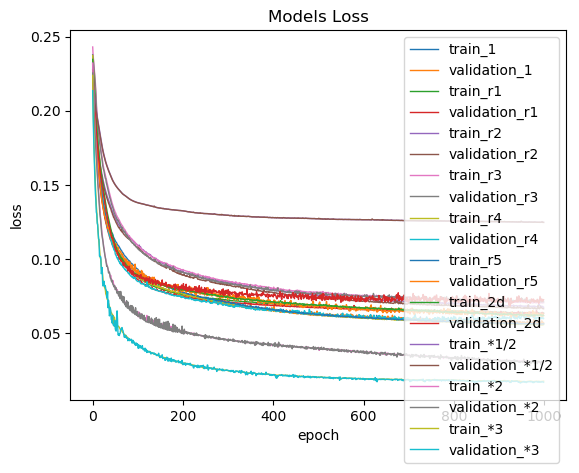

In [118]:
#PROBANDO
f = plt.figure()
plt.plot(history_1.history['loss'], linewidth=1)
plt.plot(history_1.history['val_loss'], linewidth=1)
plt.plot(history_1_wdor1.history['loss'], linewidth=1)
plt.plot(history_1_wdor1.history['val_loss'], linewidth=1)
plt.plot(history_1_wdor2.history['loss'], linewidth=1)
plt.plot(history_1_wdor2.history['val_loss'], linewidth=1)
plt.plot(history_1_wdor3.history['loss'], linewidth=1)
plt.plot(history_1_wdor3.history['val_loss'], linewidth=1)
plt.plot(history_1_wdor4.history['loss'], linewidth=1)
plt.plot(history_1_wdor4.history['val_loss'], linewidth=1)
plt.plot(history_1_wdor5.history['loss'], linewidth=1)
plt.plot(history_1_wdor5.history['val_loss'], linewidth=1)
plt.plot(history_1_wdo2.history['loss'], linewidth=1)
plt.plot(history_1_wdo2.history['val_loss'], linewidth=1)
plt.plot(history_1b.history['loss'], linewidth=1)
plt.plot(history_1b.history['val_loss'], linewidth=1)
plt.plot(history_1c.history['loss'], linewidth=1)
plt.plot(history_1c.history['val_loss'], linewidth=1)
plt.plot(history_1d.history['loss'], linewidth=1)
plt.plot(history_1d.history['val_loss'], linewidth=1)
plt.title('Models Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_1', 'validation_1','train_r1', 'validation_r1','train_r2', 'validation_r2','train_r3', 'validation_r3','train_r4', 'validation_r4','train_r5', 'validation_r5','train_2d', 'validation_2d','train_*1/2', 'validation_*1/2','train_*2', 'validation_*2','train_*3', 'validation_*3'], loc='upper right')
plt.show()
#f.savefig('mxtest2.pdf', bbox_inches='tight')

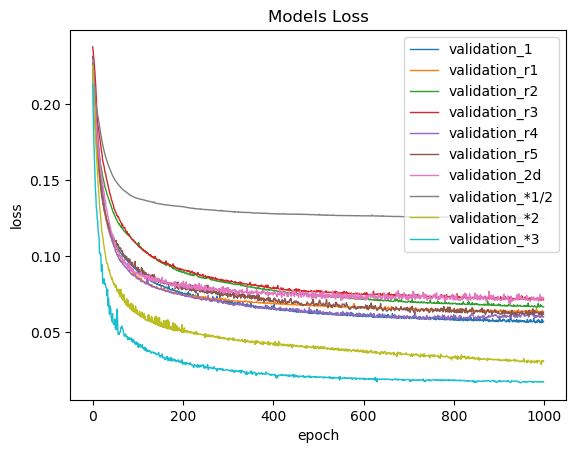

In [119]:
#PROBANDO
f = plt.figure()
plt.plot(history_1.history['val_loss'], linewidth=1)
plt.plot(history_1_wdor1.history['val_loss'], linewidth=1)
plt.plot(history_1_wdor2.history['val_loss'], linewidth=1)
plt.plot(history_1_wdor3.history['val_loss'], linewidth=1)
plt.plot(history_1_wdor4.history['val_loss'], linewidth=1)
plt.plot(history_1_wdor5.history['val_loss'], linewidth=1)
plt.plot(history_1_wdo2.history['val_loss'], linewidth=1)
plt.plot(history_1b.history['val_loss'], linewidth=1)
plt.plot(history_1c.history['val_loss'], linewidth=1)
plt.plot(history_1d.history['val_loss'], linewidth=1)
plt.title('Models Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['validation_1','validation_r1', 'validation_r2', 'validation_r3', 'validation_r4', 'validation_r5', 'validation_2d','validation_*1/2', 'validation_*2', 'validation_*3'], loc='upper right')
plt.show()
#f.savefig('mxtest2.pdf', bbox_inches='tight')

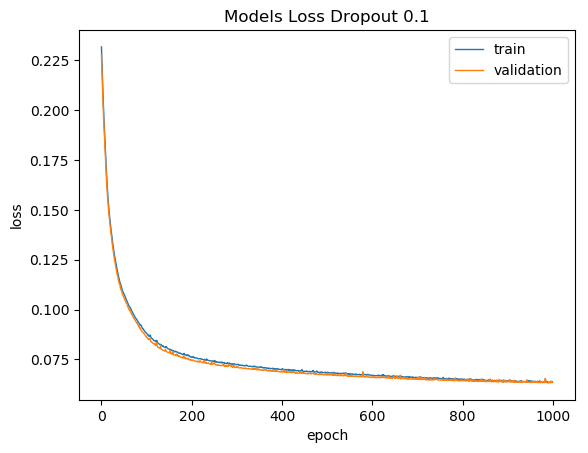

In [133]:
#PROBANDO
f = plt.figure()
plt.plot(history_1_wdor1.history['loss'], linewidth=1)
plt.plot(history_1_wdor1.history['val_loss'], linewidth=1)
plt.title('Model Loss Dropout 0.1')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
#f.savefig('mxtest2.pdf', bbox_inches='tight')

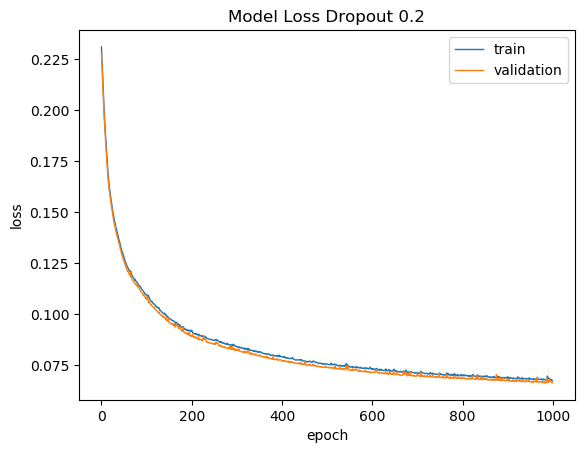

In [134]:
#PROBANDO
f = plt.figure()
plt.plot(history_1_wdor2.history['loss'], linewidth=1)
plt.plot(history_1_wdor2.history['val_loss'], linewidth=1)
plt.title('Model Loss Dropout 0.2')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
#f.savefig('mxtest2.pdf', bbox_inches='tight')

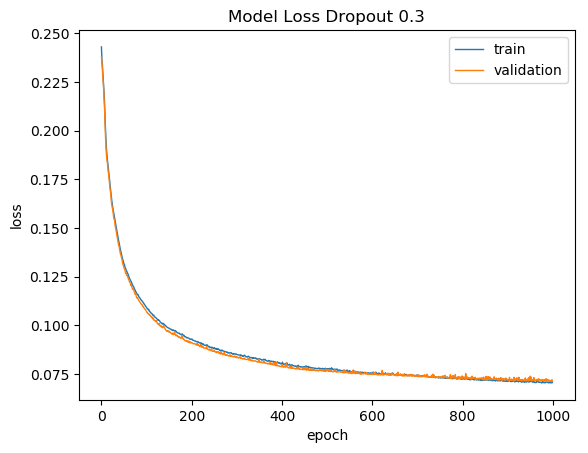

In [135]:
#PROBANDO
f = plt.figure()
plt.plot(history_1_wdor3.history['loss'], linewidth=1)
plt.plot(history_1_wdor3.history['val_loss'], linewidth=1)
plt.title('Model Loss Dropout 0.3')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
#f.savefig('mxtest2.pdf', bbox_inches='tight')

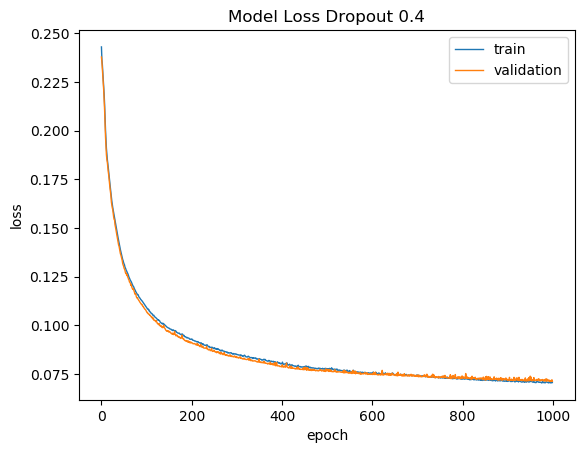

In [136]:
#PROBANDO
f = plt.figure()
plt.plot(history_1_wdor3.history['loss'], linewidth=1)
plt.plot(history_1_wdor3.history['val_loss'], linewidth=1)
plt.title('Model Loss Dropout 0.4')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
#f.savefig('mxtest2.pdf', bbox_inches='tight')

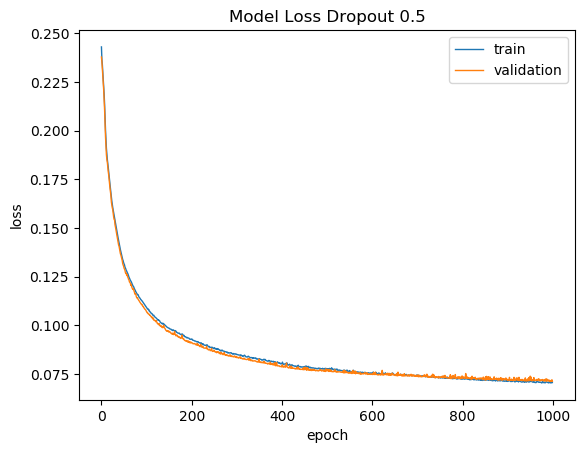

In [137]:
#PROBANDO
f = plt.figure()
plt.plot(history_1_wdor3.history['loss'], linewidth=1)
plt.plot(history_1_wdor3.history['val_loss'], linewidth=1)
plt.title('Model Loss Dropout 0.5')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
#f.savefig('mxtest2.pdf', bbox_inches='tight')

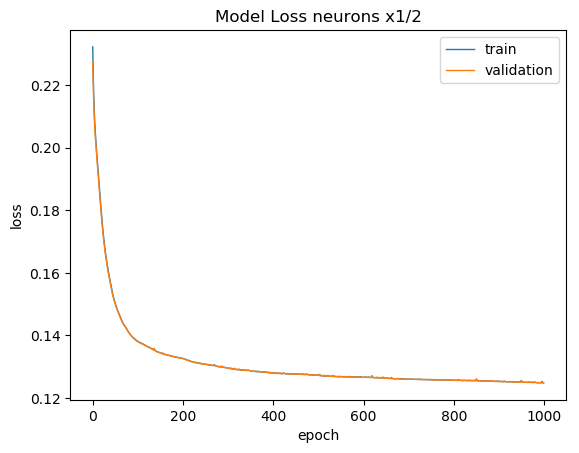

In [139]:
#PROBANDO
f = plt.figure()
plt.plot(history_1b.history['loss'], linewidth=1)
plt.plot(history_1b.history['val_loss'], linewidth=1)
plt.title('Model Loss neurons x1/2')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
#f.savefig('mxtest2.pdf', bbox_inches='tight')

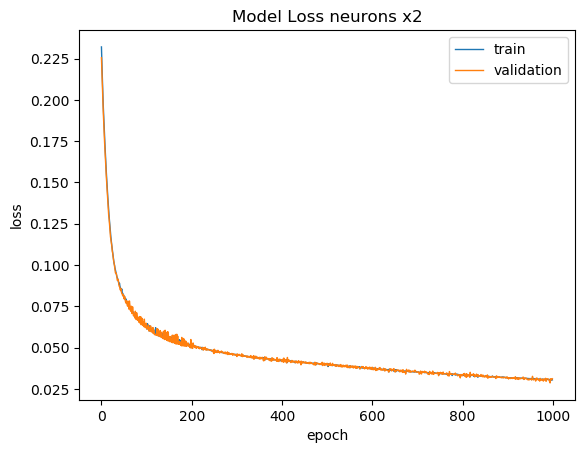

In [141]:
#PROBANDO
f = plt.figure()
plt.plot(history_1c.history['loss'], linewidth=1)
plt.plot(history_1c.history['val_loss'], linewidth=1)
plt.title('Model Loss neurons x2')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
#f.savefig('mxtest2.pdf', bbox_inches='tight')

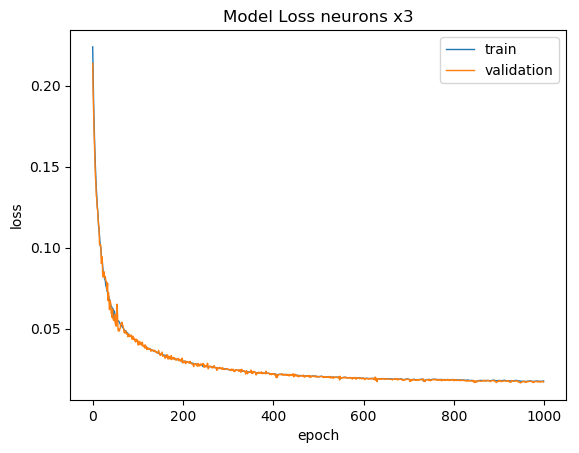

In [142]:
#PROBANDO
f = plt.figure()
plt.plot(history_1d.history['loss'], linewidth=1)
plt.plot(history_1d.history['val_loss'], linewidth=1)
plt.title('Model Loss neurons x3')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
#f.savefig('mxtest2.pdf', bbox_inches='tight')

In [120]:
#PROBANDO
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import Layer, Dense, Dropout, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D

input_nn = Input(shape=X1_training.shape[1:]) 
# Encoder
conv1_1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_nn)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
D1 = Dropout(rate=0.4)(pool1)
conv1_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(D1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)
D2 = Dropout(rate=0.4)(pool2)
conv1_3 = Conv2D(32, (3, 3), activation='relu', padding='same')(D2)
h = MaxPooling2D((2, 2), padding='same')(conv1_3)


# Decoder
conv2_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
D3 = Dropout(rate=0.4)(up1)
conv2_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(D3)
up2 = UpSampling2D((2, 2))(conv2_2)
D4 = Dropout(rate=0.4)(up2)
conv2_3 = Conv2D(64, (3, 3), activation='relu', padding='same')(D4)
up3 = UpSampling2D((2, 2))(conv2_3)
D5 = Dropout(rate=0.4)(up3)
output_nn = Conv2D(1, (3, 3), activation='linear', padding='same')(D5)

autoencoder1_xf = Model(inputs=input_nn, outputs=output_nn)
autoencoder1_xf.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_184 (Conv2D)          (None, 64, 64, 64)        640       
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_185 (Conv2D)          (None, 32, 32, 32)        18464     
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 16, 16, 32)        0         
__________

In [122]:
autoencoder1_xf.compile(loss=root_mean_squared_error,optimizer="adam",metrics=[coeff_determination,'mape','mae'])

In [123]:
#PROBANDO
epochs = 1000
batch_size = 32
history_1 = autoencoder1_xf.fit(X1_training, Y1_training, batch_size=batch_size, epochs=epochs, verbose=2,validation_data=(X1_test,Y1_test))

Train on 255 samples, validate on 110 samples
Epoch 1/1000
 - 4s - loss: 0.2415 - coeff_determination: -4.7937e-02 - mean_absolute_percentage_error: 46734580.4392 - mean_absolute_error: 0.0827 - val_loss: 0.2356 - val_coeff_determination: 0.0082 - val_mean_absolute_percentage_error: 10192528.1273 - val_mean_absolute_error: 0.0473
Epoch 2/1000
 - 2s - loss: 0.2286 - coeff_determination: 0.0655 - mean_absolute_percentage_error: 41874333.2078 - mean_absolute_error: 0.0760 - val_loss: 0.2329 - val_coeff_determination: 0.0300 - val_mean_absolute_percentage_error: 6628464.8545 - val_mean_absolute_error: 0.0434
Epoch 3/1000
 - 2s - loss: 0.2248 - coeff_determination: 0.0968 - mean_absolute_percentage_error: 32843401.8118 - mean_absolute_error: 0.0662 - val_loss: 0.2291 - val_coeff_determination: 0.0615 - val_mean_absolute_percentage_error: 7393587.0273 - val_mean_absolute_error: 0.0436
Epoch 4/1000
 - 2s - loss: 0.2207 - coeff_determination: 0.1293 - mean_absolute_percentage_error: 30822162.0

Epoch 30/1000
 - 2s - loss: 0.1689 - coeff_determination: 0.4903 - mean_absolute_percentage_error: 28559141.8667 - mean_absolute_error: 0.0531 - val_loss: 0.1688 - val_coeff_determination: 0.4906 - val_mean_absolute_percentage_error: 15118151.5273 - val_mean_absolute_error: 0.0426
Epoch 31/1000
 - 2s - loss: 0.1681 - coeff_determination: 0.4950 - mean_absolute_percentage_error: 29756230.2510 - mean_absolute_error: 0.0538 - val_loss: 0.1688 - val_coeff_determination: 0.4909 - val_mean_absolute_percentage_error: 13141639.2909 - val_mean_absolute_error: 0.0408
Epoch 32/1000
 - 2s - loss: 0.1673 - coeff_determination: 0.4994 - mean_absolute_percentage_error: 29310252.0314 - mean_absolute_error: 0.0533 - val_loss: 0.1675 - val_coeff_determination: 0.4984 - val_mean_absolute_percentage_error: 14112084.9818 - val_mean_absolute_error: 0.0414
Epoch 33/1000
 - 2s - loss: 0.1665 - coeff_determination: 0.5047 - mean_absolute_percentage_error: 29514693.2941 - mean_absolute_error: 0.0533 - val_loss:

Epoch 60/1000
 - 2s - loss: 0.1483 - coeff_determination: 0.6070 - mean_absolute_percentage_error: 30384992.8863 - mean_absolute_error: 0.0499 - val_loss: 0.1420 - val_coeff_determination: 0.6393 - val_mean_absolute_percentage_error: 16634007.8364 - val_mean_absolute_error: 0.0390
Epoch 61/1000
 - 2s - loss: 0.1476 - coeff_determination: 0.6107 - mean_absolute_percentage_error: 30375975.3020 - mean_absolute_error: 0.0497 - val_loss: 0.1409 - val_coeff_determination: 0.6450 - val_mean_absolute_percentage_error: 16445238.4909 - val_mean_absolute_error: 0.0386
Epoch 62/1000
 - 2s - loss: 0.1470 - coeff_determination: 0.6135 - mean_absolute_percentage_error: 30582061.0431 - mean_absolute_error: 0.0497 - val_loss: 0.1331 - val_coeff_determination: 0.6834 - val_mean_absolute_percentage_error: 18336002.0000 - val_mean_absolute_error: 0.0388
Epoch 63/1000
 - 2s - loss: 0.1463 - coeff_determination: 0.6175 - mean_absolute_percentage_error: 30437378.9255 - mean_absolute_error: 0.0494 - val_loss:

Epoch 90/1000
 - 2s - loss: 0.1382 - coeff_determination: 0.6588 - mean_absolute_percentage_error: 31494343.5765 - mean_absolute_error: 0.0486 - val_loss: 0.1247 - val_coeff_determination: 0.7220 - val_mean_absolute_percentage_error: 18303988.6909 - val_mean_absolute_error: 0.0373
Epoch 91/1000
 - 2s - loss: 0.1381 - coeff_determination: 0.6591 - mean_absolute_percentage_error: 31659174.8627 - mean_absolute_error: 0.0487 - val_loss: 0.1252 - val_coeff_determination: 0.7199 - val_mean_absolute_percentage_error: 18569688.5091 - val_mean_absolute_error: 0.0375
Epoch 92/1000
 - 2s - loss: 0.1381 - coeff_determination: 0.6593 - mean_absolute_percentage_error: 31352405.8353 - mean_absolute_error: 0.0484 - val_loss: 0.1247 - val_coeff_determination: 0.7219 - val_mean_absolute_percentage_error: 18137305.5273 - val_mean_absolute_error: 0.0372
Epoch 93/1000
 - 2s - loss: 0.1379 - coeff_determination: 0.6598 - mean_absolute_percentage_error: 31706999.1059 - mean_absolute_error: 0.0487 - val_loss:

Epoch 119/1000
 - 2s - loss: 0.1340 - coeff_determination: 0.6791 - mean_absolute_percentage_error: 31882777.2627 - mean_absolute_error: 0.0480 - val_loss: 0.1200 - val_coeff_determination: 0.7427 - val_mean_absolute_percentage_error: 19384668.2545 - val_mean_absolute_error: 0.0372
Epoch 120/1000
 - 2s - loss: 0.1339 - coeff_determination: 0.6794 - mean_absolute_percentage_error: 32142690.5020 - mean_absolute_error: 0.0481 - val_loss: 0.1220 - val_coeff_determination: 0.7341 - val_mean_absolute_percentage_error: 18885287.4545 - val_mean_absolute_error: 0.0372
Epoch 121/1000
 - 2s - loss: 0.1335 - coeff_determination: 0.6813 - mean_absolute_percentage_error: 32215371.0510 - mean_absolute_error: 0.0480 - val_loss: 0.1225 - val_coeff_determination: 0.7316 - val_mean_absolute_percentage_error: 18451825.4545 - val_mean_absolute_error: 0.0371
Epoch 122/1000
 - 2s - loss: 0.1335 - coeff_determination: 0.6813 - mean_absolute_percentage_error: 31755345.6863 - mean_absolute_error: 0.0479 - val_l

Epoch 148/1000
 - 2s - loss: 0.1318 - coeff_determination: 0.6896 - mean_absolute_percentage_error: 31809385.0275 - mean_absolute_error: 0.0475 - val_loss: 0.1140 - val_coeff_determination: 0.7675 - val_mean_absolute_percentage_error: 20564508.7636 - val_mean_absolute_error: 0.0372
Epoch 149/1000
 - 2s - loss: 0.1311 - coeff_determination: 0.6926 - mean_absolute_percentage_error: 32289432.2275 - mean_absolute_error: 0.0476 - val_loss: 0.1145 - val_coeff_determination: 0.7658 - val_mean_absolute_percentage_error: 19817330.9818 - val_mean_absolute_error: 0.0366
Epoch 150/1000
 - 2s - loss: 0.1313 - coeff_determination: 0.6917 - mean_absolute_percentage_error: 31776487.0510 - mean_absolute_error: 0.0473 - val_loss: 0.1142 - val_coeff_determination: 0.7669 - val_mean_absolute_percentage_error: 20785641.2727 - val_mean_absolute_error: 0.0374
Epoch 151/1000
 - 2s - loss: 0.1313 - coeff_determination: 0.6919 - mean_absolute_percentage_error: 32297503.7255 - mean_absolute_error: 0.0477 - val_l

Epoch 177/1000
 - 2s - loss: 0.1303 - coeff_determination: 0.6966 - mean_absolute_percentage_error: 32102307.0353 - mean_absolute_error: 0.0473 - val_loss: 0.1129 - val_coeff_determination: 0.7720 - val_mean_absolute_percentage_error: 20831504.2545 - val_mean_absolute_error: 0.0372
Epoch 178/1000
 - 2s - loss: 0.1295 - coeff_determination: 0.7001 - mean_absolute_percentage_error: 31955300.6039 - mean_absolute_error: 0.0470 - val_loss: 0.1129 - val_coeff_determination: 0.7722 - val_mean_absolute_percentage_error: 20518445.2727 - val_mean_absolute_error: 0.0368
Epoch 179/1000
 - 2s - loss: 0.1301 - coeff_determination: 0.6976 - mean_absolute_percentage_error: 32037111.6314 - mean_absolute_error: 0.0472 - val_loss: 0.1129 - val_coeff_determination: 0.7720 - val_mean_absolute_percentage_error: 20768853.7455 - val_mean_absolute_error: 0.0371
Epoch 180/1000
 - 2s - loss: 0.1298 - coeff_determination: 0.6986 - mean_absolute_percentage_error: 32092055.5373 - mean_absolute_error: 0.0472 - val_l

Epoch 206/1000
 - 2s - loss: 0.1283 - coeff_determination: 0.7059 - mean_absolute_percentage_error: 31841239.3098 - mean_absolute_error: 0.0466 - val_loss: 0.1095 - val_coeff_determination: 0.7859 - val_mean_absolute_percentage_error: 21256245.0182 - val_mean_absolute_error: 0.0367
Epoch 207/1000
 - 2s - loss: 0.1286 - coeff_determination: 0.7045 - mean_absolute_percentage_error: 31936659.8039 - mean_absolute_error: 0.0468 - val_loss: 0.1090 - val_coeff_determination: 0.7877 - val_mean_absolute_percentage_error: 21379436.2545 - val_mean_absolute_error: 0.0368
Epoch 208/1000
 - 2s - loss: 0.1285 - coeff_determination: 0.7048 - mean_absolute_percentage_error: 32391351.9529 - mean_absolute_error: 0.0472 - val_loss: 0.1091 - val_coeff_determination: 0.7871 - val_mean_absolute_percentage_error: 21488485.2727 - val_mean_absolute_error: 0.0369
Epoch 209/1000
 - 2s - loss: 0.1287 - coeff_determination: 0.7037 - mean_absolute_percentage_error: 31807870.1098 - mean_absolute_error: 0.0468 - val_l

Epoch 235/1000
 - 2s - loss: 0.1281 - coeff_determination: 0.7067 - mean_absolute_percentage_error: 32291110.2980 - mean_absolute_error: 0.0470 - val_loss: 0.1081 - val_coeff_determination: 0.7913 - val_mean_absolute_percentage_error: 21486030.0000 - val_mean_absolute_error: 0.0367
Epoch 236/1000
 - 2s - loss: 0.1278 - coeff_determination: 0.7082 - mean_absolute_percentage_error: 31931199.7255 - mean_absolute_error: 0.0466 - val_loss: 0.1075 - val_coeff_determination: 0.7935 - val_mean_absolute_percentage_error: 21693878.9818 - val_mean_absolute_error: 0.0367
Epoch 237/1000
 - 2s - loss: 0.1280 - coeff_determination: 0.7072 - mean_absolute_percentage_error: 31994782.2588 - mean_absolute_error: 0.0467 - val_loss: 0.1088 - val_coeff_determination: 0.7885 - val_mean_absolute_percentage_error: 21447993.2727 - val_mean_absolute_error: 0.0367
Epoch 238/1000
 - 2s - loss: 0.1281 - coeff_determination: 0.7068 - mean_absolute_percentage_error: 31986122.5176 - mean_absolute_error: 0.0467 - val_l

Epoch 264/1000
 - 2s - loss: 0.1276 - coeff_determination: 0.7087 - mean_absolute_percentage_error: 32338809.3725 - mean_absolute_error: 0.0469 - val_loss: 0.1085 - val_coeff_determination: 0.7894 - val_mean_absolute_percentage_error: 21977669.7455 - val_mean_absolute_error: 0.0372
Epoch 265/1000
 - 2s - loss: 0.1274 - coeff_determination: 0.7101 - mean_absolute_percentage_error: 31956160.4863 - mean_absolute_error: 0.0466 - val_loss: 0.1074 - val_coeff_determination: 0.7937 - val_mean_absolute_percentage_error: 21286844.0000 - val_mean_absolute_error: 0.0363
Epoch 266/1000
 - 2s - loss: 0.1276 - coeff_determination: 0.7091 - mean_absolute_percentage_error: 32011129.3255 - mean_absolute_error: 0.0466 - val_loss: 0.1066 - val_coeff_determination: 0.7967 - val_mean_absolute_percentage_error: 22106480.2545 - val_mean_absolute_error: 0.0368
Epoch 267/1000
 - 2s - loss: 0.1280 - coeff_determination: 0.7073 - mean_absolute_percentage_error: 32145658.8941 - mean_absolute_error: 0.0469 - val_l

Epoch 293/1000
 - 2s - loss: 0.1270 - coeff_determination: 0.7117 - mean_absolute_percentage_error: 31962311.0510 - mean_absolute_error: 0.0465 - val_loss: 0.1074 - val_coeff_determination: 0.7938 - val_mean_absolute_percentage_error: 21651277.7818 - val_mean_absolute_error: 0.0366
Epoch 294/1000
 - 2s - loss: 0.1268 - coeff_determination: 0.7124 - mean_absolute_percentage_error: 31941075.6392 - mean_absolute_error: 0.0465 - val_loss: 0.1078 - val_coeff_determination: 0.7924 - val_mean_absolute_percentage_error: 21641571.9636 - val_mean_absolute_error: 0.0368
Epoch 295/1000
 - 2s - loss: 0.1270 - coeff_determination: 0.7118 - mean_absolute_percentage_error: 32302629.9843 - mean_absolute_error: 0.0467 - val_loss: 0.1082 - val_coeff_determination: 0.7908 - val_mean_absolute_percentage_error: 21058224.2545 - val_mean_absolute_error: 0.0362
Epoch 296/1000
 - 2s - loss: 0.1266 - coeff_determination: 0.7133 - mean_absolute_percentage_error: 31607375.6784 - mean_absolute_error: 0.0461 - val_l

Epoch 322/1000
 - 2s - loss: 0.1267 - coeff_determination: 0.7130 - mean_absolute_percentage_error: 32097389.6157 - mean_absolute_error: 0.0466 - val_loss: 0.1039 - val_coeff_determination: 0.8068 - val_mean_absolute_percentage_error: 22901592.7636 - val_mean_absolute_error: 0.0368
Epoch 323/1000
 - 2s - loss: 0.1265 - coeff_determination: 0.7140 - mean_absolute_percentage_error: 32003491.5529 - mean_absolute_error: 0.0463 - val_loss: 0.1041 - val_coeff_determination: 0.8064 - val_mean_absolute_percentage_error: 22350076.5091 - val_mean_absolute_error: 0.0363
Epoch 324/1000
 - 2s - loss: 0.1265 - coeff_determination: 0.7141 - mean_absolute_percentage_error: 31910934.1647 - mean_absolute_error: 0.0463 - val_loss: 0.1056 - val_coeff_determination: 0.8006 - val_mean_absolute_percentage_error: 22070460.4727 - val_mean_absolute_error: 0.0366
Epoch 325/1000
 - 2s - loss: 0.1263 - coeff_determination: 0.7150 - mean_absolute_percentage_error: 31979774.5255 - mean_absolute_error: 0.0463 - val_l

Epoch 351/1000
 - 2s - loss: 0.1266 - coeff_determination: 0.7134 - mean_absolute_percentage_error: 32336682.0784 - mean_absolute_error: 0.0466 - val_loss: 0.1044 - val_coeff_determination: 0.8052 - val_mean_absolute_percentage_error: 21680844.2545 - val_mean_absolute_error: 0.0358
Epoch 352/1000
 - 2s - loss: 0.1266 - coeff_determination: 0.7136 - mean_absolute_percentage_error: 31784213.4275 - mean_absolute_error: 0.0463 - val_loss: 0.1038 - val_coeff_determination: 0.8076 - val_mean_absolute_percentage_error: 22684818.9818 - val_mean_absolute_error: 0.0366
Epoch 353/1000
 - 2s - loss: 0.1268 - coeff_determination: 0.7127 - mean_absolute_percentage_error: 32021958.7529 - mean_absolute_error: 0.0464 - val_loss: 0.1051 - val_coeff_determination: 0.8024 - val_mean_absolute_percentage_error: 22179179.7091 - val_mean_absolute_error: 0.0365
Epoch 354/1000
 - 2s - loss: 0.1265 - coeff_determination: 0.7139 - mean_absolute_percentage_error: 32465122.3922 - mean_absolute_error: 0.0467 - val_l

Epoch 380/1000
 - 2s - loss: 0.1259 - coeff_determination: 0.7166 - mean_absolute_percentage_error: 31796655.7412 - mean_absolute_error: 0.0461 - val_loss: 0.1037 - val_coeff_determination: 0.8076 - val_mean_absolute_percentage_error: 22359830.0000 - val_mean_absolute_error: 0.0362
Epoch 381/1000
 - 2s - loss: 0.1262 - coeff_determination: 0.7152 - mean_absolute_percentage_error: 32138906.6196 - mean_absolute_error: 0.0464 - val_loss: 0.1036 - val_coeff_determination: 0.8080 - val_mean_absolute_percentage_error: 22387574.7273 - val_mean_absolute_error: 0.0363
Epoch 382/1000
 - 2s - loss: 0.1264 - coeff_determination: 0.7143 - mean_absolute_percentage_error: 32073675.8510 - mean_absolute_error: 0.0464 - val_loss: 0.1058 - val_coeff_determination: 0.7998 - val_mean_absolute_percentage_error: 21594077.0182 - val_mean_absolute_error: 0.0362
Epoch 383/1000
 - 2s - loss: 0.1264 - coeff_determination: 0.7142 - mean_absolute_percentage_error: 32208616.4706 - mean_absolute_error: 0.0465 - val_l

Epoch 409/1000
 - 2s - loss: 0.1261 - coeff_determination: 0.7160 - mean_absolute_percentage_error: 32104478.6353 - mean_absolute_error: 0.0464 - val_loss: 0.1044 - val_coeff_determination: 0.8052 - val_mean_absolute_percentage_error: 22105111.7455 - val_mean_absolute_error: 0.0362
Epoch 410/1000
 - 2s - loss: 0.1261 - coeff_determination: 0.7159 - mean_absolute_percentage_error: 32075413.3804 - mean_absolute_error: 0.0463 - val_loss: 0.1042 - val_coeff_determination: 0.8060 - val_mean_absolute_percentage_error: 21940335.7455 - val_mean_absolute_error: 0.0360
Epoch 411/1000
 - 2s - loss: 0.1257 - coeff_determination: 0.7177 - mean_absolute_percentage_error: 31920415.3490 - mean_absolute_error: 0.0461 - val_loss: 0.1043 - val_coeff_determination: 0.8057 - val_mean_absolute_percentage_error: 22210883.2727 - val_mean_absolute_error: 0.0363
Epoch 412/1000
 - 2s - loss: 0.1261 - coeff_determination: 0.7156 - mean_absolute_percentage_error: 32156613.3333 - mean_absolute_error: 0.0464 - val_l

Epoch 438/1000
 - 2s - loss: 0.1260 - coeff_determination: 0.7161 - mean_absolute_percentage_error: 32172551.5608 - mean_absolute_error: 0.0463 - val_loss: 0.1041 - val_coeff_determination: 0.8064 - val_mean_absolute_percentage_error: 21652590.2182 - val_mean_absolute_error: 0.0358
Epoch 439/1000
 - 2s - loss: 0.1258 - coeff_determination: 0.7170 - mean_absolute_percentage_error: 32196838.5098 - mean_absolute_error: 0.0464 - val_loss: 0.1037 - val_coeff_determination: 0.8076 - val_mean_absolute_percentage_error: 22088168.7636 - val_mean_absolute_error: 0.0361
Epoch 440/1000
 - 2s - loss: 0.1255 - coeff_determination: 0.7186 - mean_absolute_percentage_error: 31754155.3490 - mean_absolute_error: 0.0460 - val_loss: 0.1036 - val_coeff_determination: 0.8082 - val_mean_absolute_percentage_error: 22296261.4909 - val_mean_absolute_error: 0.0362
Epoch 441/1000
 - 2s - loss: 0.1258 - coeff_determination: 0.7172 - mean_absolute_percentage_error: 32162606.6196 - mean_absolute_error: 0.0463 - val_l

Epoch 467/1000
 - 2s - loss: 0.1254 - coeff_determination: 0.7187 - mean_absolute_percentage_error: 32239446.8471 - mean_absolute_error: 0.0463 - val_loss: 0.1025 - val_coeff_determination: 0.8121 - val_mean_absolute_percentage_error: 22438381.7455 - val_mean_absolute_error: 0.0360
Epoch 468/1000
 - 2s - loss: 0.1253 - coeff_determination: 0.7193 - mean_absolute_percentage_error: 31940829.4353 - mean_absolute_error: 0.0460 - val_loss: 0.1038 - val_coeff_determination: 0.8073 - val_mean_absolute_percentage_error: 21797080.4727 - val_mean_absolute_error: 0.0358
Epoch 469/1000
 - 2s - loss: 0.1254 - coeff_determination: 0.7189 - mean_absolute_percentage_error: 32370349.5686 - mean_absolute_error: 0.0465 - val_loss: 0.1016 - val_coeff_determination: 0.8155 - val_mean_absolute_percentage_error: 22613680.0364 - val_mean_absolute_error: 0.0358
Epoch 470/1000
 - 2s - loss: 0.1258 - coeff_determination: 0.7171 - mean_absolute_percentage_error: 31535350.1725 - mean_absolute_error: 0.0459 - val_l

Epoch 496/1000
 - 2s - loss: 0.1252 - coeff_determination: 0.7197 - mean_absolute_percentage_error: 32147241.9686 - mean_absolute_error: 0.0462 - val_loss: 0.1017 - val_coeff_determination: 0.8151 - val_mean_absolute_percentage_error: 22848349.0182 - val_mean_absolute_error: 0.0361
Epoch 497/1000
 - 2s - loss: 0.1253 - coeff_determination: 0.7194 - mean_absolute_percentage_error: 31757190.8314 - mean_absolute_error: 0.0459 - val_loss: 0.1017 - val_coeff_determination: 0.8151 - val_mean_absolute_percentage_error: 22475442.0364 - val_mean_absolute_error: 0.0358
Epoch 498/1000
 - 2s - loss: 0.1253 - coeff_determination: 0.7195 - mean_absolute_percentage_error: 32148248.3608 - mean_absolute_error: 0.0462 - val_loss: 0.1035 - val_coeff_determination: 0.8087 - val_mean_absolute_percentage_error: 22020140.5091 - val_mean_absolute_error: 0.0360
Epoch 499/1000
 - 2s - loss: 0.1252 - coeff_determination: 0.7197 - mean_absolute_percentage_error: 32178506.8471 - mean_absolute_error: 0.0463 - val_l

Epoch 525/1000
 - 2s - loss: 0.1250 - coeff_determination: 0.7209 - mean_absolute_percentage_error: 32095208.0157 - mean_absolute_error: 0.0461 - val_loss: 0.1019 - val_coeff_determination: 0.8144 - val_mean_absolute_percentage_error: 22854310.5091 - val_mean_absolute_error: 0.0362
Epoch 526/1000
 - 2s - loss: 0.1258 - coeff_determination: 0.7170 - mean_absolute_percentage_error: 32333920.6353 - mean_absolute_error: 0.0465 - val_loss: 0.1026 - val_coeff_determination: 0.8119 - val_mean_absolute_percentage_error: 22200415.4909 - val_mean_absolute_error: 0.0358
Epoch 527/1000
 - 2s - loss: 0.1252 - coeff_determination: 0.7200 - mean_absolute_percentage_error: 32218099.0275 - mean_absolute_error: 0.0462 - val_loss: 0.1020 - val_coeff_determination: 0.8141 - val_mean_absolute_percentage_error: 22423402.2909 - val_mean_absolute_error: 0.0358
Epoch 528/1000
 - 2s - loss: 0.1249 - coeff_determination: 0.7211 - mean_absolute_percentage_error: 31996901.8431 - mean_absolute_error: 0.0460 - val_l

Epoch 554/1000
 - 2s - loss: 0.1251 - coeff_determination: 0.7204 - mean_absolute_percentage_error: 32356018.2353 - mean_absolute_error: 0.0463 - val_loss: 0.1030 - val_coeff_determination: 0.8102 - val_mean_absolute_percentage_error: 22002185.2727 - val_mean_absolute_error: 0.0358
Epoch 555/1000
 - 2s - loss: 0.1257 - coeff_determination: 0.7175 - mean_absolute_percentage_error: 32049043.6549 - mean_absolute_error: 0.0462 - val_loss: 0.1015 - val_coeff_determination: 0.8159 - val_mean_absolute_percentage_error: 22734584.9818 - val_mean_absolute_error: 0.0360
Epoch 556/1000
 - 2s - loss: 0.1250 - coeff_determination: 0.7208 - mean_absolute_percentage_error: 32101718.4471 - mean_absolute_error: 0.0462 - val_loss: 0.1017 - val_coeff_determination: 0.8150 - val_mean_absolute_percentage_error: 22802780.5455 - val_mean_absolute_error: 0.0361
Epoch 557/1000
 - 2s - loss: 0.1251 - coeff_determination: 0.7200 - mean_absolute_percentage_error: 32058657.7490 - mean_absolute_error: 0.0462 - val_l

Epoch 583/1000
 - 2s - loss: 0.1248 - coeff_determination: 0.7215 - mean_absolute_percentage_error: 32090174.7216 - mean_absolute_error: 0.0461 - val_loss: 0.1014 - val_coeff_determination: 0.8163 - val_mean_absolute_percentage_error: 22803337.2727 - val_mean_absolute_error: 0.0360
Epoch 584/1000
 - 2s - loss: 0.1252 - coeff_determination: 0.7198 - mean_absolute_percentage_error: 32080441.3176 - mean_absolute_error: 0.0461 - val_loss: 0.1022 - val_coeff_determination: 0.8132 - val_mean_absolute_percentage_error: 22256469.2000 - val_mean_absolute_error: 0.0357
Epoch 585/1000
 - 2s - loss: 0.1248 - coeff_determination: 0.7214 - mean_absolute_percentage_error: 32201469.9529 - mean_absolute_error: 0.0461 - val_loss: 0.1004 - val_coeff_determination: 0.8199 - val_mean_absolute_percentage_error: 22985706.7273 - val_mean_absolute_error: 0.0359
Epoch 586/1000
 - 2s - loss: 0.1247 - coeff_determination: 0.7222 - mean_absolute_percentage_error: 31845518.0314 - mean_absolute_error: 0.0459 - val_l

Epoch 612/1000
 - 2s - loss: 0.1245 - coeff_determination: 0.7229 - mean_absolute_percentage_error: 32578672.3216 - mean_absolute_error: 0.0464 - val_loss: 0.1036 - val_coeff_determination: 0.8082 - val_mean_absolute_percentage_error: 21629866.7636 - val_mean_absolute_error: 0.0357
Epoch 613/1000
 - 2s - loss: 0.1248 - coeff_determination: 0.7214 - mean_absolute_percentage_error: 32365197.8980 - mean_absolute_error: 0.0463 - val_loss: 0.1024 - val_coeff_determination: 0.8125 - val_mean_absolute_percentage_error: 22384912.7636 - val_mean_absolute_error: 0.0360
Epoch 614/1000
 - 2s - loss: 0.1245 - coeff_determination: 0.7228 - mean_absolute_percentage_error: 31847383.9137 - mean_absolute_error: 0.0458 - val_loss: 0.1018 - val_coeff_determination: 0.8149 - val_mean_absolute_percentage_error: 22649454.5091 - val_mean_absolute_error: 0.0361
Epoch 615/1000
 - 2s - loss: 0.1248 - coeff_determination: 0.7218 - mean_absolute_percentage_error: 32154250.2824 - mean_absolute_error: 0.0461 - val_l

Epoch 641/1000
 - 2s - loss: 0.1248 - coeff_determination: 0.7215 - mean_absolute_percentage_error: 31895268.9725 - mean_absolute_error: 0.0459 - val_loss: 0.1017 - val_coeff_determination: 0.8151 - val_mean_absolute_percentage_error: 22297819.7455 - val_mean_absolute_error: 0.0357
Epoch 642/1000
 - 2s - loss: 0.1250 - coeff_determination: 0.7206 - mean_absolute_percentage_error: 32299873.6627 - mean_absolute_error: 0.0462 - val_loss: 0.1020 - val_coeff_determination: 0.8141 - val_mean_absolute_percentage_error: 22507005.7818 - val_mean_absolute_error: 0.0360
Epoch 643/1000
 - 2s - loss: 0.1250 - coeff_determination: 0.7205 - mean_absolute_percentage_error: 32265617.2000 - mean_absolute_error: 0.0462 - val_loss: 0.1014 - val_coeff_determination: 0.8162 - val_mean_absolute_percentage_error: 22491427.4545 - val_mean_absolute_error: 0.0357
Epoch 644/1000
 - 2s - loss: 0.1246 - coeff_determination: 0.7223 - mean_absolute_percentage_error: 32079220.7216 - mean_absolute_error: 0.0460 - val_l

Epoch 670/1000
 - 2s - loss: 0.1243 - coeff_determination: 0.7237 - mean_absolute_percentage_error: 32389775.9216 - mean_absolute_error: 0.0463 - val_loss: 0.1009 - val_coeff_determination: 0.8181 - val_mean_absolute_percentage_error: 23275384.5091 - val_mean_absolute_error: 0.0363
Epoch 671/1000
 - 2s - loss: 0.1244 - coeff_determination: 0.7236 - mean_absolute_percentage_error: 32004664.3137 - mean_absolute_error: 0.0459 - val_loss: 0.1015 - val_coeff_determination: 0.8160 - val_mean_absolute_percentage_error: 22627910.2182 - val_mean_absolute_error: 0.0359
Epoch 672/1000
 - 2s - loss: 0.1249 - coeff_determination: 0.7212 - mean_absolute_percentage_error: 32193855.8588 - mean_absolute_error: 0.0461 - val_loss: 0.1019 - val_coeff_determination: 0.8144 - val_mean_absolute_percentage_error: 22622094.5091 - val_mean_absolute_error: 0.0361
Epoch 673/1000
 - 2s - loss: 0.1248 - coeff_determination: 0.7214 - mean_absolute_percentage_error: 32398671.2941 - mean_absolute_error: 0.0463 - val_l

Epoch 699/1000
 - 2s - loss: 0.1246 - coeff_determination: 0.7227 - mean_absolute_percentage_error: 32176193.9137 - mean_absolute_error: 0.0460 - val_loss: 0.1016 - val_coeff_determination: 0.8154 - val_mean_absolute_percentage_error: 22517064.7636 - val_mean_absolute_error: 0.0359
Epoch 700/1000
 - 2s - loss: 0.1245 - coeff_determination: 0.7230 - mean_absolute_percentage_error: 32040745.7333 - mean_absolute_error: 0.0460 - val_loss: 0.1017 - val_coeff_determination: 0.8151 - val_mean_absolute_percentage_error: 22704786.7273 - val_mean_absolute_error: 0.0361
Epoch 701/1000
 - 2s - loss: 0.1249 - coeff_determination: 0.7211 - mean_absolute_percentage_error: 32089387.5922 - mean_absolute_error: 0.0461 - val_loss: 0.1014 - val_coeff_determination: 0.8161 - val_mean_absolute_percentage_error: 22546681.7091 - val_mean_absolute_error: 0.0358
Epoch 702/1000
 - 2s - loss: 0.1245 - coeff_determination: 0.7227 - mean_absolute_percentage_error: 32205668.2588 - mean_absolute_error: 0.0460 - val_l

Epoch 728/1000
 - 2s - loss: 0.1242 - coeff_determination: 0.7242 - mean_absolute_percentage_error: 32129996.8941 - mean_absolute_error: 0.0460 - val_loss: 0.1005 - val_coeff_determination: 0.8195 - val_mean_absolute_percentage_error: 23154726.9818 - val_mean_absolute_error: 0.0361
Epoch 729/1000
 - 2s - loss: 0.1244 - coeff_determination: 0.7233 - mean_absolute_percentage_error: 32210740.9882 - mean_absolute_error: 0.0462 - val_loss: 0.0997 - val_coeff_determination: 0.8223 - val_mean_absolute_percentage_error: 23606227.2364 - val_mean_absolute_error: 0.0361
Epoch 730/1000
 - 2s - loss: 0.1247 - coeff_determination: 0.7222 - mean_absolute_percentage_error: 31724129.8824 - mean_absolute_error: 0.0457 - val_loss: 0.1002 - val_coeff_determination: 0.8205 - val_mean_absolute_percentage_error: 23508960.5091 - val_mean_absolute_error: 0.0363
Epoch 731/1000
 - 2s - loss: 0.1244 - coeff_determination: 0.7232 - mean_absolute_percentage_error: 32402619.0902 - mean_absolute_error: 0.0462 - val_l

Epoch 757/1000
 - 2s - loss: 0.1247 - coeff_determination: 0.7218 - mean_absolute_percentage_error: 32402904.0627 - mean_absolute_error: 0.0463 - val_loss: 0.1011 - val_coeff_determination: 0.8174 - val_mean_absolute_percentage_error: 22627866.5091 - val_mean_absolute_error: 0.0358
Epoch 758/1000
 - 2s - loss: 0.1245 - coeff_determination: 0.7230 - mean_absolute_percentage_error: 32029932.9255 - mean_absolute_error: 0.0459 - val_loss: 0.1013 - val_coeff_determination: 0.8166 - val_mean_absolute_percentage_error: 22695510.0000 - val_mean_absolute_error: 0.0359
Epoch 759/1000
 - 2s - loss: 0.1246 - coeff_determination: 0.7226 - mean_absolute_percentage_error: 32297487.6627 - mean_absolute_error: 0.0462 - val_loss: 0.1019 - val_coeff_determination: 0.8144 - val_mean_absolute_percentage_error: 22712449.2727 - val_mean_absolute_error: 0.0361
Epoch 760/1000
 - 2s - loss: 0.1246 - coeff_determination: 0.7226 - mean_absolute_percentage_error: 32183474.4157 - mean_absolute_error: 0.0460 - val_l

Epoch 786/1000
 - 2s - loss: 0.1242 - coeff_determination: 0.7244 - mean_absolute_percentage_error: 32245465.1922 - mean_absolute_error: 0.0460 - val_loss: 0.1014 - val_coeff_determination: 0.8161 - val_mean_absolute_percentage_error: 22552085.0182 - val_mean_absolute_error: 0.0359
Epoch 787/1000
 - 2s - loss: 0.1240 - coeff_determination: 0.7251 - mean_absolute_percentage_error: 32293761.9373 - mean_absolute_error: 0.0461 - val_loss: 0.1008 - val_coeff_determination: 0.8184 - val_mean_absolute_percentage_error: 22884315.2364 - val_mean_absolute_error: 0.0359
Epoch 788/1000
 - 2s - loss: 0.1241 - coeff_determination: 0.7249 - mean_absolute_percentage_error: 32099736.2824 - mean_absolute_error: 0.0459 - val_loss: 0.1010 - val_coeff_determination: 0.8176 - val_mean_absolute_percentage_error: 22960225.2727 - val_mean_absolute_error: 0.0361
Epoch 789/1000
 - 2s - loss: 0.1244 - coeff_determination: 0.7233 - mean_absolute_percentage_error: 32154920.7137 - mean_absolute_error: 0.0460 - val_l

Epoch 815/1000
 - 2s - loss: 0.1243 - coeff_determination: 0.7240 - mean_absolute_percentage_error: 31913806.0157 - mean_absolute_error: 0.0457 - val_loss: 0.1009 - val_coeff_determination: 0.8181 - val_mean_absolute_percentage_error: 22685726.7273 - val_mean_absolute_error: 0.0358
Epoch 816/1000
 - 2s - loss: 0.1240 - coeff_determination: 0.7252 - mean_absolute_percentage_error: 32321190.3373 - mean_absolute_error: 0.0461 - val_loss: 0.1009 - val_coeff_determination: 0.8181 - val_mean_absolute_percentage_error: 22555245.9636 - val_mean_absolute_error: 0.0357
Epoch 817/1000
 - 2s - loss: 0.1239 - coeff_determination: 0.7254 - mean_absolute_percentage_error: 32275080.6980 - mean_absolute_error: 0.0460 - val_loss: 0.0997 - val_coeff_determination: 0.8225 - val_mean_absolute_percentage_error: 23599470.5091 - val_mean_absolute_error: 0.0362
Epoch 818/1000
 - 2s - loss: 0.1245 - coeff_determination: 0.7227 - mean_absolute_percentage_error: 31908390.7843 - mean_absolute_error: 0.0459 - val_l

Epoch 844/1000
 - 2s - loss: 0.1245 - coeff_determination: 0.7231 - mean_absolute_percentage_error: 31936433.1451 - mean_absolute_error: 0.0459 - val_loss: 0.1008 - val_coeff_determination: 0.8184 - val_mean_absolute_percentage_error: 22966296.5091 - val_mean_absolute_error: 0.0360
Epoch 845/1000
 - 2s - loss: 0.1240 - coeff_determination: 0.7253 - mean_absolute_percentage_error: 32232077.6941 - mean_absolute_error: 0.0460 - val_loss: 0.1021 - val_coeff_determination: 0.8136 - val_mean_absolute_percentage_error: 22322160.0000 - val_mean_absolute_error: 0.0359
Epoch 846/1000
 - 2s - loss: 0.1240 - coeff_determination: 0.7251 - mean_absolute_percentage_error: 32534107.2392 - mean_absolute_error: 0.0462 - val_loss: 0.1004 - val_coeff_determination: 0.8197 - val_mean_absolute_percentage_error: 22844852.9818 - val_mean_absolute_error: 0.0357
Epoch 847/1000
 - 2s - loss: 0.1241 - coeff_determination: 0.7248 - mean_absolute_percentage_error: 31775310.6353 - mean_absolute_error: 0.0457 - val_l

Epoch 873/1000
 - 2s - loss: 0.1241 - coeff_determination: 0.7248 - mean_absolute_percentage_error: 32559645.7569 - mean_absolute_error: 0.0463 - val_loss: 0.1015 - val_coeff_determination: 0.8157 - val_mean_absolute_percentage_error: 22487498.2545 - val_mean_absolute_error: 0.0359
Epoch 874/1000
 - 2s - loss: 0.1241 - coeff_determination: 0.7248 - mean_absolute_percentage_error: 32260267.7569 - mean_absolute_error: 0.0460 - val_loss: 0.1006 - val_coeff_determination: 0.8190 - val_mean_absolute_percentage_error: 22430031.0182 - val_mean_absolute_error: 0.0354
Epoch 875/1000
 - 2s - loss: 0.1243 - coeff_determination: 0.7236 - mean_absolute_percentage_error: 31799781.4745 - mean_absolute_error: 0.0457 - val_loss: 0.0995 - val_coeff_determination: 0.8230 - val_mean_absolute_percentage_error: 24075989.7455 - val_mean_absolute_error: 0.0366
Epoch 876/1000
 - 2s - loss: 0.1242 - coeff_determination: 0.7240 - mean_absolute_percentage_error: 32194223.3020 - mean_absolute_error: 0.0461 - val_l

Epoch 902/1000
 - 2s - loss: 0.1241 - coeff_determination: 0.7249 - mean_absolute_percentage_error: 32214051.6157 - mean_absolute_error: 0.0460 - val_loss: 0.1003 - val_coeff_determination: 0.8203 - val_mean_absolute_percentage_error: 23038643.7455 - val_mean_absolute_error: 0.0359
Epoch 903/1000
 - 2s - loss: 0.1240 - coeff_determination: 0.7253 - mean_absolute_percentage_error: 32126113.3255 - mean_absolute_error: 0.0459 - val_loss: 0.1006 - val_coeff_determination: 0.8192 - val_mean_absolute_percentage_error: 23049808.7636 - val_mean_absolute_error: 0.0360
Epoch 904/1000
 - 2s - loss: 0.1244 - coeff_determination: 0.7236 - mean_absolute_percentage_error: 32156609.8118 - mean_absolute_error: 0.0461 - val_loss: 0.1005 - val_coeff_determination: 0.8194 - val_mean_absolute_percentage_error: 23336636.5091 - val_mean_absolute_error: 0.0363
Epoch 905/1000
 - 2s - loss: 0.1241 - coeff_determination: 0.7248 - mean_absolute_percentage_error: 32073250.1804 - mean_absolute_error: 0.0459 - val_l

Epoch 931/1000
 - 2s - loss: 0.1237 - coeff_determination: 0.7263 - mean_absolute_percentage_error: 32276592.5020 - mean_absolute_error: 0.0460 - val_loss: 0.1006 - val_coeff_determination: 0.8191 - val_mean_absolute_percentage_error: 23186241.5273 - val_mean_absolute_error: 0.0362
Epoch 932/1000
 - 2s - loss: 0.1240 - coeff_determination: 0.7251 - mean_absolute_percentage_error: 32169025.0902 - mean_absolute_error: 0.0460 - val_loss: 0.0998 - val_coeff_determination: 0.8218 - val_mean_absolute_percentage_error: 23386579.7818 - val_mean_absolute_error: 0.0360
Epoch 933/1000
 - 2s - loss: 0.1241 - coeff_determination: 0.7249 - mean_absolute_percentage_error: 32032188.2275 - mean_absolute_error: 0.0458 - val_loss: 0.0999 - val_coeff_determination: 0.8217 - val_mean_absolute_percentage_error: 23389654.7273 - val_mean_absolute_error: 0.0360
Epoch 934/1000
 - 2s - loss: 0.1244 - coeff_determination: 0.7235 - mean_absolute_percentage_error: 32431388.4078 - mean_absolute_error: 0.0463 - val_l

Epoch 960/1000
 - 2s - loss: 0.1239 - coeff_determination: 0.7255 - mean_absolute_percentage_error: 31765473.5608 - mean_absolute_error: 0.0456 - val_loss: 0.1008 - val_coeff_determination: 0.8185 - val_mean_absolute_percentage_error: 23306794.9818 - val_mean_absolute_error: 0.0363
Epoch 961/1000
 - 2s - loss: 0.1235 - coeff_determination: 0.7272 - mean_absolute_percentage_error: 32419079.6235 - mean_absolute_error: 0.0461 - val_loss: 0.1004 - val_coeff_determination: 0.8197 - val_mean_absolute_percentage_error: 22589087.5273 - val_mean_absolute_error: 0.0355
Epoch 962/1000
 - 2s - loss: 0.1242 - coeff_determination: 0.7243 - mean_absolute_percentage_error: 31990168.8157 - mean_absolute_error: 0.0458 - val_loss: 0.1002 - val_coeff_determination: 0.8207 - val_mean_absolute_percentage_error: 23357296.9818 - val_mean_absolute_error: 0.0362
Epoch 963/1000
 - 2s - loss: 0.1240 - coeff_determination: 0.7250 - mean_absolute_percentage_error: 32075233.3255 - mean_absolute_error: 0.0459 - val_l

Epoch 989/1000
 - 2s - loss: 0.1239 - coeff_determination: 0.7258 - mean_absolute_percentage_error: 31730977.0745 - mean_absolute_error: 0.0456 - val_loss: 0.0993 - val_coeff_determination: 0.8236 - val_mean_absolute_percentage_error: 23698872.5091 - val_mean_absolute_error: 0.0361
Epoch 990/1000
 - 2s - loss: 0.1242 - coeff_determination: 0.7243 - mean_absolute_percentage_error: 31971588.8549 - mean_absolute_error: 0.0458 - val_loss: 0.0998 - val_coeff_determination: 0.8219 - val_mean_absolute_percentage_error: 23852167.5273 - val_mean_absolute_error: 0.0365
Epoch 991/1000
 - 2s - loss: 0.1237 - coeff_determination: 0.7266 - mean_absolute_percentage_error: 32444534.9333 - mean_absolute_error: 0.0462 - val_loss: 0.1009 - val_coeff_determination: 0.8179 - val_mean_absolute_percentage_error: 22709407.2364 - val_mean_absolute_error: 0.0359
Epoch 992/1000
 - 2s - loss: 0.1239 - coeff_determination: 0.7254 - mean_absolute_percentage_error: 32080670.9490 - mean_absolute_error: 0.0458 - val_l

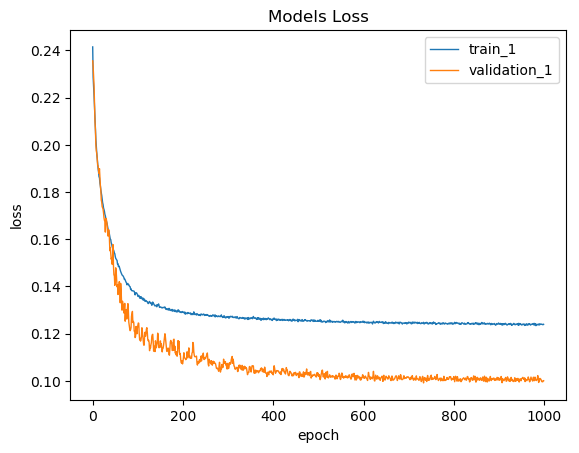

In [124]:
#PROBANDO
f = plt.figure()
plt.plot(history_1.history['loss'], linewidth=1)
plt.plot(history_1.history['val_loss'], linewidth=1)
plt.title('Models Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_1', 'validation_1'], loc='upper right')
plt.show()
#f.savefig('mxtest2.pdf', bbox_inches='tight')

In [125]:
#PROBANDO
print("Mínimo valor de perdida: ",min(history_1.history['val_loss']), "en el epoch ",history_1.history['val_loss'].index(min(history_1.history['val_loss'])))

Mínimo valor de perdida:  0.09913348975506696 en el epoch  733


<h5><center>FIN DE PRUEBAS</center></h5>

In [34]:
from keras import backend as K
def coeff_determination(y_true,y_pred):
    SS_res = K.sum(K.square(y_true-y_pred))
    SS_tot = K.sum(K.square(y_true-K.mean(y_true)))
    return (1-SS_res/(SS_tot+K.epsilon()))
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

autoencoder1.compile(loss=root_mean_squared_error,optimizer="adam",metrics=[coeff_determination,'mape','mae'])

In [35]:
epochs = 1000
batch_size = 32
history_1a = autoencoder1.fit(X1_training, Y1_training, batch_size=batch_size, epochs=epochs, verbose=2,validation_data=(X1_test,Y1_test))

Train on 255 samples, validate on 110 samples
Epoch 1/1000
 - 1s - loss: 0.2345 - coeff_determination: 0.0168 - mean_absolute_percentage_error: 35437078.7941 - mean_absolute_error: 0.0711 - val_loss: 0.2295 - val_coeff_determination: 0.0581 - val_mean_absolute_percentage_error: 53630462.5455 - val_mean_absolute_error: 0.0876
Epoch 2/1000
 - 1s - loss: 0.2275 - coeff_determination: 0.0744 - mean_absolute_percentage_error: 40096315.5294 - mean_absolute_error: 0.0743 - val_loss: 0.2247 - val_coeff_determination: 0.0977 - val_mean_absolute_percentage_error: 44479783.2727 - val_mean_absolute_error: 0.0773
Epoch 3/1000
 - 1s - loss: 0.2222 - coeff_determination: 0.1173 - mean_absolute_percentage_error: 38249139.8824 - mean_absolute_error: 0.0711 - val_loss: 0.2181 - val_coeff_determination: 0.1500 - val_mean_absolute_percentage_error: 34537052.7273 - val_mean_absolute_error: 0.0670
Epoch 4/1000
 - 1s - loss: 0.2147 - coeff_determination: 0.1757 - mean_absolute_percentage_error: 36602635.5294

Epoch 30/1000
 - 1s - loss: 0.1394 - coeff_determination: 0.6526 - mean_absolute_percentage_error: 41064684.4706 - mean_absolute_error: 0.0586 - val_loss: 0.1385 - val_coeff_determination: 0.6569 - val_mean_absolute_percentage_error: 40925187.2727 - val_mean_absolute_error: 0.0583
Epoch 31/1000
 - 1s - loss: 0.1382 - coeff_determination: 0.6586 - mean_absolute_percentage_error: 41012263.5294 - mean_absolute_error: 0.0583 - val_loss: 0.1377 - val_coeff_determination: 0.6611 - val_mean_absolute_percentage_error: 41300331.6364 - val_mean_absolute_error: 0.0583
Epoch 32/1000
 - 1s - loss: 0.1370 - coeff_determination: 0.6643 - mean_absolute_percentage_error: 40954229.8824 - mean_absolute_error: 0.0580 - val_loss: 0.1363 - val_coeff_determination: 0.6679 - val_mean_absolute_percentage_error: 41382391.2727 - val_mean_absolute_error: 0.0581
Epoch 33/1000
 - 1s - loss: 0.1359 - coeff_determination: 0.6699 - mean_absolute_percentage_error: 40921668.7059 - mean_absolute_error: 0.0577 - val_loss:

Epoch 60/1000
 - 1s - loss: 0.1197 - coeff_determination: 0.7438 - mean_absolute_percentage_error: 39031431.0588 - mean_absolute_error: 0.0523 - val_loss: 0.1194 - val_coeff_determination: 0.7452 - val_mean_absolute_percentage_error: 39073531.6364 - val_mean_absolute_error: 0.0521
Epoch 61/1000
 - 1s - loss: 0.1192 - coeff_determination: 0.7460 - mean_absolute_percentage_error: 38834053.4118 - mean_absolute_error: 0.0520 - val_loss: 0.1190 - val_coeff_determination: 0.7471 - val_mean_absolute_percentage_error: 38940281.8182 - val_mean_absolute_error: 0.0520
Epoch 62/1000
 - 1s - loss: 0.1188 - coeff_determination: 0.7476 - mean_absolute_percentage_error: 38718748.4706 - mean_absolute_error: 0.0518 - val_loss: 0.1188 - val_coeff_determination: 0.7478 - val_mean_absolute_percentage_error: 38291444.3636 - val_mean_absolute_error: 0.0515
Epoch 63/1000
 - 1s - loss: 0.1186 - coeff_determination: 0.7485 - mean_absolute_percentage_error: 38670963.0588 - mean_absolute_error: 0.0517 - val_loss:

Epoch 90/1000
 - 1s - loss: 0.1119 - coeff_determination: 0.7763 - mean_absolute_percentage_error: 37573480.0000 - mean_absolute_error: 0.0492 - val_loss: 0.1124 - val_coeff_determination: 0.7740 - val_mean_absolute_percentage_error: 39132626.5455 - val_mean_absolute_error: 0.0503
Epoch 91/1000
 - 1s - loss: 0.1118 - coeff_determination: 0.7766 - mean_absolute_percentage_error: 37703206.5882 - mean_absolute_error: 0.0493 - val_loss: 0.1114 - val_coeff_determination: 0.7782 - val_mean_absolute_percentage_error: 37234514.1818 - val_mean_absolute_error: 0.0489
Epoch 92/1000
 - 1s - loss: 0.1114 - coeff_determination: 0.7784 - mean_absolute_percentage_error: 37501819.2941 - mean_absolute_error: 0.0491 - val_loss: 0.1112 - val_coeff_determination: 0.7791 - val_mean_absolute_percentage_error: 37053535.2727 - val_mean_absolute_error: 0.0487
Epoch 93/1000
 - 1s - loss: 0.1111 - coeff_determination: 0.7792 - mean_absolute_percentage_error: 37454446.1176 - mean_absolute_error: 0.0490 - val_loss:

Epoch 119/1000
 - 1s - loss: 0.1062 - coeff_determination: 0.7983 - mean_absolute_percentage_error: 36449322.3529 - mean_absolute_error: 0.0471 - val_loss: 0.1061 - val_coeff_determination: 0.7989 - val_mean_absolute_percentage_error: 36341822.1818 - val_mean_absolute_error: 0.0469
Epoch 120/1000
 - 1s - loss: 0.1061 - coeff_determination: 0.7986 - mean_absolute_percentage_error: 36429480.4706 - mean_absolute_error: 0.0470 - val_loss: 0.1059 - val_coeff_determination: 0.7994 - val_mean_absolute_percentage_error: 36199602.5455 - val_mean_absolute_error: 0.0469
Epoch 121/1000
 - 1s - loss: 0.1059 - coeff_determination: 0.7997 - mean_absolute_percentage_error: 36386152.9412 - mean_absolute_error: 0.0469 - val_loss: 0.1059 - val_coeff_determination: 0.7994 - val_mean_absolute_percentage_error: 36729834.1818 - val_mean_absolute_error: 0.0471
Epoch 122/1000
 - 1s - loss: 0.1069 - coeff_determination: 0.7959 - mean_absolute_percentage_error: 36773706.8235 - mean_absolute_error: 0.0475 - val_l

Epoch 148/1000
 - 1s - loss: 0.1026 - coeff_determination: 0.8119 - mean_absolute_percentage_error: 35648978.1176 - mean_absolute_error: 0.0455 - val_loss: 0.1028 - val_coeff_determination: 0.8110 - val_mean_absolute_percentage_error: 35448961.4545 - val_mean_absolute_error: 0.0457
Epoch 149/1000
 - 1s - loss: 0.1024 - coeff_determination: 0.8125 - mean_absolute_percentage_error: 35600374.5882 - mean_absolute_error: 0.0455 - val_loss: 0.1023 - val_coeff_determination: 0.8130 - val_mean_absolute_percentage_error: 35035286.9091 - val_mean_absolute_error: 0.0452
Epoch 150/1000
 - 1s - loss: 0.1023 - coeff_determination: 0.8129 - mean_absolute_percentage_error: 35637411.0588 - mean_absolute_error: 0.0455 - val_loss: 0.1020 - val_coeff_determination: 0.8138 - val_mean_absolute_percentage_error: 35673632.7273 - val_mean_absolute_error: 0.0454
Epoch 151/1000
 - 1s - loss: 0.1021 - coeff_determination: 0.8137 - mean_absolute_percentage_error: 35582895.2941 - mean_absolute_error: 0.0454 - val_l

Epoch 177/1000
 - 1s - loss: 0.0995 - coeff_determination: 0.8230 - mean_absolute_percentage_error: 35064480.4706 - mean_absolute_error: 0.0444 - val_loss: 0.0997 - val_coeff_determination: 0.8225 - val_mean_absolute_percentage_error: 35821458.1818 - val_mean_absolute_error: 0.0448
Epoch 178/1000
 - 1s - loss: 0.0994 - coeff_determination: 0.8232 - mean_absolute_percentage_error: 35093824.4706 - mean_absolute_error: 0.0443 - val_loss: 0.0994 - val_coeff_determination: 0.8233 - val_mean_absolute_percentage_error: 34730280.3636 - val_mean_absolute_error: 0.0442
Epoch 179/1000
 - 1s - loss: 0.0998 - coeff_determination: 0.8220 - mean_absolute_percentage_error: 35259517.1765 - mean_absolute_error: 0.0446 - val_loss: 0.1023 - val_coeff_determination: 0.8130 - val_mean_absolute_percentage_error: 36804650.1818 - val_mean_absolute_error: 0.0457
Epoch 180/1000
 - 1s - loss: 0.1006 - coeff_determination: 0.8190 - mean_absolute_percentage_error: 35489870.3529 - mean_absolute_error: 0.0448 - val_l

Epoch 206/1000
 - 1s - loss: 0.0974 - coeff_determination: 0.8306 - mean_absolute_percentage_error: 34618550.1176 - mean_absolute_error: 0.0435 - val_loss: 0.0973 - val_coeff_determination: 0.8308 - val_mean_absolute_percentage_error: 34880323.2727 - val_mean_absolute_error: 0.0435
Epoch 207/1000
 - 1s - loss: 0.0973 - coeff_determination: 0.8306 - mean_absolute_percentage_error: 34600514.1176 - mean_absolute_error: 0.0434 - val_loss: 0.0974 - val_coeff_determination: 0.8305 - val_mean_absolute_percentage_error: 34099662.9091 - val_mean_absolute_error: 0.0431
Epoch 208/1000
 - 1s - loss: 0.0971 - coeff_determination: 0.8315 - mean_absolute_percentage_error: 34467719.7647 - mean_absolute_error: 0.0433 - val_loss: 0.0970 - val_coeff_determination: 0.8318 - val_mean_absolute_percentage_error: 34352799.6364 - val_mean_absolute_error: 0.0433
Epoch 209/1000
 - 1s - loss: 0.0974 - coeff_determination: 0.8306 - mean_absolute_percentage_error: 34631332.7059 - mean_absolute_error: 0.0435 - val_l

Epoch 235/1000
 - 1s - loss: 0.0960 - coeff_determination: 0.8351 - mean_absolute_percentage_error: 34448140.4706 - mean_absolute_error: 0.0430 - val_loss: 0.0953 - val_coeff_determination: 0.8375 - val_mean_absolute_percentage_error: 34557134.5455 - val_mean_absolute_error: 0.0429
Epoch 236/1000
 - 1s - loss: 0.0954 - coeff_determination: 0.8372 - mean_absolute_percentage_error: 34205034.3529 - mean_absolute_error: 0.0427 - val_loss: 0.0955 - val_coeff_determination: 0.8369 - val_mean_absolute_percentage_error: 33723223.2727 - val_mean_absolute_error: 0.0425
Epoch 237/1000
 - 1s - loss: 0.0956 - coeff_determination: 0.8367 - mean_absolute_percentage_error: 34314420.9412 - mean_absolute_error: 0.0428 - val_loss: 0.0958 - val_coeff_determination: 0.8359 - val_mean_absolute_percentage_error: 35227793.4545 - val_mean_absolute_error: 0.0432
Epoch 238/1000
 - 1s - loss: 0.0955 - coeff_determination: 0.8371 - mean_absolute_percentage_error: 34333670.1176 - mean_absolute_error: 0.0428 - val_l

Epoch 264/1000
 - 1s - loss: 0.0941 - coeff_determination: 0.8417 - mean_absolute_percentage_error: 34002767.7647 - mean_absolute_error: 0.0422 - val_loss: 0.0944 - val_coeff_determination: 0.8407 - val_mean_absolute_percentage_error: 34739540.0000 - val_mean_absolute_error: 0.0425
Epoch 265/1000
 - 1s - loss: 0.0942 - coeff_determination: 0.8412 - mean_absolute_percentage_error: 34109034.1176 - mean_absolute_error: 0.0423 - val_loss: 0.0942 - val_coeff_determination: 0.8412 - val_mean_absolute_percentage_error: 34280256.3636 - val_mean_absolute_error: 0.0424
Epoch 266/1000
 - 1s - loss: 0.0940 - coeff_determination: 0.8420 - mean_absolute_percentage_error: 33997553.8824 - mean_absolute_error: 0.0422 - val_loss: 0.0938 - val_coeff_determination: 0.8428 - val_mean_absolute_percentage_error: 33805518.5455 - val_mean_absolute_error: 0.0421
Epoch 267/1000
 - 1s - loss: 0.0938 - coeff_determination: 0.8428 - mean_absolute_percentage_error: 33839767.2941 - mean_absolute_error: 0.0420 - val_l

Epoch 293/1000
 - 1s - loss: 0.0941 - coeff_determination: 0.8419 - mean_absolute_percentage_error: 34275048.9412 - mean_absolute_error: 0.0424 - val_loss: 0.0938 - val_coeff_determination: 0.8426 - val_mean_absolute_percentage_error: 34772059.6364 - val_mean_absolute_error: 0.0425
Epoch 294/1000
 - 1s - loss: 0.0933 - coeff_determination: 0.8444 - mean_absolute_percentage_error: 33860615.4118 - mean_absolute_error: 0.0420 - val_loss: 0.0929 - val_coeff_determination: 0.8456 - val_mean_absolute_percentage_error: 33919947.2727 - val_mean_absolute_error: 0.0418
Epoch 295/1000
 - 1s - loss: 0.0929 - coeff_determination: 0.8458 - mean_absolute_percentage_error: 33736160.0000 - mean_absolute_error: 0.0418 - val_loss: 0.0925 - val_coeff_determination: 0.8469 - val_mean_absolute_percentage_error: 33662380.7273 - val_mean_absolute_error: 0.0417
Epoch 296/1000
 - 1s - loss: 0.0928 - coeff_determination: 0.8461 - mean_absolute_percentage_error: 33708406.1176 - mean_absolute_error: 0.0417 - val_l

Epoch 322/1000
 - 1s - loss: 0.0920 - coeff_determination: 0.8486 - mean_absolute_percentage_error: 33589552.0000 - mean_absolute_error: 0.0414 - val_loss: 0.0923 - val_coeff_determination: 0.8479 - val_mean_absolute_percentage_error: 32982659.2727 - val_mean_absolute_error: 0.0413
Epoch 323/1000
 - 1s - loss: 0.0924 - coeff_determination: 0.8474 - mean_absolute_percentage_error: 33664691.2941 - mean_absolute_error: 0.0416 - val_loss: 0.0919 - val_coeff_determination: 0.8489 - val_mean_absolute_percentage_error: 33897448.0000 - val_mean_absolute_error: 0.0415
Epoch 324/1000
 - 1s - loss: 0.0920 - coeff_determination: 0.8487 - mean_absolute_percentage_error: 33521402.1176 - mean_absolute_error: 0.0414 - val_loss: 0.0921 - val_coeff_determination: 0.8485 - val_mean_absolute_percentage_error: 33870388.7273 - val_mean_absolute_error: 0.0414
Epoch 325/1000
 - 1s - loss: 0.0920 - coeff_determination: 0.8487 - mean_absolute_percentage_error: 33513464.7059 - mean_absolute_error: 0.0414 - val_l

Epoch 351/1000
 - 1s - loss: 0.0910 - coeff_determination: 0.8520 - mean_absolute_percentage_error: 33194941.2941 - mean_absolute_error: 0.0409 - val_loss: 0.0909 - val_coeff_determination: 0.8522 - val_mean_absolute_percentage_error: 33458231.6364 - val_mean_absolute_error: 0.0409
Epoch 352/1000
 - 1s - loss: 0.0911 - coeff_determination: 0.8516 - mean_absolute_percentage_error: 33255322.3529 - mean_absolute_error: 0.0410 - val_loss: 0.0913 - val_coeff_determination: 0.8510 - val_mean_absolute_percentage_error: 33353922.3636 - val_mean_absolute_error: 0.0411
Epoch 353/1000
 - 1s - loss: 0.0914 - coeff_determination: 0.8508 - mean_absolute_percentage_error: 33417625.4118 - mean_absolute_error: 0.0412 - val_loss: 0.0911 - val_coeff_determination: 0.8515 - val_mean_absolute_percentage_error: 33310039.0909 - val_mean_absolute_error: 0.0412
Epoch 354/1000
 - 1s - loss: 0.0909 - coeff_determination: 0.8523 - mean_absolute_percentage_error: 33122643.8824 - mean_absolute_error: 0.0408 - val_l

Epoch 380/1000
 - 1s - loss: 0.0903 - coeff_determination: 0.8543 - mean_absolute_percentage_error: 33014045.5294 - mean_absolute_error: 0.0406 - val_loss: 0.0914 - val_coeff_determination: 0.8507 - val_mean_absolute_percentage_error: 34368808.3636 - val_mean_absolute_error: 0.0414
Epoch 381/1000
 - 1s - loss: 0.0909 - coeff_determination: 0.8521 - mean_absolute_percentage_error: 33296760.3529 - mean_absolute_error: 0.0410 - val_loss: 0.0906 - val_coeff_determination: 0.8534 - val_mean_absolute_percentage_error: 33799234.9091 - val_mean_absolute_error: 0.0410
Epoch 382/1000
 - 1s - loss: 0.0902 - coeff_determination: 0.8546 - mean_absolute_percentage_error: 33024003.1765 - mean_absolute_error: 0.0406 - val_loss: 0.0900 - val_coeff_determination: 0.8551 - val_mean_absolute_percentage_error: 32945847.8182 - val_mean_absolute_error: 0.0405
Epoch 383/1000
 - 1s - loss: 0.0901 - coeff_determination: 0.8549 - mean_absolute_percentage_error: 32948202.2353 - mean_absolute_error: 0.0405 - val_l

Epoch 409/1000
 - 1s - loss: 0.0895 - coeff_determination: 0.8569 - mean_absolute_percentage_error: 32720979.7647 - mean_absolute_error: 0.0402 - val_loss: 0.0895 - val_coeff_determination: 0.8570 - val_mean_absolute_percentage_error: 32905355.8182 - val_mean_absolute_error: 0.0402
Epoch 410/1000
 - 1s - loss: 0.0895 - coeff_determination: 0.8570 - mean_absolute_percentage_error: 32742152.5882 - mean_absolute_error: 0.0402 - val_loss: 0.0893 - val_coeff_determination: 0.8575 - val_mean_absolute_percentage_error: 33030023.2727 - val_mean_absolute_error: 0.0403
Epoch 411/1000
 - 1s - loss: 0.0893 - coeff_determination: 0.8574 - mean_absolute_percentage_error: 32709134.3529 - mean_absolute_error: 0.0402 - val_loss: 0.0895 - val_coeff_determination: 0.8569 - val_mean_absolute_percentage_error: 32446934.1818 - val_mean_absolute_error: 0.0400
Epoch 412/1000
 - 1s - loss: 0.0894 - coeff_determination: 0.8570 - mean_absolute_percentage_error: 32712640.2353 - mean_absolute_error: 0.0402 - val_l

Epoch 438/1000
 - 1s - loss: 0.0888 - coeff_determination: 0.8591 - mean_absolute_percentage_error: 32555874.2353 - mean_absolute_error: 0.0399 - val_loss: 0.0890 - val_coeff_determination: 0.8585 - val_mean_absolute_percentage_error: 31980325.8182 - val_mean_absolute_error: 0.0397
Epoch 439/1000
 - 1s - loss: 0.0892 - coeff_determination: 0.8577 - mean_absolute_percentage_error: 32746095.2941 - mean_absolute_error: 0.0402 - val_loss: 0.0890 - val_coeff_determination: 0.8585 - val_mean_absolute_percentage_error: 32963454.1818 - val_mean_absolute_error: 0.0402
Epoch 440/1000
 - 1s - loss: 0.0893 - coeff_determination: 0.8576 - mean_absolute_percentage_error: 32782341.2941 - mean_absolute_error: 0.0402 - val_loss: 0.0892 - val_coeff_determination: 0.8578 - val_mean_absolute_percentage_error: 33451746.5455 - val_mean_absolute_error: 0.0405
Epoch 441/1000
 - 1s - loss: 0.0891 - coeff_determination: 0.8582 - mean_absolute_percentage_error: 32687898.4706 - mean_absolute_error: 0.0401 - val_l

Epoch 467/1000
 - 1s - loss: 0.0882 - coeff_determination: 0.8609 - mean_absolute_percentage_error: 32380003.7647 - mean_absolute_error: 0.0397 - val_loss: 0.0885 - val_coeff_determination: 0.8600 - val_mean_absolute_percentage_error: 32761803.2727 - val_mean_absolute_error: 0.0398
Epoch 468/1000
 - 1s - loss: 0.0893 - coeff_determination: 0.8573 - mean_absolute_percentage_error: 32788705.4118 - mean_absolute_error: 0.0402 - val_loss: 0.0883 - val_coeff_determination: 0.8605 - val_mean_absolute_percentage_error: 32278813.8182 - val_mean_absolute_error: 0.0397
Epoch 469/1000
 - 1s - loss: 0.0888 - coeff_determination: 0.8590 - mean_absolute_percentage_error: 32581387.4118 - mean_absolute_error: 0.0400 - val_loss: 0.0882 - val_coeff_determination: 0.8610 - val_mean_absolute_percentage_error: 32451906.5455 - val_mean_absolute_error: 0.0397
Epoch 470/1000
 - 1s - loss: 0.0883 - coeff_determination: 0.8605 - mean_absolute_percentage_error: 32397756.8235 - mean_absolute_error: 0.0397 - val_l

Epoch 496/1000
 - 1s - loss: 0.0880 - coeff_determination: 0.8614 - mean_absolute_percentage_error: 32407643.1765 - mean_absolute_error: 0.0397 - val_loss: 0.0876 - val_coeff_determination: 0.8628 - val_mean_absolute_percentage_error: 32035493.2727 - val_mean_absolute_error: 0.0392
Epoch 497/1000
 - 1s - loss: 0.0876 - coeff_determination: 0.8628 - mean_absolute_percentage_error: 32142567.6471 - mean_absolute_error: 0.0393 - val_loss: 0.0880 - val_coeff_determination: 0.8617 - val_mean_absolute_percentage_error: 31656067.4545 - val_mean_absolute_error: 0.0393
Epoch 498/1000
 - 1s - loss: 0.0880 - coeff_determination: 0.8616 - mean_absolute_percentage_error: 32244858.8235 - mean_absolute_error: 0.0395 - val_loss: 0.0888 - val_coeff_determination: 0.8591 - val_mean_absolute_percentage_error: 32702680.0000 - val_mean_absolute_error: 0.0398
Epoch 499/1000
 - 1s - loss: 0.0885 - coeff_determination: 0.8599 - mean_absolute_percentage_error: 32452900.9412 - mean_absolute_error: 0.0398 - val_l

Epoch 525/1000
 - 1s - loss: 0.0897 - coeff_determination: 0.8561 - mean_absolute_percentage_error: 32774183.0588 - mean_absolute_error: 0.0403 - val_loss: 0.0891 - val_coeff_determination: 0.8580 - val_mean_absolute_percentage_error: 33864206.9091 - val_mean_absolute_error: 0.0405
Epoch 526/1000
 - 1s - loss: 0.0884 - coeff_determination: 0.8602 - mean_absolute_percentage_error: 32505568.0000 - mean_absolute_error: 0.0398 - val_loss: 0.0882 - val_coeff_determination: 0.8609 - val_mean_absolute_percentage_error: 31619556.3636 - val_mean_absolute_error: 0.0395
Epoch 527/1000
 - 1s - loss: 0.0876 - coeff_determination: 0.8627 - mean_absolute_percentage_error: 32000744.5882 - mean_absolute_error: 0.0393 - val_loss: 0.0876 - val_coeff_determination: 0.8629 - val_mean_absolute_percentage_error: 32626420.7273 - val_mean_absolute_error: 0.0396
Epoch 528/1000
 - 1s - loss: 0.0873 - coeff_determination: 0.8637 - mean_absolute_percentage_error: 32095119.6471 - mean_absolute_error: 0.0393 - val_l

Epoch 554/1000
 - 1s - loss: 0.0869 - coeff_determination: 0.8649 - mean_absolute_percentage_error: 31959578.8235 - mean_absolute_error: 0.0391 - val_loss: 0.0871 - val_coeff_determination: 0.8644 - val_mean_absolute_percentage_error: 31843320.3636 - val_mean_absolute_error: 0.0389
Epoch 555/1000
 - 1s - loss: 0.0869 - coeff_determination: 0.8651 - mean_absolute_percentage_error: 31946702.7059 - mean_absolute_error: 0.0390 - val_loss: 0.0875 - val_coeff_determination: 0.8632 - val_mean_absolute_percentage_error: 32716611.8182 - val_mean_absolute_error: 0.0395
Epoch 556/1000
 - 1s - loss: 0.0878 - coeff_determination: 0.8622 - mean_absolute_percentage_error: 32352770.8235 - mean_absolute_error: 0.0396 - val_loss: 0.0877 - val_coeff_determination: 0.8626 - val_mean_absolute_percentage_error: 32915115.8182 - val_mean_absolute_error: 0.0396
Epoch 557/1000
 - 1s - loss: 0.0874 - coeff_determination: 0.8636 - mean_absolute_percentage_error: 32173848.8235 - mean_absolute_error: 0.0393 - val_l

Epoch 583/1000
 - 1s - loss: 0.0865 - coeff_determination: 0.8663 - mean_absolute_percentage_error: 31860328.5882 - mean_absolute_error: 0.0389 - val_loss: 0.0864 - val_coeff_determination: 0.8665 - val_mean_absolute_percentage_error: 31918901.0909 - val_mean_absolute_error: 0.0390
Epoch 584/1000
 - 1s - loss: 0.0864 - coeff_determination: 0.8667 - mean_absolute_percentage_error: 31868964.8235 - mean_absolute_error: 0.0389 - val_loss: 0.0865 - val_coeff_determination: 0.8663 - val_mean_absolute_percentage_error: 31773968.0000 - val_mean_absolute_error: 0.0390
Epoch 585/1000
 - 1s - loss: 0.0867 - coeff_determination: 0.8657 - mean_absolute_percentage_error: 31972122.1176 - mean_absolute_error: 0.0391 - val_loss: 0.0867 - val_coeff_determination: 0.8656 - val_mean_absolute_percentage_error: 32496372.1818 - val_mean_absolute_error: 0.0392
Epoch 586/1000
 - 1s - loss: 0.0865 - coeff_determination: 0.8664 - mean_absolute_percentage_error: 31914673.4118 - mean_absolute_error: 0.0390 - val_l

Epoch 612/1000
 - 1s - loss: 0.0863 - coeff_determination: 0.8668 - mean_absolute_percentage_error: 31909812.3529 - mean_absolute_error: 0.0390 - val_loss: 0.0867 - val_coeff_determination: 0.8656 - val_mean_absolute_percentage_error: 31419278.0000 - val_mean_absolute_error: 0.0389
Epoch 613/1000
 - 1s - loss: 0.0865 - coeff_determination: 0.8662 - mean_absolute_percentage_error: 31931505.4118 - mean_absolute_error: 0.0390 - val_loss: 0.0862 - val_coeff_determination: 0.8673 - val_mean_absolute_percentage_error: 32132203.0909 - val_mean_absolute_error: 0.0390
Epoch 614/1000
 - 1s - loss: 0.0861 - coeff_determination: 0.8674 - mean_absolute_percentage_error: 31865040.9412 - mean_absolute_error: 0.0389 - val_loss: 0.0862 - val_coeff_determination: 0.8673 - val_mean_absolute_percentage_error: 31701234.1818 - val_mean_absolute_error: 0.0388
Epoch 615/1000
 - 1s - loss: 0.0865 - coeff_determination: 0.8664 - mean_absolute_percentage_error: 32003198.2353 - mean_absolute_error: 0.0391 - val_l

Epoch 641/1000
 - 1s - loss: 0.0859 - coeff_determination: 0.8680 - mean_absolute_percentage_error: 31813718.4706 - mean_absolute_error: 0.0388 - val_loss: 0.0859 - val_coeff_determination: 0.8681 - val_mean_absolute_percentage_error: 31572374.0000 - val_mean_absolute_error: 0.0388
Epoch 642/1000
 - 1s - loss: 0.0863 - coeff_determination: 0.8670 - mean_absolute_percentage_error: 31978526.5882 - mean_absolute_error: 0.0390 - val_loss: 0.0861 - val_coeff_determination: 0.8673 - val_mean_absolute_percentage_error: 31787824.7273 - val_mean_absolute_error: 0.0387
Epoch 643/1000
 - 1s - loss: 0.0861 - coeff_determination: 0.8674 - mean_absolute_percentage_error: 31896389.8824 - mean_absolute_error: 0.0389 - val_loss: 0.0863 - val_coeff_determination: 0.8668 - val_mean_absolute_percentage_error: 31839155.2727 - val_mean_absolute_error: 0.0388
Epoch 644/1000
 - 1s - loss: 0.0860 - coeff_determination: 0.8679 - mean_absolute_percentage_error: 31852596.8235 - mean_absolute_error: 0.0388 - val_l

Epoch 670/1000
 - 1s - loss: 0.0857 - coeff_determination: 0.8687 - mean_absolute_percentage_error: 31798419.2941 - mean_absolute_error: 0.0388 - val_loss: 0.0858 - val_coeff_determination: 0.8685 - val_mean_absolute_percentage_error: 32150390.9091 - val_mean_absolute_error: 0.0388
Epoch 671/1000
 - 1s - loss: 0.0856 - coeff_determination: 0.8690 - mean_absolute_percentage_error: 31811710.2353 - mean_absolute_error: 0.0388 - val_loss: 0.0855 - val_coeff_determination: 0.8694 - val_mean_absolute_percentage_error: 31681723.8182 - val_mean_absolute_error: 0.0386
Epoch 672/1000
 - 1s - loss: 0.0856 - coeff_determination: 0.8691 - mean_absolute_percentage_error: 31755338.5882 - mean_absolute_error: 0.0387 - val_loss: 0.0861 - val_coeff_determination: 0.8676 - val_mean_absolute_percentage_error: 31293428.7273 - val_mean_absolute_error: 0.0387
Epoch 673/1000
 - 1s - loss: 0.0858 - coeff_determination: 0.8684 - mean_absolute_percentage_error: 31781941.4118 - mean_absolute_error: 0.0388 - val_l

Epoch 699/1000
 - 1s - loss: 0.0853 - coeff_determination: 0.8699 - mean_absolute_percentage_error: 31718693.1765 - mean_absolute_error: 0.0386 - val_loss: 0.0853 - val_coeff_determination: 0.8700 - val_mean_absolute_percentage_error: 31430259.8182 - val_mean_absolute_error: 0.0385
Epoch 700/1000
 - 1s - loss: 0.0852 - coeff_determination: 0.8702 - mean_absolute_percentage_error: 31685806.4706 - mean_absolute_error: 0.0386 - val_loss: 0.0851 - val_coeff_determination: 0.8704 - val_mean_absolute_percentage_error: 31678039.8182 - val_mean_absolute_error: 0.0386
Epoch 701/1000
 - 1s - loss: 0.0852 - coeff_determination: 0.8701 - mean_absolute_percentage_error: 31734170.5882 - mean_absolute_error: 0.0386 - val_loss: 0.0855 - val_coeff_determination: 0.8694 - val_mean_absolute_percentage_error: 32347569.2727 - val_mean_absolute_error: 0.0391
Epoch 702/1000
 - 1s - loss: 0.0853 - coeff_determination: 0.8700 - mean_absolute_percentage_error: 31774268.4706 - mean_absolute_error: 0.0387 - val_l

Epoch 728/1000
 - 1s - loss: 0.0850 - coeff_determination: 0.8708 - mean_absolute_percentage_error: 31742868.8235 - mean_absolute_error: 0.0386 - val_loss: 0.0852 - val_coeff_determination: 0.8701 - val_mean_absolute_percentage_error: 31965594.0000 - val_mean_absolute_error: 0.0387
Epoch 729/1000
 - 1s - loss: 0.0857 - coeff_determination: 0.8688 - mean_absolute_percentage_error: 31929542.5882 - mean_absolute_error: 0.0389 - val_loss: 0.0850 - val_coeff_determination: 0.8707 - val_mean_absolute_percentage_error: 31501345.6364 - val_mean_absolute_error: 0.0386
Epoch 730/1000
 - 1s - loss: 0.0853 - coeff_determination: 0.8698 - mean_absolute_percentage_error: 31776732.3529 - mean_absolute_error: 0.0387 - val_loss: 0.0854 - val_coeff_determination: 0.8698 - val_mean_absolute_percentage_error: 31938801.0909 - val_mean_absolute_error: 0.0388
Epoch 731/1000
 - 1s - loss: 0.0852 - coeff_determination: 0.8704 - mean_absolute_percentage_error: 31757860.9412 - mean_absolute_error: 0.0386 - val_l

Epoch 757/1000
 - 1s - loss: 0.0858 - coeff_determination: 0.8683 - mean_absolute_percentage_error: 32061847.1765 - mean_absolute_error: 0.0390 - val_loss: 0.0849 - val_coeff_determination: 0.8710 - val_mean_absolute_percentage_error: 31974114.7273 - val_mean_absolute_error: 0.0387
Epoch 758/1000
 - 1s - loss: 0.0852 - coeff_determination: 0.8703 - mean_absolute_percentage_error: 31810066.1176 - mean_absolute_error: 0.0387 - val_loss: 0.0850 - val_coeff_determination: 0.8709 - val_mean_absolute_percentage_error: 31577932.0000 - val_mean_absolute_error: 0.0384
Epoch 759/1000
 - 1s - loss: 0.0849 - coeff_determination: 0.8712 - mean_absolute_percentage_error: 31637918.9412 - mean_absolute_error: 0.0385 - val_loss: 0.0851 - val_coeff_determination: 0.8706 - val_mean_absolute_percentage_error: 32271868.5455 - val_mean_absolute_error: 0.0388
Epoch 760/1000
 - 1s - loss: 0.0848 - coeff_determination: 0.8713 - mean_absolute_percentage_error: 31708450.9412 - mean_absolute_error: 0.0385 - val_l

Epoch 786/1000
 - 1s - loss: 0.0848 - coeff_determination: 0.8714 - mean_absolute_percentage_error: 31667310.7059 - mean_absolute_error: 0.0385 - val_loss: 0.0847 - val_coeff_determination: 0.8719 - val_mean_absolute_percentage_error: 31886284.0000 - val_mean_absolute_error: 0.0386
Epoch 787/1000
 - 1s - loss: 0.0847 - coeff_determination: 0.8717 - mean_absolute_percentage_error: 31663099.6471 - mean_absolute_error: 0.0385 - val_loss: 0.0847 - val_coeff_determination: 0.8718 - val_mean_absolute_percentage_error: 31584147.4545 - val_mean_absolute_error: 0.0384
Epoch 788/1000
 - 1s - loss: 0.0847 - coeff_determination: 0.8717 - mean_absolute_percentage_error: 31645529.7647 - mean_absolute_error: 0.0385 - val_loss: 0.0849 - val_coeff_determination: 0.8710 - val_mean_absolute_percentage_error: 32201746.1818 - val_mean_absolute_error: 0.0388
Epoch 789/1000
 - 1s - loss: 0.0847 - coeff_determination: 0.8718 - mean_absolute_percentage_error: 31630840.9412 - mean_absolute_error: 0.0385 - val_l

Epoch 815/1000
 - 1s - loss: 0.0845 - coeff_determination: 0.8724 - mean_absolute_percentage_error: 31586078.3529 - mean_absolute_error: 0.0384 - val_loss: 0.0847 - val_coeff_determination: 0.8719 - val_mean_absolute_percentage_error: 31050139.6364 - val_mean_absolute_error: 0.0383
Epoch 816/1000
 - 1s - loss: 0.0844 - coeff_determination: 0.8727 - mean_absolute_percentage_error: 31515369.4118 - mean_absolute_error: 0.0383 - val_loss: 0.0841 - val_coeff_determination: 0.8736 - val_mean_absolute_percentage_error: 31425918.7273 - val_mean_absolute_error: 0.0382
Epoch 817/1000
 - 1s - loss: 0.0842 - coeff_determination: 0.8731 - mean_absolute_percentage_error: 31464213.8824 - mean_absolute_error: 0.0382 - val_loss: 0.0843 - val_coeff_determination: 0.8731 - val_mean_absolute_percentage_error: 31147607.4545 - val_mean_absolute_error: 0.0382
Epoch 818/1000
 - 1s - loss: 0.0846 - coeff_determination: 0.8720 - mean_absolute_percentage_error: 31632309.8824 - mean_absolute_error: 0.0384 - val_l

Epoch 844/1000
 - 1s - loss: 0.0845 - coeff_determination: 0.8722 - mean_absolute_percentage_error: 31567236.2353 - mean_absolute_error: 0.0384 - val_loss: 0.0843 - val_coeff_determination: 0.8728 - val_mean_absolute_percentage_error: 30808379.2727 - val_mean_absolute_error: 0.0380
Epoch 845/1000
 - 1s - loss: 0.0842 - coeff_determination: 0.8733 - mean_absolute_percentage_error: 31437688.8235 - mean_absolute_error: 0.0382 - val_loss: 0.0854 - val_coeff_determination: 0.8698 - val_mean_absolute_percentage_error: 31184242.9091 - val_mean_absolute_error: 0.0386
Epoch 846/1000
 - 1s - loss: 0.0847 - coeff_determination: 0.8717 - mean_absolute_percentage_error: 31586284.5882 - mean_absolute_error: 0.0384 - val_loss: 0.0844 - val_coeff_determination: 0.8728 - val_mean_absolute_percentage_error: 30998933.0909 - val_mean_absolute_error: 0.0381
Epoch 847/1000
 - 1s - loss: 0.0843 - coeff_determination: 0.8731 - mean_absolute_percentage_error: 31461711.2941 - mean_absolute_error: 0.0382 - val_l

Epoch 873/1000
 - 1s - loss: 0.0838 - coeff_determination: 0.8744 - mean_absolute_percentage_error: 31351503.0588 - mean_absolute_error: 0.0381 - val_loss: 0.0838 - val_coeff_determination: 0.8745 - val_mean_absolute_percentage_error: 31173821.8182 - val_mean_absolute_error: 0.0380
Epoch 874/1000
 - 1s - loss: 0.0839 - coeff_determination: 0.8742 - mean_absolute_percentage_error: 31413013.8824 - mean_absolute_error: 0.0381 - val_loss: 0.0837 - val_coeff_determination: 0.8747 - val_mean_absolute_percentage_error: 31656876.1818 - val_mean_absolute_error: 0.0381
Epoch 875/1000
 - 1s - loss: 0.0838 - coeff_determination: 0.8746 - mean_absolute_percentage_error: 31375829.6471 - mean_absolute_error: 0.0381 - val_loss: 0.0837 - val_coeff_determination: 0.8749 - val_mean_absolute_percentage_error: 31249903.8182 - val_mean_absolute_error: 0.0380
Epoch 876/1000
 - 1s - loss: 0.0840 - coeff_determination: 0.8740 - mean_absolute_percentage_error: 31445462.2353 - mean_absolute_error: 0.0382 - val_l

Epoch 902/1000
 - 1s - loss: 0.0838 - coeff_determination: 0.8744 - mean_absolute_percentage_error: 31502156.5882 - mean_absolute_error: 0.0382 - val_loss: 0.0853 - val_coeff_determination: 0.8698 - val_mean_absolute_percentage_error: 31413558.1818 - val_mean_absolute_error: 0.0389
Epoch 903/1000
 - 1s - loss: 0.0843 - coeff_determination: 0.8728 - mean_absolute_percentage_error: 31638489.8824 - mean_absolute_error: 0.0384 - val_loss: 0.0845 - val_coeff_determination: 0.8724 - val_mean_absolute_percentage_error: 30551310.7273 - val_mean_absolute_error: 0.0379
Epoch 904/1000
 - 1s - loss: 0.0838 - coeff_determination: 0.8745 - mean_absolute_percentage_error: 31357208.4706 - mean_absolute_error: 0.0381 - val_loss: 0.0838 - val_coeff_determination: 0.8746 - val_mean_absolute_percentage_error: 31297079.6364 - val_mean_absolute_error: 0.0382
Epoch 905/1000
 - 1s - loss: 0.0835 - coeff_determination: 0.8754 - mean_absolute_percentage_error: 31278725.7647 - mean_absolute_error: 0.0379 - val_l

Epoch 931/1000
 - 1s - loss: 0.0835 - coeff_determination: 0.8754 - mean_absolute_percentage_error: 31366425.2941 - mean_absolute_error: 0.0380 - val_loss: 0.0832 - val_coeff_determination: 0.8763 - val_mean_absolute_percentage_error: 31386235.2727 - val_mean_absolute_error: 0.0380
Epoch 932/1000
 - 1s - loss: 0.0833 - coeff_determination: 0.8761 - mean_absolute_percentage_error: 31303910.3529 - mean_absolute_error: 0.0379 - val_loss: 0.0831 - val_coeff_determination: 0.8766 - val_mean_absolute_percentage_error: 31146484.0000 - val_mean_absolute_error: 0.0377
Epoch 933/1000
 - 1s - loss: 0.0832 - coeff_determination: 0.8761 - mean_absolute_percentage_error: 31291194.9412 - mean_absolute_error: 0.0379 - val_loss: 0.0837 - val_coeff_determination: 0.8749 - val_mean_absolute_percentage_error: 32054555.2727 - val_mean_absolute_error: 0.0383
Epoch 934/1000
 - 1s - loss: 0.0834 - coeff_determination: 0.8758 - mean_absolute_percentage_error: 31375578.3529 - mean_absolute_error: 0.0380 - val_l

Epoch 960/1000
 - 1s - loss: 0.0832 - coeff_determination: 0.8763 - mean_absolute_percentage_error: 31359653.5294 - mean_absolute_error: 0.0379 - val_loss: 0.0833 - val_coeff_determination: 0.8760 - val_mean_absolute_percentage_error: 31234185.2727 - val_mean_absolute_error: 0.0379
Epoch 961/1000
 - 1s - loss: 0.0831 - coeff_determination: 0.8765 - mean_absolute_percentage_error: 31272953.7647 - mean_absolute_error: 0.0378 - val_loss: 0.0831 - val_coeff_determination: 0.8765 - val_mean_absolute_percentage_error: 31811675.4545 - val_mean_absolute_error: 0.0382
Epoch 962/1000
 - 1s - loss: 0.0829 - coeff_determination: 0.8770 - mean_absolute_percentage_error: 31273812.5882 - mean_absolute_error: 0.0378 - val_loss: 0.0829 - val_coeff_determination: 0.8773 - val_mean_absolute_percentage_error: 31120448.3636 - val_mean_absolute_error: 0.0377
Epoch 963/1000
 - 1s - loss: 0.0828 - coeff_determination: 0.8773 - mean_absolute_percentage_error: 31176690.8235 - mean_absolute_error: 0.0377 - val_l

Epoch 989/1000
 - 1s - loss: 0.0830 - coeff_determination: 0.8768 - mean_absolute_percentage_error: 31325669.6471 - mean_absolute_error: 0.0379 - val_loss: 0.0826 - val_coeff_determination: 0.8780 - val_mean_absolute_percentage_error: 31165952.5455 - val_mean_absolute_error: 0.0376
Epoch 990/1000
 - 1s - loss: 0.0829 - coeff_determination: 0.8773 - mean_absolute_percentage_error: 31201749.1765 - mean_absolute_error: 0.0378 - val_loss: 0.0830 - val_coeff_determination: 0.8768 - val_mean_absolute_percentage_error: 30753092.0000 - val_mean_absolute_error: 0.0377
Epoch 991/1000
 - 1s - loss: 0.0829 - coeff_determination: 0.8771 - mean_absolute_percentage_error: 31254688.5882 - mean_absolute_error: 0.0378 - val_loss: 0.0830 - val_coeff_determination: 0.8769 - val_mean_absolute_percentage_error: 31252395.4545 - val_mean_absolute_error: 0.0380
Epoch 992/1000
 - 1s - loss: 0.0831 - coeff_determination: 0.8764 - mean_absolute_percentage_error: 31357019.1765 - mean_absolute_error: 0.0380 - val_l

In [ ]:
import tensorflow as tf
#Datos a probar
df_test = X1_test

predictions_batch = autoencoder1.predict(X1_test)
predictions_rank = tf.nn.top_k(predictions_batch, sorted=True, name='prediction_rank').indices
real_rank = tf.nn.top_k(Y1_test, sorted=True, name='real_rank').indices
rank_diffs = predictions_rank - real_rank
rank_diffs_squared_sum = tf.reduce_sum(rank_diffs * rank_diffs)
six = tf.constant(6)
one = tf.constant(1.0)
numerator = tf.cast(six * rank_diffs_squared_sum, dtype=tf.float32)
divider = tf.cast(df_test.shape[0] * df_test.shape[0] * df_test.shape[0] - df_test.shape[0], dtype=tf.float32)
spearman = one - numerator / divider
with tf.Session() as sess:     
    print(sess.run(spearman))

In [70]:
epochs = 100
batch_size = 32
history_1b = autoencoder1.fit(X2_reshaped, Y2_reshaped, batch_size=batch_size, epochs=epochs, verbose=2,validation_split=0.3)

Train on 255 samples, validate on 110 samples
Epoch 1/15
 - 2s - loss: 0.0549 - coeff_determination: 0.0189 - val_loss: 0.0525 - val_coeff_determination: 0.0611
Epoch 2/15
 - 1s - loss: 0.0517 - coeff_determination: 0.0762 - val_loss: 0.0507 - val_coeff_determination: 0.0941
Epoch 3/15
 - 1s - loss: 0.0501 - coeff_determination: 0.1043 - val_loss: 0.0494 - val_coeff_determination: 0.1173
Epoch 4/15
 - 1s - loss: 0.0487 - coeff_determination: 0.1287 - val_loss: 0.0478 - val_coeff_determination: 0.1447
Epoch 5/15
 - 1s - loss: 0.0471 - coeff_determination: 0.1578 - val_loss: 0.0461 - val_coeff_determination: 0.1768
Epoch 6/15
 - 1s - loss: 0.0450 - coeff_determination: 0.1963 - val_loss: 0.0434 - val_coeff_determination: 0.2247
Epoch 7/15
 - 1s - loss: 0.0421 - coeff_determination: 0.2473 - val_loss: 0.0407 - val_coeff_determination: 0.2731
Epoch 8/15
 - 1s - loss: 0.0398 - coeff_determination: 0.2886 - val_loss: 0.0388 - val_coeff_determination: 0.3072
Epoch 9/15
 - 1s - loss: 0.0381 - 

In [18]:
from keras.layers import ZeroPadding2D
input_nn = Input(shape=X2_training.shape[1:]) 
# Encoder
first_1 = ZeroPadding2D(padding=((64,0),(0,0)))(input_nn)
conv1_1 = Conv2D(16, (3, 3), activation='relu', padding='same')(first_1)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)
conv1_3 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool2)
h = MaxPooling2D((2, 2), padding='same')(conv1_3)

# Decoder
conv2_1 = Conv2D(8, (3, 3), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
conv2_3 = Conv2D(16, (3, 3), activation='relu', padding='same')(up2)
output_nn = Conv2D(1, (3, 3), activation='linear', padding='same')(conv2_3)

autoencoder2 = Model(inputs=input_nn, outputs=output_nn)
autoencoder2.compile(loss=root_mean_squared_error,optimizer="adam",metrics=[coeff_determination,'mape','mae'])
autoencoder2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 64, 128, 1)        0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 128, 128, 1)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 128, 128, 16)      160       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 64, 64, 8)         1160      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 32, 8)         584       
__________

In [19]:
epochs = 1000
batch_size = 32
history_2 = autoencoder2.fit(X2_training, Y2_training, batch_size=batch_size, epochs=epochs, verbose=2,validation_data=(X2_test,Y2_test))

Train on 255 samples, validate on 110 samples
Epoch 1/1000
 - 1s - loss: 0.2329 - coeff_determination: 0.0307 - mean_absolute_percentage_error: 36876485.9294 - mean_absolute_error: 0.0723 - val_loss: 0.2310 - val_coeff_determination: 0.0461 - val_mean_absolute_percentage_error: 40248184.0000 - val_mean_absolute_error: 0.0752
Epoch 2/1000
 - 0s - loss: 0.2292 - coeff_determination: 0.0613 - mean_absolute_percentage_error: 36621353.2706 - mean_absolute_error: 0.0714 - val_loss: 0.2262 - val_coeff_determination: 0.0854 - val_mean_absolute_percentage_error: 36601723.4909 - val_mean_absolute_error: 0.0709
Epoch 3/1000
 - 0s - loss: 0.2228 - coeff_determination: 0.1126 - mean_absolute_percentage_error: 36640333.5843 - mean_absolute_error: 0.0703 - val_loss: 0.2176 - val_coeff_determination: 0.1535 - val_mean_absolute_percentage_error: 36363815.4909 - val_mean_absolute_error: 0.0692
Epoch 4/1000
 - 0s - loss: 0.2132 - coeff_determination: 0.1871 - mean_absolute_percentage_error: 35725099.8431

Epoch 30/1000
 - 0s - loss: 0.1112 - coeff_determination: 0.7791 - mean_absolute_percentage_error: 39125307.8431 - mean_absolute_error: 0.0511 - val_loss: 0.1102 - val_coeff_determination: 0.7830 - val_mean_absolute_percentage_error: 40187456.0000 - val_mean_absolute_error: 0.0515
Epoch 31/1000
 - 0s - loss: 0.1091 - coeff_determination: 0.7872 - mean_absolute_percentage_error: 39071353.3176 - mean_absolute_error: 0.0505 - val_loss: 0.1083 - val_coeff_determination: 0.7903 - val_mean_absolute_percentage_error: 38707256.0000 - val_mean_absolute_error: 0.0502
Epoch 32/1000
 - 0s - loss: 0.1072 - coeff_determination: 0.7946 - mean_absolute_percentage_error: 38620539.4824 - mean_absolute_error: 0.0497 - val_loss: 0.1058 - val_coeff_determination: 0.7998 - val_mean_absolute_percentage_error: 38346104.5091 - val_mean_absolute_error: 0.0491
Epoch 33/1000
 - 0s - loss: 0.1052 - coeff_determination: 0.8022 - mean_absolute_percentage_error: 38393629.1294 - mean_absolute_error: 0.0491 - val_loss:

Epoch 60/1000
 - 0s - loss: 0.0783 - coeff_determination: 0.8904 - mean_absolute_percentage_error: 30500203.2627 - mean_absolute_error: 0.0366 - val_loss: 0.0776 - val_coeff_determination: 0.8922 - val_mean_absolute_percentage_error: 29836028.0000 - val_mean_absolute_error: 0.0360
Epoch 61/1000
 - 0s - loss: 0.0775 - coeff_determination: 0.8926 - mean_absolute_percentage_error: 30102989.2471 - mean_absolute_error: 0.0361 - val_loss: 0.0773 - val_coeff_determination: 0.8931 - val_mean_absolute_percentage_error: 30394795.7455 - val_mean_absolute_error: 0.0362
Epoch 62/1000
 - 0s - loss: 0.0771 - coeff_determination: 0.8938 - mean_absolute_percentage_error: 29950424.1255 - mean_absolute_error: 0.0358 - val_loss: 0.0769 - val_coeff_determination: 0.8942 - val_mean_absolute_percentage_error: 30266163.7455 - val_mean_absolute_error: 0.0360
Epoch 63/1000
 - 0s - loss: 0.0767 - coeff_determination: 0.8947 - mean_absolute_percentage_error: 29876146.6824 - mean_absolute_error: 0.0357 - val_loss:

Epoch 90/1000
 - 0s - loss: 0.0673 - coeff_determination: 0.9191 - mean_absolute_percentage_error: 25462701.0039 - mean_absolute_error: 0.0300 - val_loss: 0.0667 - val_coeff_determination: 0.9205 - val_mean_absolute_percentage_error: 24946752.2545 - val_mean_absolute_error: 0.0294
Epoch 91/1000
 - 0s - loss: 0.0668 - coeff_determination: 0.9203 - mean_absolute_percentage_error: 25149932.8392 - mean_absolute_error: 0.0296 - val_loss: 0.0670 - val_coeff_determination: 0.9197 - val_mean_absolute_percentage_error: 24990016.0000 - val_mean_absolute_error: 0.0298
Epoch 92/1000
 - 0s - loss: 0.0667 - coeff_determination: 0.9206 - mean_absolute_percentage_error: 25127470.7059 - mean_absolute_error: 0.0296 - val_loss: 0.0664 - val_coeff_determination: 0.9211 - val_mean_absolute_percentage_error: 24848826.0000 - val_mean_absolute_error: 0.0294
Epoch 93/1000
 - 0s - loss: 0.0665 - coeff_determination: 0.9210 - mean_absolute_percentage_error: 25044736.2588 - mean_absolute_error: 0.0295 - val_loss:

Epoch 119/1000
 - 0s - loss: 0.0608 - coeff_determination: 0.9339 - mean_absolute_percentage_error: 21706672.3922 - mean_absolute_error: 0.0255 - val_loss: 0.0606 - val_coeff_determination: 0.9343 - val_mean_absolute_percentage_error: 21863947.7455 - val_mean_absolute_error: 0.0254
Epoch 120/1000
 - 0s - loss: 0.0603 - coeff_determination: 0.9349 - mean_absolute_percentage_error: 21390587.3255 - mean_absolute_error: 0.0250 - val_loss: 0.0604 - val_coeff_determination: 0.9348 - val_mean_absolute_percentage_error: 21261290.2545 - val_mean_absolute_error: 0.0251
Epoch 121/1000
 - 0s - loss: 0.0603 - coeff_determination: 0.9351 - mean_absolute_percentage_error: 21300069.3882 - mean_absolute_error: 0.0250 - val_loss: 0.0612 - val_coeff_determination: 0.9331 - val_mean_absolute_percentage_error: 22622286.0000 - val_mean_absolute_error: 0.0262
Epoch 122/1000
 - 0s - loss: 0.0606 - coeff_determination: 0.9343 - mean_absolute_percentage_error: 21752128.5882 - mean_absolute_error: 0.0255 - val_l

Epoch 148/1000
 - 0s - loss: 0.0570 - coeff_determination: 0.9419 - mean_absolute_percentage_error: 19338322.7529 - mean_absolute_error: 0.0225 - val_loss: 0.0568 - val_coeff_determination: 0.9423 - val_mean_absolute_percentage_error: 19269271.7455 - val_mean_absolute_error: 0.0224
Epoch 149/1000
 - 0s - loss: 0.0569 - coeff_determination: 0.9422 - mean_absolute_percentage_error: 19352530.9647 - mean_absolute_error: 0.0225 - val_loss: 0.0566 - val_coeff_determination: 0.9428 - val_mean_absolute_percentage_error: 18991648.0000 - val_mean_absolute_error: 0.0221
Epoch 150/1000
 - 0s - loss: 0.0570 - coeff_determination: 0.9419 - mean_absolute_percentage_error: 19445979.3098 - mean_absolute_error: 0.0227 - val_loss: 0.0580 - val_coeff_determination: 0.9399 - val_mean_absolute_percentage_error: 20725395.7455 - val_mean_absolute_error: 0.0239
Epoch 151/1000
 - 0s - loss: 0.0571 - coeff_determination: 0.9417 - mean_absolute_percentage_error: 19630003.9686 - mean_absolute_error: 0.0229 - val_l

Epoch 177/1000
 - 0s - loss: 0.0544 - coeff_determination: 0.9471 - mean_absolute_percentage_error: 17829529.5686 - mean_absolute_error: 0.0207 - val_loss: 0.0541 - val_coeff_determination: 0.9477 - val_mean_absolute_percentage_error: 17602552.2545 - val_mean_absolute_error: 0.0203
Epoch 178/1000
 - 0s - loss: 0.0545 - coeff_determination: 0.9469 - mean_absolute_percentage_error: 17960224.2353 - mean_absolute_error: 0.0209 - val_loss: 0.0551 - val_coeff_determination: 0.9458 - val_mean_absolute_percentage_error: 18879636.0000 - val_mean_absolute_error: 0.0218
Epoch 179/1000
 - 0s - loss: 0.0544 - coeff_determination: 0.9471 - mean_absolute_percentage_error: 17954670.9020 - mean_absolute_error: 0.0209 - val_loss: 0.0539 - val_coeff_determination: 0.9481 - val_mean_absolute_percentage_error: 17393506.0000 - val_mean_absolute_error: 0.0201
Epoch 180/1000
 - 0s - loss: 0.0541 - coeff_determination: 0.9477 - mean_absolute_percentage_error: 17652306.0314 - mean_absolute_error: 0.0205 - val_l

Epoch 206/1000
 - 0s - loss: 0.0527 - coeff_determination: 0.9504 - mean_absolute_percentage_error: 16755104.4000 - mean_absolute_error: 0.0194 - val_loss: 0.0525 - val_coeff_determination: 0.9507 - val_mean_absolute_percentage_error: 16408872.0000 - val_mean_absolute_error: 0.0192
Epoch 207/1000
 - 0s - loss: 0.0524 - coeff_determination: 0.9510 - mean_absolute_percentage_error: 16415545.1333 - mean_absolute_error: 0.0190 - val_loss: 0.0522 - val_coeff_determination: 0.9512 - val_mean_absolute_percentage_error: 16361491.7455 - val_mean_absolute_error: 0.0189
Epoch 208/1000
 - 0s - loss: 0.0526 - coeff_determination: 0.9505 - mean_absolute_percentage_error: 16674916.1569 - mean_absolute_error: 0.0194 - val_loss: 0.0522 - val_coeff_determination: 0.9512 - val_mean_absolute_percentage_error: 16349524.1273 - val_mean_absolute_error: 0.0189
Epoch 209/1000
 - 0s - loss: 0.0522 - coeff_determination: 0.9513 - mean_absolute_percentage_error: 16255157.6941 - mean_absolute_error: 0.0188 - val_l

Epoch 235/1000
 - 0s - loss: 0.0513 - coeff_determination: 0.9530 - mean_absolute_percentage_error: 15649510.7843 - mean_absolute_error: 0.0182 - val_loss: 0.0509 - val_coeff_determination: 0.9537 - val_mean_absolute_percentage_error: 15056594.0000 - val_mean_absolute_error: 0.0175
Epoch 236/1000
 - 0s - loss: 0.0512 - coeff_determination: 0.9531 - mean_absolute_percentage_error: 15553777.3647 - mean_absolute_error: 0.0181 - val_loss: 0.0515 - val_coeff_determination: 0.9526 - val_mean_absolute_percentage_error: 16072880.0000 - val_mean_absolute_error: 0.0186
Epoch 237/1000
 - 0s - loss: 0.0512 - coeff_determination: 0.9532 - mean_absolute_percentage_error: 15594865.9725 - mean_absolute_error: 0.0181 - val_loss: 0.0508 - val_coeff_determination: 0.9539 - val_mean_absolute_percentage_error: 14969160.0000 - val_mean_absolute_error: 0.0174
Epoch 238/1000
 - 0s - loss: 0.0510 - coeff_determination: 0.9536 - mean_absolute_percentage_error: 15290354.7137 - mean_absolute_error: 0.0178 - val_l

Epoch 264/1000
 - 0s - loss: 0.0501 - coeff_determination: 0.9551 - mean_absolute_percentage_error: 14655794.7686 - mean_absolute_error: 0.0171 - val_loss: 0.0497 - val_coeff_determination: 0.9558 - val_mean_absolute_percentage_error: 14197113.8727 - val_mean_absolute_error: 0.0164
Epoch 265/1000
 - 0s - loss: 0.0499 - coeff_determination: 0.9555 - mean_absolute_percentage_error: 14405882.4235 - mean_absolute_error: 0.0168 - val_loss: 0.0501 - val_coeff_determination: 0.9552 - val_mean_absolute_percentage_error: 14738075.0000 - val_mean_absolute_error: 0.0171
Epoch 266/1000
 - 0s - loss: 0.0501 - coeff_determination: 0.9552 - mean_absolute_percentage_error: 14699525.4980 - mean_absolute_error: 0.0171 - val_loss: 0.0497 - val_coeff_determination: 0.9559 - val_mean_absolute_percentage_error: 14237579.8727 - val_mean_absolute_error: 0.0165
Epoch 267/1000
 - 0s - loss: 0.0500 - coeff_determination: 0.9553 - mean_absolute_percentage_error: 14607555.7412 - mean_absolute_error: 0.0170 - val_l

Epoch 293/1000
 - 0s - loss: 0.0489 - coeff_determination: 0.9572 - mean_absolute_percentage_error: 13805442.3412 - mean_absolute_error: 0.0160 - val_loss: 0.0488 - val_coeff_determination: 0.9574 - val_mean_absolute_percentage_error: 13807476.1273 - val_mean_absolute_error: 0.0160
Epoch 294/1000
 - 0s - loss: 0.0490 - coeff_determination: 0.9571 - mean_absolute_percentage_error: 13957376.9294 - mean_absolute_error: 0.0162 - val_loss: 0.0493 - val_coeff_determination: 0.9565 - val_mean_absolute_percentage_error: 14512040.8727 - val_mean_absolute_error: 0.0168
Epoch 295/1000
 - 0s - loss: 0.0489 - coeff_determination: 0.9572 - mean_absolute_percentage_error: 13901693.5373 - mean_absolute_error: 0.0161 - val_loss: 0.0488 - val_coeff_determination: 0.9575 - val_mean_absolute_percentage_error: 13723138.0000 - val_mean_absolute_error: 0.0159
Epoch 296/1000
 - 0s - loss: 0.0486 - coeff_determination: 0.9577 - mean_absolute_percentage_error: 13488903.1176 - mean_absolute_error: 0.0157 - val_l

Epoch 322/1000
 - 0s - loss: 0.0480 - coeff_determination: 0.9589 - mean_absolute_percentage_error: 13062705.8431 - mean_absolute_error: 0.0152 - val_loss: 0.0479 - val_coeff_determination: 0.9589 - val_mean_absolute_percentage_error: 13117818.1273 - val_mean_absolute_error: 0.0152
Epoch 323/1000
 - 0s - loss: 0.0478 - coeff_determination: 0.9591 - mean_absolute_percentage_error: 12903485.3412 - mean_absolute_error: 0.0150 - val_loss: 0.0477 - val_coeff_determination: 0.9592 - val_mean_absolute_percentage_error: 12704083.7455 - val_mean_absolute_error: 0.0148
Epoch 324/1000
 - 0s - loss: 0.0478 - coeff_determination: 0.9592 - mean_absolute_percentage_error: 12779227.8824 - mean_absolute_error: 0.0148 - val_loss: 0.0478 - val_coeff_determination: 0.9592 - val_mean_absolute_percentage_error: 12870139.0000 - val_mean_absolute_error: 0.0149
Epoch 325/1000
 - 0s - loss: 0.0482 - coeff_determination: 0.9584 - mean_absolute_percentage_error: 13453072.9412 - mean_absolute_error: 0.0157 - val_l

Epoch 351/1000
 - 0s - loss: 0.0472 - coeff_determination: 0.9603 - mean_absolute_percentage_error: 12538937.6510 - mean_absolute_error: 0.0146 - val_loss: 0.0475 - val_coeff_determination: 0.9597 - val_mean_absolute_percentage_error: 12889312.1273 - val_mean_absolute_error: 0.0151
Epoch 352/1000
 - 0s - loss: 0.0477 - coeff_determination: 0.9594 - mean_absolute_percentage_error: 13226706.3490 - mean_absolute_error: 0.0155 - val_loss: 0.0474 - val_coeff_determination: 0.9599 - val_mean_absolute_percentage_error: 12905417.0000 - val_mean_absolute_error: 0.0150
Epoch 353/1000
 - 0s - loss: 0.0472 - coeff_determination: 0.9601 - mean_absolute_percentage_error: 12679855.0549 - mean_absolute_error: 0.0147 - val_loss: 0.0475 - val_coeff_determination: 0.9597 - val_mean_absolute_percentage_error: 13054032.0000 - val_mean_absolute_error: 0.0152
Epoch 354/1000
 - 0s - loss: 0.0471 - coeff_determination: 0.9603 - mean_absolute_percentage_error: 12555324.5765 - mean_absolute_error: 0.0146 - val_l

Epoch 380/1000
 - 0s - loss: 0.0465 - coeff_determination: 0.9613 - mean_absolute_percentage_error: 12158367.9176 - mean_absolute_error: 0.0142 - val_loss: 0.0466 - val_coeff_determination: 0.9612 - val_mean_absolute_percentage_error: 12339295.0000 - val_mean_absolute_error: 0.0144
Epoch 381/1000
 - 0s - loss: 0.0468 - coeff_determination: 0.9609 - mean_absolute_percentage_error: 12570392.6314 - mean_absolute_error: 0.0147 - val_loss: 0.0469 - val_coeff_determination: 0.9607 - val_mean_absolute_percentage_error: 12922811.0000 - val_mean_absolute_error: 0.0150
Epoch 382/1000
 - 0s - loss: 0.0467 - coeff_determination: 0.9611 - mean_absolute_percentage_error: 12418553.8667 - mean_absolute_error: 0.0145 - val_loss: 0.0464 - val_coeff_determination: 0.9616 - val_mean_absolute_percentage_error: 12024786.0000 - val_mean_absolute_error: 0.0140
Epoch 383/1000
 - 0s - loss: 0.0464 - coeff_determination: 0.9615 - mean_absolute_percentage_error: 12031283.3961 - mean_absolute_error: 0.0140 - val_l

Epoch 409/1000
 - 0s - loss: 0.0458 - coeff_determination: 0.9625 - mean_absolute_percentage_error: 11746599.8941 - mean_absolute_error: 0.0137 - val_loss: 0.0458 - val_coeff_determination: 0.9625 - val_mean_absolute_percentage_error: 11688367.8727 - val_mean_absolute_error: 0.0137
Epoch 410/1000
 - 0s - loss: 0.0459 - coeff_determination: 0.9623 - mean_absolute_percentage_error: 11913745.0353 - mean_absolute_error: 0.0139 - val_loss: 0.0466 - val_coeff_determination: 0.9611 - val_mean_absolute_percentage_error: 12920487.8727 - val_mean_absolute_error: 0.0152
Epoch 411/1000
 - 0s - loss: 0.0466 - coeff_determination: 0.9612 - mean_absolute_percentage_error: 12854609.0784 - mean_absolute_error: 0.0151 - val_loss: 0.0462 - val_coeff_determination: 0.9618 - val_mean_absolute_percentage_error: 12486864.0000 - val_mean_absolute_error: 0.0145
Epoch 412/1000
 - 0s - loss: 0.0461 - coeff_determination: 0.9620 - mean_absolute_percentage_error: 12223505.6902 - mean_absolute_error: 0.0143 - val_l

Epoch 438/1000
 - 0s - loss: 0.0451 - coeff_determination: 0.9636 - mean_absolute_percentage_error: 11411606.7725 - mean_absolute_error: 0.0133 - val_loss: 0.0450 - val_coeff_determination: 0.9638 - val_mean_absolute_percentage_error: 11262544.0000 - val_mean_absolute_error: 0.0131
Epoch 439/1000
 - 0s - loss: 0.0452 - coeff_determination: 0.9635 - mean_absolute_percentage_error: 11575964.3608 - mean_absolute_error: 0.0135 - val_loss: 0.0454 - val_coeff_determination: 0.9632 - val_mean_absolute_percentage_error: 11915850.8727 - val_mean_absolute_error: 0.0139
Epoch 440/1000
 - 0s - loss: 0.0460 - coeff_determination: 0.9621 - mean_absolute_percentage_error: 12786032.5294 - mean_absolute_error: 0.0149 - val_loss: 0.0467 - val_coeff_determination: 0.9611 - val_mean_absolute_percentage_error: 13791024.0000 - val_mean_absolute_error: 0.0160
Epoch 441/1000
 - 0s - loss: 0.0459 - coeff_determination: 0.9623 - mean_absolute_percentage_error: 12697170.8549 - mean_absolute_error: 0.0148 - val_l

Epoch 467/1000
 - 0s - loss: 0.0456 - coeff_determination: 0.9629 - mean_absolute_percentage_error: 12874105.1725 - mean_absolute_error: 0.0150 - val_loss: 0.0450 - val_coeff_determination: 0.9638 - val_mean_absolute_percentage_error: 12371787.8727 - val_mean_absolute_error: 0.0143
Epoch 468/1000
 - 0s - loss: 0.0451 - coeff_determination: 0.9637 - mean_absolute_percentage_error: 12332226.6784 - mean_absolute_error: 0.0144 - val_loss: 0.0453 - val_coeff_determination: 0.9634 - val_mean_absolute_percentage_error: 12736340.1273 - val_mean_absolute_error: 0.0148
Epoch 469/1000
 - 0s - loss: 0.0451 - coeff_determination: 0.9637 - mean_absolute_percentage_error: 12419518.9961 - mean_absolute_error: 0.0144 - val_loss: 0.0451 - val_coeff_determination: 0.9637 - val_mean_absolute_percentage_error: 12322139.8727 - val_mean_absolute_error: 0.0144
Epoch 470/1000
 - 0s - loss: 0.0448 - coeff_determination: 0.9641 - mean_absolute_percentage_error: 11981568.8392 - mean_absolute_error: 0.0140 - val_l

Epoch 496/1000
 - 0s - loss: 0.0447 - coeff_determination: 0.9643 - mean_absolute_percentage_error: 12674819.6078 - mean_absolute_error: 0.0147 - val_loss: 0.0440 - val_coeff_determination: 0.9653 - val_mean_absolute_percentage_error: 11928258.0000 - val_mean_absolute_error: 0.0138
Epoch 497/1000
 - 0s - loss: 0.0440 - coeff_determination: 0.9654 - mean_absolute_percentage_error: 11787815.0000 - mean_absolute_error: 0.0137 - val_loss: 0.0439 - val_coeff_determination: 0.9655 - val_mean_absolute_percentage_error: 11776110.0000 - val_mean_absolute_error: 0.0136
Epoch 498/1000
 - 0s - loss: 0.0442 - coeff_determination: 0.9651 - mean_absolute_percentage_error: 12069485.4745 - mean_absolute_error: 0.0140 - val_loss: 0.0440 - val_coeff_determination: 0.9654 - val_mean_absolute_percentage_error: 11902190.2545 - val_mean_absolute_error: 0.0138
Epoch 499/1000
 - 0s - loss: 0.0440 - coeff_determination: 0.9654 - mean_absolute_percentage_error: 11801257.8824 - mean_absolute_error: 0.0137 - val_l

Epoch 525/1000
 - 0s - loss: 0.0431 - coeff_determination: 0.9668 - mean_absolute_percentage_error: 11578177.9490 - mean_absolute_error: 0.0134 - val_loss: 0.0438 - val_coeff_determination: 0.9657 - val_mean_absolute_percentage_error: 12764619.0000 - val_mean_absolute_error: 0.0147
Epoch 526/1000
 - 0s - loss: 0.0441 - coeff_determination: 0.9652 - mean_absolute_percentage_error: 13011593.1412 - mean_absolute_error: 0.0150 - val_loss: 0.0439 - val_coeff_determination: 0.9656 - val_mean_absolute_percentage_error: 12719817.8727 - val_mean_absolute_error: 0.0147
Epoch 527/1000
 - 0s - loss: 0.0436 - coeff_determination: 0.9661 - mean_absolute_percentage_error: 12326117.1216 - mean_absolute_error: 0.0143 - val_loss: 0.0437 - val_coeff_determination: 0.9659 - val_mean_absolute_percentage_error: 12633012.1273 - val_mean_absolute_error: 0.0146
Epoch 528/1000
 - 0s - loss: 0.0438 - coeff_determination: 0.9657 - mean_absolute_percentage_error: 12605251.8784 - mean_absolute_error: 0.0146 - val_l

Epoch 554/1000
 - 0s - loss: 0.0424 - coeff_determination: 0.9678 - mean_absolute_percentage_error: 11943062.5137 - mean_absolute_error: 0.0138 - val_loss: 0.0426 - val_coeff_determination: 0.9676 - val_mean_absolute_percentage_error: 12101318.0000 - val_mean_absolute_error: 0.0141
Epoch 555/1000
 - 0s - loss: 0.0423 - coeff_determination: 0.9680 - mean_absolute_percentage_error: 11842808.9647 - mean_absolute_error: 0.0137 - val_loss: 0.0426 - val_coeff_determination: 0.9676 - val_mean_absolute_percentage_error: 12259718.1273 - val_mean_absolute_error: 0.0141
Epoch 556/1000
 - 0s - loss: 0.0427 - coeff_determination: 0.9675 - mean_absolute_percentage_error: 12422856.0431 - mean_absolute_error: 0.0143 - val_loss: 0.0427 - val_coeff_determination: 0.9673 - val_mean_absolute_percentage_error: 12489162.0000 - val_mean_absolute_error: 0.0144
Epoch 557/1000
 - 0s - loss: 0.0427 - coeff_determination: 0.9675 - mean_absolute_percentage_error: 12443944.9490 - mean_absolute_error: 0.0143 - val_l

Epoch 583/1000
 - 0s - loss: 0.0419 - coeff_determination: 0.9686 - mean_absolute_percentage_error: 12761055.8667 - mean_absolute_error: 0.0146 - val_loss: 0.0418 - val_coeff_determination: 0.9688 - val_mean_absolute_percentage_error: 12484773.0000 - val_mean_absolute_error: 0.0144
Epoch 584/1000
 - 0s - loss: 0.0414 - coeff_determination: 0.9693 - mean_absolute_percentage_error: 12125083.5176 - mean_absolute_error: 0.0139 - val_loss: 0.0411 - val_coeff_determination: 0.9698 - val_mean_absolute_percentage_error: 11745232.0000 - val_mean_absolute_error: 0.0135
Epoch 585/1000
 - 0s - loss: 0.0412 - coeff_determination: 0.9697 - mean_absolute_percentage_error: 11941551.5059 - mean_absolute_error: 0.0137 - val_loss: 0.0414 - val_coeff_determination: 0.9693 - val_mean_absolute_percentage_error: 12203450.0000 - val_mean_absolute_error: 0.0141
Epoch 586/1000
 - 0s - loss: 0.0417 - coeff_determination: 0.9689 - mean_absolute_percentage_error: 12589929.2196 - mean_absolute_error: 0.0145 - val_l

Epoch 612/1000
 - 0s - loss: 0.0405 - coeff_determination: 0.9707 - mean_absolute_percentage_error: 12212312.9961 - mean_absolute_error: 0.0140 - val_loss: 0.0404 - val_coeff_determination: 0.9708 - val_mean_absolute_percentage_error: 12234587.8727 - val_mean_absolute_error: 0.0140
Epoch 613/1000
 - 0s - loss: 0.0402 - coeff_determination: 0.9711 - mean_absolute_percentage_error: 11937641.1608 - mean_absolute_error: 0.0136 - val_loss: 0.0400 - val_coeff_determination: 0.9714 - val_mean_absolute_percentage_error: 11610122.0000 - val_mean_absolute_error: 0.0132
Epoch 614/1000
 - 0s - loss: 0.0406 - coeff_determination: 0.9706 - mean_absolute_percentage_error: 12407903.6157 - mean_absolute_error: 0.0142 - val_loss: 0.0426 - val_coeff_determination: 0.9675 - val_mean_absolute_percentage_error: 14509483.8727 - val_mean_absolute_error: 0.0166
Epoch 615/1000
 - 0s - loss: 0.0416 - coeff_determination: 0.9691 - mean_absolute_percentage_error: 13496907.4902 - mean_absolute_error: 0.0155 - val_l

Epoch 641/1000
 - 0s - loss: 0.0396 - coeff_determination: 0.9720 - mean_absolute_percentage_error: 12220689.7922 - mean_absolute_error: 0.0139 - val_loss: 0.0394 - val_coeff_determination: 0.9722 - val_mean_absolute_percentage_error: 12112423.0000 - val_mean_absolute_error: 0.0138
Epoch 642/1000
 - 0s - loss: 0.0393 - coeff_determination: 0.9724 - mean_absolute_percentage_error: 11926724.4588 - mean_absolute_error: 0.0136 - val_loss: 0.0392 - val_coeff_determination: 0.9725 - val_mean_absolute_percentage_error: 11814450.8727 - val_mean_absolute_error: 0.0136
Epoch 643/1000
 - 0s - loss: 0.0398 - coeff_determination: 0.9717 - mean_absolute_percentage_error: 12552958.1843 - mean_absolute_error: 0.0144 - val_loss: 0.0399 - val_coeff_determination: 0.9715 - val_mean_absolute_percentage_error: 12767285.1273 - val_mean_absolute_error: 0.0145
Epoch 644/1000
 - 0s - loss: 0.0394 - coeff_determination: 0.9722 - mean_absolute_percentage_error: 12170252.5882 - mean_absolute_error: 0.0139 - val_l

Epoch 670/1000
 - 0s - loss: 0.0386 - coeff_determination: 0.9733 - mean_absolute_percentage_error: 12023674.3529 - mean_absolute_error: 0.0137 - val_loss: 0.0384 - val_coeff_determination: 0.9737 - val_mean_absolute_percentage_error: 11776393.8727 - val_mean_absolute_error: 0.0134
Epoch 671/1000
 - 0s - loss: 0.0385 - coeff_determination: 0.9735 - mean_absolute_percentage_error: 11873497.2784 - mean_absolute_error: 0.0136 - val_loss: 0.0382 - val_coeff_determination: 0.9739 - val_mean_absolute_percentage_error: 11652302.0000 - val_mean_absolute_error: 0.0133
Epoch 672/1000
 - 0s - loss: 0.0384 - coeff_determination: 0.9737 - mean_absolute_percentage_error: 11717023.5725 - mean_absolute_error: 0.0134 - val_loss: 0.0390 - val_coeff_determination: 0.9728 - val_mean_absolute_percentage_error: 12518242.0000 - val_mean_absolute_error: 0.0143
Epoch 673/1000
 - 0s - loss: 0.0384 - coeff_determination: 0.9736 - mean_absolute_percentage_error: 11844939.2078 - mean_absolute_error: 0.0135 - val_l

Epoch 699/1000
 - 0s - loss: 0.0375 - coeff_determination: 0.9749 - mean_absolute_percentage_error: 11506778.0471 - mean_absolute_error: 0.0131 - val_loss: 0.0375 - val_coeff_determination: 0.9748 - val_mean_absolute_percentage_error: 11548714.0000 - val_mean_absolute_error: 0.0131
Epoch 700/1000
 - 0s - loss: 0.0386 - coeff_determination: 0.9733 - mean_absolute_percentage_error: 12719981.4118 - mean_absolute_error: 0.0144 - val_loss: 0.0380 - val_coeff_determination: 0.9742 - val_mean_absolute_percentage_error: 12097060.1273 - val_mean_absolute_error: 0.0139
Epoch 701/1000
 - 0s - loss: 0.0379 - coeff_determination: 0.9744 - mean_absolute_percentage_error: 11994133.0235 - mean_absolute_error: 0.0137 - val_loss: 0.0375 - val_coeff_determination: 0.9748 - val_mean_absolute_percentage_error: 11658780.1273 - val_mean_absolute_error: 0.0132
Epoch 702/1000
 - 0s - loss: 0.0377 - coeff_determination: 0.9746 - mean_absolute_percentage_error: 11808453.7843 - mean_absolute_error: 0.0134 - val_l

Epoch 728/1000
 - 0s - loss: 0.0365 - coeff_determination: 0.9762 - mean_absolute_percentage_error: 10896659.5765 - mean_absolute_error: 0.0124 - val_loss: 0.0363 - val_coeff_determination: 0.9764 - val_mean_absolute_percentage_error: 10656115.7455 - val_mean_absolute_error: 0.0121
Epoch 729/1000
 - 0s - loss: 0.0368 - coeff_determination: 0.9758 - mean_absolute_percentage_error: 11252375.6392 - mean_absolute_error: 0.0128 - val_loss: 0.0389 - val_coeff_determination: 0.9729 - val_mean_absolute_percentage_error: 13441693.1273 - val_mean_absolute_error: 0.0153
Epoch 730/1000
 - 0s - loss: 0.0388 - coeff_determination: 0.9731 - mean_absolute_percentage_error: 13169202.2745 - mean_absolute_error: 0.0150 - val_loss: 0.0382 - val_coeff_determination: 0.9739 - val_mean_absolute_percentage_error: 12754914.3818 - val_mean_absolute_error: 0.0145
Epoch 731/1000
 - 0s - loss: 0.0372 - coeff_determination: 0.9752 - mean_absolute_percentage_error: 11791078.0667 - mean_absolute_error: 0.0134 - val_l

Epoch 757/1000
 - 0s - loss: 0.0361 - coeff_determination: 0.9768 - mean_absolute_percentage_error: 10939112.9961 - mean_absolute_error: 0.0124 - val_loss: 0.0357 - val_coeff_determination: 0.9772 - val_mean_absolute_percentage_error: 10391314.0000 - val_mean_absolute_error: 0.0118
Epoch 758/1000
 - 0s - loss: 0.0360 - coeff_determination: 0.9769 - mean_absolute_percentage_error: 10848772.7020 - mean_absolute_error: 0.0123 - val_loss: 0.0370 - val_coeff_determination: 0.9756 - val_mean_absolute_percentage_error: 11993525.8727 - val_mean_absolute_error: 0.0136
Epoch 759/1000
 - 0s - loss: 0.0374 - coeff_determination: 0.9750 - mean_absolute_percentage_error: 12322385.6431 - mean_absolute_error: 0.0140 - val_loss: 0.0371 - val_coeff_determination: 0.9754 - val_mean_absolute_percentage_error: 11873238.0000 - val_mean_absolute_error: 0.0137
Epoch 760/1000
 - 0s - loss: 0.0365 - coeff_determination: 0.9762 - mean_absolute_percentage_error: 11487665.2275 - mean_absolute_error: 0.0131 - val_l

Epoch 786/1000
 - 0s - loss: 0.0360 - coeff_determination: 0.9769 - mean_absolute_percentage_error: 11148345.5020 - mean_absolute_error: 0.0128 - val_loss: 0.0359 - val_coeff_determination: 0.9769 - val_mean_absolute_percentage_error: 11108203.8727 - val_mean_absolute_error: 0.0128
Epoch 787/1000
 - 0s - loss: 0.0357 - coeff_determination: 0.9772 - mean_absolute_percentage_error: 10946890.8118 - mean_absolute_error: 0.0125 - val_loss: 0.0354 - val_coeff_determination: 0.9776 - val_mean_absolute_percentage_error: 10398921.0000 - val_mean_absolute_error: 0.0119
Epoch 788/1000
 - 0s - loss: 0.0353 - coeff_determination: 0.9777 - mean_absolute_percentage_error: 10348363.7804 - mean_absolute_error: 0.0118 - val_loss: 0.0351 - val_coeff_determination: 0.9779 - val_mean_absolute_percentage_error: 10213055.8727 - val_mean_absolute_error: 0.0116
Epoch 789/1000
 - 0s - loss: 0.0351 - coeff_determination: 0.9780 - mean_absolute_percentage_error: 10042589.6275 - mean_absolute_error: 0.0114 - val_l

Epoch 815/1000
 - 0s - loss: 0.0348 - coeff_determination: 0.9783 - mean_absolute_percentage_error: 10130577.2000 - mean_absolute_error: 0.0115 - val_loss: 0.0346 - val_coeff_determination: 0.9786 - val_mean_absolute_percentage_error: 9730460.1273 - val_mean_absolute_error: 0.0111
Epoch 816/1000
 - 0s - loss: 0.0346 - coeff_determination: 0.9786 - mean_absolute_percentage_error: 9767585.5412 - mean_absolute_error: 0.0111 - val_loss: 0.0346 - val_coeff_determination: 0.9787 - val_mean_absolute_percentage_error: 9779958.1273 - val_mean_absolute_error: 0.0111
Epoch 817/1000
 - 0s - loss: 0.0354 - coeff_determination: 0.9775 - mean_absolute_percentage_error: 10766590.2824 - mean_absolute_error: 0.0123 - val_loss: 0.0388 - val_coeff_determination: 0.9731 - val_mean_absolute_percentage_error: 13620011.0000 - val_mean_absolute_error: 0.0154
Epoch 818/1000
 - 0s - loss: 0.0368 - coeff_determination: 0.9757 - mean_absolute_percentage_error: 11948334.6118 - mean_absolute_error: 0.0136 - val_loss

 - 0s - loss: 0.0343 - coeff_determination: 0.9789 - mean_absolute_percentage_error: 9592771.3176 - mean_absolute_error: 0.0110 - val_loss: 0.0344 - val_coeff_determination: 0.9788 - val_mean_absolute_percentage_error: 9790655.0000 - val_mean_absolute_error: 0.0112
Epoch 845/1000
 - 0s - loss: 0.0347 - coeff_determination: 0.9785 - mean_absolute_percentage_error: 10081288.2902 - mean_absolute_error: 0.0115 - val_loss: 0.0355 - val_coeff_determination: 0.9774 - val_mean_absolute_percentage_error: 10978437.0000 - val_mean_absolute_error: 0.0126
Epoch 846/1000
 - 0s - loss: 0.0346 - coeff_determination: 0.9786 - mean_absolute_percentage_error: 9944548.6824 - mean_absolute_error: 0.0114 - val_loss: 0.0342 - val_coeff_determination: 0.9791 - val_mean_absolute_percentage_error: 9486449.1273 - val_mean_absolute_error: 0.0108
Epoch 847/1000
 - 0s - loss: 0.0347 - coeff_determination: 0.9785 - mean_absolute_percentage_error: 10170742.0314 - mean_absolute_error: 0.0116 - val_loss: 0.0341 - val_c

Epoch 874/1000
 - 0s - loss: 0.0340 - coeff_determination: 0.9794 - mean_absolute_percentage_error: 9497638.9961 - mean_absolute_error: 0.0109 - val_loss: 0.0343 - val_coeff_determination: 0.9789 - val_mean_absolute_percentage_error: 10032688.0000 - val_mean_absolute_error: 0.0114
Epoch 875/1000
 - 0s - loss: 0.0352 - coeff_determination: 0.9779 - mean_absolute_percentage_error: 10738181.3137 - mean_absolute_error: 0.0123 - val_loss: 0.0349 - val_coeff_determination: 0.9782 - val_mean_absolute_percentage_error: 10414928.0000 - val_mean_absolute_error: 0.0119
Epoch 876/1000
 - 0s - loss: 0.0345 - coeff_determination: 0.9787 - mean_absolute_percentage_error: 10163408.5255 - mean_absolute_error: 0.0116 - val_loss: 0.0339 - val_coeff_determination: 0.9795 - val_mean_absolute_percentage_error: 9322192.0000 - val_mean_absolute_error: 0.0108
Epoch 877/1000
 - 0s - loss: 0.0340 - coeff_determination: 0.9793 - mean_absolute_percentage_error: 9586051.9843 - mean_absolute_error: 0.0110 - val_loss

Epoch 904/1000
 - 0s - loss: 0.0343 - coeff_determination: 0.9790 - mean_absolute_percentage_error: 10082210.1216 - mean_absolute_error: 0.0115 - val_loss: 0.0343 - val_coeff_determination: 0.9790 - val_mean_absolute_percentage_error: 10291913.0000 - val_mean_absolute_error: 0.0117
Epoch 905/1000
 - 0s - loss: 0.0339 - coeff_determination: 0.9794 - mean_absolute_percentage_error: 9741300.8706 - mean_absolute_error: 0.0111 - val_loss: 0.0333 - val_coeff_determination: 0.9802 - val_mean_absolute_percentage_error: 8772401.8727 - val_mean_absolute_error: 0.0100
Epoch 906/1000
 - 0s - loss: 0.0334 - coeff_determination: 0.9800 - mean_absolute_percentage_error: 9064315.5686 - mean_absolute_error: 0.0104 - val_loss: 0.0336 - val_coeff_determination: 0.9798 - val_mean_absolute_percentage_error: 9362691.0000 - val_mean_absolute_error: 0.0107
Epoch 907/1000
 - 0s - loss: 0.0335 - coeff_determination: 0.9799 - mean_absolute_percentage_error: 9255485.8627 - mean_absolute_error: 0.0106 - val_loss: 

Epoch 934/1000
 - 0s - loss: 0.0337 - coeff_determination: 0.9797 - mean_absolute_percentage_error: 9626861.7686 - mean_absolute_error: 0.0110 - val_loss: 0.0341 - val_coeff_determination: 0.9792 - val_mean_absolute_percentage_error: 10219703.8727 - val_mean_absolute_error: 0.0117
Epoch 935/1000
 - 0s - loss: 0.0336 - coeff_determination: 0.9799 - mean_absolute_percentage_error: 9528497.7176 - mean_absolute_error: 0.0109 - val_loss: 0.0335 - val_coeff_determination: 0.9799 - val_mean_absolute_percentage_error: 9500785.0000 - val_mean_absolute_error: 0.0109
Epoch 936/1000
 - 0s - loss: 0.0337 - coeff_determination: 0.9797 - mean_absolute_percentage_error: 9592243.3333 - mean_absolute_error: 0.0110 - val_loss: 0.0332 - val_coeff_determination: 0.9803 - val_mean_absolute_percentage_error: 8883677.8727 - val_mean_absolute_error: 0.0103
Epoch 937/1000
 - 0s - loss: 0.0331 - coeff_determination: 0.9804 - mean_absolute_percentage_error: 8933880.4235 - mean_absolute_error: 0.0102 - val_loss: 0

Epoch 964/1000
 - 0s - loss: 0.0332 - coeff_determination: 0.9804 - mean_absolute_percentage_error: 9194473.8000 - mean_absolute_error: 0.0105 - val_loss: 0.0331 - val_coeff_determination: 0.9804 - val_mean_absolute_percentage_error: 9106603.8727 - val_mean_absolute_error: 0.0104
Epoch 965/1000
 - 0s - loss: 0.0330 - coeff_determination: 0.9805 - mean_absolute_percentage_error: 8997721.1804 - mean_absolute_error: 0.0103 - val_loss: 0.0329 - val_coeff_determination: 0.9806 - val_mean_absolute_percentage_error: 8919352.0000 - val_mean_absolute_error: 0.0102
Epoch 966/1000
 - 0s - loss: 0.0328 - coeff_determination: 0.9808 - mean_absolute_percentage_error: 8718882.1647 - mean_absolute_error: 0.0100 - val_loss: 0.0329 - val_coeff_determination: 0.9807 - val_mean_absolute_percentage_error: 8775179.8727 - val_mean_absolute_error: 0.0101
Epoch 967/1000
 - 0s - loss: 0.0340 - coeff_determination: 0.9794 - mean_absolute_percentage_error: 10061600.2431 - mean_absolute_error: 0.0115 - val_loss: 0

Epoch 994/1000
 - 0s - loss: 0.0327 - coeff_determination: 0.9809 - mean_absolute_percentage_error: 8741420.2804 - mean_absolute_error: 0.0100 - val_loss: 0.0324 - val_coeff_determination: 0.9812 - val_mean_absolute_percentage_error: 8241755.5000 - val_mean_absolute_error: 0.0095
Epoch 995/1000
 - 0s - loss: 0.0325 - coeff_determination: 0.9811 - mean_absolute_percentage_error: 8525697.9137 - mean_absolute_error: 0.0098 - val_loss: 0.0327 - val_coeff_determination: 0.9809 - val_mean_absolute_percentage_error: 8808203.0000 - val_mean_absolute_error: 0.0101
Epoch 996/1000
 - 0s - loss: 0.0333 - coeff_determination: 0.9802 - mean_absolute_percentage_error: 9575712.8118 - mean_absolute_error: 0.0110 - val_loss: 0.0352 - val_coeff_determination: 0.9779 - val_mean_absolute_percentage_error: 11413376.0000 - val_mean_absolute_error: 0.0130
Epoch 997/1000
 - 0s - loss: 0.0349 - coeff_determination: 0.9783 - mean_absolute_percentage_error: 10985242.9804 - mean_absolute_error: 0.0126 - val_loss: 

In [50]:
from keras.layers import ZeroPadding2D
input_nn = Input(shape=X3_training.shape[1:]) 
# Encoder
first_1 = ZeroPadding2D(padding=((192,0),(0,0)))(input_nn)
conv1_1 = Conv2D(16, (3, 3), activation='relu', padding='same')(first_1)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)
conv1_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)
conv1_3 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool2)
pool3 = MaxPooling2D((2, 2), padding='same')(conv1_3)
h = MaxPooling2D((2, 2), padding='same')(pool3)

# Decoder
conv2_1 = Conv2D(8, (3, 3), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)
conv2_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)
conv2_3 = Conv2D(16, (3, 3), activation='relu', padding='same')(up2)
output_nn = Conv2D(1, (3, 3), activation='linear', padding='same')(conv2_3)

autoencoder3 = Model(inputs=input_nn, outputs=output_nn)
autoencoder3.compile(loss=root_mean_squared_error,optimizer="adam",metrics=[coeff_determination,'mape','mae'])
autoencoder3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 64, 256, 1)        0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 256, 256, 16)      160       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 128, 128, 8)       1160      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 64, 64, 8)         584       
__________

In [51]:
epochs = 1000
batch_size = 32
history_3 = autoencoder3.fit(X3_training, Y3_training, batch_size=batch_size, epochs=epochs, verbose=2,validation_data=(X3_test,Y3_test))

Train on 255 samples, validate on 110 samples
Epoch 1/1000
 - 4s - loss: 0.2352 - coeff_determination: 0.0109 - mean_absolute_percentage_error: 26938393.3961 - mean_absolute_error: 0.0635 - val_loss: 0.2320 - val_coeff_determination: 0.0382 - val_mean_absolute_percentage_error: 47891357.0909 - val_mean_absolute_error: 0.0831
Epoch 2/1000
 - 3s - loss: 0.2302 - coeff_determination: 0.0523 - mean_absolute_percentage_error: 48871021.1137 - mean_absolute_error: 0.0837 - val_loss: 0.2274 - val_coeff_determination: 0.0760 - val_mean_absolute_percentage_error: 39708202.5455 - val_mean_absolute_error: 0.0743
Epoch 3/1000
 - 3s - loss: 0.2245 - coeff_determination: 0.0989 - mean_absolute_percentage_error: 35736126.5255 - mean_absolute_error: 0.0700 - val_loss: 0.2202 - val_coeff_determination: 0.1329 - val_mean_absolute_percentage_error: 37489438.9818 - val_mean_absolute_error: 0.0709
Epoch 4/1000
 - 3s - loss: 0.2163 - coeff_determination: 0.1633 - mean_absolute_percentage_error: 39348197.8824

Epoch 30/1000
 - 4s - loss: 0.1527 - coeff_determination: 0.5830 - mean_absolute_percentage_error: 40075924.7843 - mean_absolute_error: 0.0611 - val_loss: 0.1517 - val_coeff_determination: 0.5886 - val_mean_absolute_percentage_error: 40632800.0000 - val_mean_absolute_error: 0.0613
Epoch 31/1000
 - 4s - loss: 0.1515 - coeff_determination: 0.5899 - mean_absolute_percentage_error: 40177914.9490 - mean_absolute_error: 0.0608 - val_loss: 0.1508 - val_coeff_determination: 0.5937 - val_mean_absolute_percentage_error: 40893048.0000 - val_mean_absolute_error: 0.0612
Epoch 32/1000
 - 3s - loss: 0.1506 - coeff_determination: 0.5947 - mean_absolute_percentage_error: 40397905.6157 - mean_absolute_error: 0.0608 - val_loss: 0.1502 - val_coeff_determination: 0.5967 - val_mean_absolute_percentage_error: 38891402.0364 - val_mean_absolute_error: 0.0596
Epoch 33/1000
 - 4s - loss: 0.1495 - coeff_determination: 0.6003 - mean_absolute_percentage_error: 40149152.7059 - mean_absolute_error: 0.0604 - val_loss:

Epoch 60/1000
 - 4s - loss: 0.1290 - coeff_determination: 0.7024 - mean_absolute_percentage_error: 36481237.3333 - mean_absolute_error: 0.0519 - val_loss: 0.1284 - val_coeff_determination: 0.7052 - val_mean_absolute_percentage_error: 37399031.4909 - val_mean_absolute_error: 0.0525
Epoch 61/1000
 - 4s - loss: 0.1283 - coeff_determination: 0.7056 - mean_absolute_percentage_error: 36430524.3765 - mean_absolute_error: 0.0517 - val_loss: 0.1277 - val_coeff_determination: 0.7085 - val_mean_absolute_percentage_error: 35053062.9818 - val_mean_absolute_error: 0.0503
Epoch 62/1000
 - 4s - loss: 0.1281 - coeff_determination: 0.7066 - mean_absolute_percentage_error: 36518425.3961 - mean_absolute_error: 0.0517 - val_loss: 0.1280 - val_coeff_determination: 0.7072 - val_mean_absolute_percentage_error: 34545885.4545 - val_mean_absolute_error: 0.0502
Epoch 63/1000
 - 4s - loss: 0.1275 - coeff_determination: 0.7096 - mean_absolute_percentage_error: 35713260.9098 - mean_absolute_error: 0.0509 - val_loss:

Epoch 90/1000
 - 4s - loss: 0.1199 - coeff_determination: 0.7432 - mean_absolute_percentage_error: 32362934.1176 - mean_absolute_error: 0.0457 - val_loss: 0.1199 - val_coeff_determination: 0.7428 - val_mean_absolute_percentage_error: 31264164.7636 - val_mean_absolute_error: 0.0448
Epoch 91/1000
 - 4s - loss: 0.1201 - coeff_determination: 0.7421 - mean_absolute_percentage_error: 32460097.6078 - mean_absolute_error: 0.0458 - val_loss: 0.1195 - val_coeff_determination: 0.7448 - val_mean_absolute_percentage_error: 31731060.4727 - val_mean_absolute_error: 0.0451
Epoch 92/1000
 - 4s - loss: 0.1196 - coeff_determination: 0.7442 - mean_absolute_percentage_error: 32004126.0784 - mean_absolute_error: 0.0453 - val_loss: 0.1198 - val_coeff_determination: 0.7435 - val_mean_absolute_percentage_error: 33769738.5455 - val_mean_absolute_error: 0.0468
Epoch 93/1000
 - 4s - loss: 0.1193 - coeff_determination: 0.7454 - mean_absolute_percentage_error: 31937787.0510 - mean_absolute_error: 0.0451 - val_loss:

Epoch 119/1000
 - 4s - loss: 0.1157 - coeff_determination: 0.7605 - mean_absolute_percentage_error: 29240841.1529 - mean_absolute_error: 0.0417 - val_loss: 0.1152 - val_coeff_determination: 0.7629 - val_mean_absolute_percentage_error: 29131751.4909 - val_mean_absolute_error: 0.0413
Epoch 120/1000
 - 3s - loss: 0.1156 - coeff_determination: 0.7612 - mean_absolute_percentage_error: 29166441.9922 - mean_absolute_error: 0.0416 - val_loss: 0.1153 - val_coeff_determination: 0.7624 - val_mean_absolute_percentage_error: 29135915.7455 - val_mean_absolute_error: 0.0413
Epoch 121/1000
 - 4s - loss: 0.1152 - coeff_determination: 0.7626 - mean_absolute_percentage_error: 28996890.7529 - mean_absolute_error: 0.0413 - val_loss: 0.1154 - val_coeff_determination: 0.7618 - val_mean_absolute_percentage_error: 27588367.7455 - val_mean_absolute_error: 0.0402
Epoch 122/1000
 - 4s - loss: 0.1151 - coeff_determination: 0.7634 - mean_absolute_percentage_error: 28438615.4588 - mean_absolute_error: 0.0407 - val_l

Epoch 148/1000
 - 4s - loss: 0.1131 - coeff_determination: 0.7712 - mean_absolute_percentage_error: 27622763.9922 - mean_absolute_error: 0.0394 - val_loss: 0.1126 - val_coeff_determination: 0.7733 - val_mean_absolute_percentage_error: 26792860.0000 - val_mean_absolute_error: 0.0385
Epoch 149/1000
 - 4s - loss: 0.1129 - coeff_determination: 0.7722 - mean_absolute_percentage_error: 27179206.9882 - mean_absolute_error: 0.0389 - val_loss: 0.1132 - val_coeff_determination: 0.7710 - val_mean_absolute_percentage_error: 29179807.9273 - val_mean_absolute_error: 0.0408
Epoch 150/1000
 - 3s - loss: 0.1127 - coeff_determination: 0.7728 - mean_absolute_percentage_error: 27427838.7137 - mean_absolute_error: 0.0391 - val_loss: 0.1129 - val_coeff_determination: 0.7722 - val_mean_absolute_percentage_error: 25619134.5455 - val_mean_absolute_error: 0.0375
Epoch 151/1000
 - 3s - loss: 0.1127 - coeff_determination: 0.7731 - mean_absolute_percentage_error: 26908967.2314 - mean_absolute_error: 0.0386 - val_l

Epoch 177/1000
 - 4s - loss: 0.1110 - coeff_determination: 0.7796 - mean_absolute_percentage_error: 25674711.4196 - mean_absolute_error: 0.0369 - val_loss: 0.1110 - val_coeff_determination: 0.7799 - val_mean_absolute_percentage_error: 26177005.0182 - val_mean_absolute_error: 0.0373
Epoch 178/1000
 - 4s - loss: 0.1114 - coeff_determination: 0.7782 - mean_absolute_percentage_error: 26319696.4941 - mean_absolute_error: 0.0377 - val_loss: 0.1120 - val_coeff_determination: 0.7759 - val_mean_absolute_percentage_error: 28405030.4727 - val_mean_absolute_error: 0.0397
Epoch 179/1000
 - 4s - loss: 0.1112 - coeff_determination: 0.7788 - mean_absolute_percentage_error: 26324586.2667 - mean_absolute_error: 0.0376 - val_loss: 0.1111 - val_coeff_determination: 0.7792 - val_mean_absolute_percentage_error: 25237130.7273 - val_mean_absolute_error: 0.0367
Epoch 180/1000
 - 3s - loss: 0.1111 - coeff_determination: 0.7792 - mean_absolute_percentage_error: 25975484.8784 - mean_absolute_error: 0.0373 - val_l

Epoch 206/1000
 - 3s - loss: 0.1098 - coeff_determination: 0.7844 - mean_absolute_percentage_error: 24679370.2353 - mean_absolute_error: 0.0356 - val_loss: 0.1099 - val_coeff_determination: 0.7842 - val_mean_absolute_percentage_error: 25451220.2545 - val_mean_absolute_error: 0.0363
Epoch 207/1000
 - 4s - loss: 0.1104 - coeff_determination: 0.7820 - mean_absolute_percentage_error: 25761102.6431 - mean_absolute_error: 0.0369 - val_loss: 0.1107 - val_coeff_determination: 0.7808 - val_mean_absolute_percentage_error: 27790569.2000 - val_mean_absolute_error: 0.0388
Epoch 208/1000
 - 3s - loss: 0.1101 - coeff_determination: 0.7832 - mean_absolute_percentage_error: 25533654.1569 - mean_absolute_error: 0.0366 - val_loss: 0.1106 - val_coeff_determination: 0.7814 - val_mean_absolute_percentage_error: 24537621.7091 - val_mean_absolute_error: 0.0359
Epoch 209/1000
 - 3s - loss: 0.1101 - coeff_determination: 0.7833 - mean_absolute_percentage_error: 25162898.3137 - mean_absolute_error: 0.0362 - val_l

Epoch 235/1000
 - 3s - loss: 0.1091 - coeff_determination: 0.7872 - mean_absolute_percentage_error: 24295382.1020 - mean_absolute_error: 0.0350 - val_loss: 0.1089 - val_coeff_determination: 0.7881 - val_mean_absolute_percentage_error: 23530339.0182 - val_mean_absolute_error: 0.0342
Epoch 236/1000
 - 3s - loss: 0.1090 - coeff_determination: 0.7877 - mean_absolute_percentage_error: 24117019.5608 - mean_absolute_error: 0.0348 - val_loss: 0.1094 - val_coeff_determination: 0.7861 - val_mean_absolute_percentage_error: 23528115.5273 - val_mean_absolute_error: 0.0346
Epoch 237/1000
 - 3s - loss: 0.1094 - coeff_determination: 0.7862 - mean_absolute_percentage_error: 24736851.3647 - mean_absolute_error: 0.0357 - val_loss: 0.1089 - val_coeff_determination: 0.7881 - val_mean_absolute_percentage_error: 23422272.5091 - val_mean_absolute_error: 0.0341
Epoch 238/1000
 - 4s - loss: 0.1089 - coeff_determination: 0.7880 - mean_absolute_percentage_error: 23812433.4745 - mean_absolute_error: 0.0345 - val_l

Epoch 264/1000
 - 3s - loss: 0.1086 - coeff_determination: 0.7893 - mean_absolute_percentage_error: 23853308.2353 - mean_absolute_error: 0.0346 - val_loss: 0.1086 - val_coeff_determination: 0.7891 - val_mean_absolute_percentage_error: 23137104.7636 - val_mean_absolute_error: 0.0340
Epoch 265/1000
 - 3s - loss: 0.1083 - coeff_determination: 0.7905 - mean_absolute_percentage_error: 23117718.6745 - mean_absolute_error: 0.0337 - val_loss: 0.1083 - val_coeff_determination: 0.7901 - val_mean_absolute_percentage_error: 24374579.4909 - val_mean_absolute_error: 0.0349
Epoch 266/1000
 - 3s - loss: 0.1086 - coeff_determination: 0.7890 - mean_absolute_percentage_error: 24032402.4078 - mean_absolute_error: 0.0348 - val_loss: 0.1085 - val_coeff_determination: 0.7895 - val_mean_absolute_percentage_error: 24750324.4727 - val_mean_absolute_error: 0.0353
Epoch 267/1000
 - 3s - loss: 0.1082 - coeff_determination: 0.7907 - mean_absolute_percentage_error: 23249977.6941 - mean_absolute_error: 0.0338 - val_l

Epoch 293/1000
 - 3s - loss: 0.1077 - coeff_determination: 0.7928 - mean_absolute_percentage_error: 22508489.3412 - mean_absolute_error: 0.0329 - val_loss: 0.1081 - val_coeff_determination: 0.7913 - val_mean_absolute_percentage_error: 24366122.2182 - val_mean_absolute_error: 0.0349
Epoch 294/1000
 - 3s - loss: 0.1083 - coeff_determination: 0.7904 - mean_absolute_percentage_error: 23860013.5373 - mean_absolute_error: 0.0346 - val_loss: 0.1076 - val_coeff_determination: 0.7931 - val_mean_absolute_percentage_error: 22816812.4727 - val_mean_absolute_error: 0.0332
Epoch 295/1000
 - 3s - loss: 0.1078 - coeff_determination: 0.7921 - mean_absolute_percentage_error: 23069508.1804 - mean_absolute_error: 0.0336 - val_loss: 0.1083 - val_coeff_determination: 0.7902 - val_mean_absolute_percentage_error: 22990423.7455 - val_mean_absolute_error: 0.0339
Epoch 296/1000
 - 3s - loss: 0.1078 - coeff_determination: 0.7923 - mean_absolute_percentage_error: 22740906.6196 - mean_absolute_error: 0.0333 - val_l

Epoch 322/1000
 - 4s - loss: 0.1075 - coeff_determination: 0.7934 - mean_absolute_percentage_error: 22872196.2824 - mean_absolute_error: 0.0333 - val_loss: 0.1073 - val_coeff_determination: 0.7943 - val_mean_absolute_percentage_error: 21671392.7636 - val_mean_absolute_error: 0.0322
Epoch 323/1000
 - 4s - loss: 0.1074 - coeff_determination: 0.7937 - mean_absolute_percentage_error: 22612763.8824 - mean_absolute_error: 0.0331 - val_loss: 0.1071 - val_coeff_determination: 0.7948 - val_mean_absolute_percentage_error: 21557756.5091 - val_mean_absolute_error: 0.0320
Epoch 324/1000
 - 3s - loss: 0.1071 - coeff_determination: 0.7951 - mean_absolute_percentage_error: 21679768.7137 - mean_absolute_error: 0.0320 - val_loss: 0.1073 - val_coeff_determination: 0.7941 - val_mean_absolute_percentage_error: 23420191.7091 - val_mean_absolute_error: 0.0338
Epoch 325/1000
 - 3s - loss: 0.1078 - coeff_determination: 0.7925 - mean_absolute_percentage_error: 23344702.7843 - mean_absolute_error: 0.0340 - val_l

Epoch 351/1000
 - 3s - loss: 0.1078 - coeff_determination: 0.7921 - mean_absolute_percentage_error: 23781587.7333 - mean_absolute_error: 0.0345 - val_loss: 0.1070 - val_coeff_determination: 0.7953 - val_mean_absolute_percentage_error: 21604595.7455 - val_mean_absolute_error: 0.0321
Epoch 352/1000
 - 3s - loss: 0.1073 - coeff_determination: 0.7941 - mean_absolute_percentage_error: 22693945.5922 - mean_absolute_error: 0.0332 - val_loss: 0.1069 - val_coeff_determination: 0.7956 - val_mean_absolute_percentage_error: 22722627.7455 - val_mean_absolute_error: 0.0330
Epoch 353/1000
 - 3s - loss: 0.1070 - coeff_determination: 0.7953 - mean_absolute_percentage_error: 22151337.8510 - mean_absolute_error: 0.0326 - val_loss: 0.1068 - val_coeff_determination: 0.7962 - val_mean_absolute_percentage_error: 21364677.2727 - val_mean_absolute_error: 0.0317
Epoch 354/1000
 - 3s - loss: 0.1068 - coeff_determination: 0.7959 - mean_absolute_percentage_error: 21855663.5922 - mean_absolute_error: 0.0322 - val_l

Epoch 380/1000
 - 4s - loss: 0.1064 - coeff_determination: 0.7978 - mean_absolute_percentage_error: 21283609.5216 - mean_absolute_error: 0.0315 - val_loss: 0.1066 - val_coeff_determination: 0.7968 - val_mean_absolute_percentage_error: 21037538.9818 - val_mean_absolute_error: 0.0315
Epoch 381/1000
 - 4s - loss: 0.1064 - coeff_determination: 0.7977 - mean_absolute_percentage_error: 21224261.4902 - mean_absolute_error: 0.0314 - val_loss: 0.1062 - val_coeff_determination: 0.7986 - val_mean_absolute_percentage_error: 20818869.0182 - val_mean_absolute_error: 0.0308
Epoch 382/1000
 - 4s - loss: 0.1063 - coeff_determination: 0.7980 - mean_absolute_percentage_error: 21105958.7059 - mean_absolute_error: 0.0313 - val_loss: 0.1067 - val_coeff_determination: 0.7966 - val_mean_absolute_percentage_error: 23119432.2545 - val_mean_absolute_error: 0.0334
Epoch 383/1000
 - 4s - loss: 0.1070 - coeff_determination: 0.7955 - mean_absolute_percentage_error: 22685247.6863 - mean_absolute_error: 0.0332 - val_l

Epoch 409/1000
 - 4s - loss: 0.1062 - coeff_determination: 0.7984 - mean_absolute_percentage_error: 21399212.7608 - mean_absolute_error: 0.0316 - val_loss: 0.1059 - val_coeff_determination: 0.7995 - val_mean_absolute_percentage_error: 20452655.2364 - val_mean_absolute_error: 0.0305
Epoch 410/1000
 - 4s - loss: 0.1061 - coeff_determination: 0.7989 - mean_absolute_percentage_error: 21008999.3098 - mean_absolute_error: 0.0312 - val_loss: 0.1059 - val_coeff_determination: 0.7995 - val_mean_absolute_percentage_error: 20383046.4727 - val_mean_absolute_error: 0.0305
Epoch 411/1000
 - 4s - loss: 0.1059 - coeff_determination: 0.7997 - mean_absolute_percentage_error: 20398551.7882 - mean_absolute_error: 0.0304 - val_loss: 0.1060 - val_coeff_determination: 0.7992 - val_mean_absolute_percentage_error: 21733404.0000 - val_mean_absolute_error: 0.0318
Epoch 412/1000
 - 4s - loss: 0.1063 - coeff_determination: 0.7981 - mean_absolute_percentage_error: 21605044.9882 - mean_absolute_error: 0.0319 - val_l

Epoch 438/1000
 - 3s - loss: 0.1059 - coeff_determination: 0.7996 - mean_absolute_percentage_error: 20844136.8471 - mean_absolute_error: 0.0310 - val_loss: 0.1061 - val_coeff_determination: 0.7987 - val_mean_absolute_percentage_error: 22426744.5091 - val_mean_absolute_error: 0.0326
Epoch 439/1000
 - 3s - loss: 0.1061 - coeff_determination: 0.7986 - mean_absolute_percentage_error: 21654957.6000 - mean_absolute_error: 0.0320 - val_loss: 0.1055 - val_coeff_determination: 0.8009 - val_mean_absolute_percentage_error: 19915724.7636 - val_mean_absolute_error: 0.0299
Epoch 440/1000
 - 4s - loss: 0.1061 - coeff_determination: 0.7988 - mean_absolute_percentage_error: 21563522.3608 - mean_absolute_error: 0.0318 - val_loss: 0.1060 - val_coeff_determination: 0.7990 - val_mean_absolute_percentage_error: 20603121.4909 - val_mean_absolute_error: 0.0310
Epoch 441/1000
 - 4s - loss: 0.1058 - coeff_determination: 0.8001 - mean_absolute_percentage_error: 20574203.5294 - mean_absolute_error: 0.0307 - val_l

Epoch 467/1000
 - 3s - loss: 0.1054 - coeff_determination: 0.8014 - mean_absolute_percentage_error: 20151290.2118 - mean_absolute_error: 0.0301 - val_loss: 0.1064 - val_coeff_determination: 0.7977 - val_mean_absolute_percentage_error: 23690117.2364 - val_mean_absolute_error: 0.0340
Epoch 468/1000
 - 3s - loss: 0.1067 - coeff_determination: 0.7963 - mean_absolute_percentage_error: 23069408.9569 - mean_absolute_error: 0.0336 - val_loss: 0.1055 - val_coeff_determination: 0.8011 - val_mean_absolute_percentage_error: 19959393.4909 - val_mean_absolute_error: 0.0301
Epoch 469/1000
 - 3s - loss: 0.1059 - coeff_determination: 0.7994 - mean_absolute_percentage_error: 21355638.6745 - mean_absolute_error: 0.0316 - val_loss: 0.1056 - val_coeff_determination: 0.8008 - val_mean_absolute_percentage_error: 21362046.2545 - val_mean_absolute_error: 0.0314
Epoch 470/1000
 - 3s - loss: 0.1056 - coeff_determination: 0.8005 - mean_absolute_percentage_error: 20886827.4118 - mean_absolute_error: 0.0310 - val_l

Epoch 496/1000
 - 3s - loss: 0.1052 - coeff_determination: 0.8022 - mean_absolute_percentage_error: 19970639.5451 - mean_absolute_error: 0.0299 - val_loss: 0.1051 - val_coeff_determination: 0.8024 - val_mean_absolute_percentage_error: 20583400.9818 - val_mean_absolute_error: 0.0305
Epoch 497/1000
 - 3s - loss: 0.1050 - coeff_determination: 0.8029 - mean_absolute_percentage_error: 19559417.2471 - mean_absolute_error: 0.0294 - val_loss: 0.1050 - val_coeff_determination: 0.8027 - val_mean_absolute_percentage_error: 19338435.2364 - val_mean_absolute_error: 0.0292
Epoch 498/1000
 - 3s - loss: 0.1053 - coeff_determination: 0.8019 - mean_absolute_percentage_error: 20334378.1490 - mean_absolute_error: 0.0304 - val_loss: 0.1058 - val_coeff_determination: 0.7998 - val_mean_absolute_percentage_error: 20538843.0182 - val_mean_absolute_error: 0.0310
Epoch 499/1000
 - 3s - loss: 0.1056 - coeff_determination: 0.8006 - mean_absolute_percentage_error: 21006022.7059 - mean_absolute_error: 0.0312 - val_l

Epoch 525/1000
 - 4s - loss: 0.1054 - coeff_determination: 0.8012 - mean_absolute_percentage_error: 20970661.9686 - mean_absolute_error: 0.0312 - val_loss: 0.1052 - val_coeff_determination: 0.8020 - val_mean_absolute_percentage_error: 19618191.0182 - val_mean_absolute_error: 0.0298
Epoch 526/1000
 - 4s - loss: 0.1049 - coeff_determination: 0.8033 - mean_absolute_percentage_error: 19452103.2157 - mean_absolute_error: 0.0293 - val_loss: 0.1050 - val_coeff_determination: 0.8028 - val_mean_absolute_percentage_error: 20840953.4909 - val_mean_absolute_error: 0.0307
Epoch 527/1000
 - 4s - loss: 0.1050 - coeff_determination: 0.8029 - mean_absolute_percentage_error: 19977600.3294 - mean_absolute_error: 0.0299 - val_loss: 0.1048 - val_coeff_determination: 0.8038 - val_mean_absolute_percentage_error: 19598449.4909 - val_mean_absolute_error: 0.0293
Epoch 528/1000
 - 4s - loss: 0.1047 - coeff_determination: 0.8039 - mean_absolute_percentage_error: 19146764.1882 - mean_absolute_error: 0.0289 - val_l

Epoch 554/1000
 - 3s - loss: 0.1046 - coeff_determination: 0.8045 - mean_absolute_percentage_error: 18984749.9373 - mean_absolute_error: 0.0287 - val_loss: 0.1048 - val_coeff_determination: 0.8038 - val_mean_absolute_percentage_error: 18939163.4909 - val_mean_absolute_error: 0.0289
Epoch 555/1000
 - 3s - loss: 0.1053 - coeff_determination: 0.8018 - mean_absolute_percentage_error: 20854965.1843 - mean_absolute_error: 0.0310 - val_loss: 0.1063 - val_coeff_determination: 0.7978 - val_mean_absolute_percentage_error: 21277660.0000 - val_mean_absolute_error: 0.0320
Epoch 556/1000
 - 3s - loss: 0.1052 - coeff_determination: 0.8020 - mean_absolute_percentage_error: 20408704.4314 - mean_absolute_error: 0.0305 - val_loss: 0.1053 - val_coeff_determination: 0.8019 - val_mean_absolute_percentage_error: 21788853.5273 - val_mean_absolute_error: 0.0318
Epoch 557/1000
 - 3s - loss: 0.1049 - coeff_determination: 0.8032 - mean_absolute_percentage_error: 19995308.1176 - mean_absolute_error: 0.0299 - val_l

Epoch 583/1000
 - 4s - loss: 0.1045 - coeff_determination: 0.8048 - mean_absolute_percentage_error: 18914555.3098 - mean_absolute_error: 0.0287 - val_loss: 0.1044 - val_coeff_determination: 0.8051 - val_mean_absolute_percentage_error: 19194000.2545 - val_mean_absolute_error: 0.0289
Epoch 584/1000
 - 3s - loss: 0.1047 - coeff_determination: 0.8040 - mean_absolute_percentage_error: 19610908.0549 - mean_absolute_error: 0.0295 - val_loss: 0.1050 - val_coeff_determination: 0.8030 - val_mean_absolute_percentage_error: 21323021.7455 - val_mean_absolute_error: 0.0313
Epoch 585/1000
 - 3s - loss: 0.1048 - coeff_determination: 0.8036 - mean_absolute_percentage_error: 19950253.4275 - mean_absolute_error: 0.0299 - val_loss: 0.1044 - val_coeff_determination: 0.8053 - val_mean_absolute_percentage_error: 18862592.7636 - val_mean_absolute_error: 0.0285
Epoch 586/1000
 - 3s - loss: 0.1044 - coeff_determination: 0.8051 - mean_absolute_percentage_error: 18879250.9882 - mean_absolute_error: 0.0286 - val_l

Epoch 612/1000
 - 4s - loss: 0.1046 - coeff_determination: 0.8045 - mean_absolute_percentage_error: 19439550.2667 - mean_absolute_error: 0.0293 - val_loss: 0.1042 - val_coeff_determination: 0.8059 - val_mean_absolute_percentage_error: 18243035.2364 - val_mean_absolute_error: 0.0279
Epoch 613/1000
 - 3s - loss: 0.1044 - coeff_determination: 0.8052 - mean_absolute_percentage_error: 18941217.1922 - mean_absolute_error: 0.0287 - val_loss: 0.1042 - val_coeff_determination: 0.8060 - val_mean_absolute_percentage_error: 17998696.7636 - val_mean_absolute_error: 0.0276
Epoch 614/1000
 - 3s - loss: 0.1043 - coeff_determination: 0.8057 - mean_absolute_percentage_error: 18537605.8431 - mean_absolute_error: 0.0282 - val_loss: 0.1041 - val_coeff_determination: 0.8062 - val_mean_absolute_percentage_error: 18128110.0000 - val_mean_absolute_error: 0.0277
Epoch 615/1000
 - 3s - loss: 0.1042 - coeff_determination: 0.8059 - mean_absolute_percentage_error: 18353432.1255 - mean_absolute_error: 0.0280 - val_l

Epoch 641/1000
 - 4s - loss: 0.1047 - coeff_determination: 0.8042 - mean_absolute_percentage_error: 19913958.1098 - mean_absolute_error: 0.0299 - val_loss: 0.1048 - val_coeff_determination: 0.8038 - val_mean_absolute_percentage_error: 19285258.0000 - val_mean_absolute_error: 0.0295
Epoch 642/1000
 - 4s - loss: 0.1042 - coeff_determination: 0.8058 - mean_absolute_percentage_error: 18640485.5529 - mean_absolute_error: 0.0284 - val_loss: 0.1042 - val_coeff_determination: 0.8058 - val_mean_absolute_percentage_error: 19276317.7455 - val_mean_absolute_error: 0.0290
Epoch 643/1000
 - 4s - loss: 0.1044 - coeff_determination: 0.8053 - mean_absolute_percentage_error: 19155840.3686 - mean_absolute_error: 0.0290 - val_loss: 0.1042 - val_coeff_determination: 0.8059 - val_mean_absolute_percentage_error: 19055117.0182 - val_mean_absolute_error: 0.0288
Epoch 644/1000
 - 4s - loss: 0.1040 - coeff_determination: 0.8065 - mean_absolute_percentage_error: 18145884.8549 - mean_absolute_error: 0.0277 - val_l

Epoch 670/1000
 - 3s - loss: 0.1039 - coeff_determination: 0.8070 - mean_absolute_percentage_error: 18024706.7373 - mean_absolute_error: 0.0276 - val_loss: 0.1041 - val_coeff_determination: 0.8061 - val_mean_absolute_percentage_error: 18077413.2727 - val_mean_absolute_error: 0.0279
Epoch 671/1000
 - 3s - loss: 0.1049 - coeff_determination: 0.8035 - mean_absolute_percentage_error: 20387935.1059 - mean_absolute_error: 0.0305 - val_loss: 0.1048 - val_coeff_determination: 0.8038 - val_mean_absolute_percentage_error: 19246566.5091 - val_mean_absolute_error: 0.0295
Epoch 672/1000
 - 3s - loss: 0.1043 - coeff_determination: 0.8057 - mean_absolute_percentage_error: 18834487.5294 - mean_absolute_error: 0.0287 - val_loss: 0.1046 - val_coeff_determination: 0.8044 - val_mean_absolute_percentage_error: 21154408.2545 - val_mean_absolute_error: 0.0311
Epoch 673/1000
 - 3s - loss: 0.1041 - coeff_determination: 0.8062 - mean_absolute_percentage_error: 18720893.1686 - mean_absolute_error: 0.0285 - val_l

Epoch 699/1000
 - 3s - loss: 0.1039 - coeff_determination: 0.8072 - mean_absolute_percentage_error: 18055770.8784 - mean_absolute_error: 0.0277 - val_loss: 0.1037 - val_coeff_determination: 0.8078 - val_mean_absolute_percentage_error: 17511483.4909 - val_mean_absolute_error: 0.0270
Epoch 700/1000
 - 3s - loss: 0.1037 - coeff_determination: 0.8076 - mean_absolute_percentage_error: 17620872.3765 - mean_absolute_error: 0.0272 - val_loss: 0.1039 - val_coeff_determination: 0.8072 - val_mean_absolute_percentage_error: 17501335.4909 - val_mean_absolute_error: 0.0272
Epoch 701/1000
 - 4s - loss: 0.1039 - coeff_determination: 0.8069 - mean_absolute_percentage_error: 18335106.5490 - mean_absolute_error: 0.0281 - val_loss: 0.1039 - val_coeff_determination: 0.8070 - val_mean_absolute_percentage_error: 17760296.7636 - val_mean_absolute_error: 0.0275
Epoch 702/1000
 - 3s - loss: 0.1038 - coeff_determination: 0.8075 - mean_absolute_percentage_error: 17634240.8863 - mean_absolute_error: 0.0272 - val_l

Epoch 728/1000
 - 3s - loss: 0.1039 - coeff_determination: 0.8069 - mean_absolute_percentage_error: 18396999.8588 - mean_absolute_error: 0.0281 - val_loss: 0.1040 - val_coeff_determination: 0.8066 - val_mean_absolute_percentage_error: 19301241.2727 - val_mean_absolute_error: 0.0291
Epoch 729/1000
 - 3s - loss: 0.1037 - coeff_determination: 0.8076 - mean_absolute_percentage_error: 17905101.8588 - mean_absolute_error: 0.0275 - val_loss: 0.1038 - val_coeff_determination: 0.8075 - val_mean_absolute_percentage_error: 17580969.2727 - val_mean_absolute_error: 0.0273
Epoch 730/1000
 - 3s - loss: 0.1036 - coeff_determination: 0.8080 - mean_absolute_percentage_error: 17455912.5333 - mean_absolute_error: 0.0270 - val_loss: 0.1037 - val_coeff_determination: 0.8078 - val_mean_absolute_percentage_error: 17891954.7273 - val_mean_absolute_error: 0.0275
Epoch 731/1000
 - 3s - loss: 0.1036 - coeff_determination: 0.8081 - mean_absolute_percentage_error: 17404335.2627 - mean_absolute_error: 0.0269 - val_l

Epoch 757/1000
 - 3s - loss: 0.1037 - coeff_determination: 0.8078 - mean_absolute_percentage_error: 17957177.6392 - mean_absolute_error: 0.0276 - val_loss: 0.1037 - val_coeff_determination: 0.8076 - val_mean_absolute_percentage_error: 18683265.2727 - val_mean_absolute_error: 0.0283
Epoch 758/1000
 - 3s - loss: 0.1035 - coeff_determination: 0.8084 - mean_absolute_percentage_error: 17421874.8235 - mean_absolute_error: 0.0270 - val_loss: 0.1034 - val_coeff_determination: 0.8088 - val_mean_absolute_percentage_error: 16785582.2545 - val_mean_absolute_error: 0.0262
Epoch 759/1000
 - 3s - loss: 0.1035 - coeff_determination: 0.8084 - mean_absolute_percentage_error: 17405070.8000 - mean_absolute_error: 0.0269 - val_loss: 0.1038 - val_coeff_determination: 0.8073 - val_mean_absolute_percentage_error: 17798222.5091 - val_mean_absolute_error: 0.0277
Epoch 760/1000
 - 3s - loss: 0.1045 - coeff_determination: 0.8050 - mean_absolute_percentage_error: 19878665.0588 - mean_absolute_error: 0.0299 - val_l

Epoch 786/1000
 - 4s - loss: 0.1036 - coeff_determination: 0.8083 - mean_absolute_percentage_error: 17685163.8196 - mean_absolute_error: 0.0273 - val_loss: 0.1034 - val_coeff_determination: 0.8090 - val_mean_absolute_percentage_error: 17134547.4909 - val_mean_absolute_error: 0.0266
Epoch 787/1000
 - 4s - loss: 0.1034 - coeff_determination: 0.8090 - mean_absolute_percentage_error: 16994418.3294 - mean_absolute_error: 0.0265 - val_loss: 0.1035 - val_coeff_determination: 0.8086 - val_mean_absolute_percentage_error: 17062444.0000 - val_mean_absolute_error: 0.0267
Epoch 788/1000
 - 4s - loss: 0.1034 - coeff_determination: 0.8088 - mean_absolute_percentage_error: 17183648.8078 - mean_absolute_error: 0.0267 - val_loss: 0.1033 - val_coeff_determination: 0.8092 - val_mean_absolute_percentage_error: 16554074.1273 - val_mean_absolute_error: 0.0260
Epoch 789/1000
 - 3s - loss: 0.1033 - coeff_determination: 0.8093 - mean_absolute_percentage_error: 16601802.3098 - mean_absolute_error: 0.0260 - val_l

Epoch 815/1000
 - 4s - loss: 0.1035 - coeff_determination: 0.8087 - mean_absolute_percentage_error: 17522679.9059 - mean_absolute_error: 0.0271 - val_loss: 0.1037 - val_coeff_determination: 0.8079 - val_mean_absolute_percentage_error: 18922042.5091 - val_mean_absolute_error: 0.0286
Epoch 816/1000
 - 4s - loss: 0.1037 - coeff_determination: 0.8079 - mean_absolute_percentage_error: 18230973.8118 - mean_absolute_error: 0.0280 - val_loss: 0.1034 - val_coeff_determination: 0.8089 - val_mean_absolute_percentage_error: 17756676.0000 - val_mean_absolute_error: 0.0273
Epoch 817/1000
 - 4s - loss: 0.1032 - coeff_determination: 0.8095 - mean_absolute_percentage_error: 16737740.3373 - mean_absolute_error: 0.0262 - val_loss: 0.1033 - val_coeff_determination: 0.8094 - val_mean_absolute_percentage_error: 16591018.2364 - val_mean_absolute_error: 0.0261
Epoch 818/1000
 - 4s - loss: 0.1035 - coeff_determination: 0.8085 - mean_absolute_percentage_error: 17749718.1804 - mean_absolute_error: 0.0274 - val_l

Epoch 844/1000
 - 3s - loss: 0.1032 - coeff_determination: 0.8096 - mean_absolute_percentage_error: 16794827.0353 - mean_absolute_error: 0.0263 - val_loss: 0.1037 - val_coeff_determination: 0.8078 - val_mean_absolute_percentage_error: 17703239.4909 - val_mean_absolute_error: 0.0276
Epoch 845/1000
 - 3s - loss: 0.1050 - coeff_determination: 0.8030 - mean_absolute_percentage_error: 20828432.5333 - mean_absolute_error: 0.0311 - val_loss: 0.1034 - val_coeff_determination: 0.8089 - val_mean_absolute_percentage_error: 17063028.5091 - val_mean_absolute_error: 0.0267
Epoch 846/1000
 - 3s - loss: 0.1038 - coeff_determination: 0.8072 - mean_absolute_percentage_error: 18665090.0314 - mean_absolute_error: 0.0285 - val_loss: 0.1031 - val_coeff_determination: 0.8098 - val_mean_absolute_percentage_error: 16148894.7273 - val_mean_absolute_error: 0.0256
Epoch 847/1000
 - 3s - loss: 0.1035 - coeff_determination: 0.8086 - mean_absolute_percentage_error: 17604274.7176 - mean_absolute_error: 0.0273 - val_l

Epoch 873/1000
 - 3s - loss: 0.1031 - coeff_determination: 0.8101 - mean_absolute_percentage_error: 16534635.0000 - mean_absolute_error: 0.0260 - val_loss: 0.1031 - val_coeff_determination: 0.8101 - val_mean_absolute_percentage_error: 16652093.1273 - val_mean_absolute_error: 0.0261
Epoch 874/1000
 - 3s - loss: 0.1031 - coeff_determination: 0.8101 - mean_absolute_percentage_error: 16448741.9137 - mean_absolute_error: 0.0259 - val_loss: 0.1031 - val_coeff_determination: 0.8101 - val_mean_absolute_percentage_error: 16769190.8545 - val_mean_absolute_error: 0.0262
Epoch 875/1000
 - 3s - loss: 0.1031 - coeff_determination: 0.8099 - mean_absolute_percentage_error: 16760781.7725 - mean_absolute_error: 0.0263 - val_loss: 0.1033 - val_coeff_determination: 0.8091 - val_mean_absolute_percentage_error: 18079642.7273 - val_mean_absolute_error: 0.0277
Epoch 876/1000
 - 3s - loss: 0.1037 - coeff_determination: 0.8079 - mean_absolute_percentage_error: 18426070.9961 - mean_absolute_error: 0.0282 - val_l

Epoch 902/1000
 - 4s - loss: 0.1030 - coeff_determination: 0.8105 - mean_absolute_percentage_error: 16192000.2157 - mean_absolute_error: 0.0256 - val_loss: 0.1029 - val_coeff_determination: 0.8106 - val_mean_absolute_percentage_error: 15870513.4000 - val_mean_absolute_error: 0.0252
Epoch 903/1000
 - 3s - loss: 0.1029 - coeff_determination: 0.8107 - mean_absolute_percentage_error: 15886206.9216 - mean_absolute_error: 0.0252 - val_loss: 0.1029 - val_coeff_determination: 0.8108 - val_mean_absolute_percentage_error: 15847646.8909 - val_mean_absolute_error: 0.0251
Epoch 904/1000
 - 3s - loss: 0.1029 - coeff_determination: 0.8107 - mean_absolute_percentage_error: 15934055.6706 - mean_absolute_error: 0.0253 - val_loss: 0.1030 - val_coeff_determination: 0.8104 - val_mean_absolute_percentage_error: 16733316.3455 - val_mean_absolute_error: 0.0261
Epoch 905/1000
 - 3s - loss: 0.1035 - coeff_determination: 0.8085 - mean_absolute_percentage_error: 17853538.4784 - mean_absolute_error: 0.0276 - val_l

Epoch 931/1000
 - 4s - loss: 0.1042 - coeff_determination: 0.8059 - mean_absolute_percentage_error: 19476126.5804 - mean_absolute_error: 0.0294 - val_loss: 0.1031 - val_coeff_determination: 0.8099 - val_mean_absolute_percentage_error: 16415816.7818 - val_mean_absolute_error: 0.0261
Epoch 932/1000
 - 4s - loss: 0.1034 - coeff_determination: 0.8090 - mean_absolute_percentage_error: 17621148.7843 - mean_absolute_error: 0.0273 - val_loss: 0.1029 - val_coeff_determination: 0.8107 - val_mean_absolute_percentage_error: 16446760.7818 - val_mean_absolute_error: 0.0259
Epoch 933/1000
 - 4s - loss: 0.1031 - coeff_determination: 0.8101 - mean_absolute_percentage_error: 16779993.0431 - mean_absolute_error: 0.0263 - val_loss: 0.1028 - val_coeff_determination: 0.8110 - val_mean_absolute_percentage_error: 15626925.1455 - val_mean_absolute_error: 0.0249
Epoch 934/1000
 - 4s - loss: 0.1029 - coeff_determination: 0.8105 - mean_absolute_percentage_error: 16359551.4824 - mean_absolute_error: 0.0258 - val_l

Epoch 960/1000
 - 3s - loss: 0.1029 - coeff_determination: 0.8107 - mean_absolute_percentage_error: 16343236.0235 - mean_absolute_error: 0.0258 - val_loss: 0.1032 - val_coeff_determination: 0.8095 - val_mean_absolute_percentage_error: 17051637.2364 - val_mean_absolute_error: 0.0268
Epoch 961/1000
 - 3s - loss: 0.1038 - coeff_determination: 0.8074 - mean_absolute_percentage_error: 18949196.4549 - mean_absolute_error: 0.0288 - val_loss: 0.1036 - val_coeff_determination: 0.8081 - val_mean_absolute_percentage_error: 17723251.4909 - val_mean_absolute_error: 0.0277
Epoch 962/1000
 - 3s - loss: 0.1031 - coeff_determination: 0.8100 - mean_absolute_percentage_error: 16847162.4000 - mean_absolute_error: 0.0264 - val_loss: 0.1033 - val_coeff_determination: 0.8091 - val_mean_absolute_percentage_error: 18248692.9818 - val_mean_absolute_error: 0.0279
Epoch 963/1000
 - 3s - loss: 0.1030 - coeff_determination: 0.8103 - mean_absolute_percentage_error: 16652197.7294 - mean_absolute_error: 0.0261 - val_l

Epoch 989/1000
 - 3s - loss: 0.1027 - coeff_determination: 0.8115 - mean_absolute_percentage_error: 15353982.0667 - mean_absolute_error: 0.0246 - val_loss: 0.1027 - val_coeff_determination: 0.8115 - val_mean_absolute_percentage_error: 15320009.8364 - val_mean_absolute_error: 0.0246
Epoch 990/1000
 - 3s - loss: 0.1027 - coeff_determination: 0.8113 - mean_absolute_percentage_error: 15684455.2941 - mean_absolute_error: 0.0250 - val_loss: 0.1029 - val_coeff_determination: 0.8107 - val_mean_absolute_percentage_error: 16143207.1636 - val_mean_absolute_error: 0.0257
Epoch 991/1000
 - 3s - loss: 0.1035 - coeff_determination: 0.8083 - mean_absolute_percentage_error: 18340221.4824 - mean_absolute_error: 0.0281 - val_loss: 0.1044 - val_coeff_determination: 0.8052 - val_mean_absolute_percentage_error: 18867424.5091 - val_mean_absolute_error: 0.0292
Epoch 992/1000
 - 3s - loss: 0.1034 - coeff_determination: 0.8089 - mean_absolute_percentage_error: 17671960.2235 - mean_absolute_error: 0.0273 - val_l

In [24]:
epochs = 1000
batch_size = 32
history_4 = autoencoder1.fit(X4_training, Y4_training, batch_size=batch_size, epochs=epochs, verbose=2,validation_data=(X4_test,Y4_test))

Train on 255 samples, validate on 110 samples
Epoch 1/1000
 - 1s - loss: 0.2352 - coeff_determination: 0.0110 - mean_absolute_percentage_error: 24597187.6863 - mean_absolute_error: 0.0611 - val_loss: 0.2303 - val_coeff_determination: 0.0516 - val_mean_absolute_percentage_error: 52637496.0000 - val_mean_absolute_error: 0.0872
Epoch 2/1000
 - 0s - loss: 0.2262 - coeff_determination: 0.0856 - mean_absolute_percentage_error: 50602434.9804 - mean_absolute_error: 0.0842 - val_loss: 0.2211 - val_coeff_determination: 0.1258 - val_mean_absolute_percentage_error: 42205504.0000 - val_mean_absolute_error: 0.0750
Epoch 3/1000
 - 0s - loss: 0.2182 - coeff_determination: 0.1485 - mean_absolute_percentage_error: 41502017.9608 - mean_absolute_error: 0.0734 - val_loss: 0.2146 - val_coeff_determination: 0.1771 - val_mean_absolute_percentage_error: 38623887.4909 - val_mean_absolute_error: 0.0698
Epoch 4/1000
 - 0s - loss: 0.2122 - coeff_determination: 0.1953 - mean_absolute_percentage_error: 38513837.1451

Epoch 30/1000
 - 0s - loss: 0.1303 - coeff_determination: 0.6963 - mean_absolute_percentage_error: 39316244.0941 - mean_absolute_error: 0.0549 - val_loss: 0.1294 - val_coeff_determination: 0.7005 - val_mean_absolute_percentage_error: 39233799.4909 - val_mean_absolute_error: 0.0547
Epoch 31/1000
 - 0s - loss: 0.1289 - coeff_determination: 0.7028 - mean_absolute_percentage_error: 39014144.3294 - mean_absolute_error: 0.0544 - val_loss: 0.1281 - val_coeff_determination: 0.7067 - val_mean_absolute_percentage_error: 39131275.4909 - val_mean_absolute_error: 0.0543
Epoch 32/1000
 - 0s - loss: 0.1276 - coeff_determination: 0.7090 - mean_absolute_percentage_error: 39089964.5961 - mean_absolute_error: 0.0542 - val_loss: 0.1270 - val_coeff_determination: 0.7115 - val_mean_absolute_percentage_error: 38553231.4909 - val_mean_absolute_error: 0.0537
Epoch 33/1000
 - 0s - loss: 0.1265 - coeff_determination: 0.7141 - mean_absolute_percentage_error: 38994727.3569 - mean_absolute_error: 0.0539 - val_loss:

Epoch 60/1000
 - 0s - loss: 0.1077 - coeff_determination: 0.7926 - mean_absolute_percentage_error: 36984756.2353 - mean_absolute_error: 0.0480 - val_loss: 0.1074 - val_coeff_determination: 0.7940 - val_mean_absolute_percentage_error: 37303364.0000 - val_mean_absolute_error: 0.0480
Epoch 61/1000
 - 0s - loss: 0.1071 - coeff_determination: 0.7949 - mean_absolute_percentage_error: 36885418.0706 - mean_absolute_error: 0.0477 - val_loss: 0.1071 - val_coeff_determination: 0.7950 - val_mean_absolute_percentage_error: 36425492.0000 - val_mean_absolute_error: 0.0475
Epoch 62/1000
 - 0s - loss: 0.1070 - coeff_determination: 0.7952 - mean_absolute_percentage_error: 36944463.4353 - mean_absolute_error: 0.0477 - val_loss: 0.1066 - val_coeff_determination: 0.7967 - val_mean_absolute_percentage_error: 36305912.0000 - val_mean_absolute_error: 0.0473
Epoch 63/1000
 - 0s - loss: 0.1065 - coeff_determination: 0.7972 - mean_absolute_percentage_error: 36682558.4314 - mean_absolute_error: 0.0475 - val_loss:

Epoch 90/1000
 - 0s - loss: 0.0984 - coeff_determination: 0.8271 - mean_absolute_percentage_error: 35758452.6431 - mean_absolute_error: 0.0450 - val_loss: 0.0983 - val_coeff_determination: 0.8271 - val_mean_absolute_percentage_error: 36174696.0000 - val_mean_absolute_error: 0.0452
Epoch 91/1000
 - 0s - loss: 0.0981 - coeff_determination: 0.8280 - mean_absolute_percentage_error: 35801313.4745 - mean_absolute_error: 0.0450 - val_loss: 0.0979 - val_coeff_determination: 0.8288 - val_mean_absolute_percentage_error: 35864407.4909 - val_mean_absolute_error: 0.0449
Epoch 92/1000
 - 0s - loss: 0.0979 - coeff_determination: 0.8286 - mean_absolute_percentage_error: 35806613.3020 - mean_absolute_error: 0.0450 - val_loss: 0.0976 - val_coeff_determination: 0.8296 - val_mean_absolute_percentage_error: 36094740.0000 - val_mean_absolute_error: 0.0450
Epoch 93/1000
 - 0s - loss: 0.0976 - coeff_determination: 0.8299 - mean_absolute_percentage_error: 35844958.2431 - mean_absolute_error: 0.0449 - val_loss:

Epoch 119/1000
 - 0s - loss: 0.0932 - coeff_determination: 0.8447 - mean_absolute_percentage_error: 34943700.2980 - mean_absolute_error: 0.0434 - val_loss: 0.0929 - val_coeff_determination: 0.8458 - val_mean_absolute_percentage_error: 34870936.0000 - val_mean_absolute_error: 0.0433
Epoch 120/1000
 - 0s - loss: 0.0929 - coeff_determination: 0.8459 - mean_absolute_percentage_error: 34876013.4275 - mean_absolute_error: 0.0433 - val_loss: 0.0928 - val_coeff_determination: 0.8461 - val_mean_absolute_percentage_error: 34769019.4909 - val_mean_absolute_error: 0.0431
Epoch 121/1000
 - 0s - loss: 0.0927 - coeff_determination: 0.8464 - mean_absolute_percentage_error: 34898863.6078 - mean_absolute_error: 0.0432 - val_loss: 0.0930 - val_coeff_determination: 0.8454 - val_mean_absolute_percentage_error: 34371508.0000 - val_mean_absolute_error: 0.0430
Epoch 122/1000
 - 0s - loss: 0.0928 - coeff_determination: 0.8460 - mean_absolute_percentage_error: 34847884.5176 - mean_absolute_error: 0.0432 - val_l

Epoch 148/1000
 - 0s - loss: 0.0898 - coeff_determination: 0.8557 - mean_absolute_percentage_error: 34227263.7176 - mean_absolute_error: 0.0421 - val_loss: 0.0895 - val_coeff_determination: 0.8567 - val_mean_absolute_percentage_error: 34176924.0000 - val_mean_absolute_error: 0.0420
Epoch 149/1000
 - 0s - loss: 0.0895 - coeff_determination: 0.8567 - mean_absolute_percentage_error: 34081508.9412 - mean_absolute_error: 0.0420 - val_loss: 0.0895 - val_coeff_determination: 0.8569 - val_mean_absolute_percentage_error: 33794496.5091 - val_mean_absolute_error: 0.0418
Epoch 150/1000
 - 0s - loss: 0.0893 - coeff_determination: 0.8573 - mean_absolute_percentage_error: 34044669.5216 - mean_absolute_error: 0.0419 - val_loss: 0.0895 - val_coeff_determination: 0.8568 - val_mean_absolute_percentage_error: 33625236.0000 - val_mean_absolute_error: 0.0417
Epoch 151/1000
 - 0s - loss: 0.0892 - coeff_determination: 0.8577 - mean_absolute_percentage_error: 33954396.0157 - mean_absolute_error: 0.0418 - val_l

Epoch 177/1000
 - 0s - loss: 0.0865 - coeff_determination: 0.8663 - mean_absolute_percentage_error: 33185646.3686 - mean_absolute_error: 0.0407 - val_loss: 0.0873 - val_coeff_determination: 0.8639 - val_mean_absolute_percentage_error: 33981984.5091 - val_mean_absolute_error: 0.0412
Epoch 178/1000
 - 0s - loss: 0.0870 - coeff_determination: 0.8646 - mean_absolute_percentage_error: 33467629.0196 - mean_absolute_error: 0.0410 - val_loss: 0.0867 - val_coeff_determination: 0.8655 - val_mean_absolute_percentage_error: 33071685.7455 - val_mean_absolute_error: 0.0408
Epoch 179/1000
 - 0s - loss: 0.0865 - coeff_determination: 0.8663 - mean_absolute_percentage_error: 33116144.9333 - mean_absolute_error: 0.0406 - val_loss: 0.0864 - val_coeff_determination: 0.8664 - val_mean_absolute_percentage_error: 33669000.0000 - val_mean_absolute_error: 0.0409
Epoch 180/1000
 - 0s - loss: 0.0863 - coeff_determination: 0.8670 - mean_absolute_percentage_error: 33171802.6667 - mean_absolute_error: 0.0406 - val_l

Epoch 206/1000
 - 0s - loss: 0.0844 - coeff_determination: 0.8728 - mean_absolute_percentage_error: 32642953.0824 - mean_absolute_error: 0.0398 - val_loss: 0.0844 - val_coeff_determination: 0.8728 - val_mean_absolute_percentage_error: 32433282.0000 - val_mean_absolute_error: 0.0397
Epoch 207/1000
 - 0s - loss: 0.0845 - coeff_determination: 0.8724 - mean_absolute_percentage_error: 32646488.2667 - mean_absolute_error: 0.0399 - val_loss: 0.0845 - val_coeff_determination: 0.8724 - val_mean_absolute_percentage_error: 32349123.7455 - val_mean_absolute_error: 0.0397
Epoch 208/1000
 - 0s - loss: 0.0843 - coeff_determination: 0.8728 - mean_absolute_percentage_error: 32545736.2588 - mean_absolute_error: 0.0398 - val_loss: 0.0843 - val_coeff_determination: 0.8729 - val_mean_absolute_percentage_error: 32952100.0000 - val_mean_absolute_error: 0.0400
Epoch 209/1000
 - 0s - loss: 0.0843 - coeff_determination: 0.8731 - mean_absolute_percentage_error: 32601111.4353 - mean_absolute_error: 0.0398 - val_l

Epoch 235/1000
 - 0s - loss: 0.0825 - coeff_determination: 0.8784 - mean_absolute_percentage_error: 32127110.9412 - mean_absolute_error: 0.0391 - val_loss: 0.0824 - val_coeff_determination: 0.8786 - val_mean_absolute_percentage_error: 32470008.2545 - val_mean_absolute_error: 0.0393
Epoch 236/1000
 - 0s - loss: 0.0824 - coeff_determination: 0.8785 - mean_absolute_percentage_error: 32171889.2314 - mean_absolute_error: 0.0391 - val_loss: 0.0825 - val_coeff_determination: 0.8783 - val_mean_absolute_percentage_error: 32064296.2545 - val_mean_absolute_error: 0.0391
Epoch 237/1000
 - 0s - loss: 0.0824 - coeff_determination: 0.8786 - mean_absolute_percentage_error: 32154209.2627 - mean_absolute_error: 0.0391 - val_loss: 0.0826 - val_coeff_determination: 0.8781 - val_mean_absolute_percentage_error: 31948872.2545 - val_mean_absolute_error: 0.0391
Epoch 238/1000
 - 0s - loss: 0.0830 - coeff_determination: 0.8768 - mean_absolute_percentage_error: 32332938.9569 - mean_absolute_error: 0.0394 - val_l

Epoch 264/1000
 - 0s - loss: 0.0810 - coeff_determination: 0.8827 - mean_absolute_percentage_error: 31921397.0667 - mean_absolute_error: 0.0387 - val_loss: 0.0808 - val_coeff_determination: 0.8833 - val_mean_absolute_percentage_error: 31500372.0000 - val_mean_absolute_error: 0.0384
Epoch 265/1000
 - 0s - loss: 0.0808 - coeff_determination: 0.8832 - mean_absolute_percentage_error: 31792161.0980 - mean_absolute_error: 0.0385 - val_loss: 0.0807 - val_coeff_determination: 0.8835 - val_mean_absolute_percentage_error: 31881359.7455 - val_mean_absolute_error: 0.0385
Epoch 266/1000
 - 0s - loss: 0.0807 - coeff_determination: 0.8836 - mean_absolute_percentage_error: 31788654.6353 - mean_absolute_error: 0.0385 - val_loss: 0.0808 - val_coeff_determination: 0.8832 - val_mean_absolute_percentage_error: 32192768.0000 - val_mean_absolute_error: 0.0388
Epoch 267/1000
 - 0s - loss: 0.0808 - coeff_determination: 0.8833 - mean_absolute_percentage_error: 31846436.3608 - mean_absolute_error: 0.0385 - val_l

Epoch 293/1000
 - 0s - loss: 0.0795 - coeff_determination: 0.8869 - mean_absolute_percentage_error: 31524305.0667 - mean_absolute_error: 0.0381 - val_loss: 0.0795 - val_coeff_determination: 0.8869 - val_mean_absolute_percentage_error: 32005039.7455 - val_mean_absolute_error: 0.0383
Epoch 294/1000
 - 0s - loss: 0.0795 - coeff_determination: 0.8871 - mean_absolute_percentage_error: 31622293.2706 - mean_absolute_error: 0.0381 - val_loss: 0.0796 - val_coeff_determination: 0.8867 - val_mean_absolute_percentage_error: 31013342.0000 - val_mean_absolute_error: 0.0378
Epoch 295/1000
 - 0s - loss: 0.0796 - coeff_determination: 0.8867 - mean_absolute_percentage_error: 31564906.5098 - mean_absolute_error: 0.0381 - val_loss: 0.0797 - val_coeff_determination: 0.8865 - val_mean_absolute_percentage_error: 31706712.2545 - val_mean_absolute_error: 0.0382
Epoch 296/1000
 - 0s - loss: 0.0796 - coeff_determination: 0.8868 - mean_absolute_percentage_error: 31602223.2235 - mean_absolute_error: 0.0381 - val_l

Epoch 322/1000
 - 0s - loss: 0.0784 - coeff_determination: 0.8902 - mean_absolute_percentage_error: 31330553.0824 - mean_absolute_error: 0.0377 - val_loss: 0.0783 - val_coeff_determination: 0.8905 - val_mean_absolute_percentage_error: 31550862.0000 - val_mean_absolute_error: 0.0378
Epoch 323/1000
 - 0s - loss: 0.0787 - coeff_determination: 0.8894 - mean_absolute_percentage_error: 31443060.8863 - mean_absolute_error: 0.0378 - val_loss: 0.0790 - val_coeff_determination: 0.8885 - val_mean_absolute_percentage_error: 32290830.2545 - val_mean_absolute_error: 0.0384
Epoch 324/1000
 - 0s - loss: 0.0784 - coeff_determination: 0.8900 - mean_absolute_percentage_error: 31479262.8863 - mean_absolute_error: 0.0378 - val_loss: 0.0786 - val_coeff_determination: 0.8896 - val_mean_absolute_percentage_error: 30949908.0000 - val_mean_absolute_error: 0.0375
Epoch 325/1000
 - 0s - loss: 0.0783 - coeff_determination: 0.8903 - mean_absolute_percentage_error: 31351247.0039 - mean_absolute_error: 0.0377 - val_l

Epoch 351/1000
 - 0s - loss: 0.0779 - coeff_determination: 0.8914 - mean_absolute_percentage_error: 31449145.4667 - mean_absolute_error: 0.0377 - val_loss: 0.0777 - val_coeff_determination: 0.8922 - val_mean_absolute_percentage_error: 31575990.5091 - val_mean_absolute_error: 0.0377
Epoch 352/1000
 - 0s - loss: 0.0776 - coeff_determination: 0.8923 - mean_absolute_percentage_error: 31355109.7020 - mean_absolute_error: 0.0376 - val_loss: 0.0779 - val_coeff_determination: 0.8914 - val_mean_absolute_percentage_error: 30864612.0000 - val_mean_absolute_error: 0.0373
Epoch 353/1000
 - 0s - loss: 0.0780 - coeff_determination: 0.8912 - mean_absolute_percentage_error: 31422395.3098 - mean_absolute_error: 0.0377 - val_loss: 0.0782 - val_coeff_determination: 0.8907 - val_mean_absolute_percentage_error: 31033646.0000 - val_mean_absolute_error: 0.0375
Epoch 354/1000
 - 0s - loss: 0.0779 - coeff_determination: 0.8914 - mean_absolute_percentage_error: 31349953.0353 - mean_absolute_error: 0.0376 - val_l

Epoch 380/1000
 - 0s - loss: 0.0768 - coeff_determination: 0.8946 - mean_absolute_percentage_error: 31151147.0980 - mean_absolute_error: 0.0372 - val_loss: 0.0769 - val_coeff_determination: 0.8942 - val_mean_absolute_percentage_error: 30810437.7455 - val_mean_absolute_error: 0.0371
Epoch 381/1000
 - 0s - loss: 0.0770 - coeff_determination: 0.8941 - mean_absolute_percentage_error: 31192247.9059 - mean_absolute_error: 0.0373 - val_loss: 0.0767 - val_coeff_determination: 0.8949 - val_mean_absolute_percentage_error: 31110560.0000 - val_mean_absolute_error: 0.0372
Epoch 382/1000
 - 0s - loss: 0.0769 - coeff_determination: 0.8943 - mean_absolute_percentage_error: 31148650.9098 - mean_absolute_error: 0.0373 - val_loss: 0.0774 - val_coeff_determination: 0.8929 - val_mean_absolute_percentage_error: 32106208.2545 - val_mean_absolute_error: 0.0379
Epoch 383/1000
 - 0s - loss: 0.0775 - coeff_determination: 0.8927 - mean_absolute_percentage_error: 31454683.7961 - mean_absolute_error: 0.0376 - val_l

Epoch 409/1000
 - 0s - loss: 0.0766 - coeff_determination: 0.8952 - mean_absolute_percentage_error: 31027409.5059 - mean_absolute_error: 0.0371 - val_loss: 0.0763 - val_coeff_determination: 0.8959 - val_mean_absolute_percentage_error: 31555498.0000 - val_mean_absolute_error: 0.0374
Epoch 410/1000
 - 0s - loss: 0.0763 - coeff_determination: 0.8960 - mean_absolute_percentage_error: 31078812.2745 - mean_absolute_error: 0.0371 - val_loss: 0.0760 - val_coeff_determination: 0.8967 - val_mean_absolute_percentage_error: 30937959.7455 - val_mean_absolute_error: 0.0369
Epoch 411/1000
 - 0s - loss: 0.0761 - coeff_determination: 0.8964 - mean_absolute_percentage_error: 30987928.6275 - mean_absolute_error: 0.0370 - val_loss: 0.0760 - val_coeff_determination: 0.8968 - val_mean_absolute_percentage_error: 30750482.0000 - val_mean_absolute_error: 0.0368
Epoch 412/1000
 - 0s - loss: 0.0763 - coeff_determination: 0.8959 - mean_absolute_percentage_error: 31120734.2196 - mean_absolute_error: 0.0371 - val_l

Epoch 438/1000
 - 0s - loss: 0.0759 - coeff_determination: 0.8971 - mean_absolute_percentage_error: 31133193.8588 - mean_absolute_error: 0.0370 - val_loss: 0.0760 - val_coeff_determination: 0.8967 - val_mean_absolute_percentage_error: 30455595.7455 - val_mean_absolute_error: 0.0366
Epoch 439/1000
 - 0s - loss: 0.0756 - coeff_determination: 0.8977 - mean_absolute_percentage_error: 30881833.6863 - mean_absolute_error: 0.0368 - val_loss: 0.0755 - val_coeff_determination: 0.8981 - val_mean_absolute_percentage_error: 30804304.2545 - val_mean_absolute_error: 0.0367
Epoch 440/1000
 - 0s - loss: 0.0754 - coeff_determination: 0.8983 - mean_absolute_percentage_error: 30844165.1922 - mean_absolute_error: 0.0367 - val_loss: 0.0754 - val_coeff_determination: 0.8983 - val_mean_absolute_percentage_error: 31182003.7455 - val_mean_absolute_error: 0.0369
Epoch 441/1000
 - 0s - loss: 0.0756 - coeff_determination: 0.8979 - mean_absolute_percentage_error: 30924685.4980 - mean_absolute_error: 0.0368 - val_l

Epoch 467/1000
 - 0s - loss: 0.0753 - coeff_determination: 0.8987 - mean_absolute_percentage_error: 30882415.4039 - mean_absolute_error: 0.0367 - val_loss: 0.0755 - val_coeff_determination: 0.8980 - val_mean_absolute_percentage_error: 31369840.0000 - val_mean_absolute_error: 0.0371
Epoch 468/1000
 - 0s - loss: 0.0753 - coeff_determination: 0.8986 - mean_absolute_percentage_error: 31014320.5490 - mean_absolute_error: 0.0368 - val_loss: 0.0754 - val_coeff_determination: 0.8985 - val_mean_absolute_percentage_error: 30477842.0000 - val_mean_absolute_error: 0.0365
Epoch 469/1000
 - 0s - loss: 0.0752 - coeff_determination: 0.8988 - mean_absolute_percentage_error: 30834454.0392 - mean_absolute_error: 0.0367 - val_loss: 0.0756 - val_coeff_determination: 0.8979 - val_mean_absolute_percentage_error: 31756348.5091 - val_mean_absolute_error: 0.0373
Epoch 470/1000
 - 0s - loss: 0.0753 - coeff_determination: 0.8986 - mean_absolute_percentage_error: 31042837.2706 - mean_absolute_error: 0.0368 - val_l

Epoch 496/1000
 - 0s - loss: 0.0744 - coeff_determination: 0.9011 - mean_absolute_percentage_error: 30693192.8941 - mean_absolute_error: 0.0364 - val_loss: 0.0744 - val_coeff_determination: 0.9012 - val_mean_absolute_percentage_error: 30742580.0000 - val_mean_absolute_error: 0.0364
Epoch 497/1000
 - 0s - loss: 0.0744 - coeff_determination: 0.9010 - mean_absolute_percentage_error: 30672849.7255 - mean_absolute_error: 0.0364 - val_loss: 0.0748 - val_coeff_determination: 0.9000 - val_mean_absolute_percentage_error: 31484202.0000 - val_mean_absolute_error: 0.0369
Epoch 498/1000
 - 0s - loss: 0.0747 - coeff_determination: 0.9002 - mean_absolute_percentage_error: 30908708.1882 - mean_absolute_error: 0.0366 - val_loss: 0.0750 - val_coeff_determination: 0.8996 - val_mean_absolute_percentage_error: 30436573.7455 - val_mean_absolute_error: 0.0363
Epoch 499/1000
 - 0s - loss: 0.0747 - coeff_determination: 0.9002 - mean_absolute_percentage_error: 30785965.8118 - mean_absolute_error: 0.0365 - val_l

Epoch 525/1000
 - 0s - loss: 0.0738 - coeff_determination: 0.9025 - mean_absolute_percentage_error: 30644442.3451 - mean_absolute_error: 0.0363 - val_loss: 0.0737 - val_coeff_determination: 0.9029 - val_mean_absolute_percentage_error: 30625092.0000 - val_mean_absolute_error: 0.0363
Epoch 526/1000
 - 0s - loss: 0.0737 - coeff_determination: 0.9029 - mean_absolute_percentage_error: 30623649.8196 - mean_absolute_error: 0.0362 - val_loss: 0.0737 - val_coeff_determination: 0.9029 - val_mean_absolute_percentage_error: 30632100.2545 - val_mean_absolute_error: 0.0362
Epoch 527/1000
 - 0s - loss: 0.0738 - coeff_determination: 0.9026 - mean_absolute_percentage_error: 30681432.0314 - mean_absolute_error: 0.0363 - val_loss: 0.0744 - val_coeff_determination: 0.9009 - val_mean_absolute_percentage_error: 30061941.7455 - val_mean_absolute_error: 0.0360
Epoch 528/1000
 - 0s - loss: 0.0746 - coeff_determination: 0.9004 - mean_absolute_percentage_error: 30878242.9882 - mean_absolute_error: 0.0366 - val_l

Epoch 554/1000
 - 0s - loss: 0.0737 - coeff_determination: 0.9029 - mean_absolute_percentage_error: 30685015.2392 - mean_absolute_error: 0.0362 - val_loss: 0.0743 - val_coeff_determination: 0.9014 - val_mean_absolute_percentage_error: 30124864.0000 - val_mean_absolute_error: 0.0361
Epoch 555/1000
 - 0s - loss: 0.0738 - coeff_determination: 0.9026 - mean_absolute_percentage_error: 30670869.5529 - mean_absolute_error: 0.0363 - val_loss: 0.0739 - val_coeff_determination: 0.9025 - val_mean_absolute_percentage_error: 31381162.0000 - val_mean_absolute_error: 0.0367
Epoch 556/1000
 - 0s - loss: 0.0736 - coeff_determination: 0.9033 - mean_absolute_percentage_error: 30690699.0431 - mean_absolute_error: 0.0362 - val_loss: 0.0734 - val_coeff_determination: 0.9037 - val_mean_absolute_percentage_error: 30332270.0000 - val_mean_absolute_error: 0.0360
Epoch 557/1000
 - 0s - loss: 0.0734 - coeff_determination: 0.9038 - mean_absolute_percentage_error: 30566888.5098 - mean_absolute_error: 0.0361 - val_l

Epoch 583/1000
 - 0s - loss: 0.0729 - coeff_determination: 0.9049 - mean_absolute_percentage_error: 30513768.9176 - mean_absolute_error: 0.0360 - val_loss: 0.0730 - val_coeff_determination: 0.9048 - val_mean_absolute_percentage_error: 30111455.7455 - val_mean_absolute_error: 0.0357
Epoch 584/1000
 - 0s - loss: 0.0731 - coeff_determination: 0.9045 - mean_absolute_percentage_error: 30522143.3412 - mean_absolute_error: 0.0360 - val_loss: 0.0732 - val_coeff_determination: 0.9043 - val_mean_absolute_percentage_error: 30047109.4909 - val_mean_absolute_error: 0.0357
Epoch 585/1000
 - 0s - loss: 0.0731 - coeff_determination: 0.9046 - mean_absolute_percentage_error: 30441352.2118 - mean_absolute_error: 0.0359 - val_loss: 0.0733 - val_coeff_determination: 0.9040 - val_mean_absolute_percentage_error: 30974261.4909 - val_mean_absolute_error: 0.0363
Epoch 586/1000
 - 0s - loss: 0.0735 - coeff_determination: 0.9033 - mean_absolute_percentage_error: 30665130.1098 - mean_absolute_error: 0.0362 - val_l

Epoch 612/1000
 - 0s - loss: 0.0729 - coeff_determination: 0.9051 - mean_absolute_percentage_error: 30517427.1373 - mean_absolute_error: 0.0359 - val_loss: 0.0728 - val_coeff_determination: 0.9051 - val_mean_absolute_percentage_error: 30621902.0000 - val_mean_absolute_error: 0.0361
Epoch 613/1000
 - 0s - loss: 0.0728 - coeff_determination: 0.9053 - mean_absolute_percentage_error: 30527174.4706 - mean_absolute_error: 0.0359 - val_loss: 0.0729 - val_coeff_determination: 0.9051 - val_mean_absolute_percentage_error: 29964235.7455 - val_mean_absolute_error: 0.0357
Epoch 614/1000
 - 0s - loss: 0.0727 - coeff_determination: 0.9056 - mean_absolute_percentage_error: 30394265.8510 - mean_absolute_error: 0.0358 - val_loss: 0.0725 - val_coeff_determination: 0.9061 - val_mean_absolute_percentage_error: 30416932.0000 - val_mean_absolute_error: 0.0358
Epoch 615/1000
 - 0s - loss: 0.0726 - coeff_determination: 0.9058 - mean_absolute_percentage_error: 30461471.5059 - mean_absolute_error: 0.0359 - val_l

Epoch 641/1000
 - 0s - loss: 0.0725 - coeff_determination: 0.9060 - mean_absolute_percentage_error: 30412132.0314 - mean_absolute_error: 0.0358 - val_loss: 0.0726 - val_coeff_determination: 0.9058 - val_mean_absolute_percentage_error: 31074124.0000 - val_mean_absolute_error: 0.0362
Epoch 642/1000
 - 0s - loss: 0.0725 - coeff_determination: 0.9059 - mean_absolute_percentage_error: 30537512.7529 - mean_absolute_error: 0.0359 - val_loss: 0.0726 - val_coeff_determination: 0.9058 - val_mean_absolute_percentage_error: 30143046.0000 - val_mean_absolute_error: 0.0357
Epoch 643/1000
 - 0s - loss: 0.0724 - coeff_determination: 0.9064 - mean_absolute_percentage_error: 30419509.6549 - mean_absolute_error: 0.0358 - val_loss: 0.0723 - val_coeff_determination: 0.9066 - val_mean_absolute_percentage_error: 30306086.0000 - val_mean_absolute_error: 0.0357
Epoch 644/1000
 - 0s - loss: 0.0723 - coeff_determination: 0.9067 - mean_absolute_percentage_error: 30380268.0235 - mean_absolute_error: 0.0357 - val_l

Epoch 670/1000
 - 0s - loss: 0.0723 - coeff_determination: 0.9064 - mean_absolute_percentage_error: 30474783.8510 - mean_absolute_error: 0.0358 - val_loss: 0.0728 - val_coeff_determination: 0.9052 - val_mean_absolute_percentage_error: 31085595.2364 - val_mean_absolute_error: 0.0363
Epoch 671/1000
 - 0s - loss: 0.0731 - coeff_determination: 0.9044 - mean_absolute_percentage_error: 30756367.7020 - mean_absolute_error: 0.0362 - val_loss: 0.0725 - val_coeff_determination: 0.9060 - val_mean_absolute_percentage_error: 30762272.0000 - val_mean_absolute_error: 0.0360
Epoch 672/1000
 - 0s - loss: 0.0724 - coeff_determination: 0.9062 - mean_absolute_percentage_error: 30542155.0118 - mean_absolute_error: 0.0359 - val_loss: 0.0722 - val_coeff_determination: 0.9069 - val_mean_absolute_percentage_error: 30530881.7455 - val_mean_absolute_error: 0.0358
Epoch 673/1000
 - 0s - loss: 0.0722 - coeff_determination: 0.9069 - mean_absolute_percentage_error: 30371857.4510 - mean_absolute_error: 0.0357 - val_l

Epoch 699/1000
 - 0s - loss: 0.0718 - coeff_determination: 0.9079 - mean_absolute_percentage_error: 30468381.6000 - mean_absolute_error: 0.0357 - val_loss: 0.0724 - val_coeff_determination: 0.9062 - val_mean_absolute_percentage_error: 29853011.7455 - val_mean_absolute_error: 0.0356
Epoch 700/1000
 - 0s - loss: 0.0724 - coeff_determination: 0.9063 - mean_absolute_percentage_error: 30646299.6078 - mean_absolute_error: 0.0360 - val_loss: 0.0721 - val_coeff_determination: 0.9070 - val_mean_absolute_percentage_error: 30958040.2545 - val_mean_absolute_error: 0.0362
Epoch 701/1000
 - 0s - loss: 0.0719 - coeff_determination: 0.9075 - mean_absolute_percentage_error: 30513663.8667 - mean_absolute_error: 0.0358 - val_loss: 0.0720 - val_coeff_determination: 0.9073 - val_mean_absolute_percentage_error: 30186071.7455 - val_mean_absolute_error: 0.0357
Epoch 702/1000
 - 0s - loss: 0.0719 - coeff_determination: 0.9077 - mean_absolute_percentage_error: 30469313.4510 - mean_absolute_error: 0.0357 - val_l

Epoch 728/1000
 - 0s - loss: 0.0713 - coeff_determination: 0.9090 - mean_absolute_percentage_error: 30351852.9490 - mean_absolute_error: 0.0355 - val_loss: 0.0713 - val_coeff_determination: 0.9092 - val_mean_absolute_percentage_error: 30131676.2545 - val_mean_absolute_error: 0.0354
Epoch 729/1000
 - 0s - loss: 0.0717 - coeff_determination: 0.9081 - mean_absolute_percentage_error: 30481834.4784 - mean_absolute_error: 0.0357 - val_loss: 0.0721 - val_coeff_determination: 0.9072 - val_mean_absolute_percentage_error: 29874266.0000 - val_mean_absolute_error: 0.0355
Epoch 730/1000
 - 0s - loss: 0.0717 - coeff_determination: 0.9080 - mean_absolute_percentage_error: 30398444.4863 - mean_absolute_error: 0.0357 - val_loss: 0.0716 - val_coeff_determination: 0.9082 - val_mean_absolute_percentage_error: 30909936.2545 - val_mean_absolute_error: 0.0359
Epoch 731/1000
 - 0s - loss: 0.0715 - coeff_determination: 0.9085 - mean_absolute_percentage_error: 30451283.4824 - mean_absolute_error: 0.0356 - val_l

Epoch 757/1000
 - 0s - loss: 0.0712 - coeff_determination: 0.9093 - mean_absolute_percentage_error: 30312529.8275 - mean_absolute_error: 0.0355 - val_loss: 0.0712 - val_coeff_determination: 0.9093 - val_mean_absolute_percentage_error: 30716004.0000 - val_mean_absolute_error: 0.0357
Epoch 758/1000
 - 0s - loss: 0.0712 - coeff_determination: 0.9095 - mean_absolute_percentage_error: 30377887.1216 - mean_absolute_error: 0.0355 - val_loss: 0.0712 - val_coeff_determination: 0.9093 - val_mean_absolute_percentage_error: 30021970.0000 - val_mean_absolute_error: 0.0354
Epoch 759/1000
 - 0s - loss: 0.0711 - coeff_determination: 0.9097 - mean_absolute_percentage_error: 30297584.5961 - mean_absolute_error: 0.0355 - val_loss: 0.0710 - val_coeff_determination: 0.9099 - val_mean_absolute_percentage_error: 30398240.0000 - val_mean_absolute_error: 0.0355
Epoch 760/1000
 - 0s - loss: 0.0711 - coeff_determination: 0.9096 - mean_absolute_percentage_error: 30371432.8471 - mean_absolute_error: 0.0355 - val_l

Epoch 786/1000
 - 0s - loss: 0.0711 - coeff_determination: 0.9096 - mean_absolute_percentage_error: 30344435.9765 - mean_absolute_error: 0.0355 - val_loss: 0.0710 - val_coeff_determination: 0.9099 - val_mean_absolute_percentage_error: 30328663.4909 - val_mean_absolute_error: 0.0355
Epoch 787/1000
 - 0s - loss: 0.0709 - coeff_determination: 0.9102 - mean_absolute_percentage_error: 30365201.4667 - mean_absolute_error: 0.0355 - val_loss: 0.0709 - val_coeff_determination: 0.9103 - val_mean_absolute_percentage_error: 30396536.5091 - val_mean_absolute_error: 0.0355
Epoch 788/1000
 - 0s - loss: 0.0708 - coeff_determination: 0.9103 - mean_absolute_percentage_error: 30325083.6078 - mean_absolute_error: 0.0354 - val_loss: 0.0708 - val_coeff_determination: 0.9105 - val_mean_absolute_percentage_error: 30385366.0000 - val_mean_absolute_error: 0.0355
Epoch 789/1000
 - 0s - loss: 0.0707 - coeff_determination: 0.9105 - mean_absolute_percentage_error: 30383119.3098 - mean_absolute_error: 0.0355 - val_l

Epoch 815/1000
 - 0s - loss: 0.0706 - coeff_determination: 0.9109 - mean_absolute_percentage_error: 30376360.9098 - mean_absolute_error: 0.0354 - val_loss: 0.0707 - val_coeff_determination: 0.9106 - val_mean_absolute_percentage_error: 30680288.5091 - val_mean_absolute_error: 0.0356
Epoch 816/1000
 - 0s - loss: 0.0707 - coeff_determination: 0.9107 - mean_absolute_percentage_error: 30401795.2627 - mean_absolute_error: 0.0355 - val_loss: 0.0705 - val_coeff_determination: 0.9110 - val_mean_absolute_percentage_error: 30474914.2545 - val_mean_absolute_error: 0.0355
Epoch 817/1000
 - 0s - loss: 0.0707 - coeff_determination: 0.9107 - mean_absolute_percentage_error: 30426922.1098 - mean_absolute_error: 0.0355 - val_loss: 0.0707 - val_coeff_determination: 0.9106 - val_mean_absolute_percentage_error: 30263479.7455 - val_mean_absolute_error: 0.0354
Epoch 818/1000
 - 0s - loss: 0.0714 - coeff_determination: 0.9089 - mean_absolute_percentage_error: 30701030.3294 - mean_absolute_error: 0.0358 - val_l

Epoch 844/1000
 - 0s - loss: 0.0705 - coeff_determination: 0.9112 - mean_absolute_percentage_error: 30326060.2588 - mean_absolute_error: 0.0354 - val_loss: 0.0705 - val_coeff_determination: 0.9111 - val_mean_absolute_percentage_error: 30377582.0000 - val_mean_absolute_error: 0.0354
Epoch 845/1000
 - 0s - loss: 0.0704 - coeff_determination: 0.9113 - mean_absolute_percentage_error: 30334751.4667 - mean_absolute_error: 0.0354 - val_loss: 0.0704 - val_coeff_determination: 0.9114 - val_mean_absolute_percentage_error: 30474198.0000 - val_mean_absolute_error: 0.0355
Epoch 846/1000
 - 0s - loss: 0.0705 - coeff_determination: 0.9113 - mean_absolute_percentage_error: 30417326.7529 - mean_absolute_error: 0.0354 - val_loss: 0.0706 - val_coeff_determination: 0.9109 - val_mean_absolute_percentage_error: 29961082.2545 - val_mean_absolute_error: 0.0353
Epoch 847/1000
 - 0s - loss: 0.0704 - coeff_determination: 0.9113 - mean_absolute_percentage_error: 30349170.0863 - mean_absolute_error: 0.0354 - val_l

Epoch 873/1000
 - 0s - loss: 0.0716 - coeff_determination: 0.9082 - mean_absolute_percentage_error: 30796928.6667 - mean_absolute_error: 0.0359 - val_loss: 0.0712 - val_coeff_determination: 0.9095 - val_mean_absolute_percentage_error: 31135856.0000 - val_mean_absolute_error: 0.0360
Epoch 874/1000
 - 0s - loss: 0.0713 - coeff_determination: 0.9091 - mean_absolute_percentage_error: 30767065.9922 - mean_absolute_error: 0.0359 - val_loss: 0.0712 - val_coeff_determination: 0.9094 - val_mean_absolute_percentage_error: 29843096.5091 - val_mean_absolute_error: 0.0354
Epoch 875/1000
 - 0s - loss: 0.0707 - coeff_determination: 0.9108 - mean_absolute_percentage_error: 30347213.0902 - mean_absolute_error: 0.0355 - val_loss: 0.0705 - val_coeff_determination: 0.9113 - val_mean_absolute_percentage_error: 30709312.0000 - val_mean_absolute_error: 0.0356
Epoch 876/1000
 - 0s - loss: 0.0703 - coeff_determination: 0.9117 - mean_absolute_percentage_error: 30359956.5412 - mean_absolute_error: 0.0354 - val_l

Epoch 902/1000
 - 0s - loss: 0.0700 - coeff_determination: 0.9124 - mean_absolute_percentage_error: 30271031.3490 - mean_absolute_error: 0.0352 - val_loss: 0.0700 - val_coeff_determination: 0.9125 - val_mean_absolute_percentage_error: 30224279.7455 - val_mean_absolute_error: 0.0352
Epoch 903/1000
 - 0s - loss: 0.0700 - coeff_determination: 0.9125 - mean_absolute_percentage_error: 30273204.5412 - mean_absolute_error: 0.0352 - val_loss: 0.0699 - val_coeff_determination: 0.9126 - val_mean_absolute_percentage_error: 30207036.5091 - val_mean_absolute_error: 0.0352
Epoch 904/1000
 - 0s - loss: 0.0700 - coeff_determination: 0.9125 - mean_absolute_percentage_error: 30293741.3804 - mean_absolute_error: 0.0353 - val_loss: 0.0700 - val_coeff_determination: 0.9125 - val_mean_absolute_percentage_error: 30093291.7455 - val_mean_absolute_error: 0.0352
Epoch 905/1000
 - 0s - loss: 0.0709 - coeff_determination: 0.9101 - mean_absolute_percentage_error: 30686640.3922 - mean_absolute_error: 0.0357 - val_l

Epoch 931/1000
 - 0s - loss: 0.0700 - coeff_determination: 0.9123 - mean_absolute_percentage_error: 30268852.7529 - mean_absolute_error: 0.0353 - val_loss: 0.0700 - val_coeff_determination: 0.9124 - val_mean_absolute_percentage_error: 30748257.7455 - val_mean_absolute_error: 0.0355
Epoch 932/1000
 - 0s - loss: 0.0700 - coeff_determination: 0.9123 - mean_absolute_percentage_error: 30357367.7176 - mean_absolute_error: 0.0353 - val_loss: 0.0706 - val_coeff_determination: 0.9110 - val_mean_absolute_percentage_error: 30135808.0000 - val_mean_absolute_error: 0.0353
Epoch 933/1000
 - 0s - loss: 0.0704 - coeff_determination: 0.9114 - mean_absolute_percentage_error: 30420129.5686 - mean_absolute_error: 0.0354 - val_loss: 0.0704 - val_coeff_determination: 0.9113 - val_mean_absolute_percentage_error: 30649512.2545 - val_mean_absolute_error: 0.0356
Epoch 934/1000
 - 0s - loss: 0.0704 - coeff_determination: 0.9113 - mean_absolute_percentage_error: 30479535.3804 - mean_absolute_error: 0.0355 - val_l

Epoch 960/1000
 - 0s - loss: 0.0701 - coeff_determination: 0.9121 - mean_absolute_percentage_error: 30472757.8118 - mean_absolute_error: 0.0354 - val_loss: 0.0702 - val_coeff_determination: 0.9119 - val_mean_absolute_percentage_error: 29905962.5091 - val_mean_absolute_error: 0.0352
Epoch 961/1000
 - 0s - loss: 0.0701 - coeff_determination: 0.9122 - mean_absolute_percentage_error: 30384940.8078 - mean_absolute_error: 0.0354 - val_loss: 0.0700 - val_coeff_determination: 0.9123 - val_mean_absolute_percentage_error: 30829628.0000 - val_mean_absolute_error: 0.0356
Epoch 962/1000
 - 0s - loss: 0.0699 - coeff_determination: 0.9126 - mean_absolute_percentage_error: 30427272.4549 - mean_absolute_error: 0.0354 - val_loss: 0.0701 - val_coeff_determination: 0.9122 - val_mean_absolute_percentage_error: 30143205.7455 - val_mean_absolute_error: 0.0352
Epoch 963/1000
 - 0s - loss: 0.0699 - coeff_determination: 0.9126 - mean_absolute_percentage_error: 30336523.3333 - mean_absolute_error: 0.0353 - val_l

Epoch 989/1000
 - 0s - loss: 0.0698 - coeff_determination: 0.9129 - mean_absolute_percentage_error: 30284777.9765 - mean_absolute_error: 0.0353 - val_loss: 0.0696 - val_coeff_determination: 0.9134 - val_mean_absolute_percentage_error: 30418490.2545 - val_mean_absolute_error: 0.0353
Epoch 990/1000
 - 0s - loss: 0.0697 - coeff_determination: 0.9132 - mean_absolute_percentage_error: 30331091.7961 - mean_absolute_error: 0.0352 - val_loss: 0.0699 - val_coeff_determination: 0.9125 - val_mean_absolute_percentage_error: 30324636.0000 - val_mean_absolute_error: 0.0353
Epoch 991/1000
 - 0s - loss: 0.0701 - coeff_determination: 0.9121 - mean_absolute_percentage_error: 30433154.2824 - mean_absolute_error: 0.0354 - val_loss: 0.0702 - val_coeff_determination: 0.9119 - val_mean_absolute_percentage_error: 31124079.7455 - val_mean_absolute_error: 0.0357
Epoch 992/1000
 - 0s - loss: 0.0704 - coeff_determination: 0.9114 - mean_absolute_percentage_error: 30634946.2980 - mean_absolute_error: 0.0356 - val_l

In [ ]:
print("Mínimo valor en Tarea 1:",min(history_1a.history['val_loss']), "en el epoch ",history_1a.history['val_loss'].index(min(history_1a.history['val_loss'])))
print("Mínimo valor en Tarea 2:",min(history_2.history['val_loss']), "en el epoch ",history_1a.history['val_loss'].index(min(history_1a.history['val_loss'])))
print("Mínimo valor en Tarea 3:",min(history_3.history['val_loss']), "en el epoch ",history_1a.history['val_loss'].index(min(history_1a.history['val_loss'])))
print("Mínimo valor en Tarea 4:",min(history_4.history['val_loss']), "en el epoch ",history_1a.history['val_loss'].index(min(history_1a.history['val_loss'])))

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

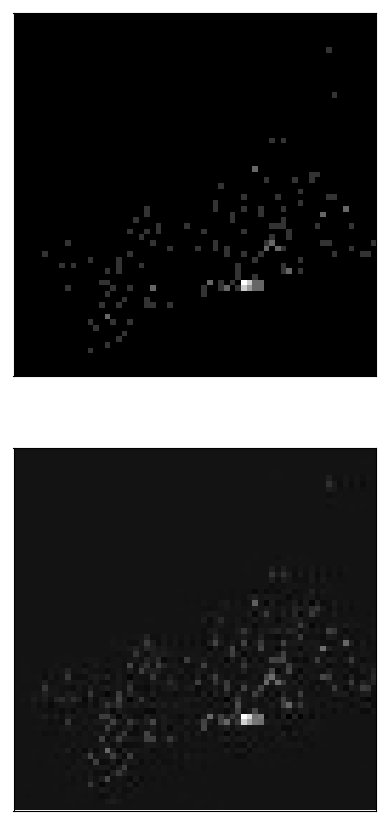

In [75]:
decoded_grids = autoencoder1.predict(X1_test)
n = 1
plt.figure(figsize=(16, 16))
for i in range(n):
    ax = plt.subplot(3, n, i+1)
    plt.imshow(Y1_test[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_grids[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

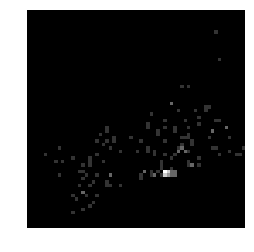

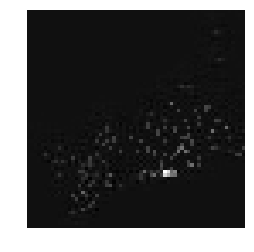

In [19]:
i = 0
decoded_grids = autoencoder1.predict(X1_test)
f = plt.figure()
plt.imshow(Y1_test[i].reshape(64, 64))
plt.axis('off')
f.savefig("t1i1.pdf", bbox_inches='tight')

f = plt.figure()
plt.imshow(decoded_grids[i].reshape(64, 64))
plt.axis('off')
f.savefig("t1i2.pdf", bbox_inches='tight')

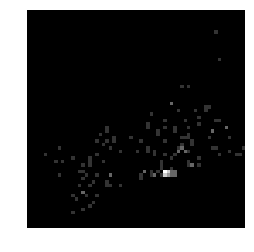

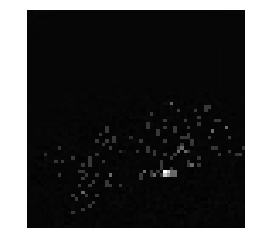

In [20]:
i = 0
decoded_grids = autoencoder2.predict(X2_test)
f = plt.figure()
plt.imshow(Y2_test[i].reshape(64, 64))
plt.axis('off')
f.savefig("t2i1.pdf", bbox_inches='tight')

f = plt.figure()
plt.imshow(decoded_grids[i].reshape(64, 64))
plt.axis('off')
f.savefig("t2i2.pdf", bbox_inches='tight')

(-0.5, 63.5, 63.5, -0.5)

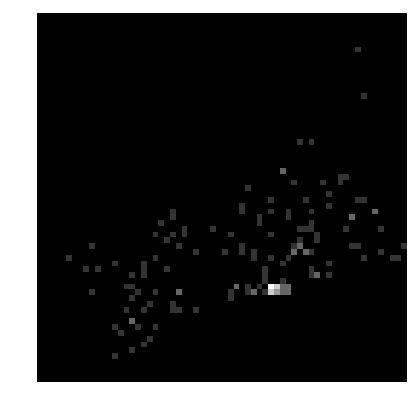

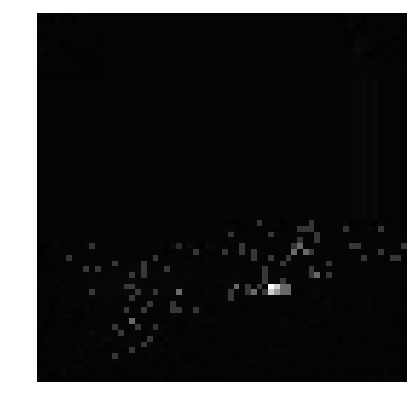

In [77]:
i = 1
decoded_grids = autoencoder3.predict(X3_test)
f = plt.figure()
plt.imshow(Y3_test[i].reshape(64, 64))
plt.axis('off')
#f.savefig("t3i1.pdf", bbox_inches='tight')

f = plt.figure()
plt.imshow(decoded_grids[i].reshape(64, 64))
plt.axis('off')
#f.savefig("t3i2.pdf", bbox_inches='tight')

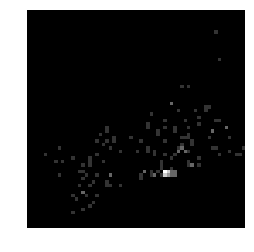

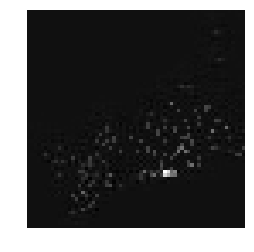

In [22]:
i = 0
decoded_grids = autoencoder1.predict(X4_test)
f = plt.figure()
plt.imshow(Y4_test[i].reshape(64, 64))
plt.axis('off')
f.savefig("t4i1.pdf", bbox_inches='tight')

f = plt.figure()
plt.imshow(decoded_grids[i].reshape(64, 64))
plt.axis('off')
f.savefig("t4i2.pdf", bbox_inches='tight')

In [26]:
def compare_matrices(m1,m2):
    if (m1.shape[0] == m2.shape[0] and m1.shape[1] == m2.shape[1]):
        equal = 0
        total = m1.shape[0]* m1.shape[1]
        n_it = 0
        for i in range (m1.shape[0]):
            for j in range (m1.shape[1]):
                if (m1[i][j] == m2[i][j]):
                    equal+=1
        print('Celdas iguales = ', equal, 'Celdas totales = ',total)
    else:
        print('Las dimensiones de las matrices son diferentes')

dict_keys(['val_loss', 'val_coeff_determination', 'val_mean_absolute_percentage_error', 'val_mean_absolute_error', 'loss', 'coeff_determination', 'mean_absolute_percentage_error', 'mean_absolute_error'])


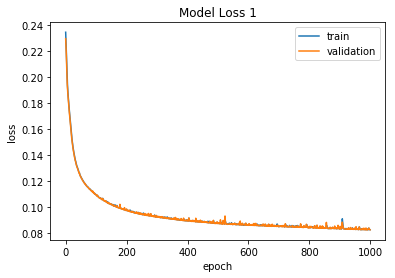

In [44]:
print(history_1a.history.keys())
f = plt.figure()
plt.plot(history_1a.history['loss'])
plt.plot(history_1a.history['val_loss'])
plt.title('Model Loss 1')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
#f.savefig('m1.pdf', bbox_inches='tight')

dict_keys(['val_loss', 'val_coeff_determination', 'loss', 'coeff_determination'])


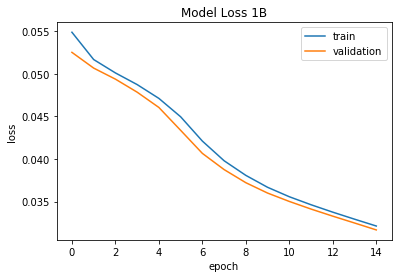

In [71]:
print(history_1b.history.keys())
plt.plot(history_1b.history['loss'])
plt.plot(history_1b.history['val_loss'])
plt.title('Model Loss 1B')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

dict_keys(['val_loss', 'val_coeff_determination', 'val_mean_absolute_percentage_error', 'loss', 'coeff_determination', 'mean_absolute_percentage_error'])


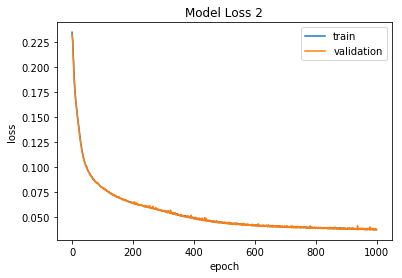

In [47]:
print(history_2.history.keys())
f = plt.figure()
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model Loss 2')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
f.savefig('m2.pdf', bbox_inches='tight')

dict_keys(['val_loss', 'val_coeff_determination', 'val_mean_absolute_percentage_error', 'val_mean_absolute_error', 'loss', 'coeff_determination', 'mean_absolute_percentage_error', 'mean_absolute_error'])


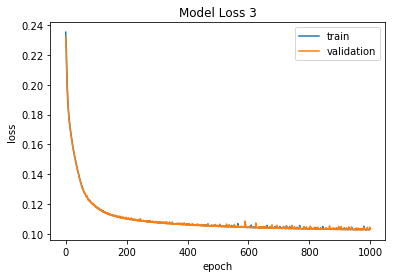

In [52]:
print(history_3.history.keys())
f = plt.figure()
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model Loss 3')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
#f.savefig('m3.pdf', bbox_inches='tight')

dict_keys(['val_loss', 'val_coeff_determination', 'val_mean_absolute_percentage_error', 'loss', 'coeff_determination', 'mean_absolute_percentage_error'])


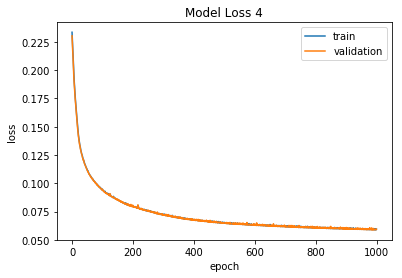

In [41]:
print(history_4.history.keys())
f = plt.figure()
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('Model Loss 4')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
f.savefig('m4.pdf', bbox_inches='tight')

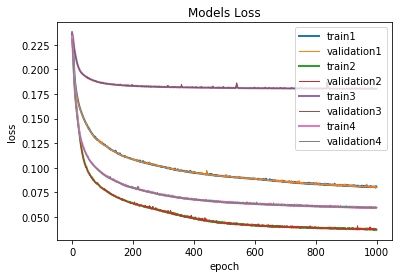

In [61]:
f = plt.figure()
plt.plot(history_1a.history['loss'], linewidth=1)
plt.plot(history_1a.history['val_loss'], linewidth=1)
plt.plot(history_2.history['loss'], linewidth=1)
plt.plot(history_2.history['val_loss'], linewidth=1)
plt.plot(history_3.history['loss'], linewidth=1)
plt.plot(history_3.history['val_loss'], linewidth=1)
plt.plot(history_4.history['loss'], linewidth=1)
plt.plot(history_4.history['val_loss'], linewidth=1)
plt.title('Models Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train1', 'validation1','train2', 'validation2','train3', 'validation3','train4', 'validation4'], loc='upper right')
plt.show()
f.savefig('mxtest.pdf', bbox_inches='tight')

In [54]:
from keras.utils.vis_utils import plot_model
plot_model(autoencoder1, to_file='autoencoder1.pdf',show_shapes=True, show_layer_names=True)